In [1]:
from starter_code import (
    ani1_config,
    load_ani1_data,
    calc_resid,
    create_heatmap,
    create_boxplot,
    filter_outliers,
    create_histogram,
)

import matplotlib.pyplot as plt
import numpy as np

## Load ANI-1 Data

In [2]:
molecules = load_ani1_data()
# Calculate the residual vector for each method-method combination
resid = calc_resid(molecules)
# Resid but as a Dataframe
resid_df = calc_resid(molecules, as_dataframe=True)
# Filtering Data
filtered_data = filter_outliers(data_matrix=resid)

data file path is ./ANI-1ccx_clean_fullentry.h5


Calculating residuals: 100%|██████████| 91/91 [00:10<00:00,  8.45it/s]


### MAE Heatmaps

Here we plot the MAE between quantum chemical methods in a heatmap.

100%|██████████| 91/91 [00:00<00:00, 2361.06it/s]


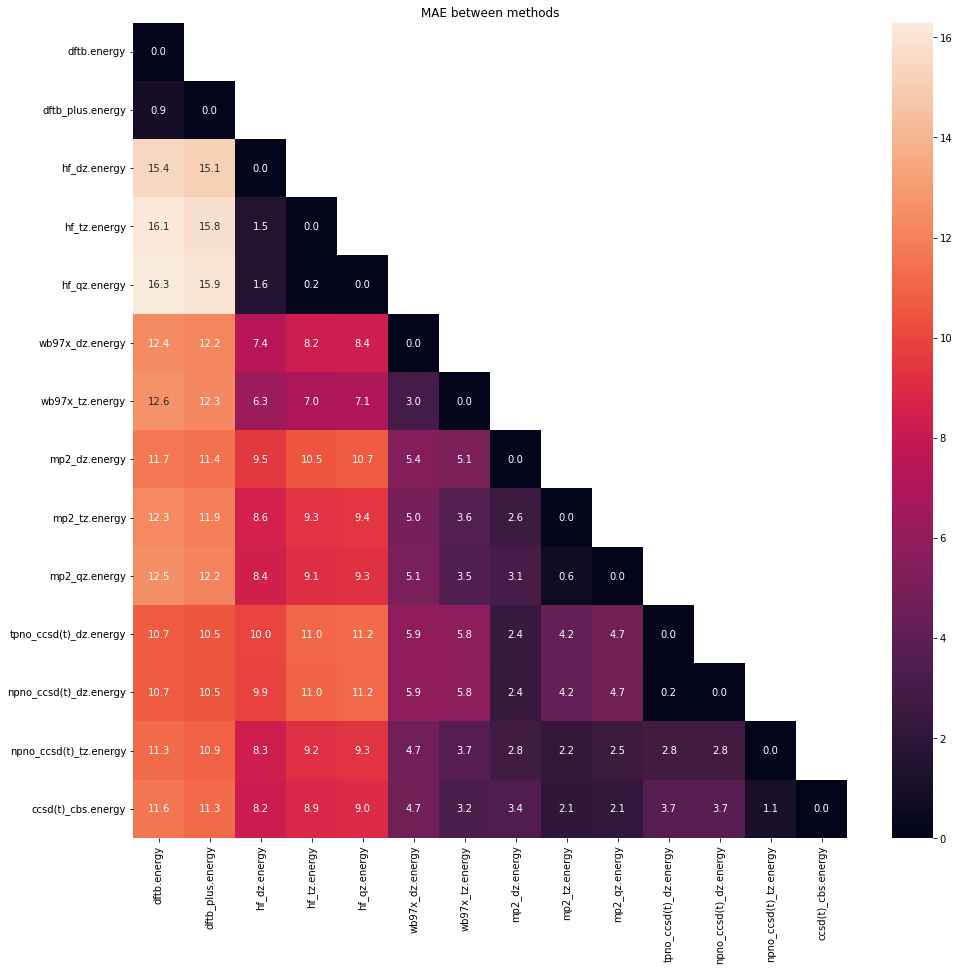

100%|██████████| 91/91 [00:00<00:00, 2459.37it/s]


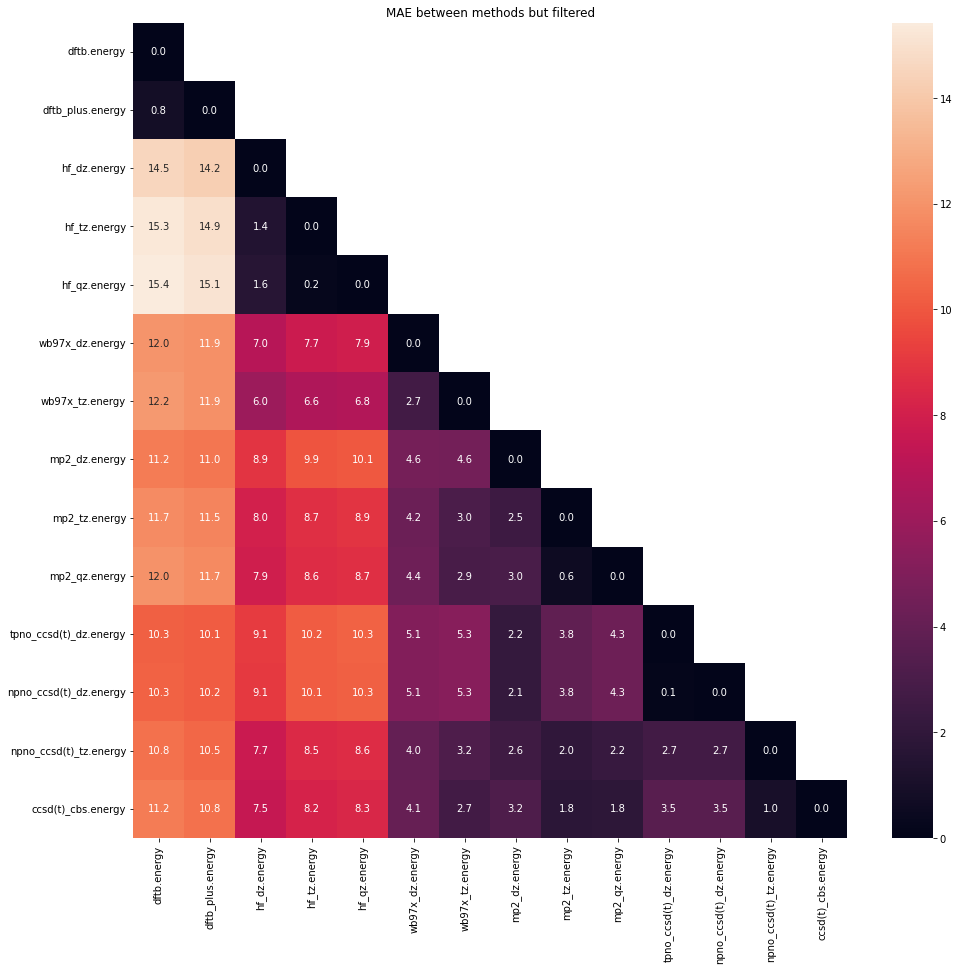

In [3]:
# Create a heatmap of the MAE between methods
create_heatmap(
    ani1_config["target"], "MAE between methods", data_matrix=resid, show_progress=True
)
# Heatmap with filtered data
create_heatmap(
    ani1_config["target"],
    "MAE between methods but filtered",
    data_matrix=filtered_data,
    show_progress=True,
)

### Boxplots

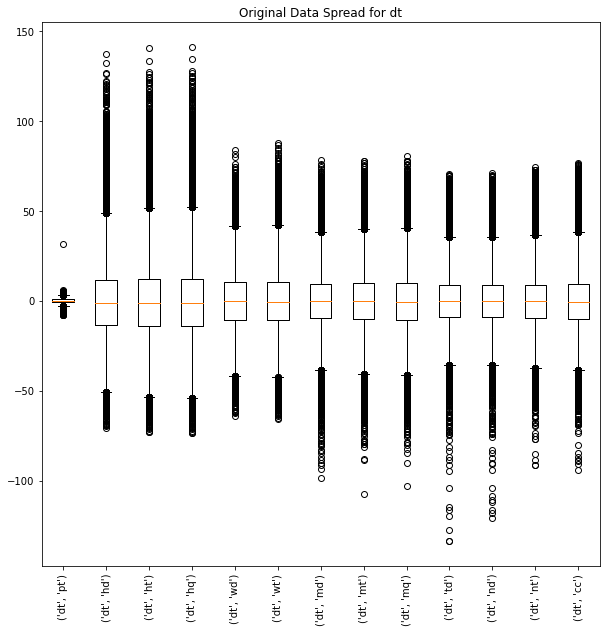

In [4]:
# Original data boxplot
create_boxplot(resid, "Original Data Spread", "dt")

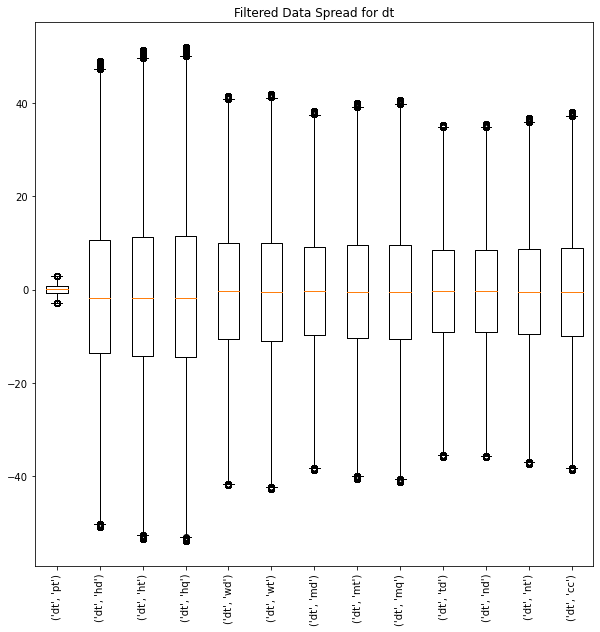

In [5]:
# Filtered data boxplot
create_boxplot(filtered_data, "Filtered Data Spread", "dt")

### Heatmap of number of outliers

100%|██████████| 91/91 [00:00<00:00, 91006.60it/s]


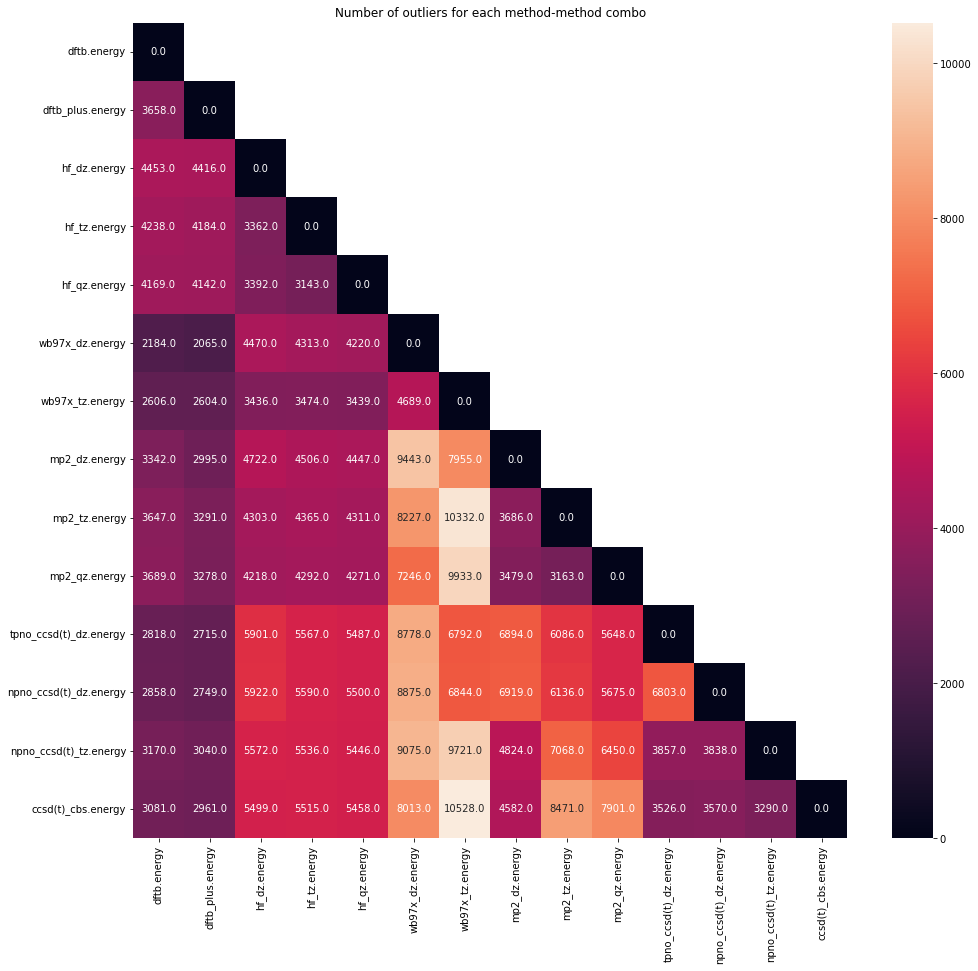

In [6]:
# Get number of outliers
n_outliers = {}
for (target_1, target_2) in resid:
    n_outliers[target_1, target_2] = len(resid[target_1, target_2]) - len(filtered_data[target_1, target_2])
# Plot
create_heatmap(
    ani1_config["target"],
    "Number of outliers for each method-method combo",
    data_matrix=n_outliers,
    show_progress=True
)
# okay to use create_heatmap since mean of 1 number is just the number

# Histograms for Outlier Molecule Frequency
In this section, we're interested to see if there are particular molecules that tend to be outliers more frequently than others.

To do this, we generate a histogram of the frequency at which a molecule appears as an outlier.

In [7]:
data = filter_outliers(dataframe=resid_df).groupby(level=[0]).sum()

In [8]:
# Optionally order the molecules by the mean of the outlier count for each method-method pair
data = data.loc[data.mean(axis="columns").sort_values(ascending=False).index, :]

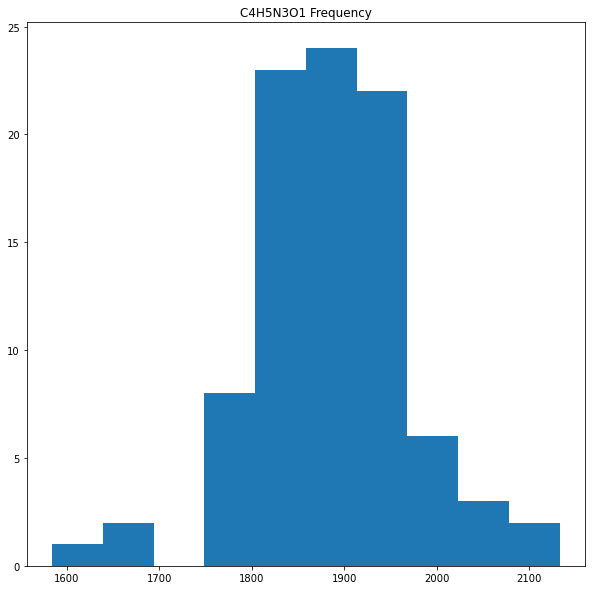

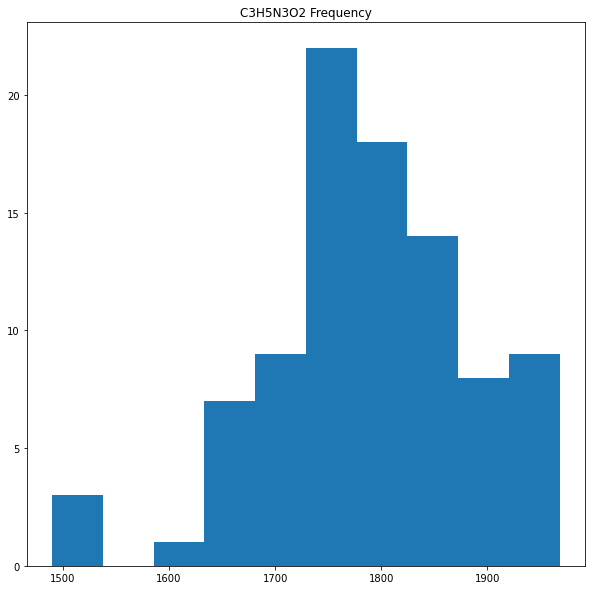

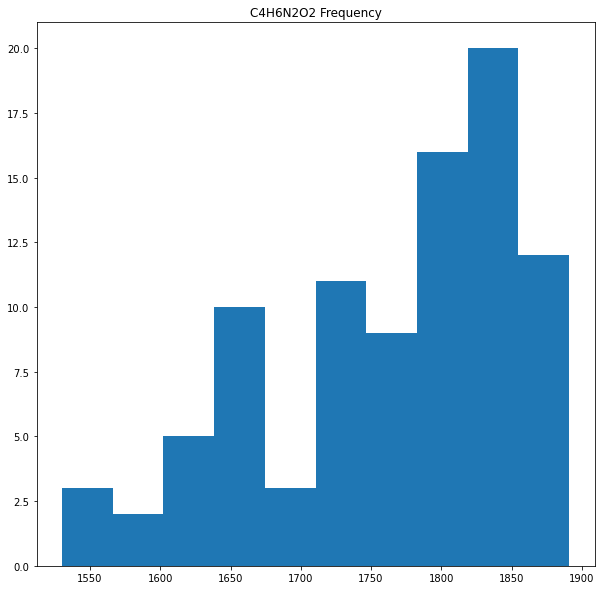

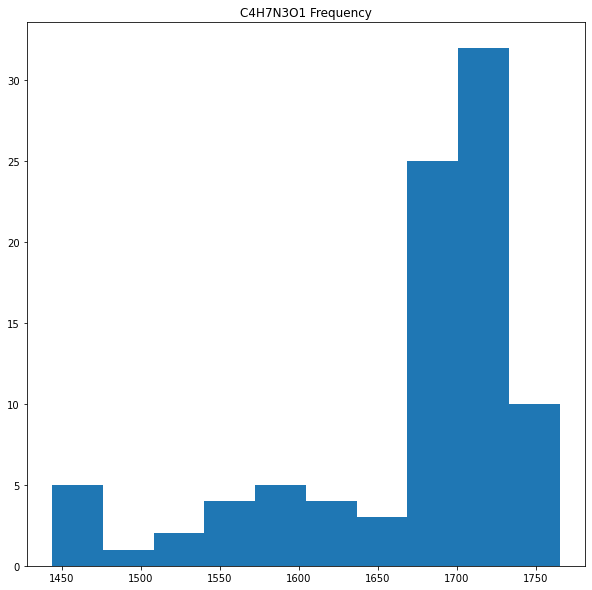

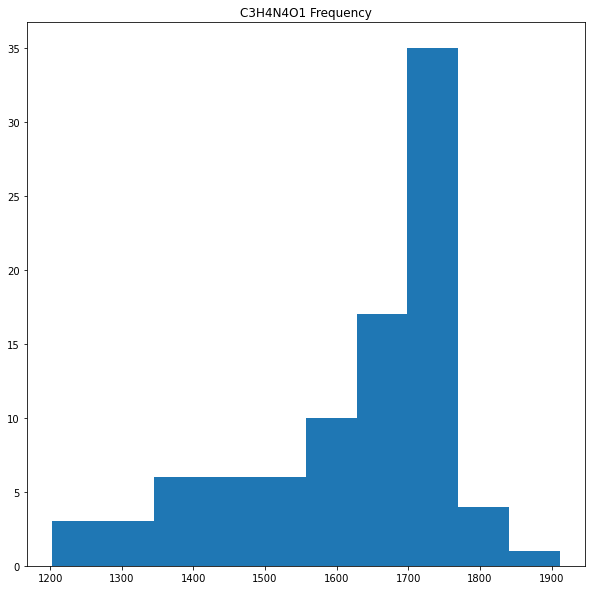

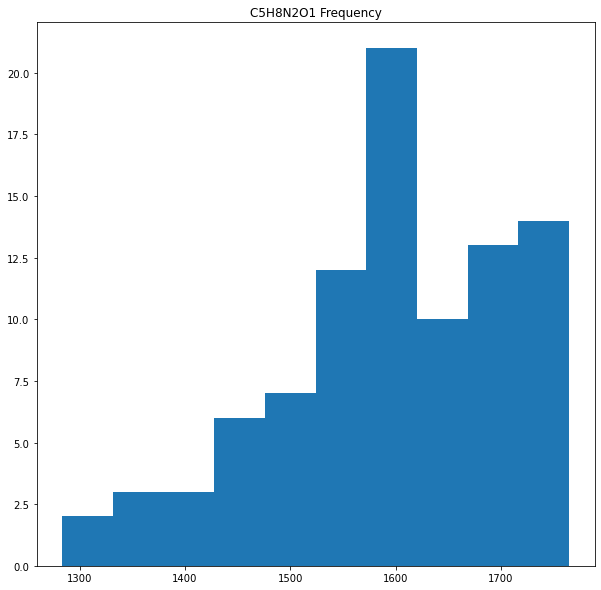

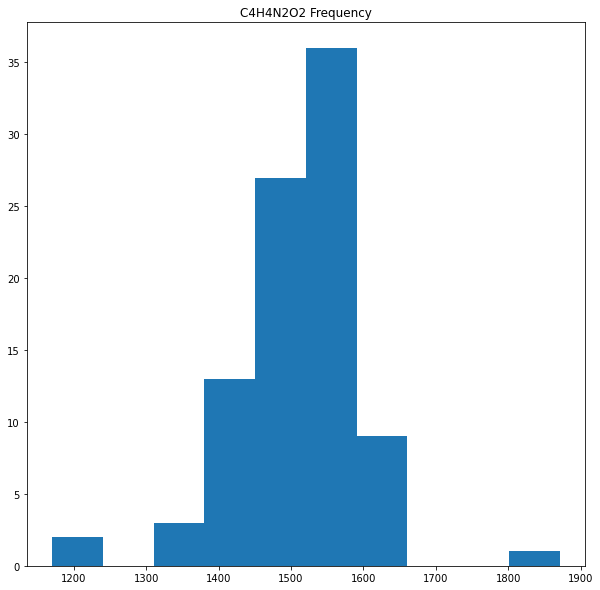

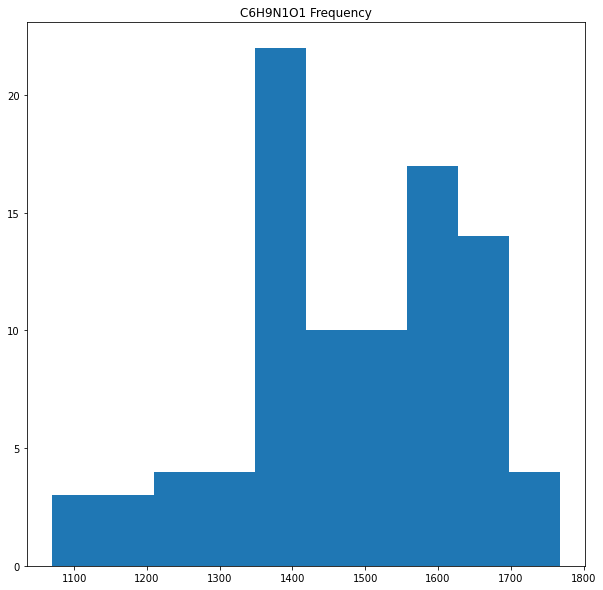

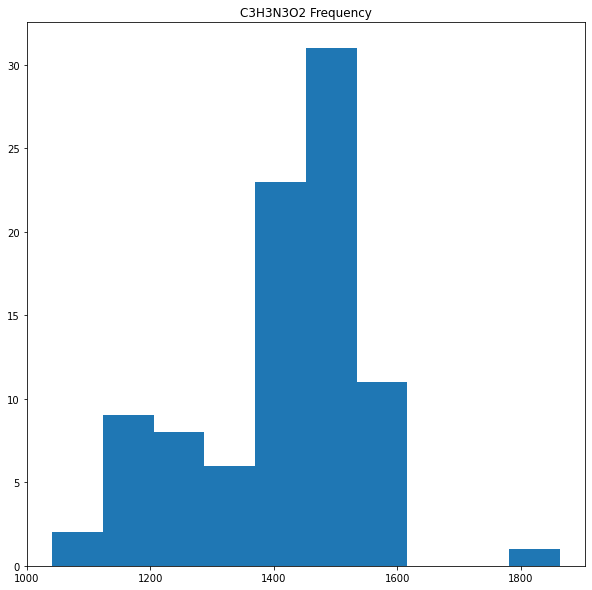

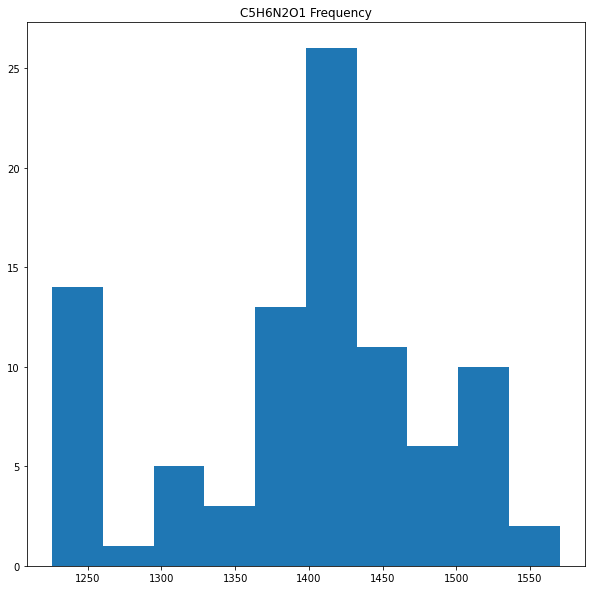

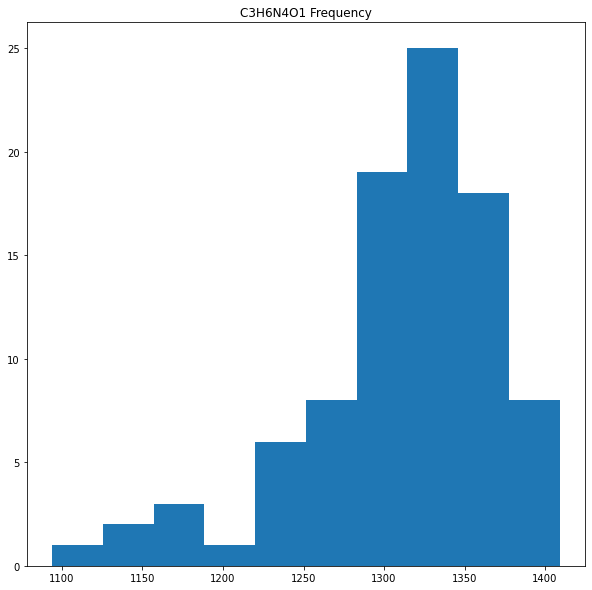

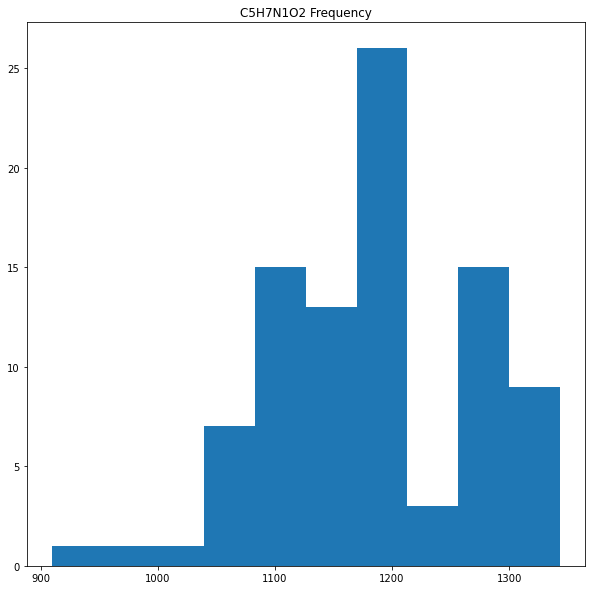

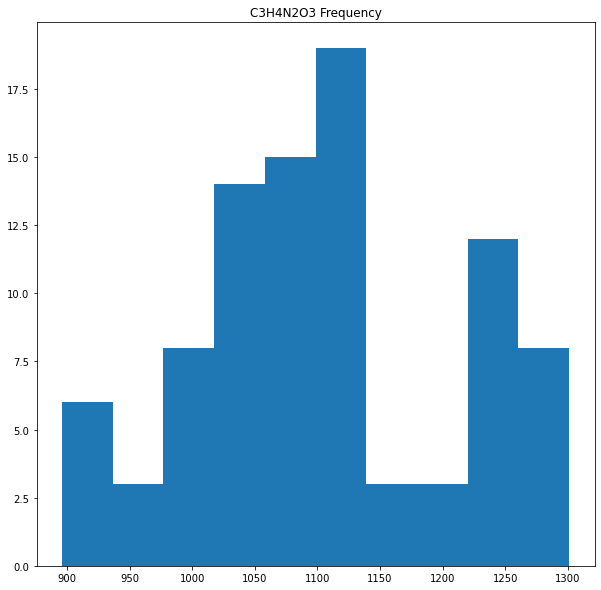

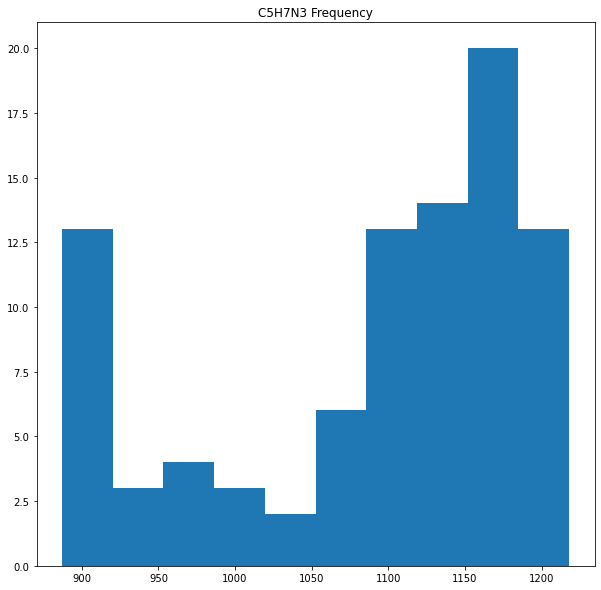

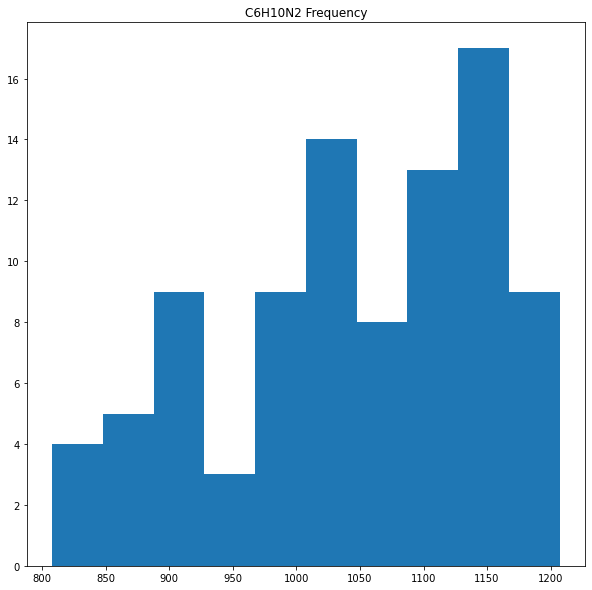

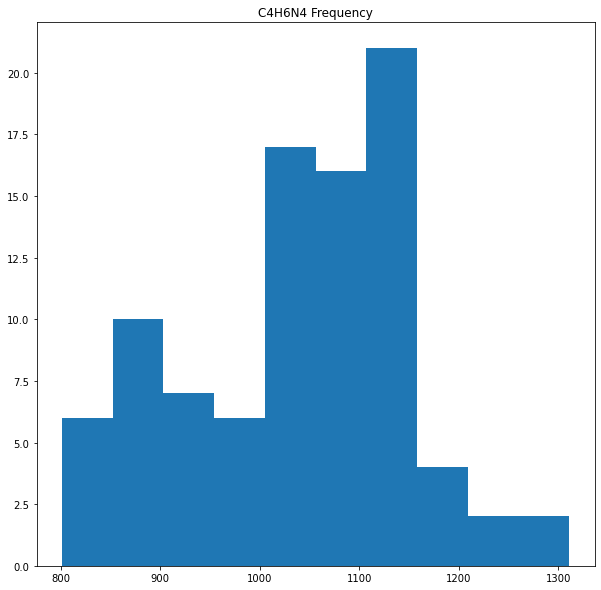

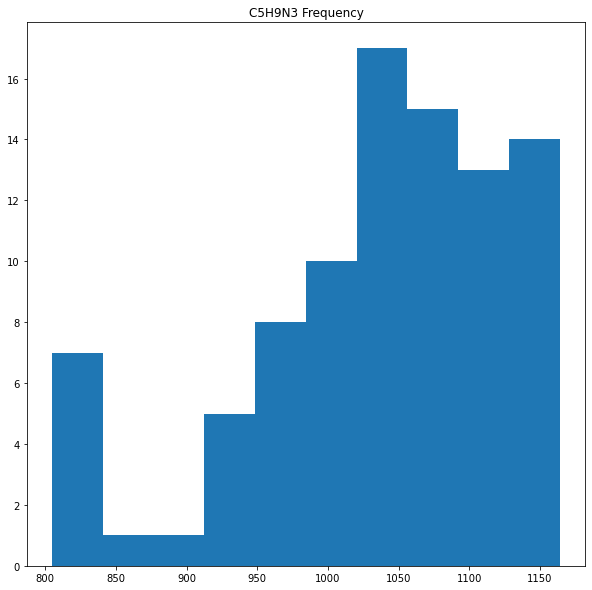

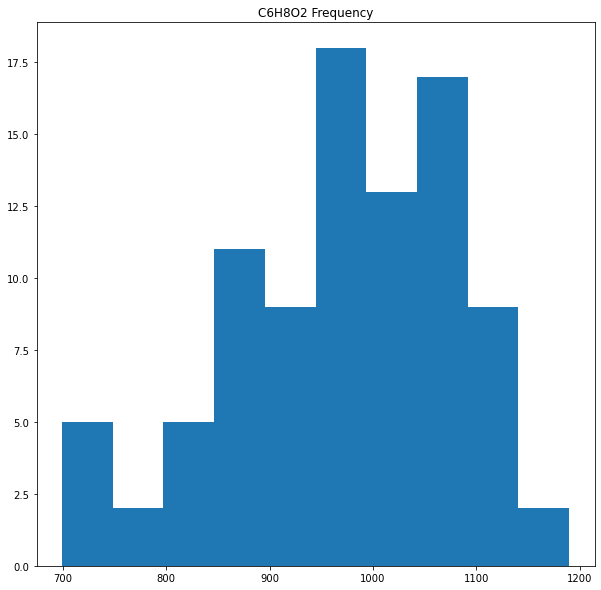

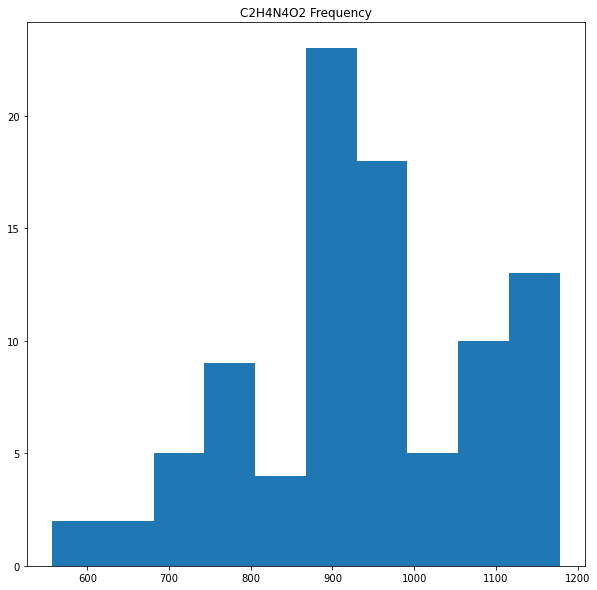

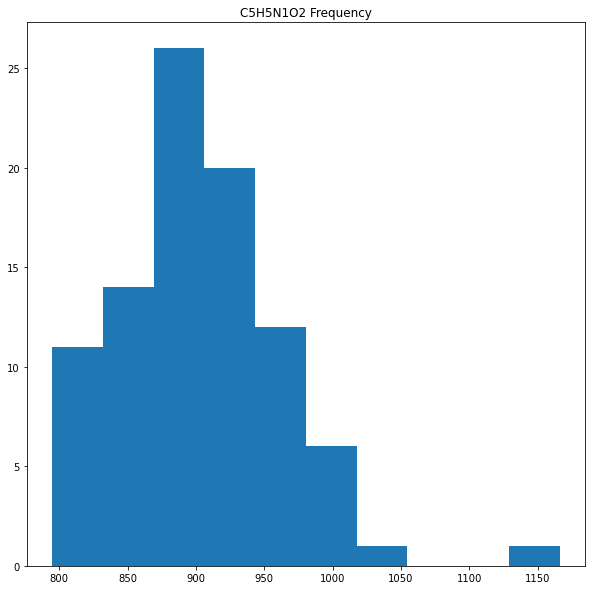

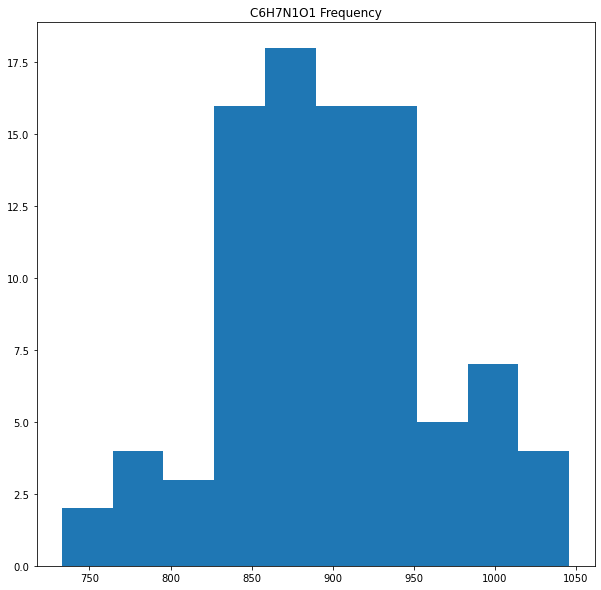

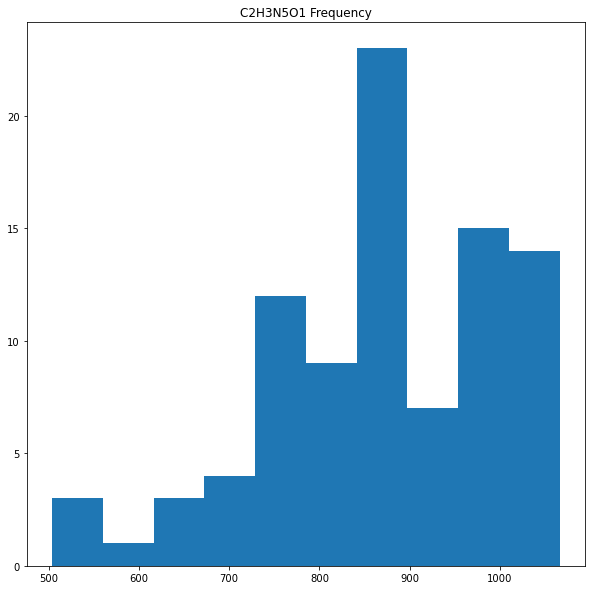

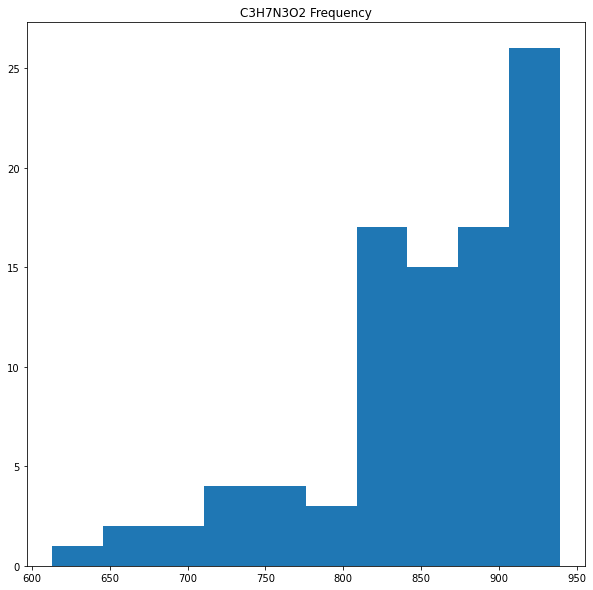

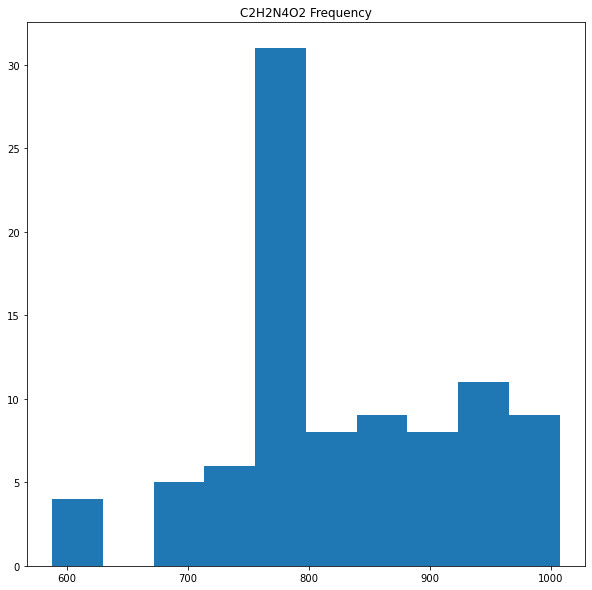

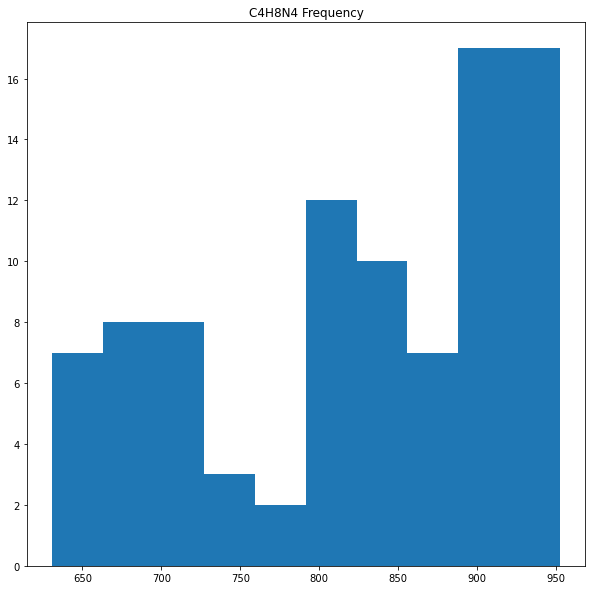

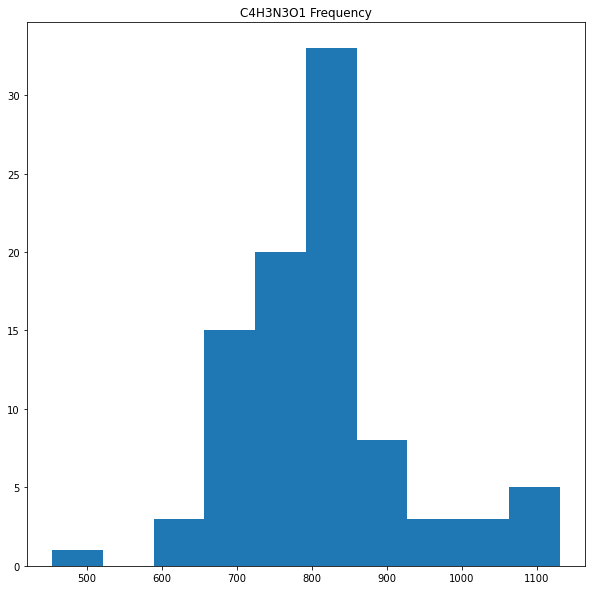

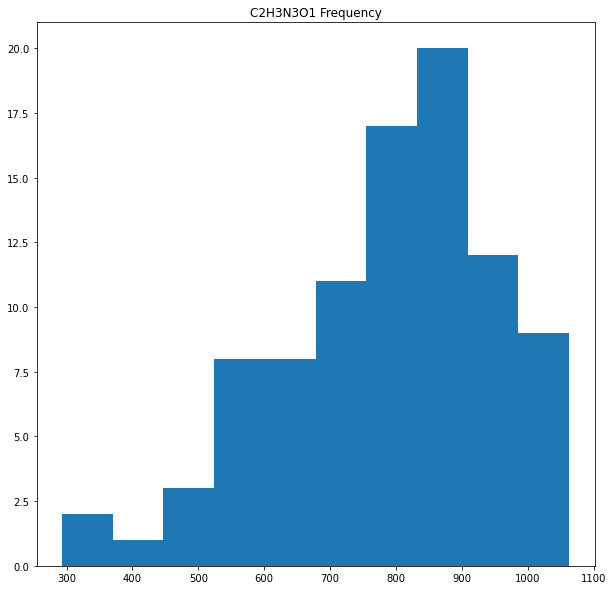

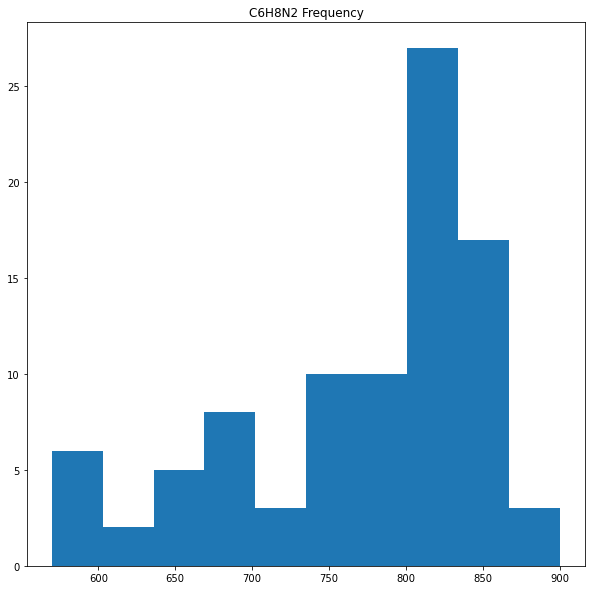

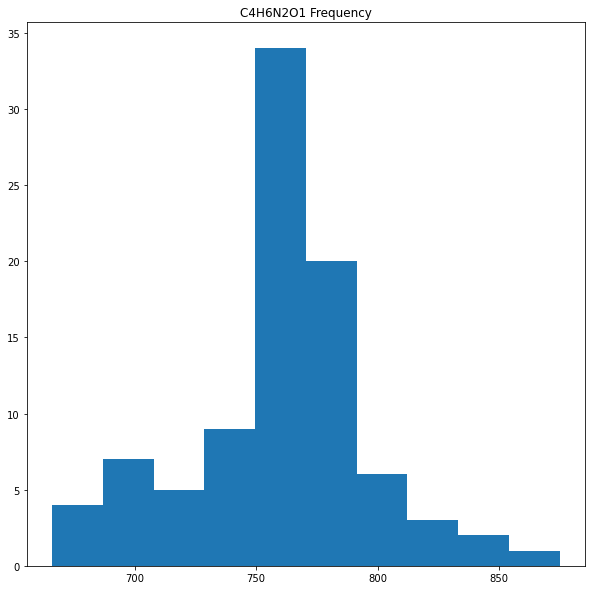

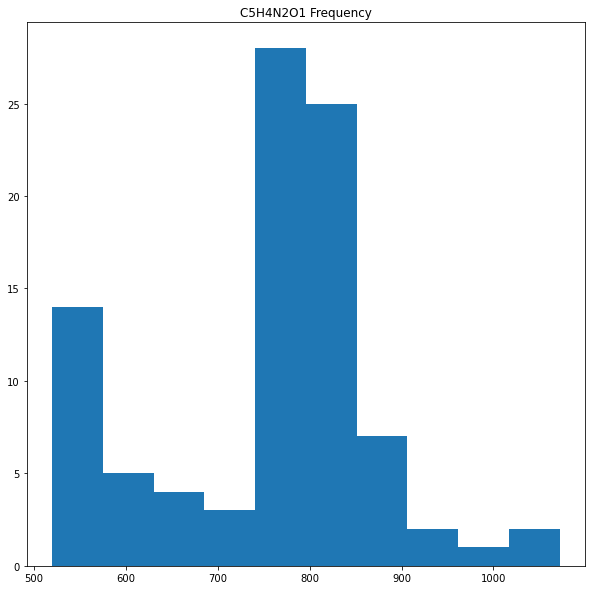

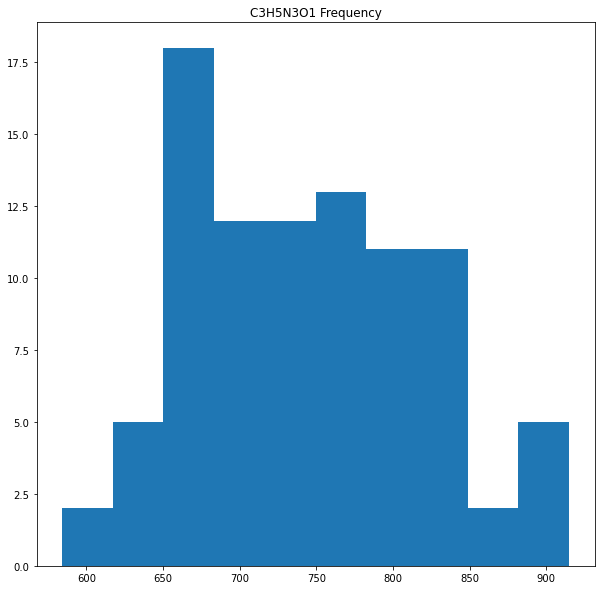

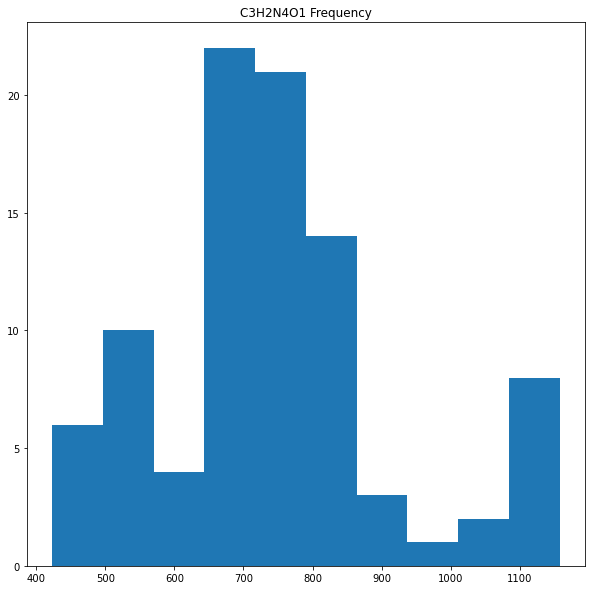

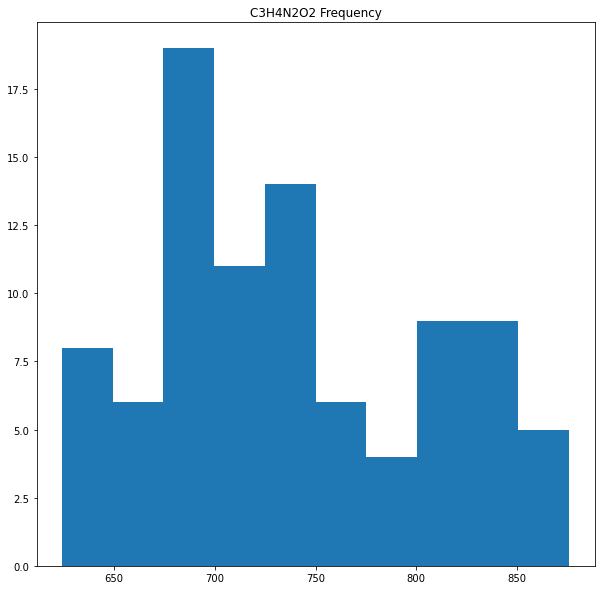

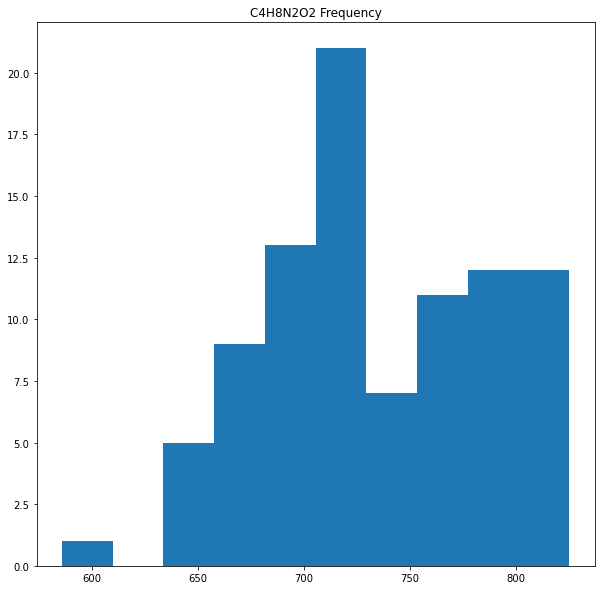

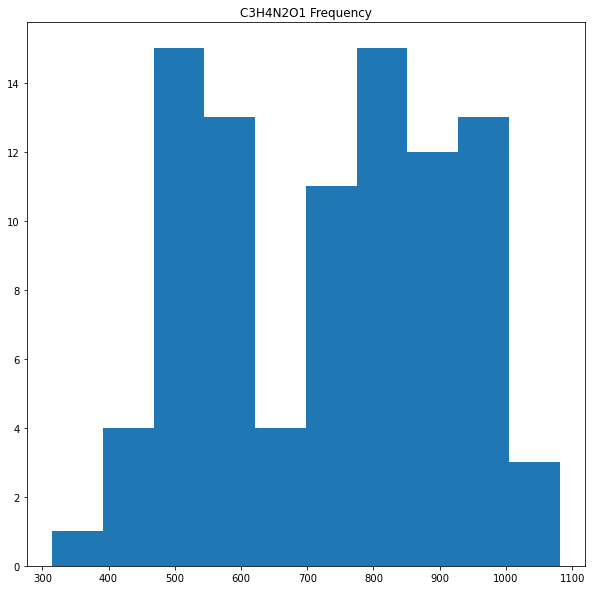

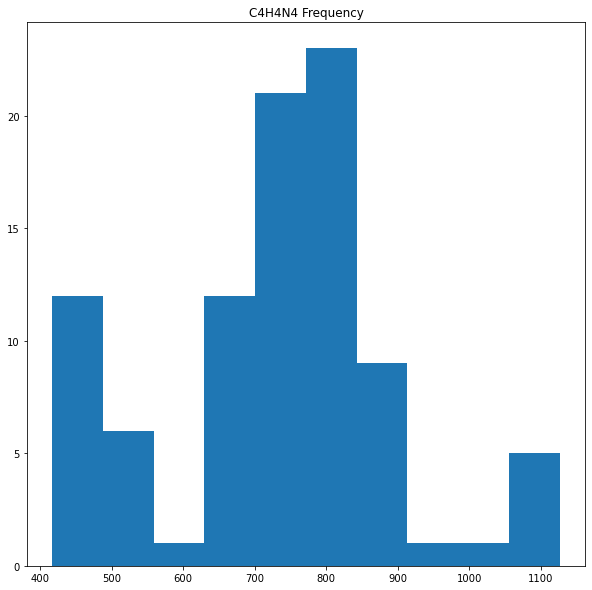

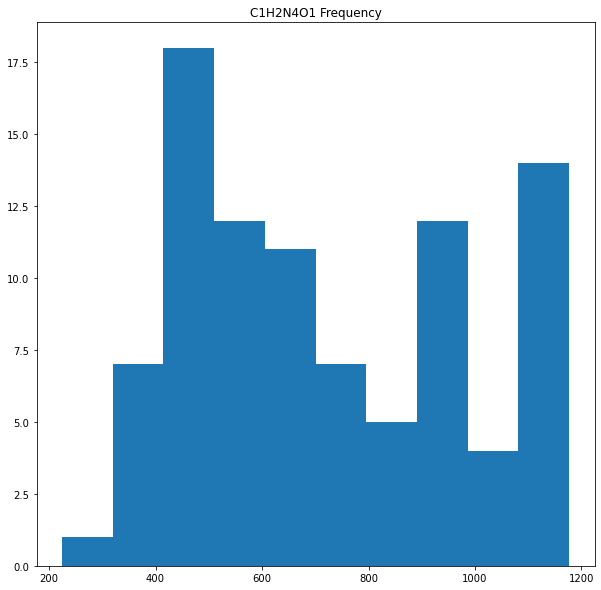

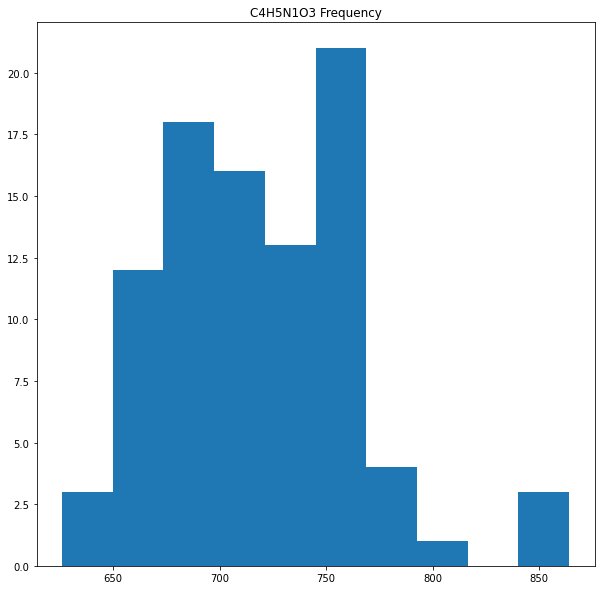

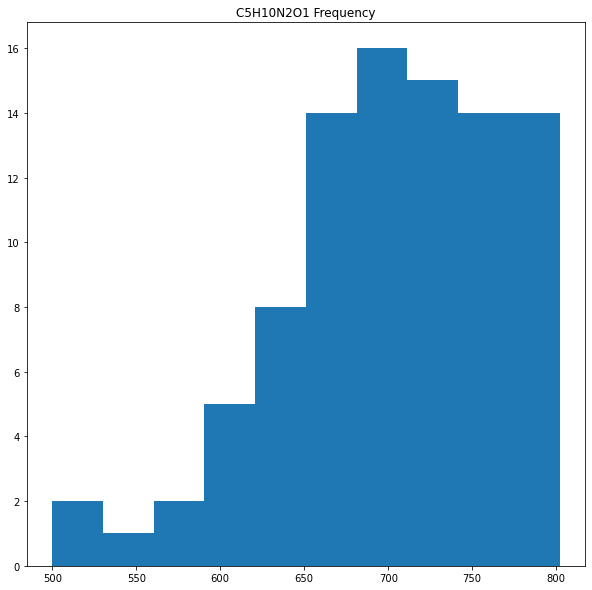

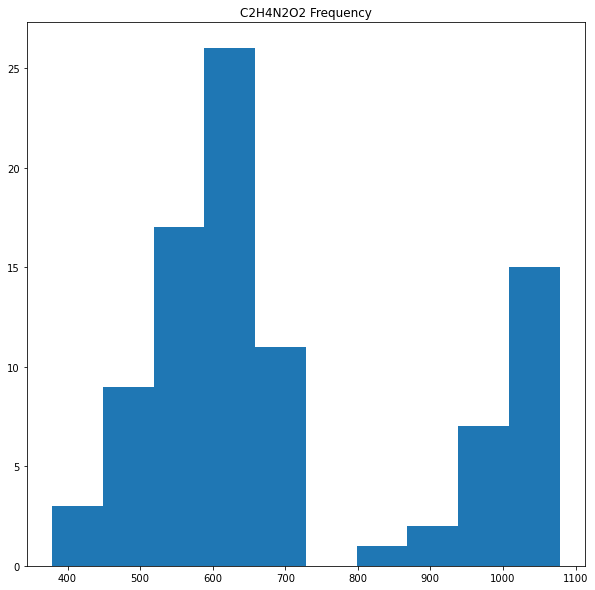

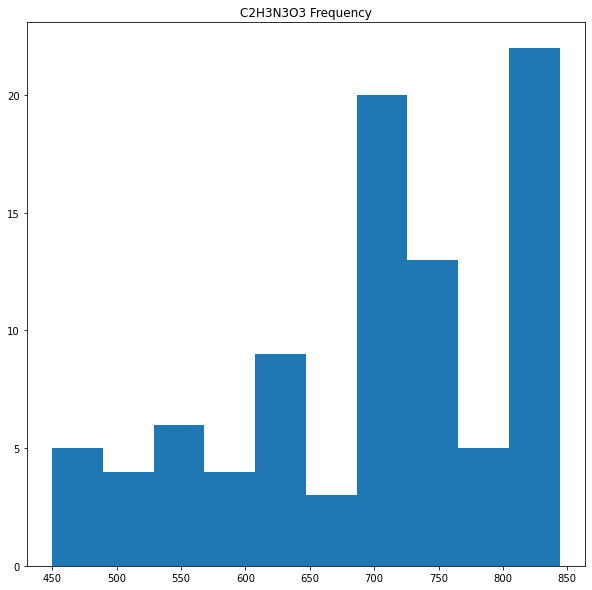

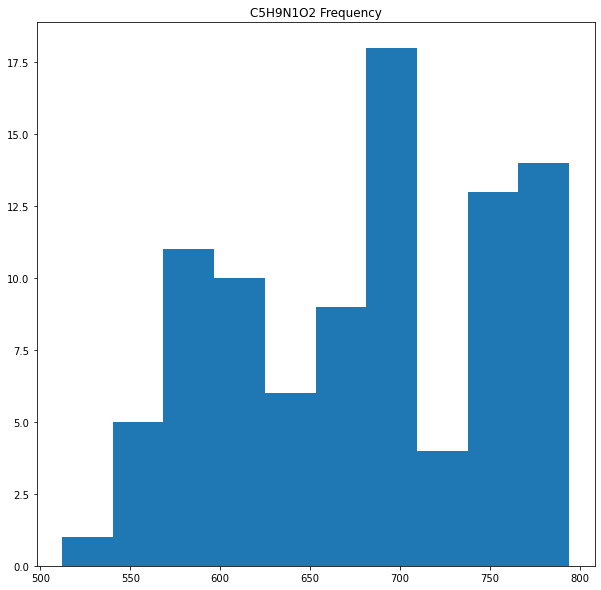

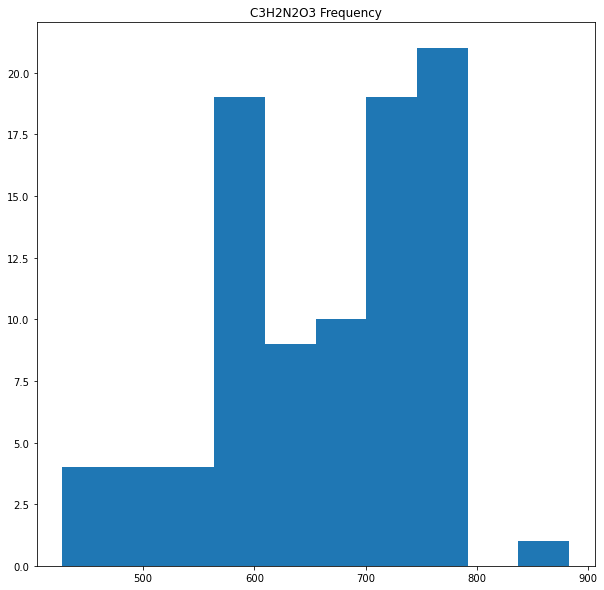

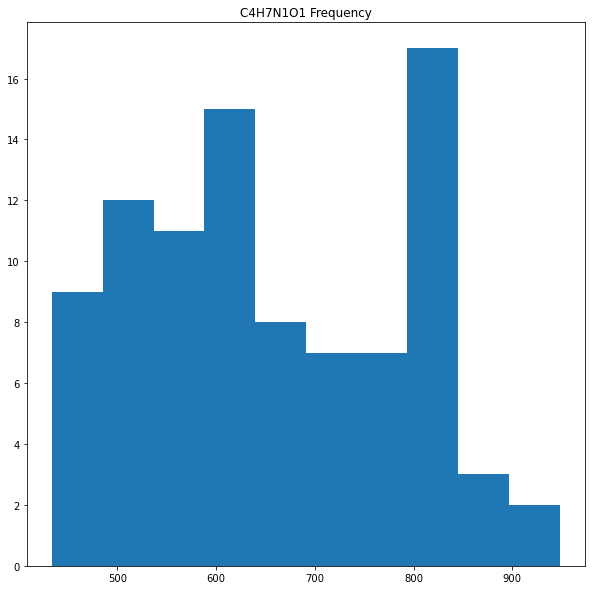

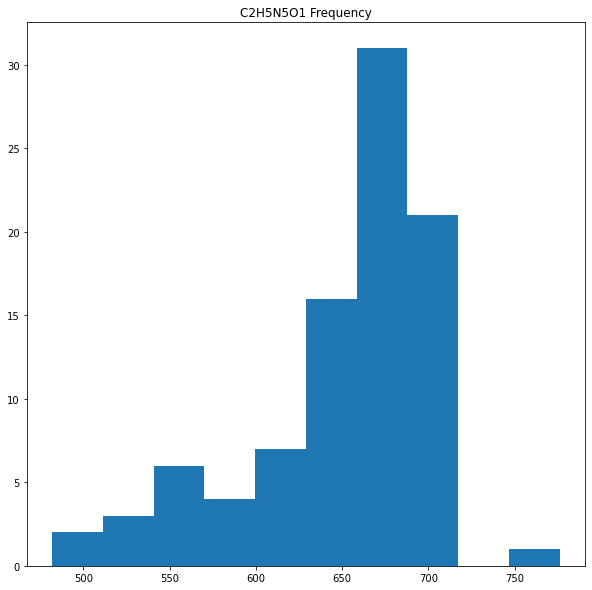

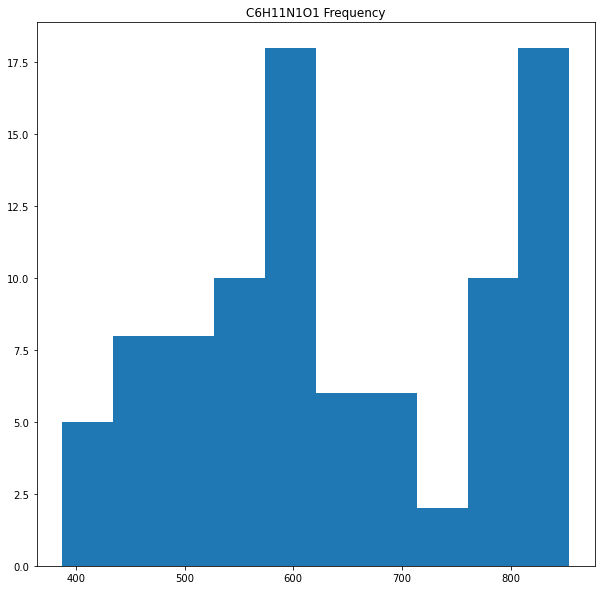

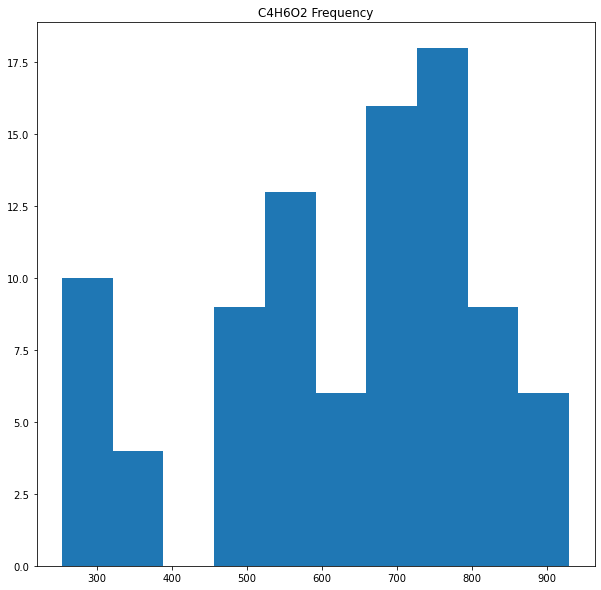

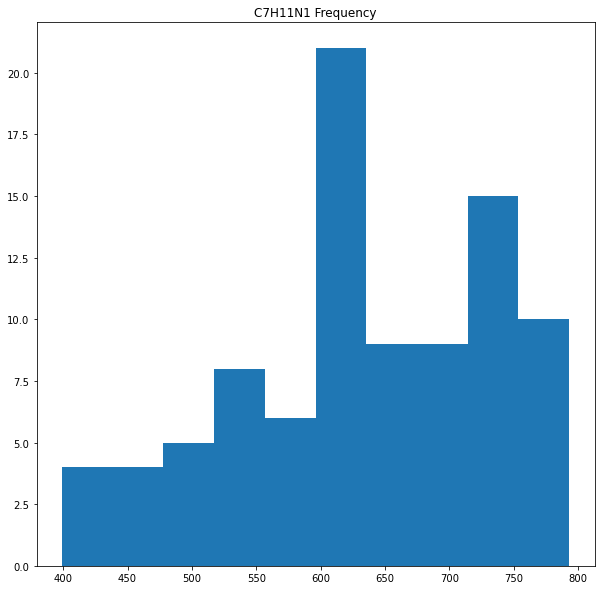

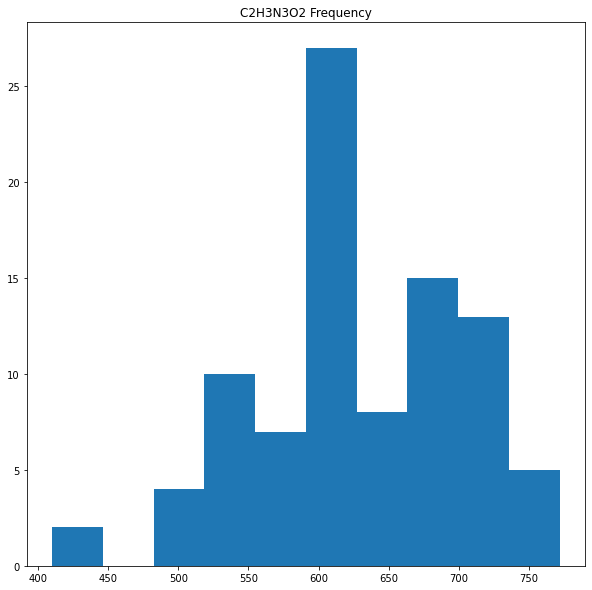

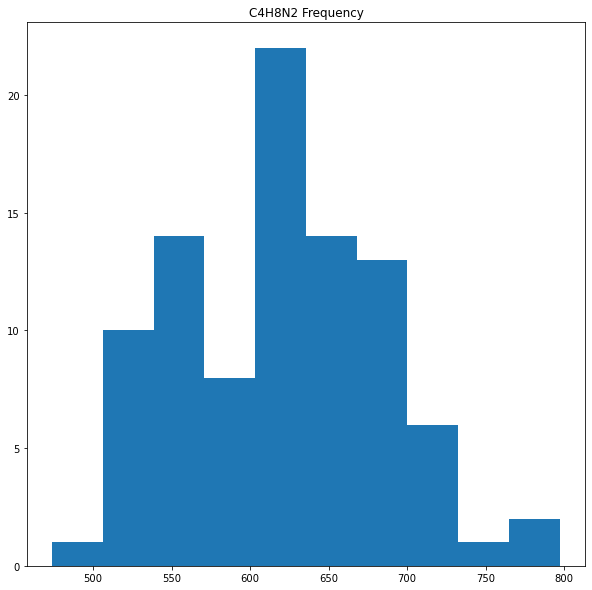

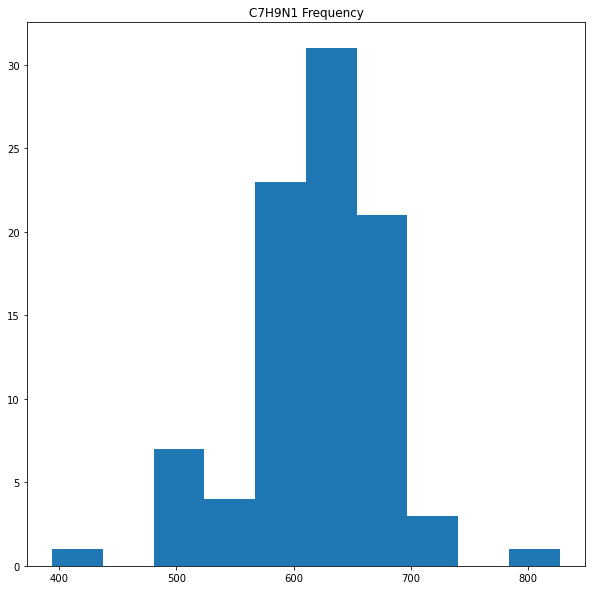

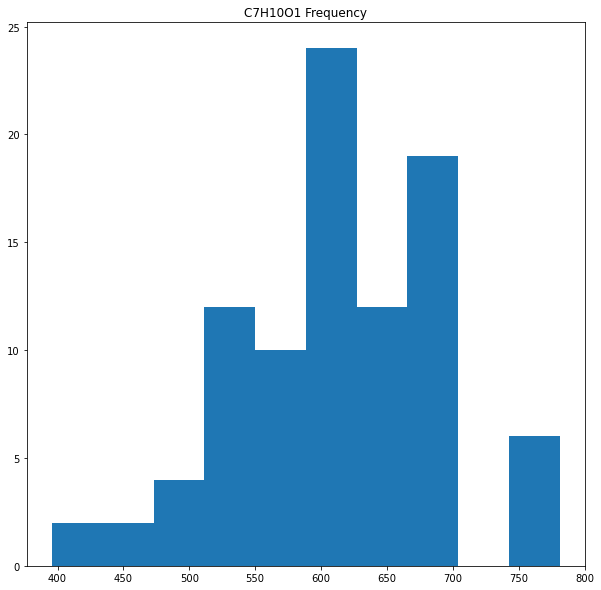

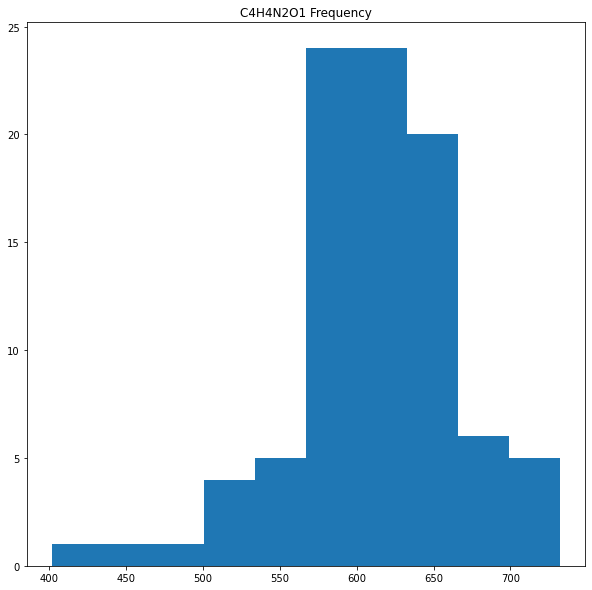

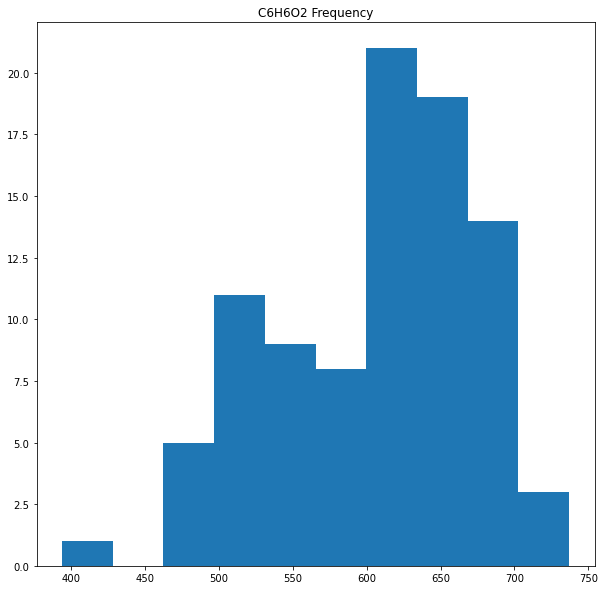

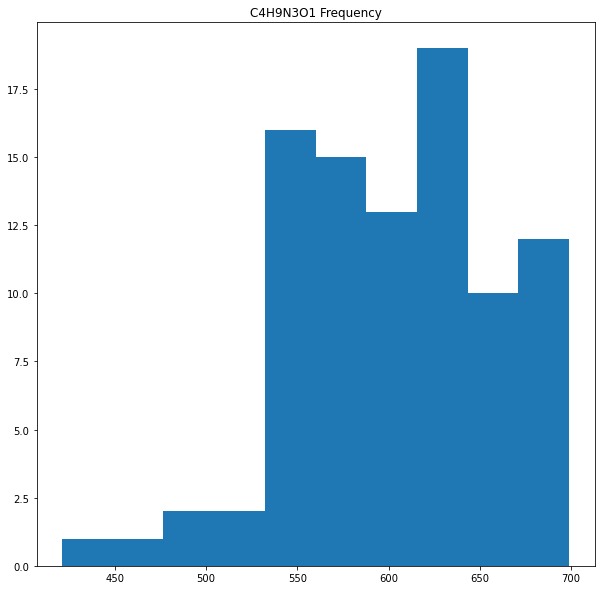

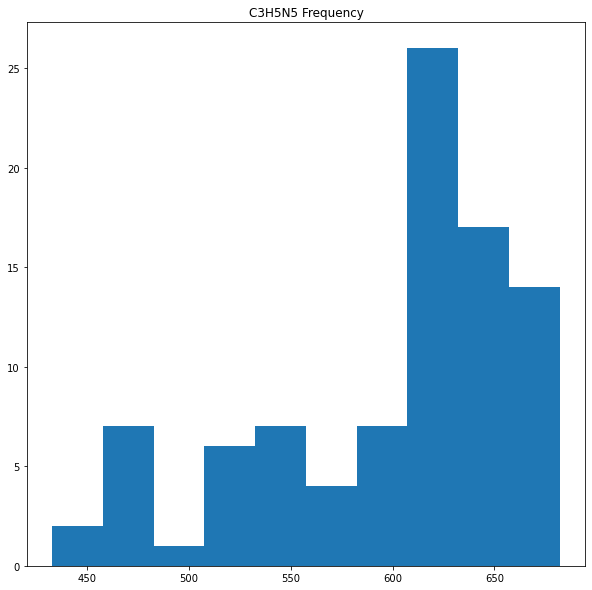

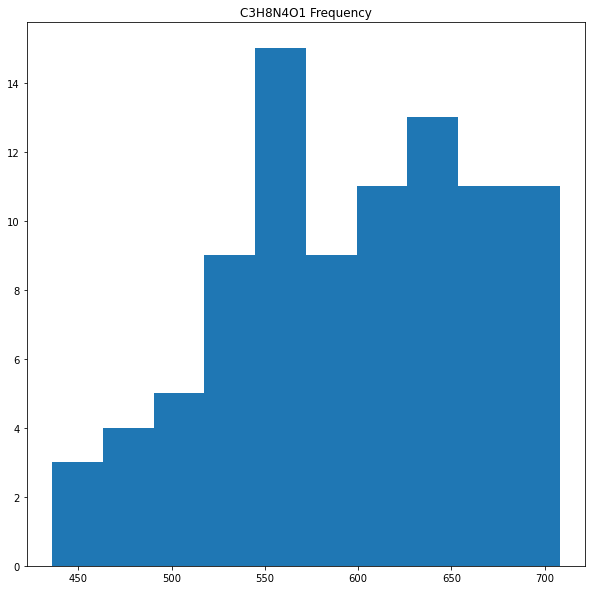

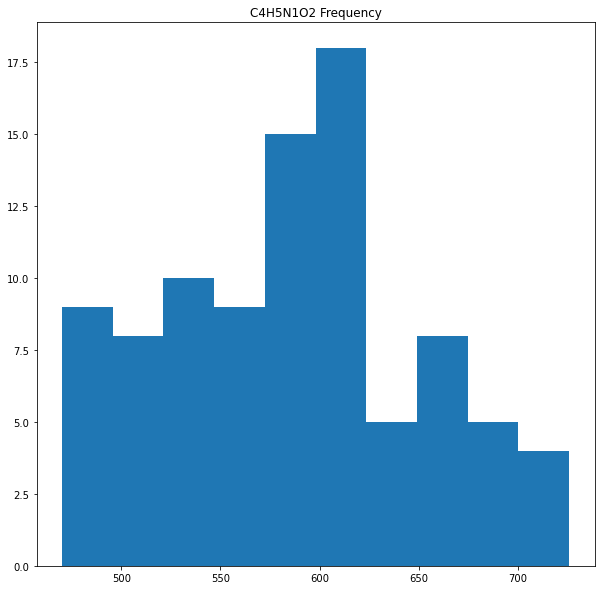

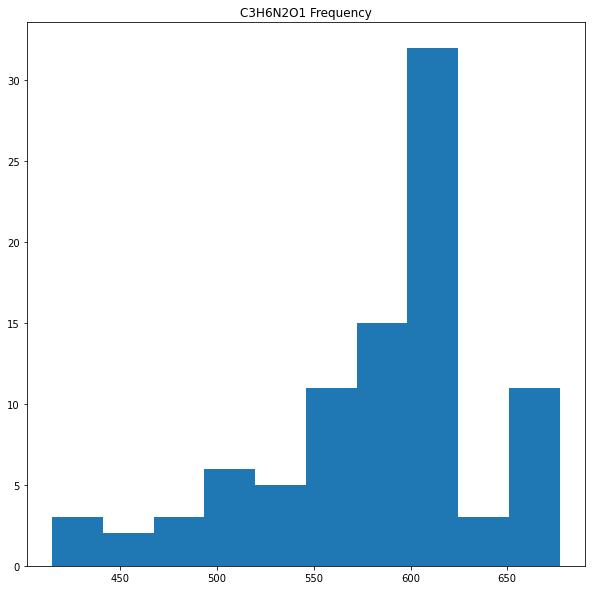

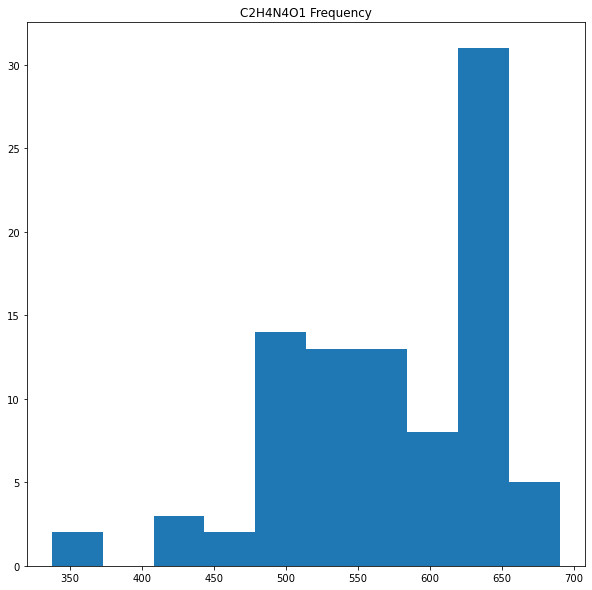

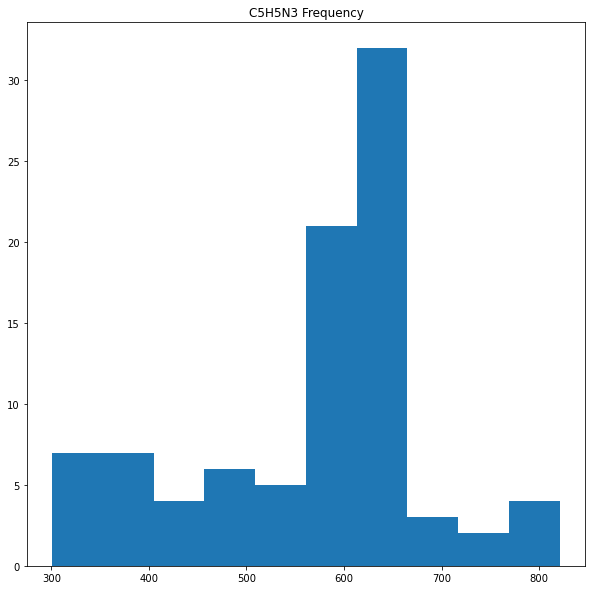

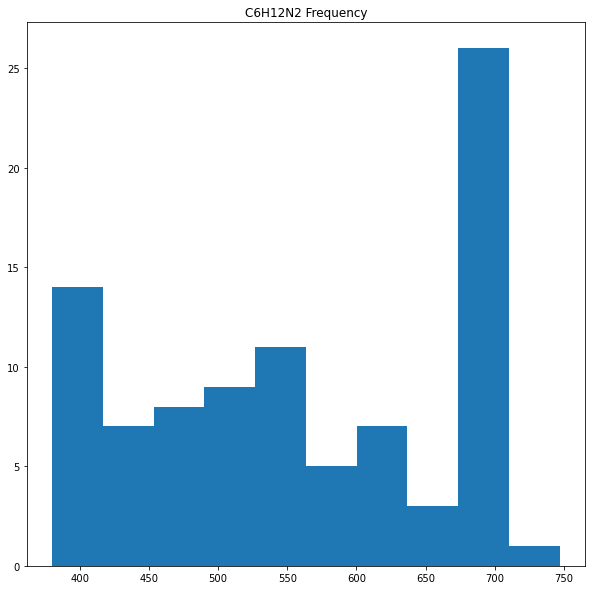

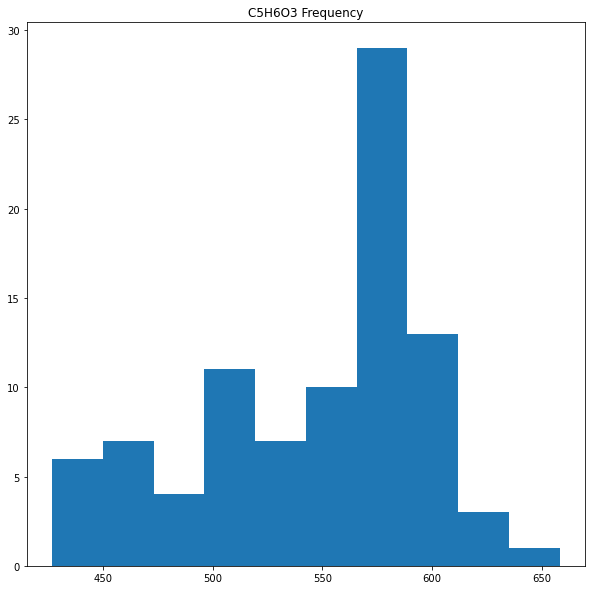

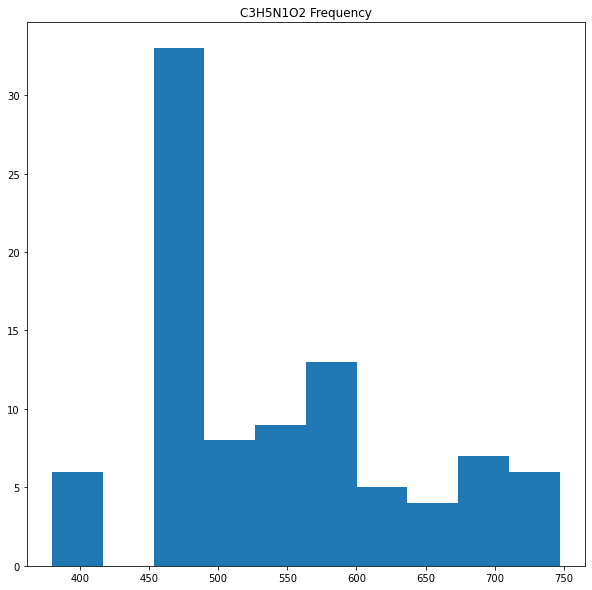

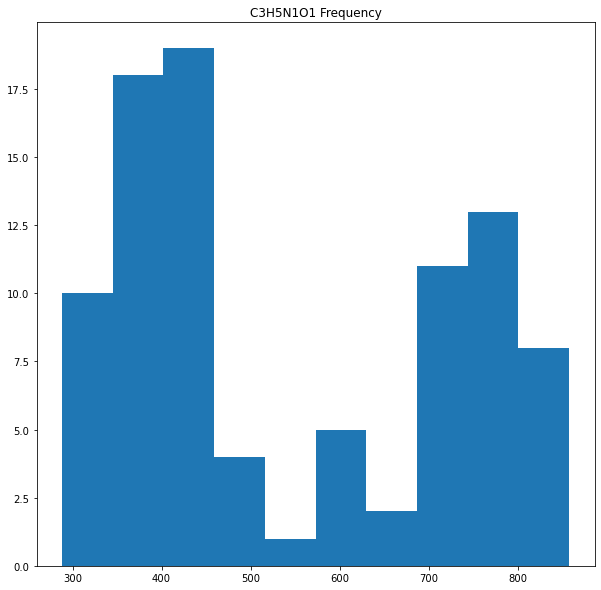

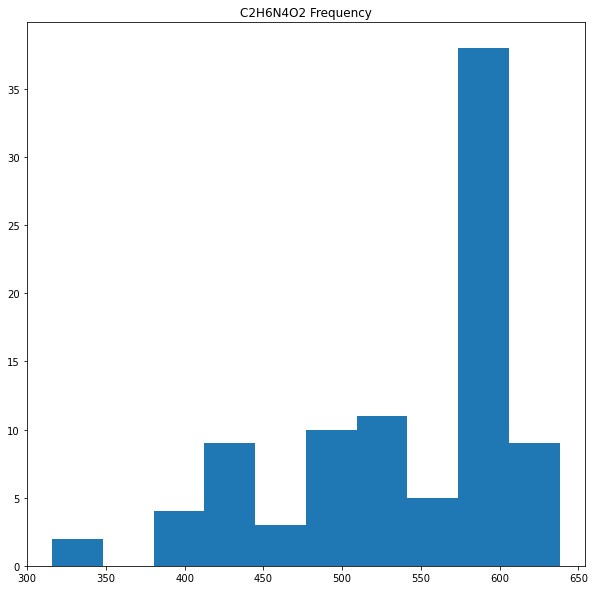

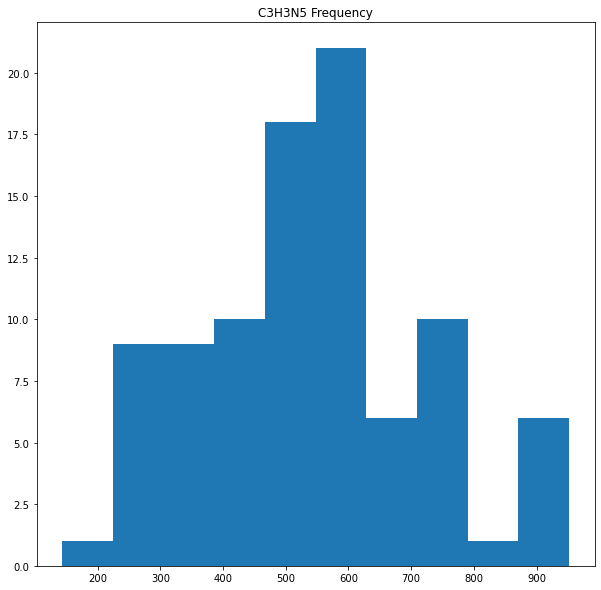

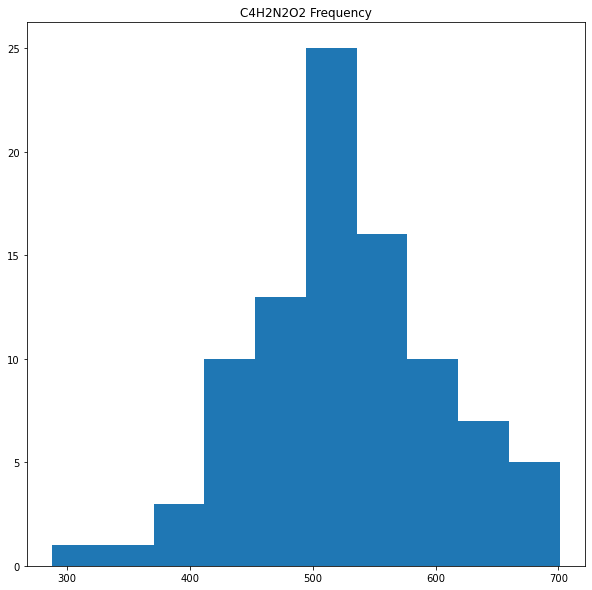

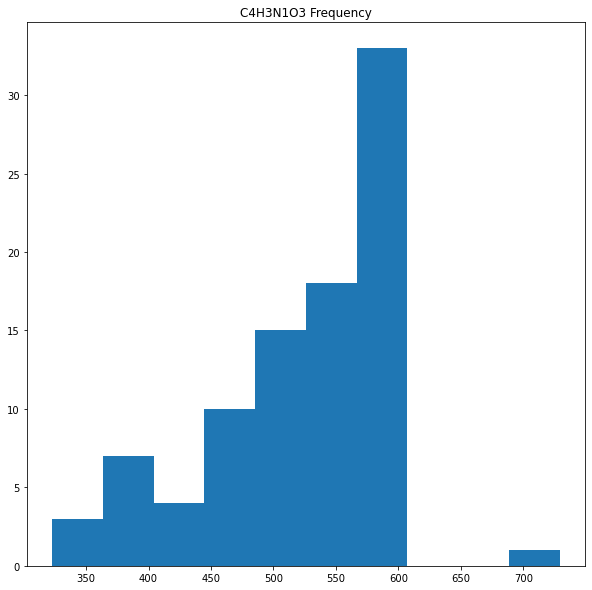

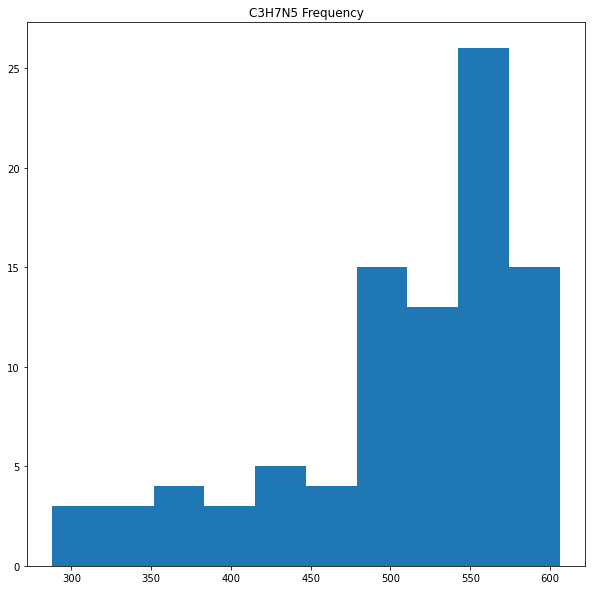

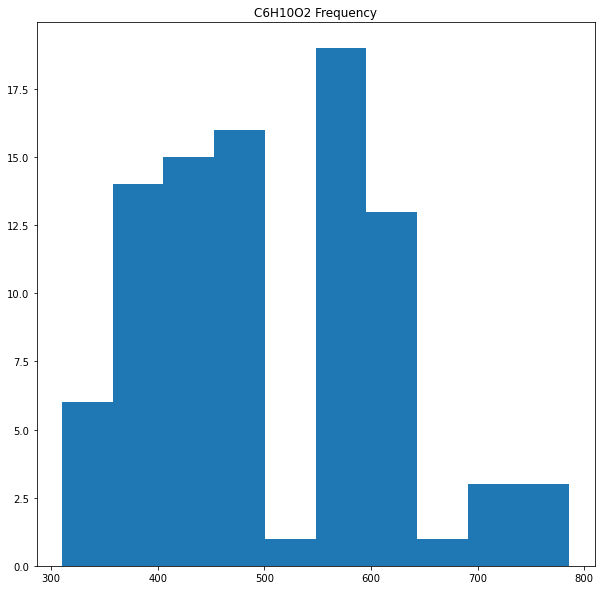

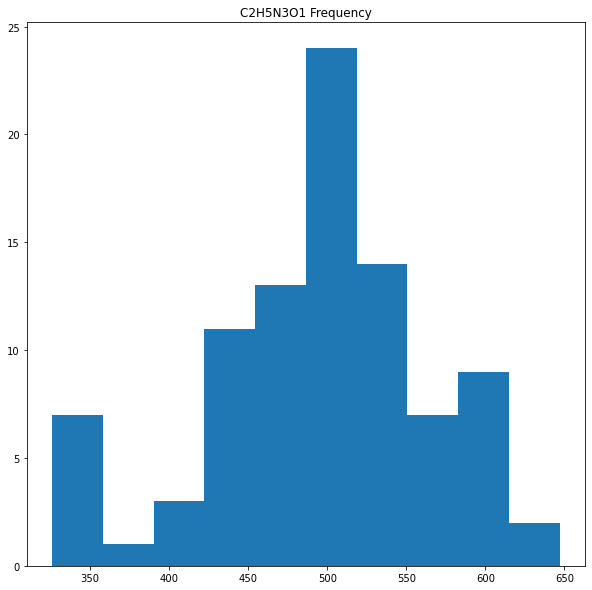

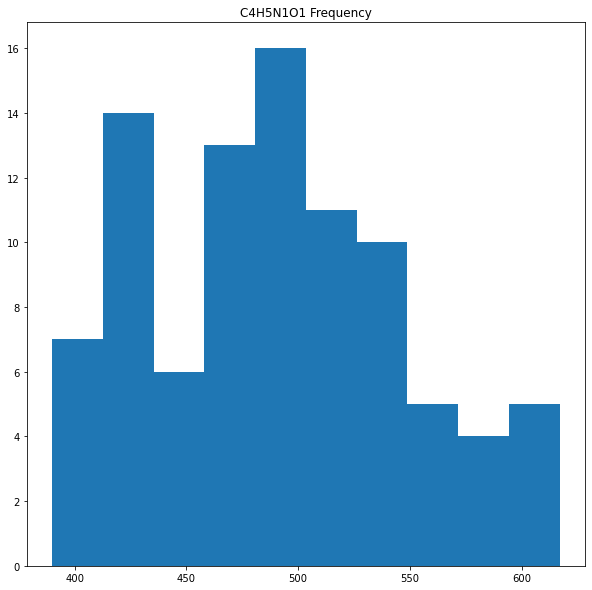

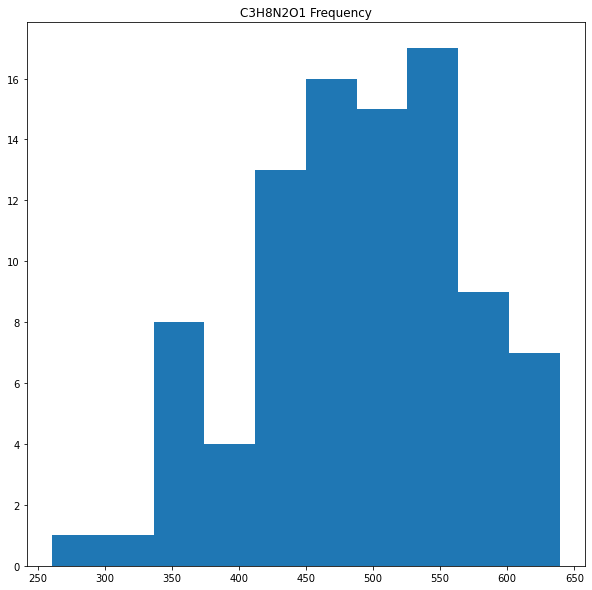

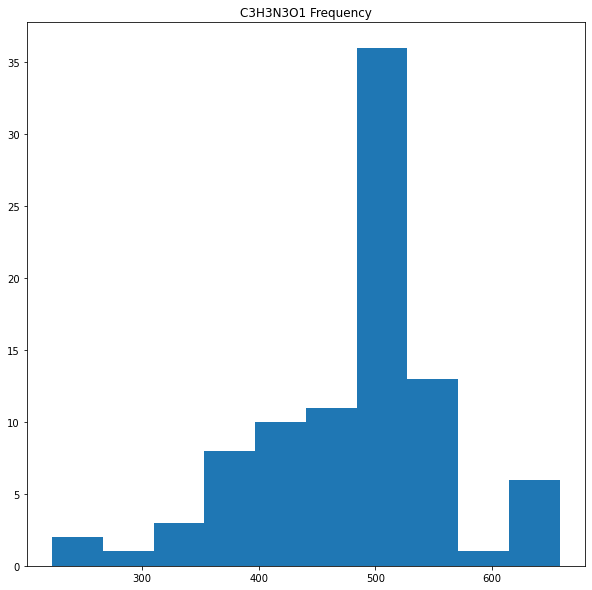

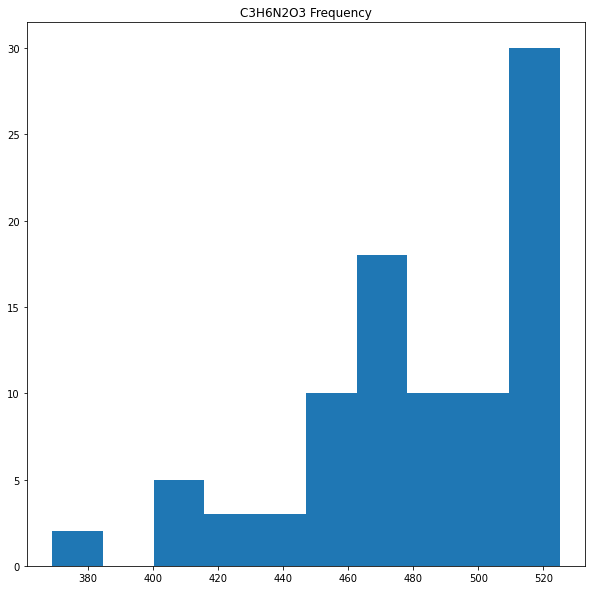

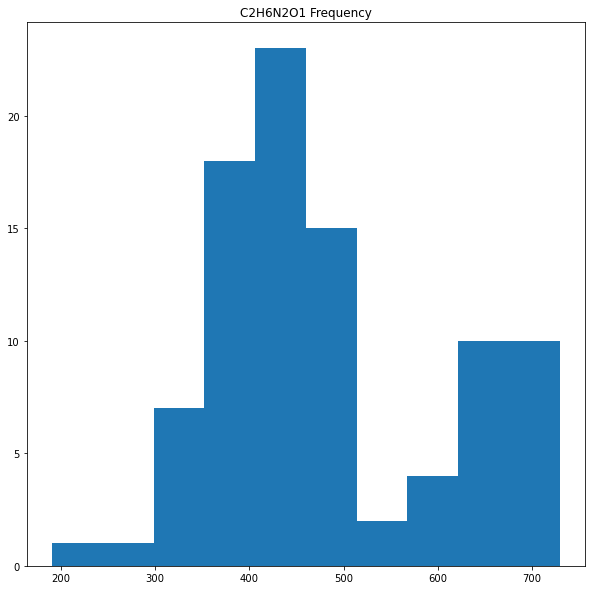

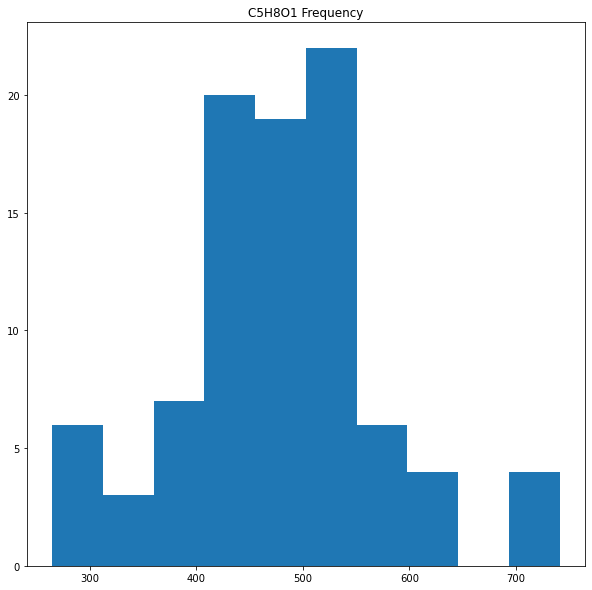

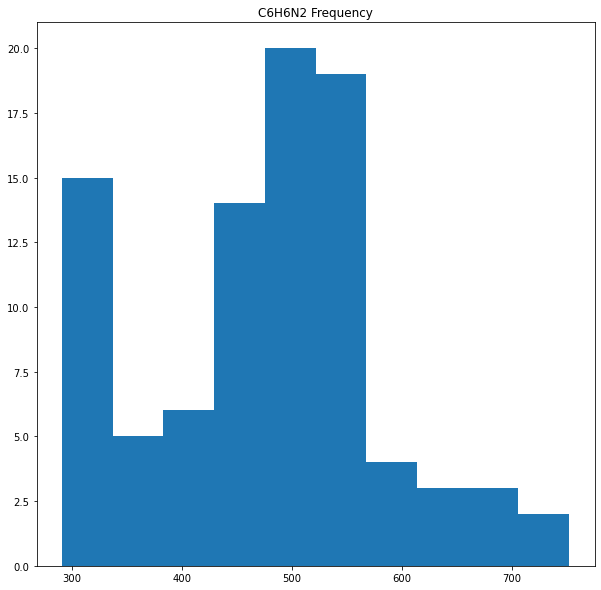

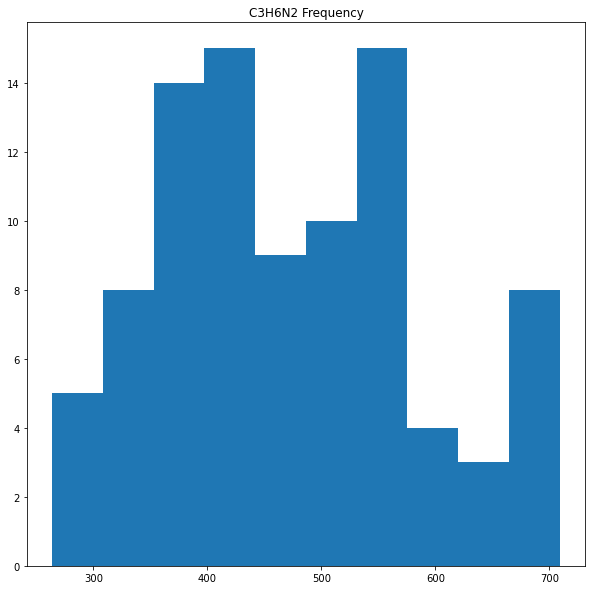

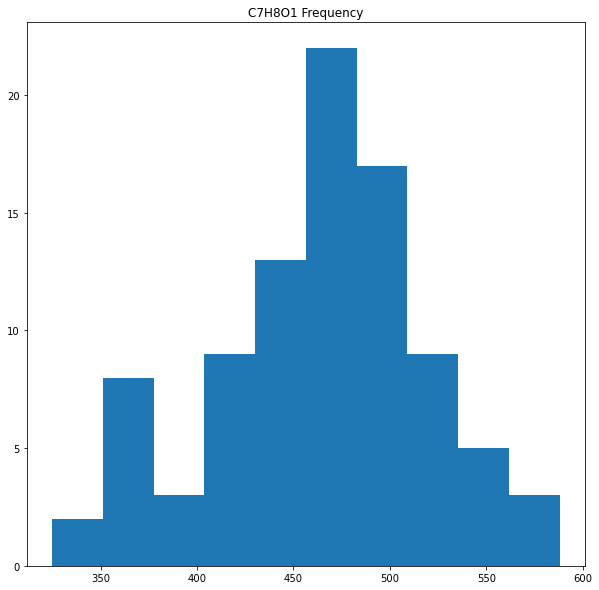

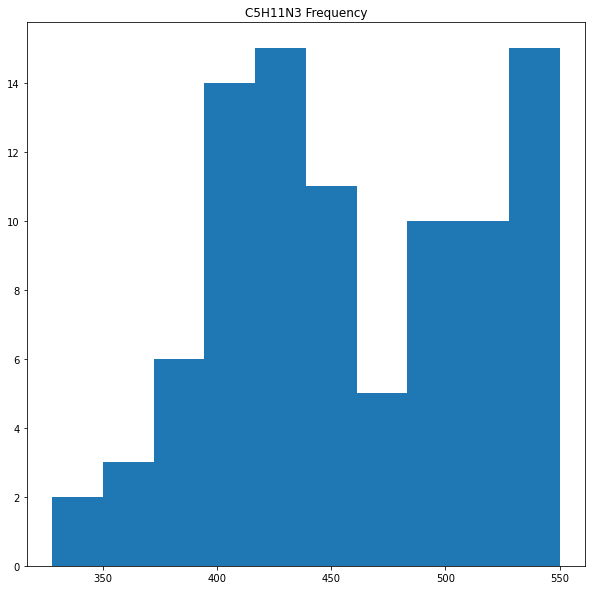

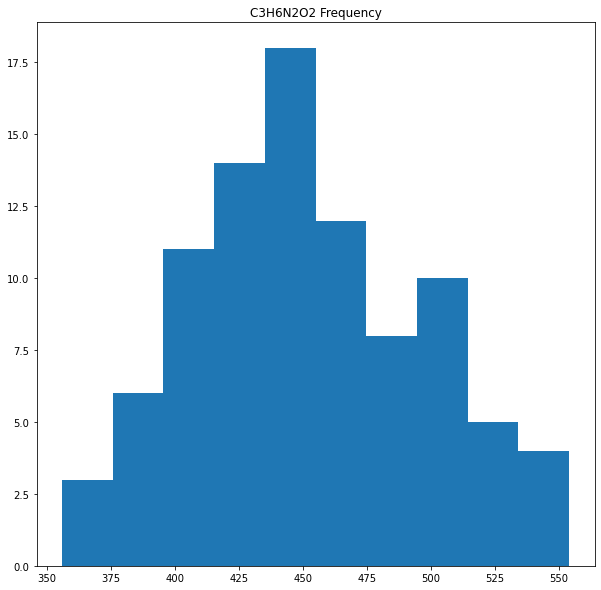

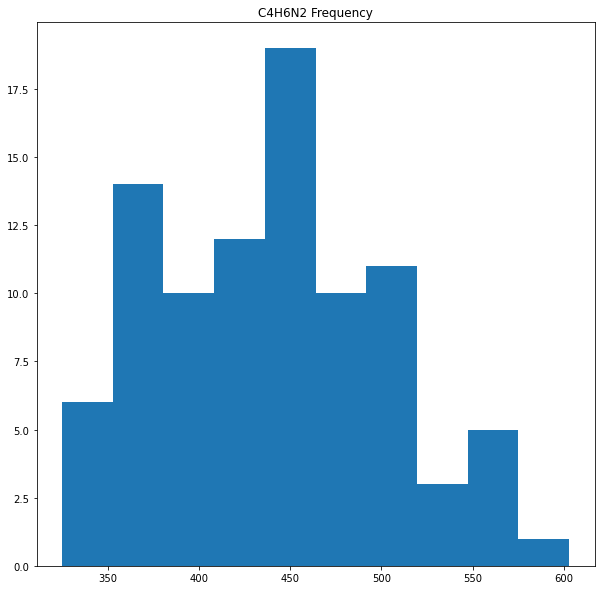

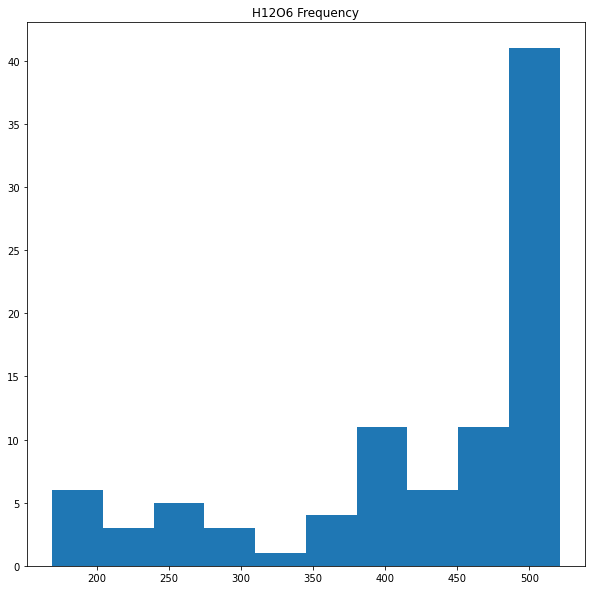

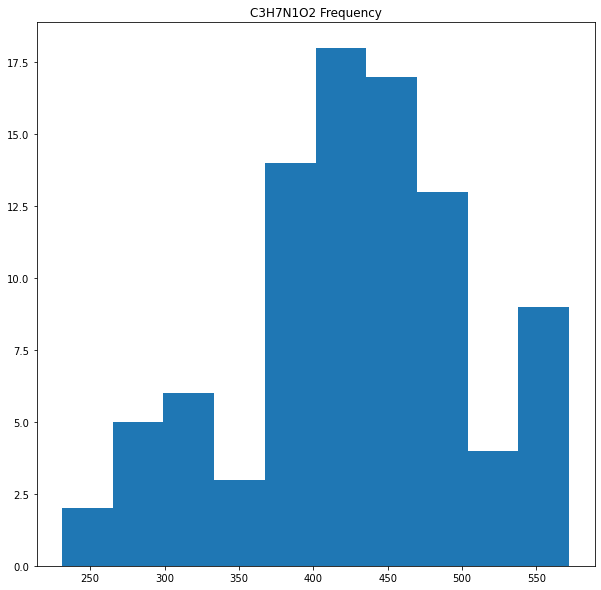

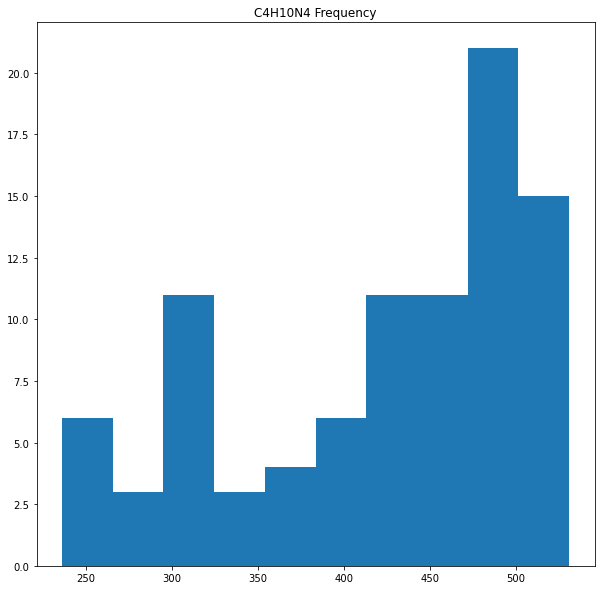

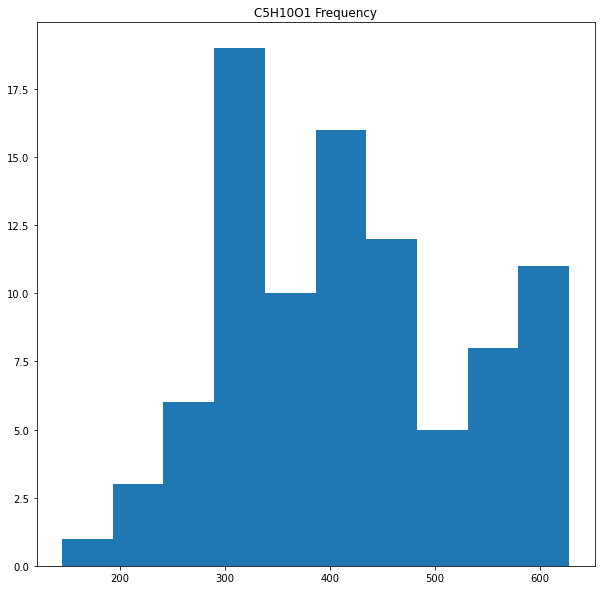

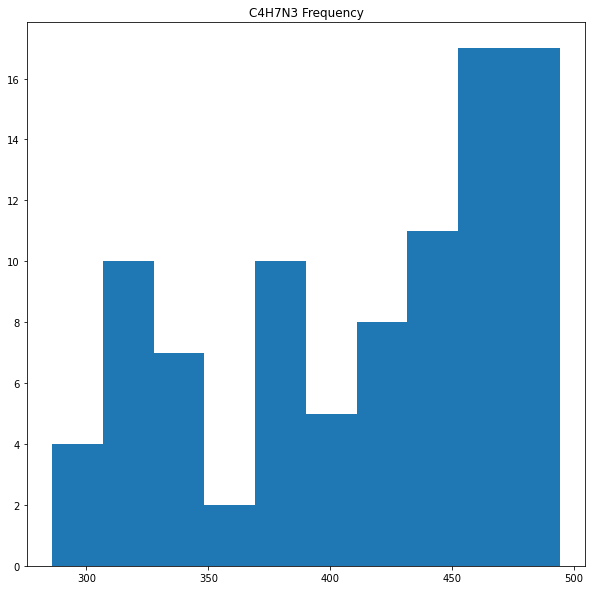

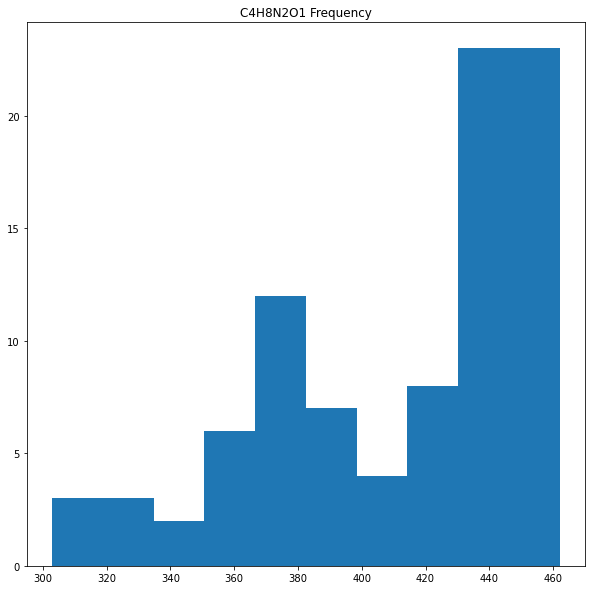

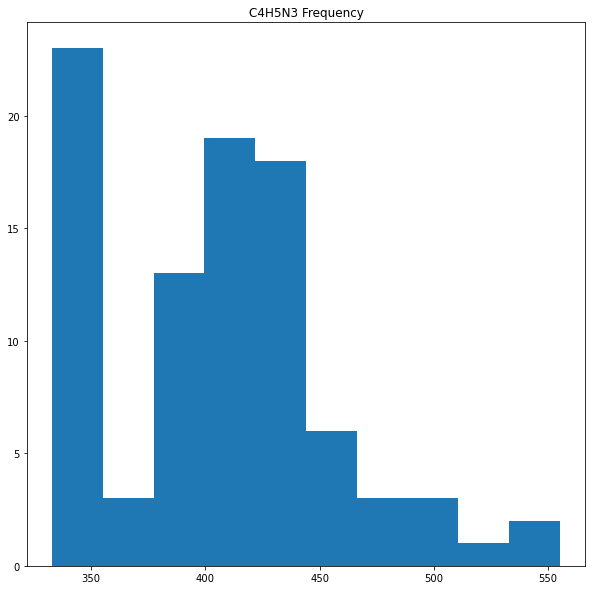

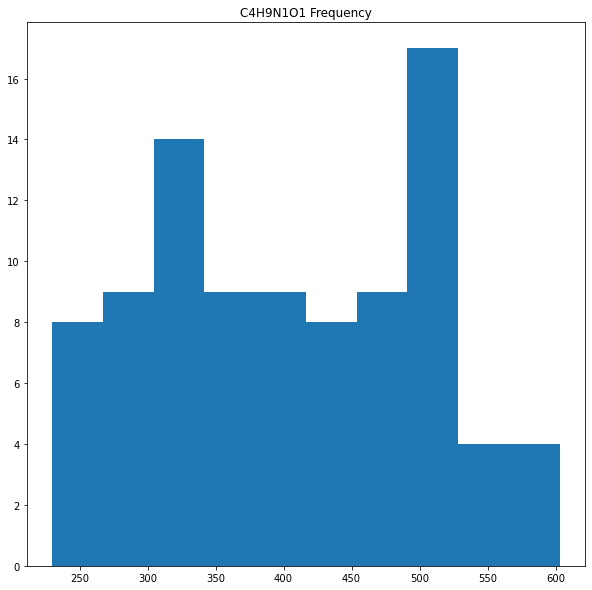

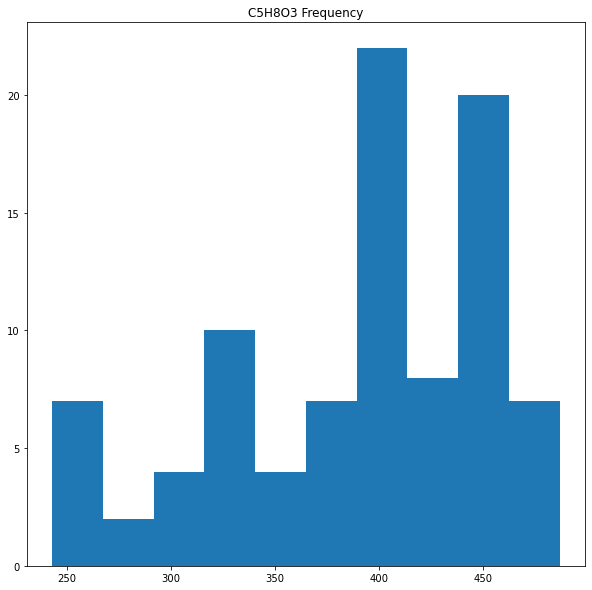

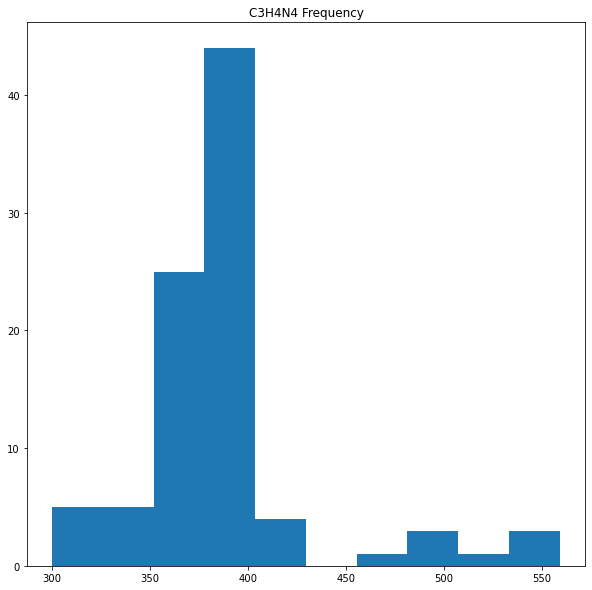

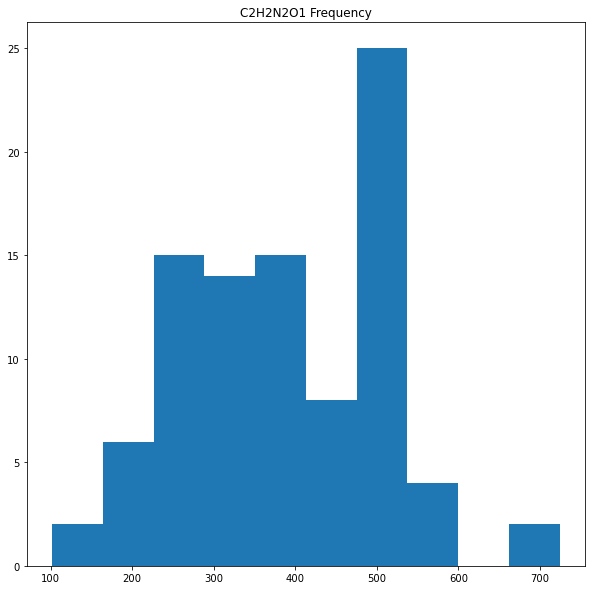

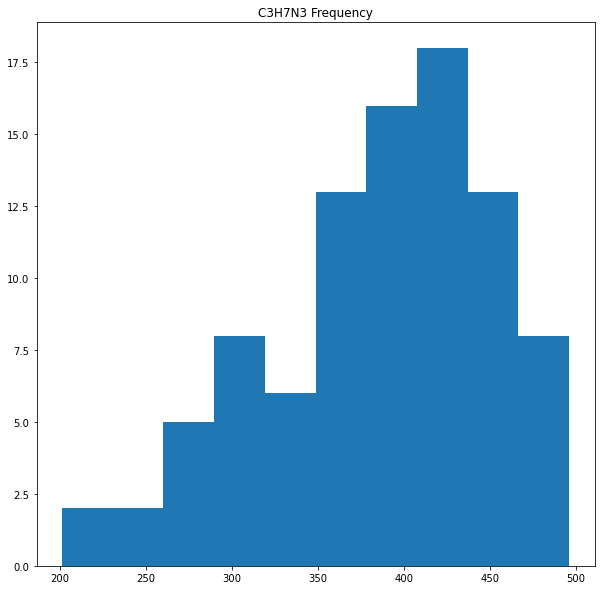

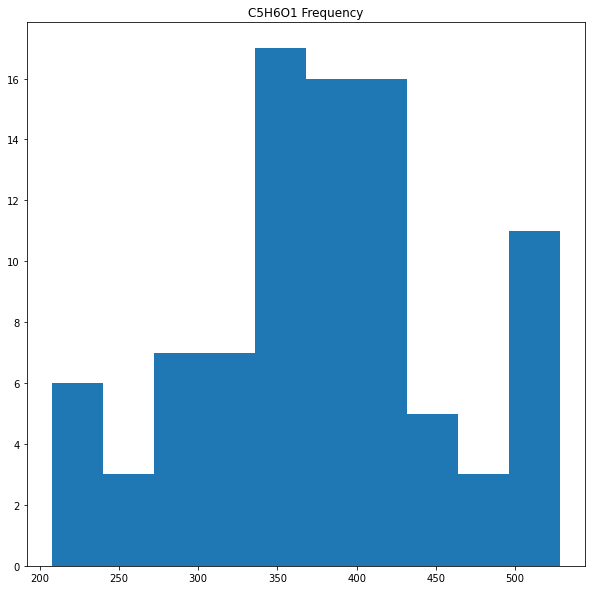

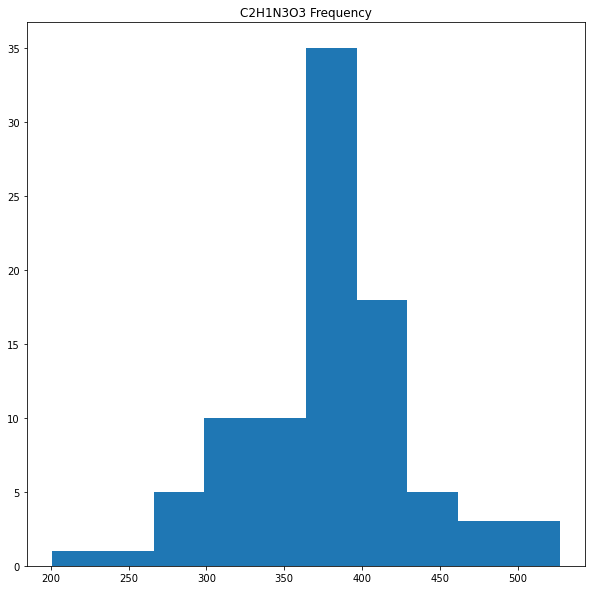

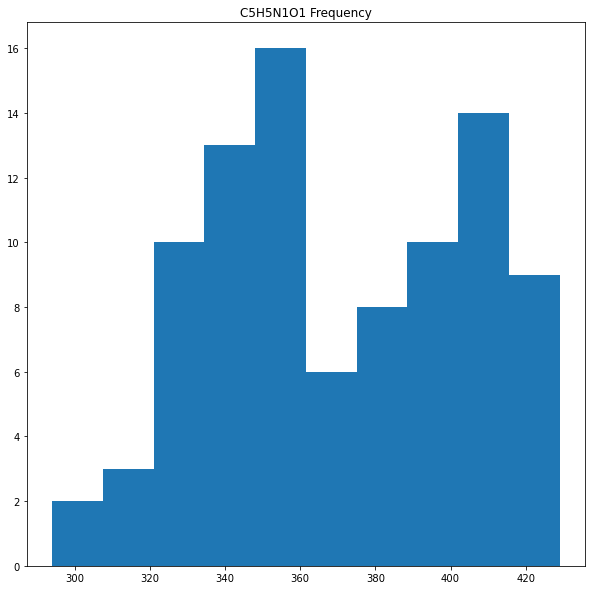

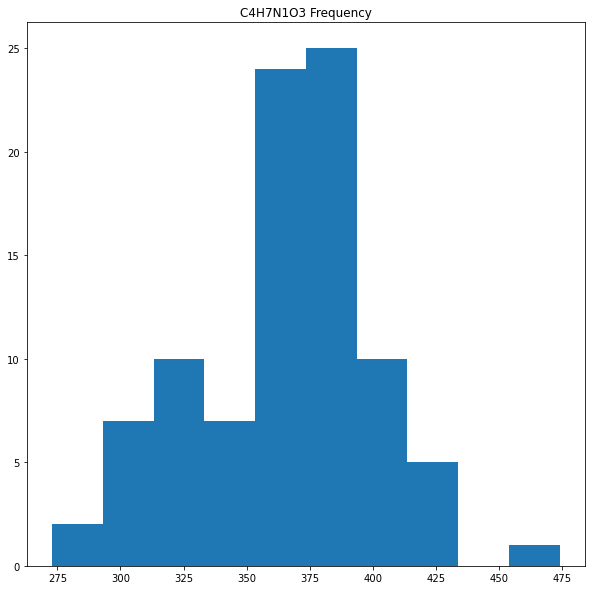

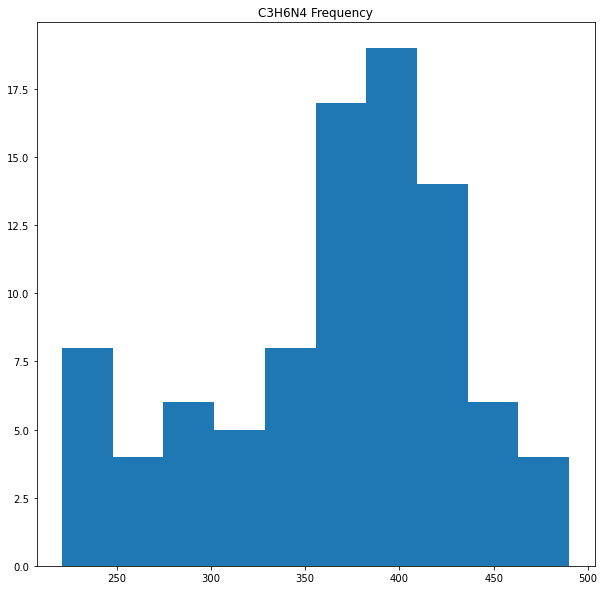

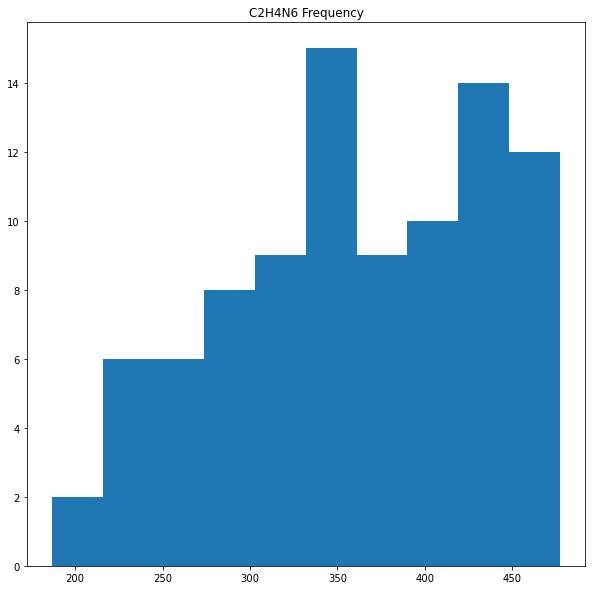

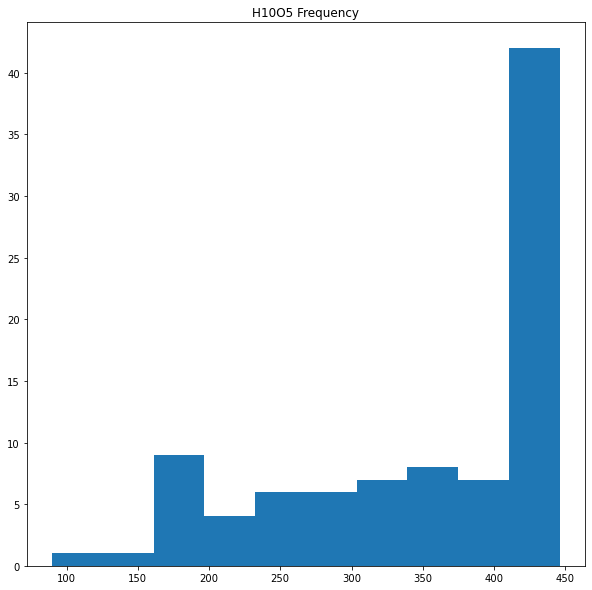

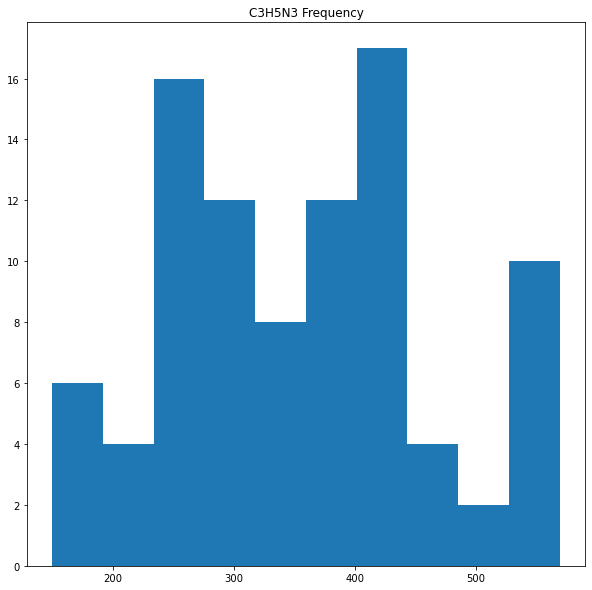

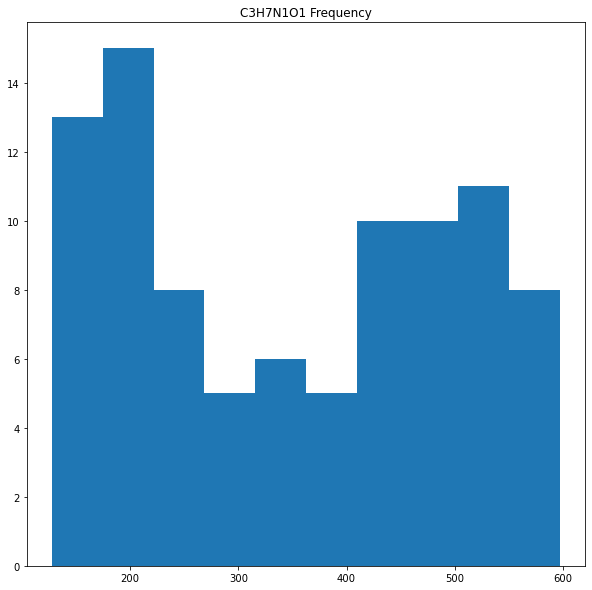

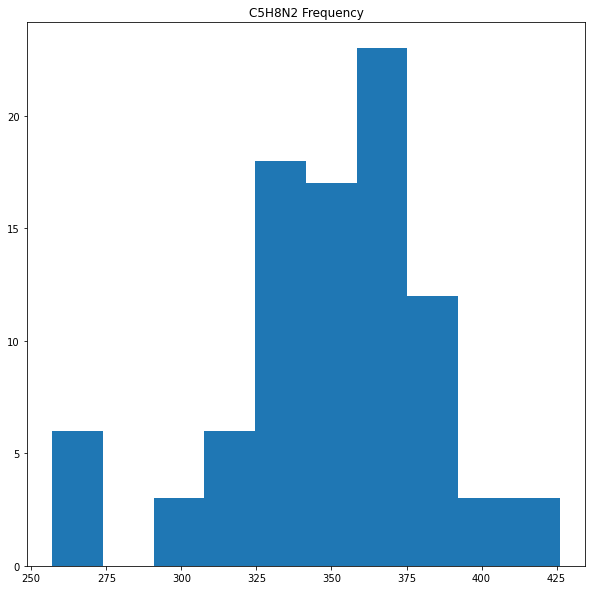

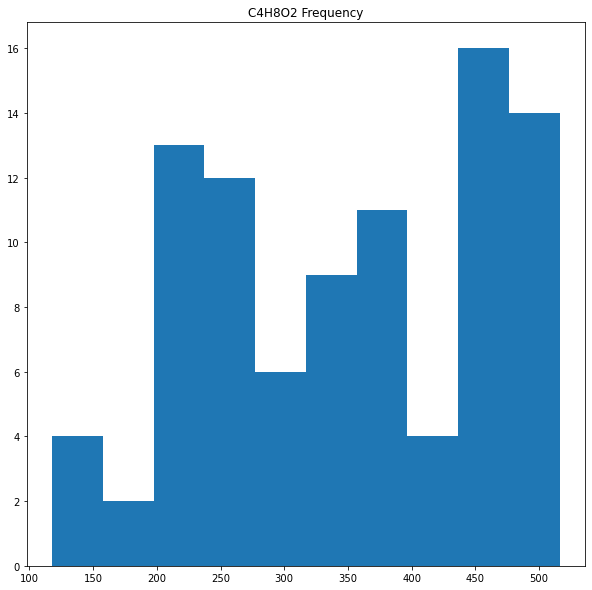

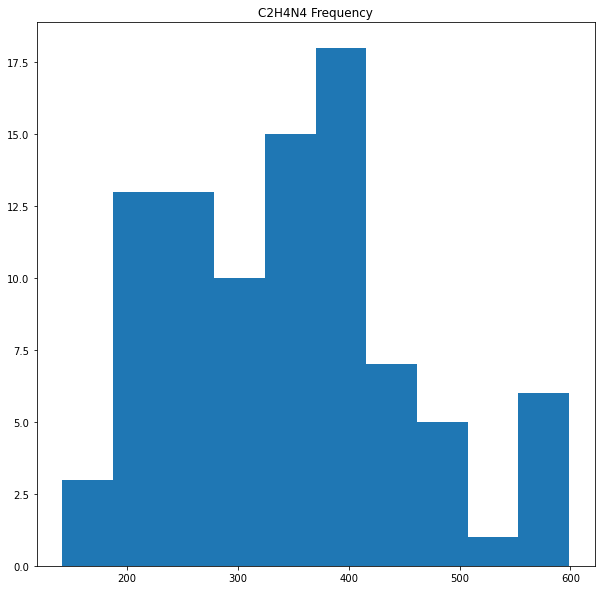

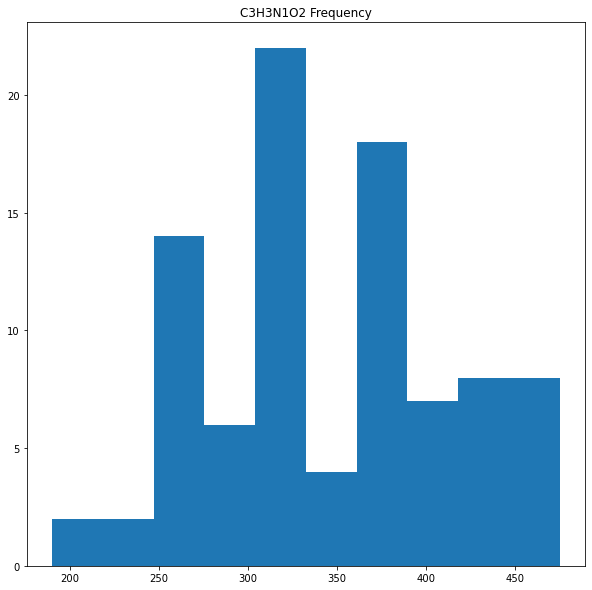

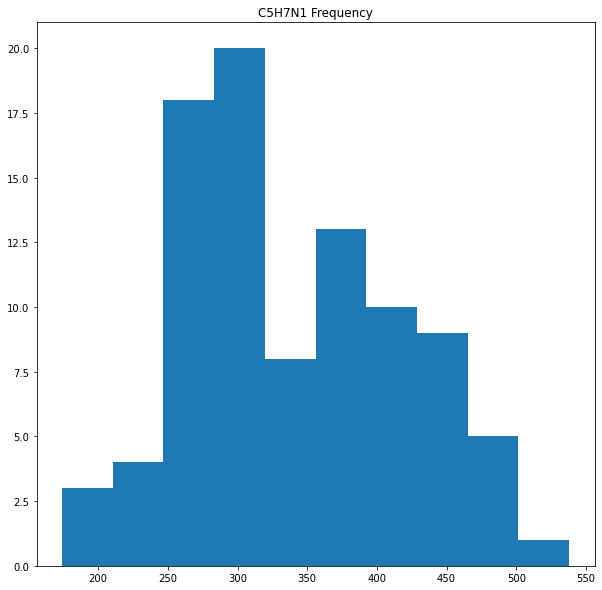

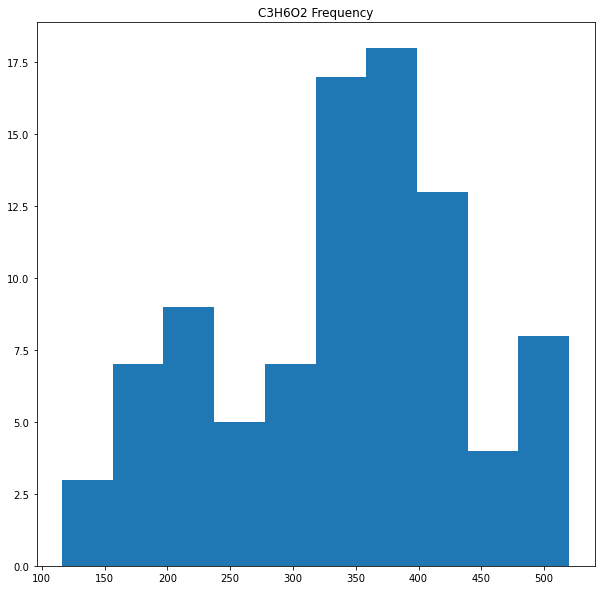

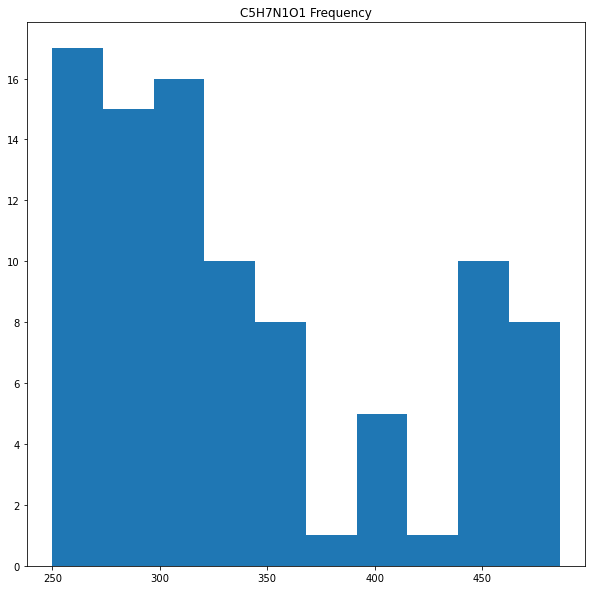

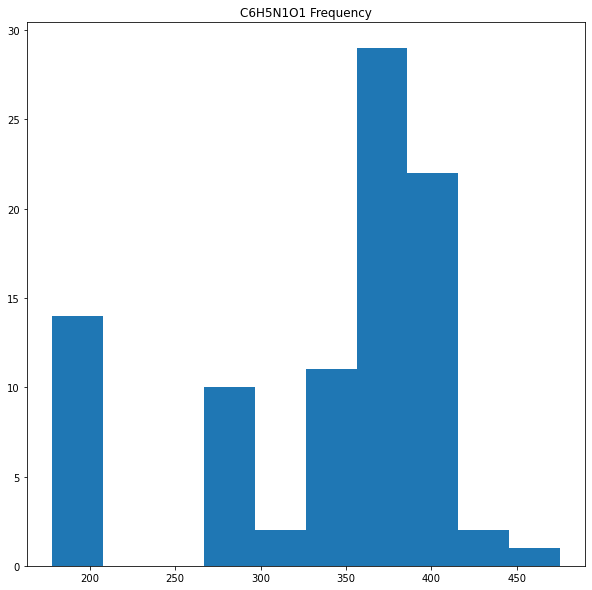

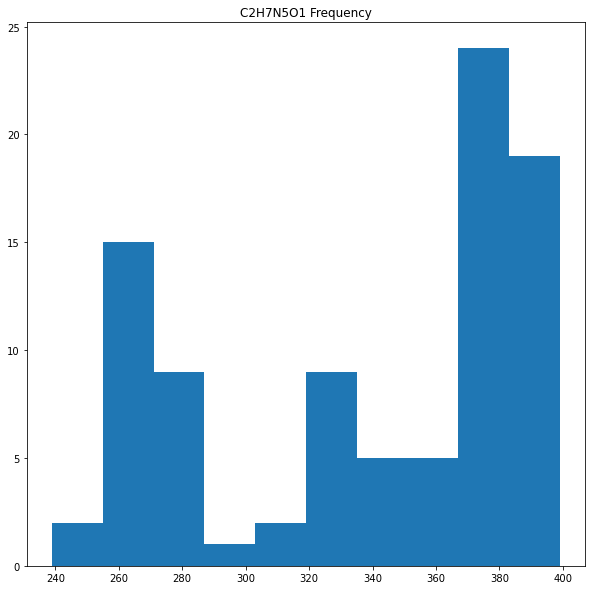

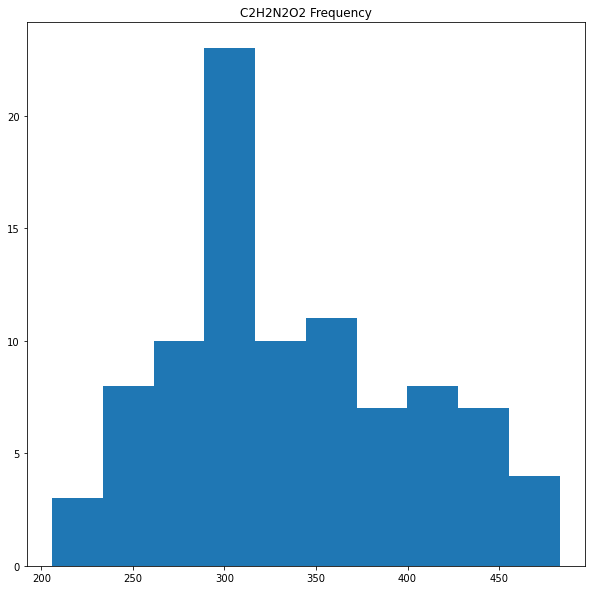

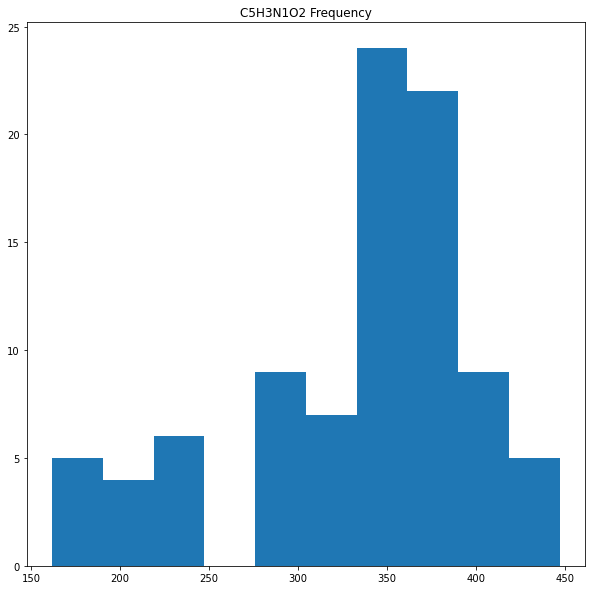

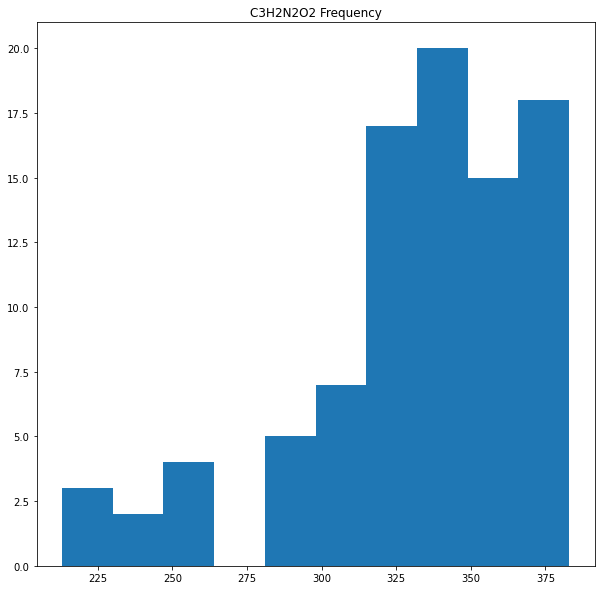

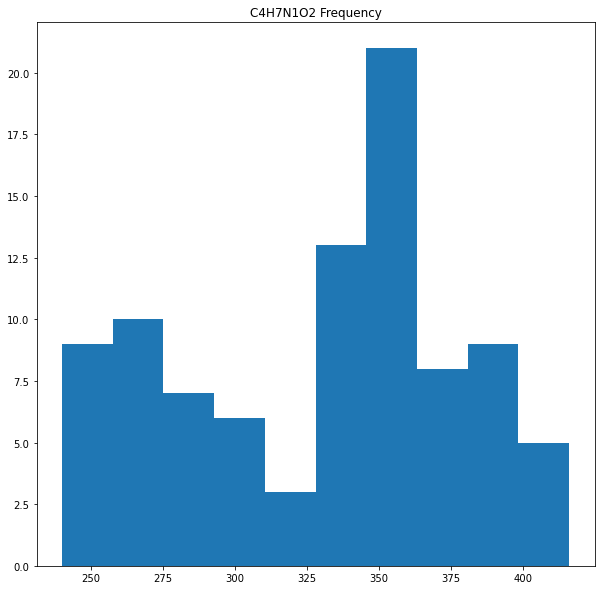

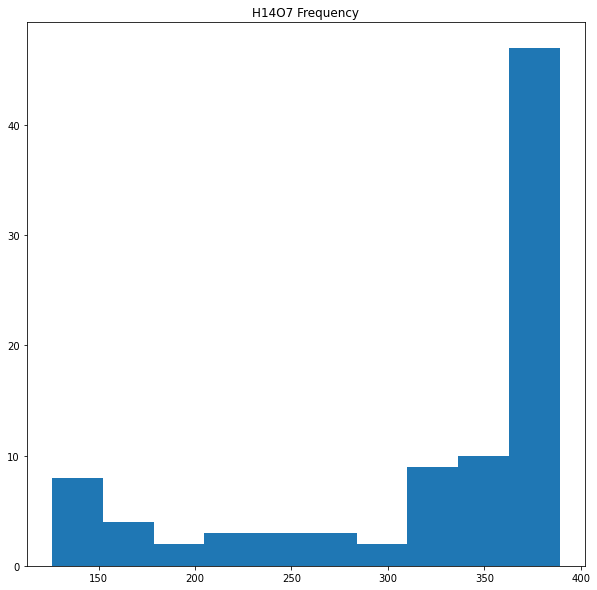

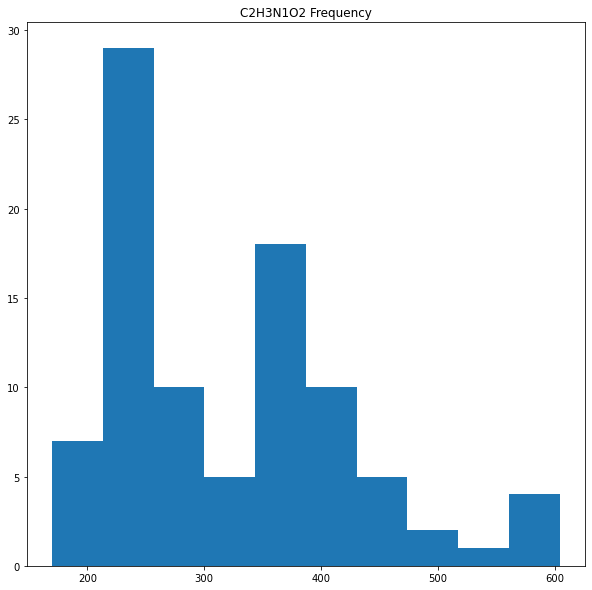

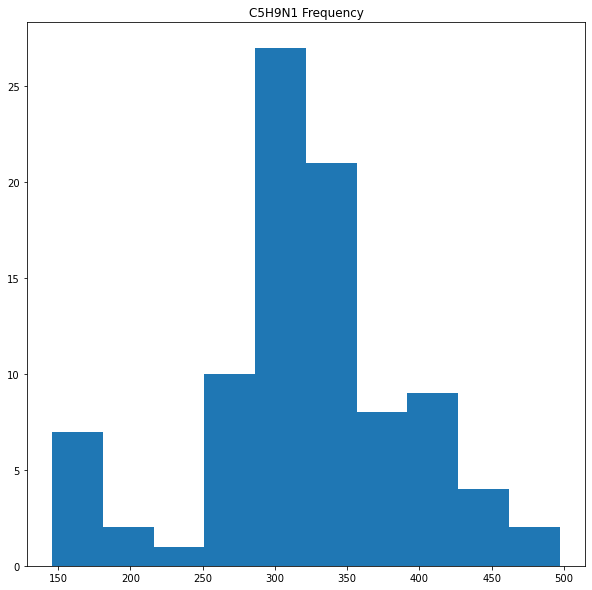

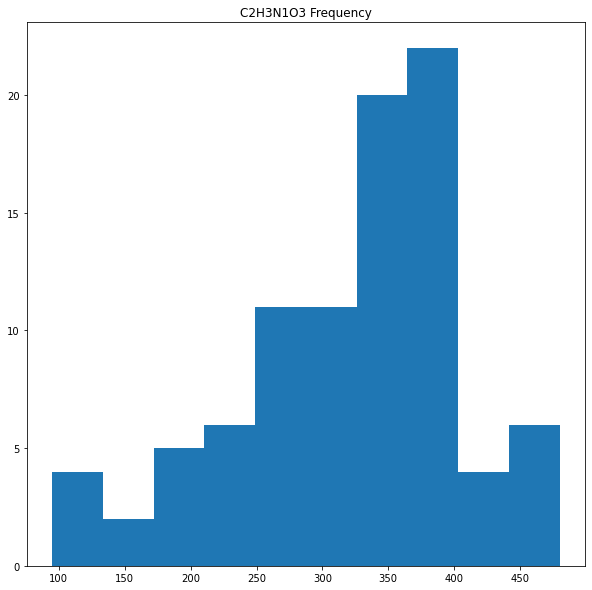

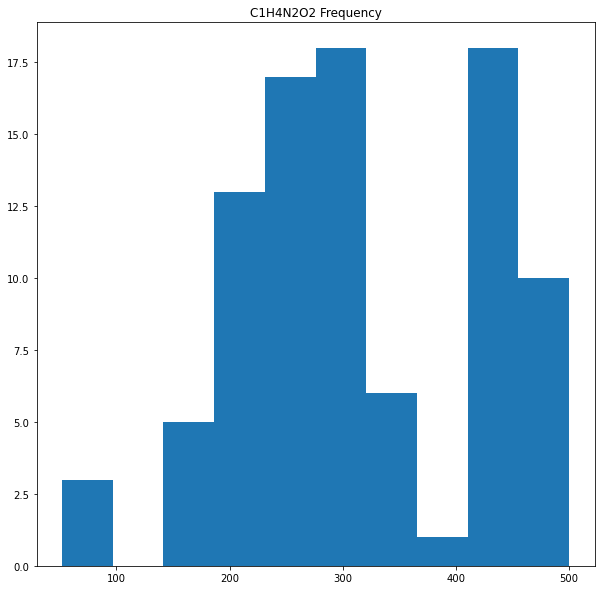

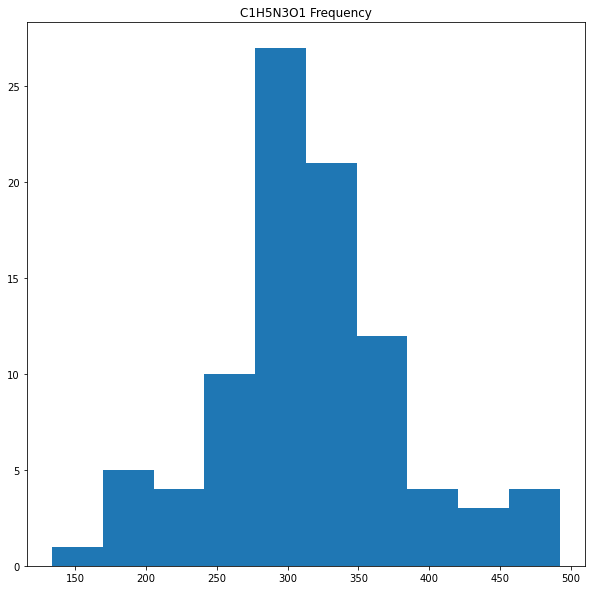

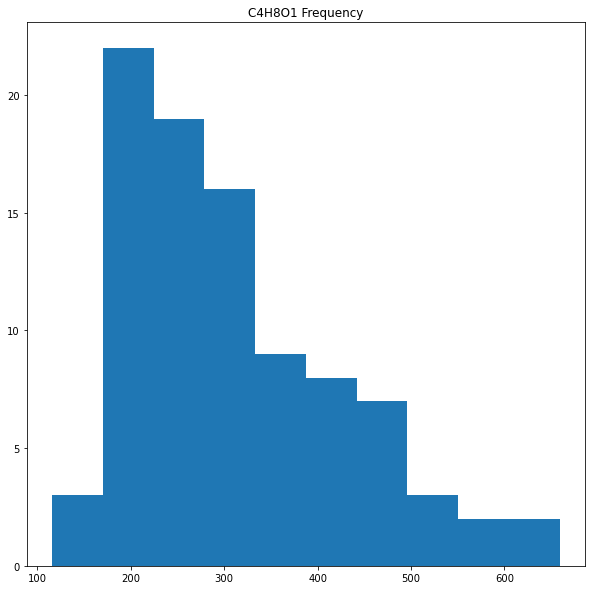

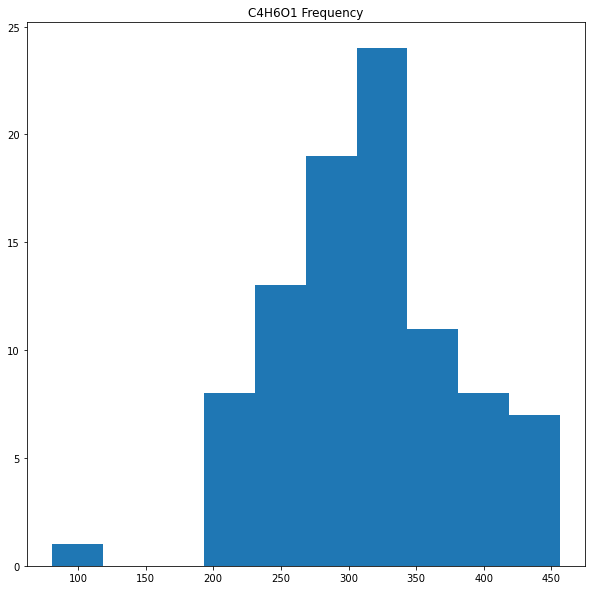

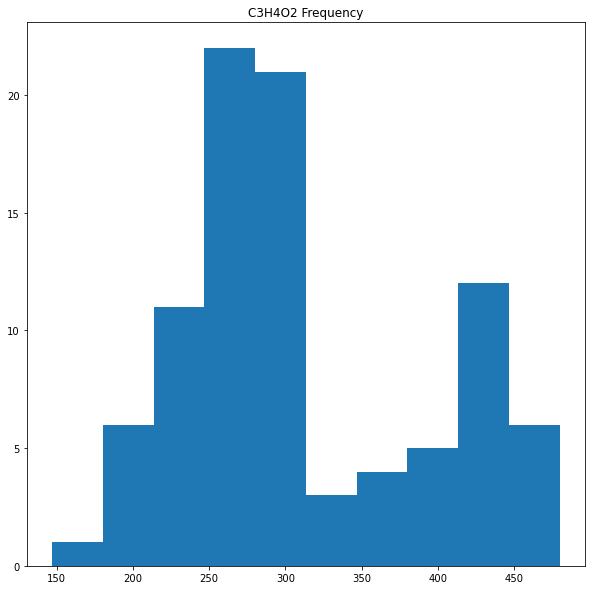

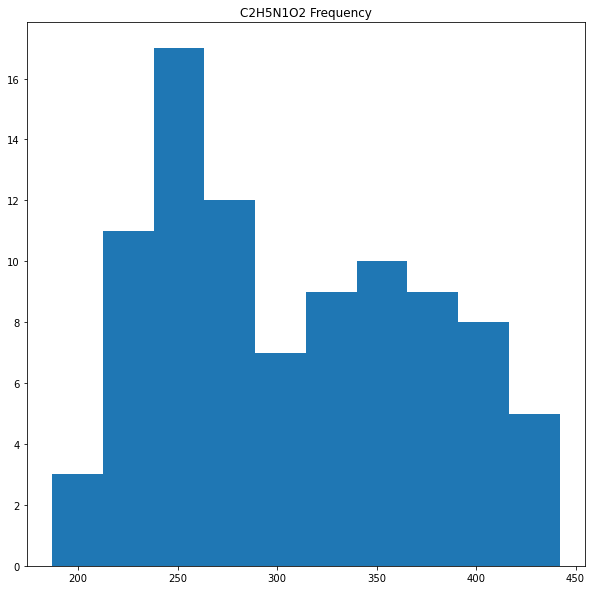

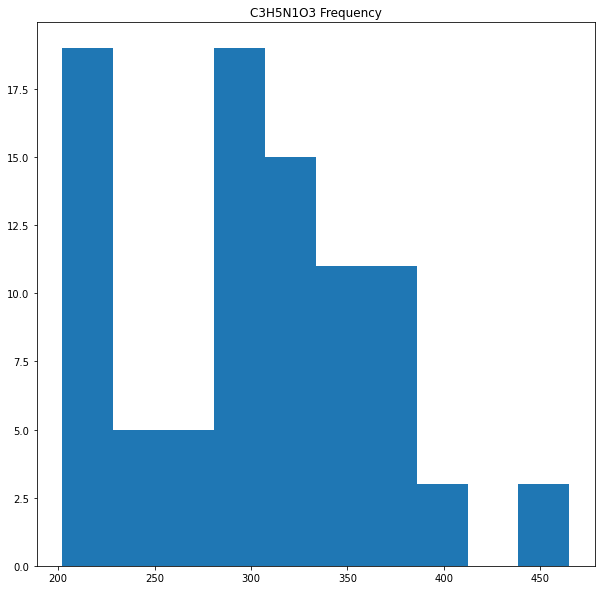

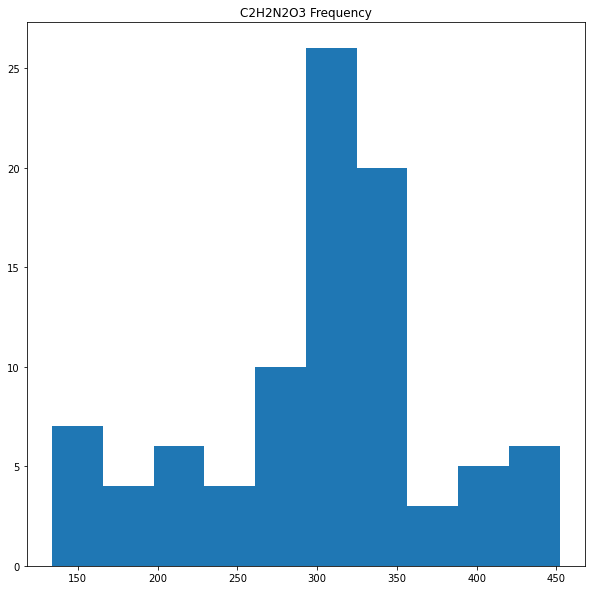

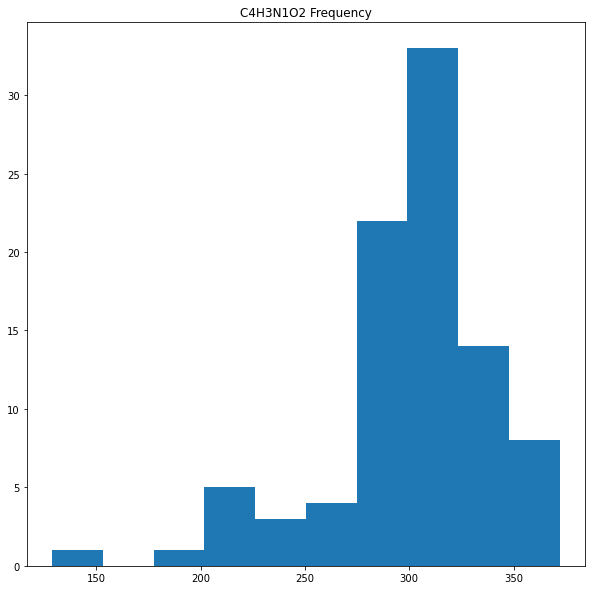

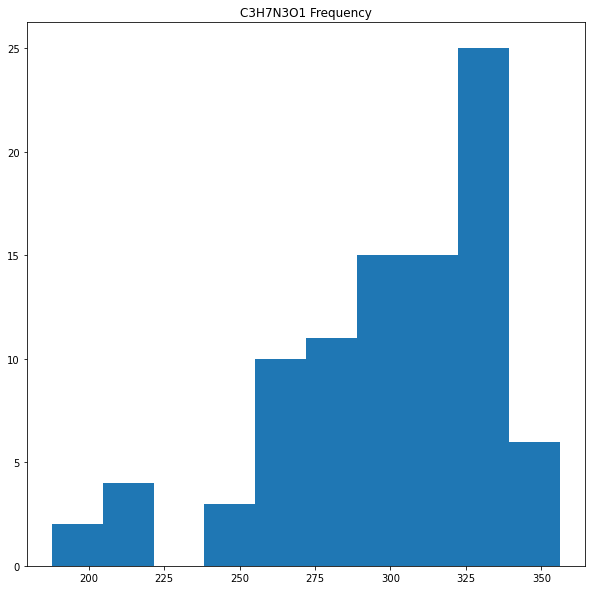

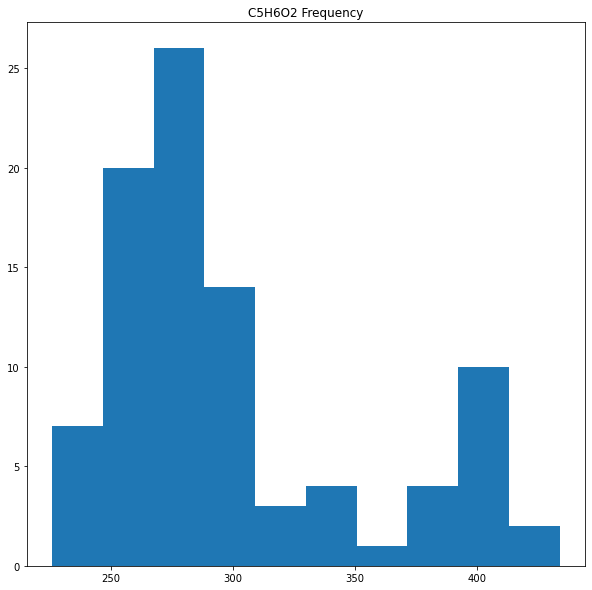

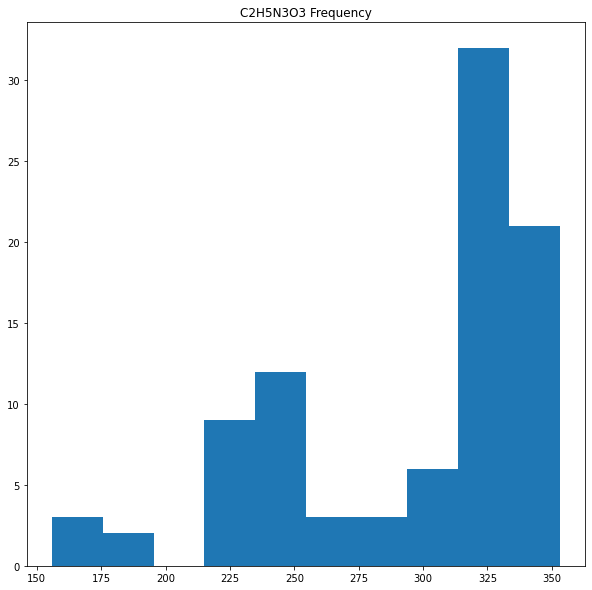

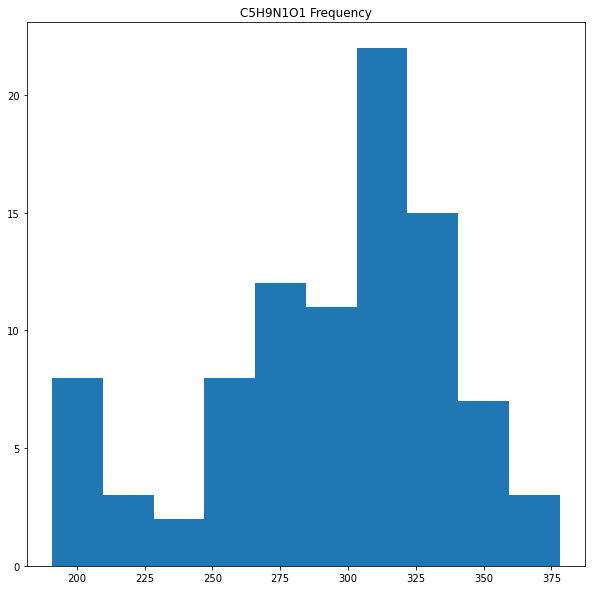

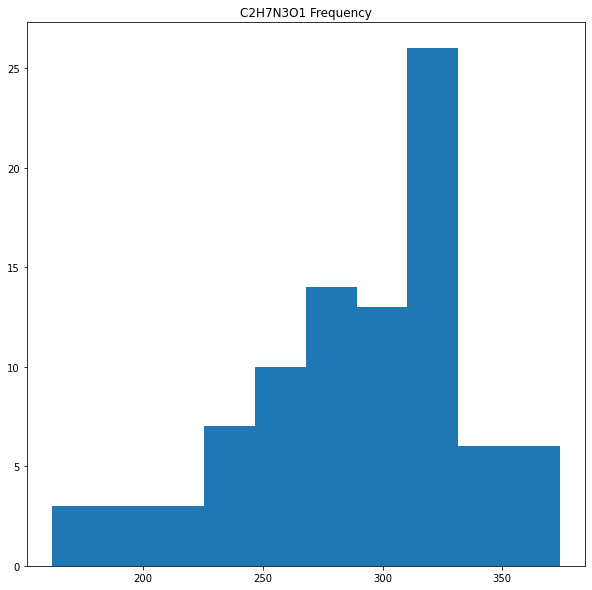

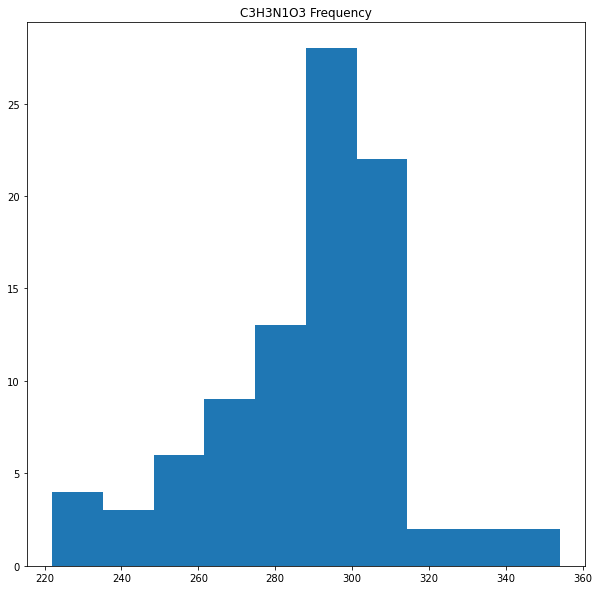

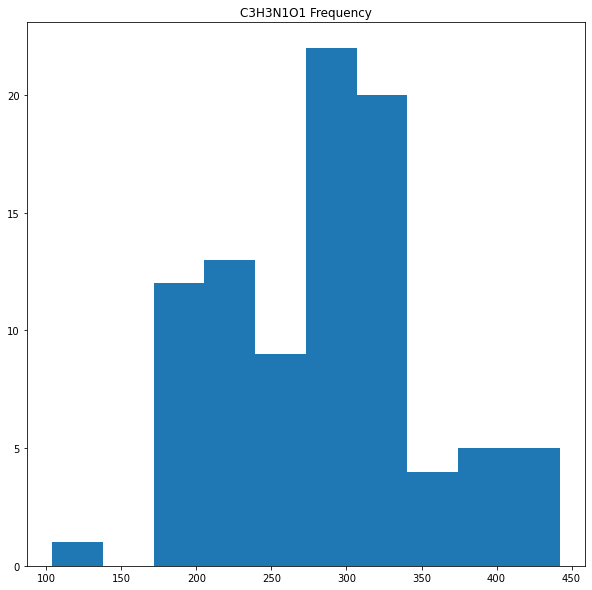

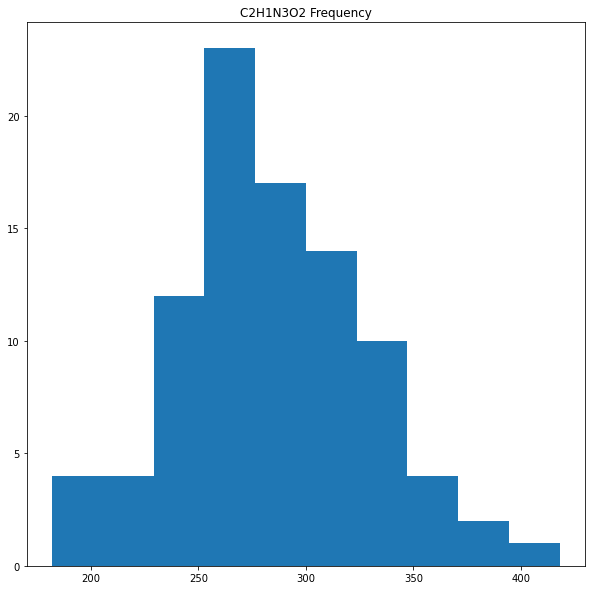

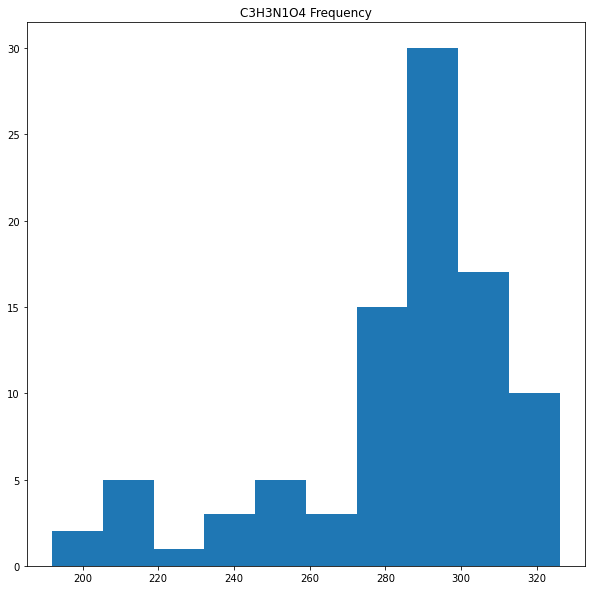

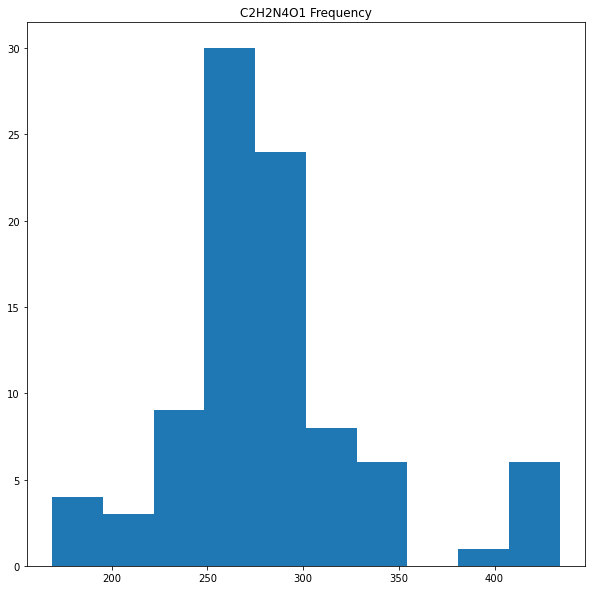

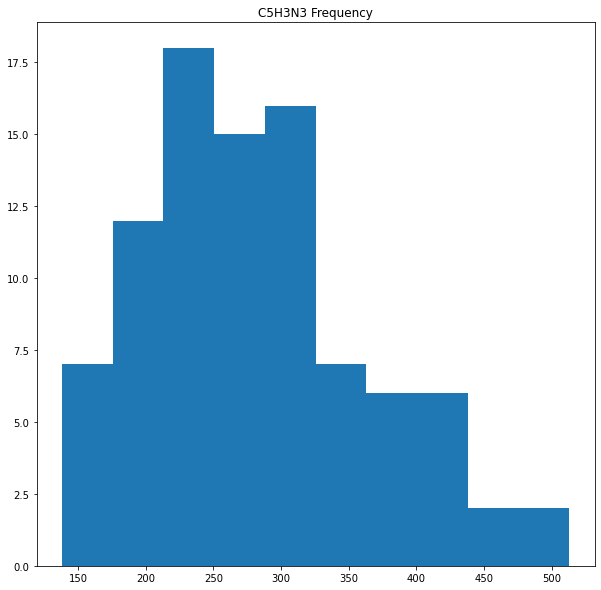

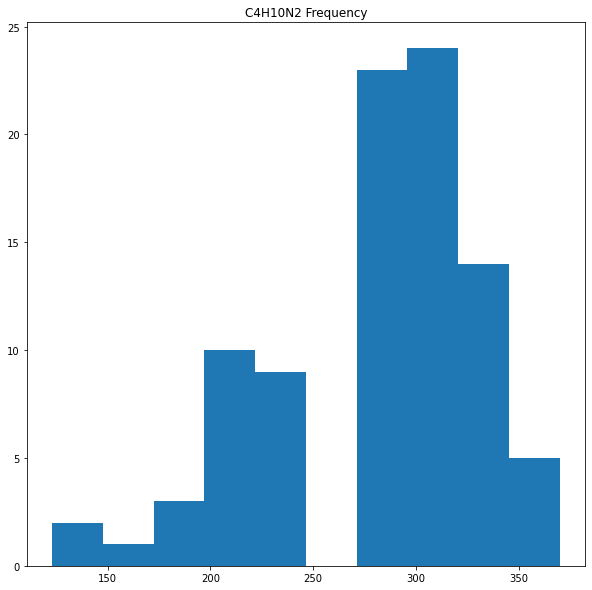

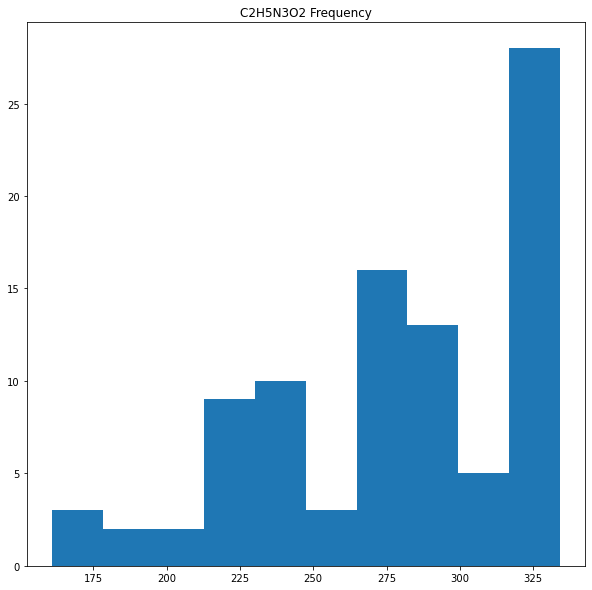

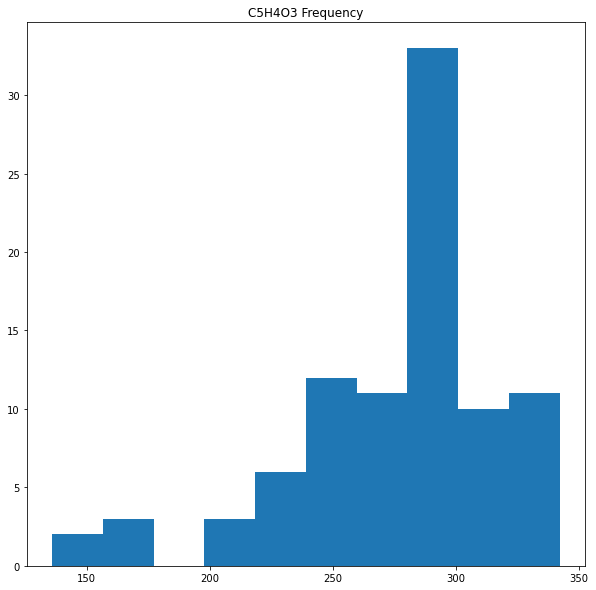

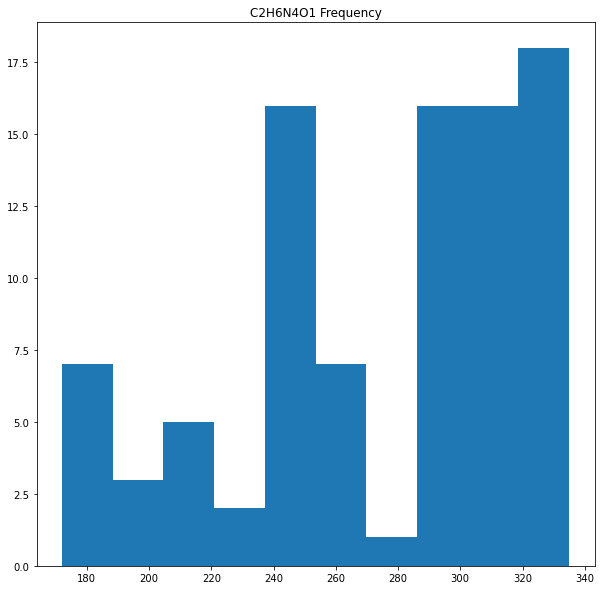

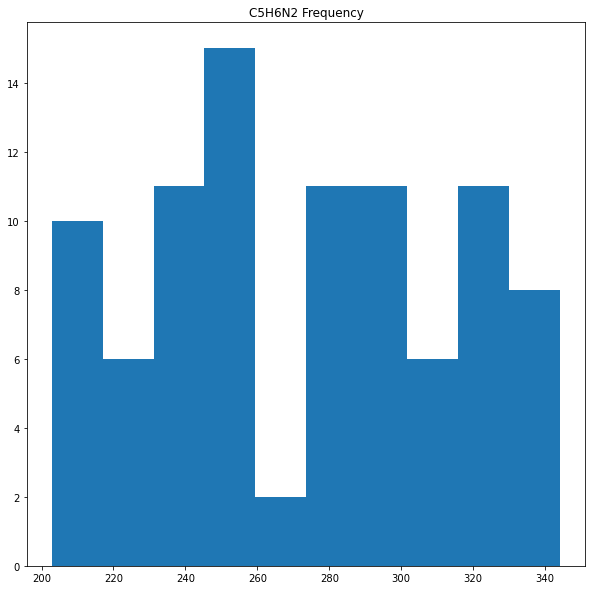

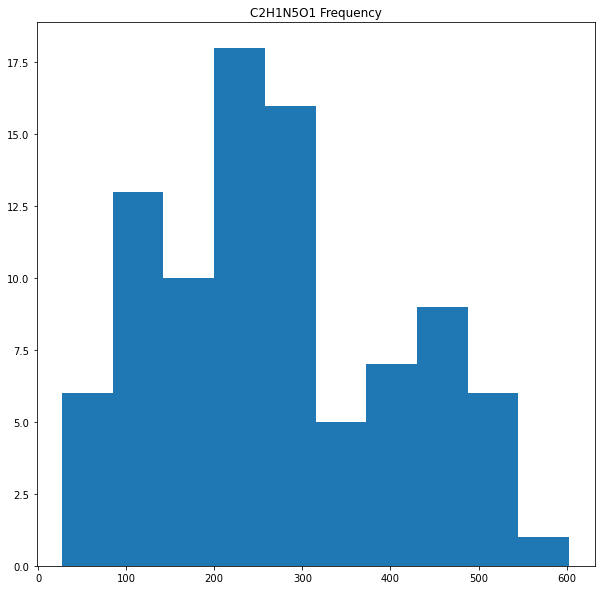

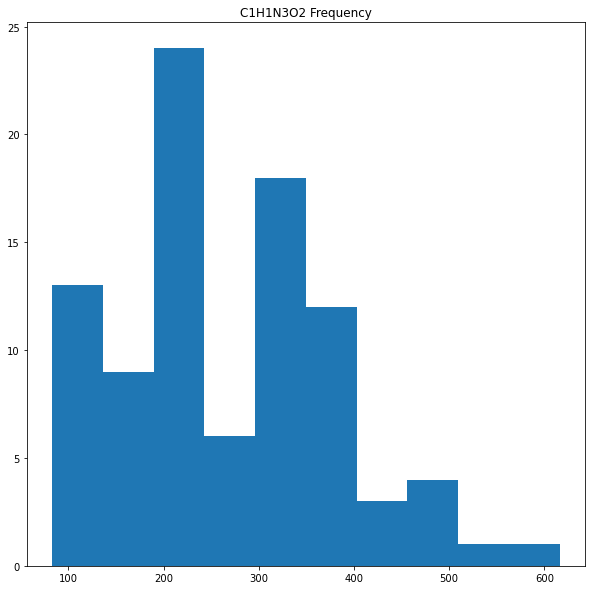

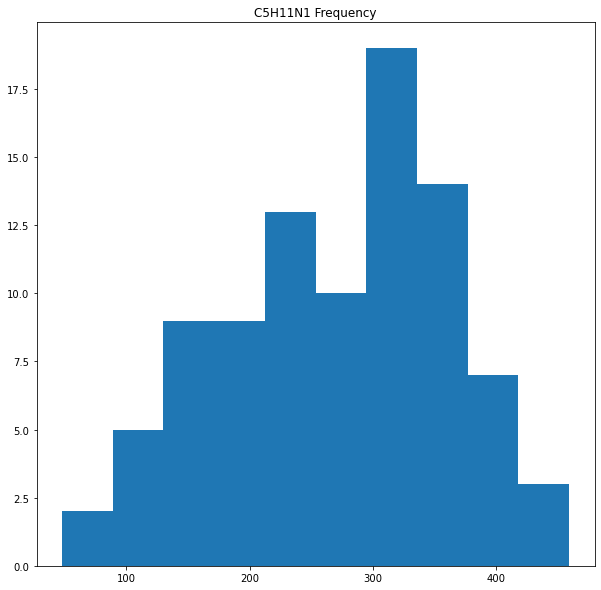

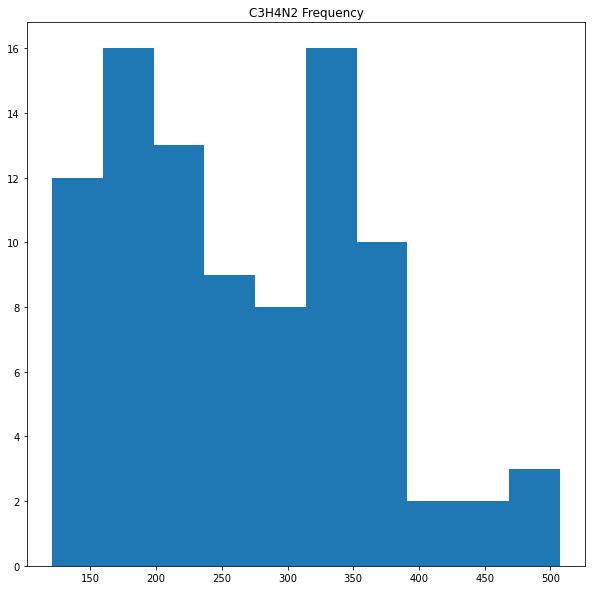

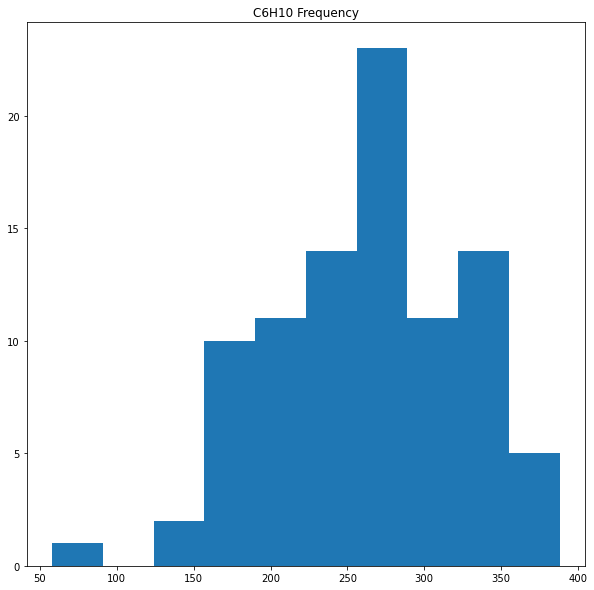

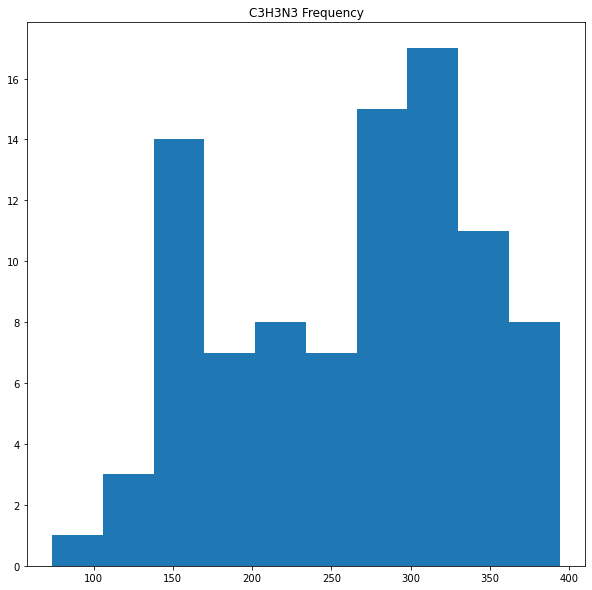

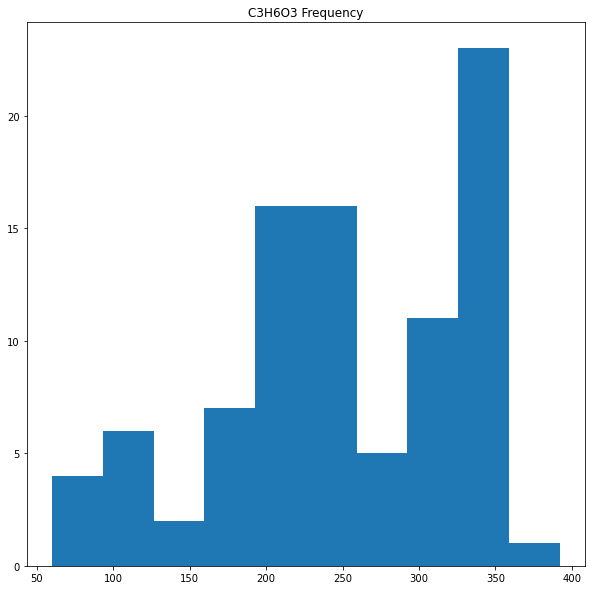

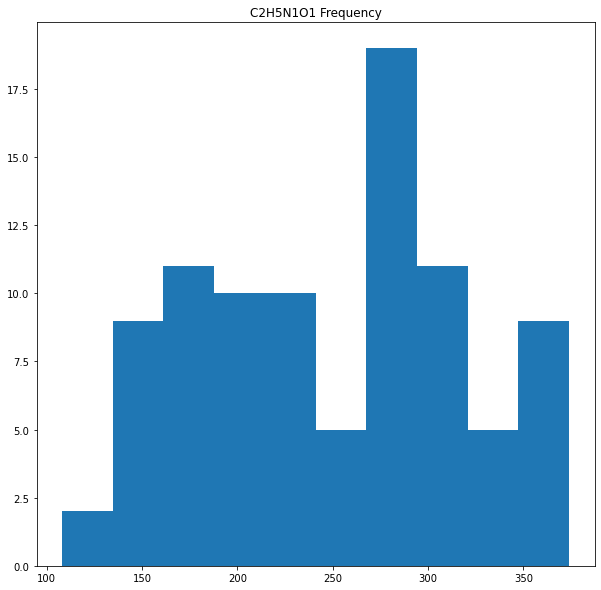

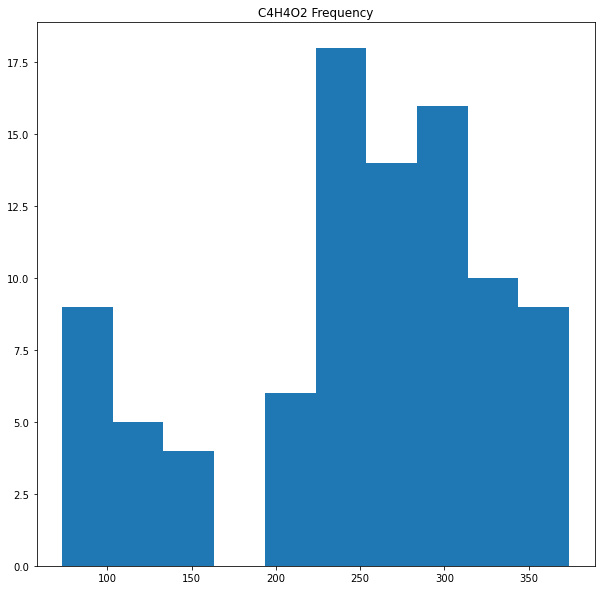

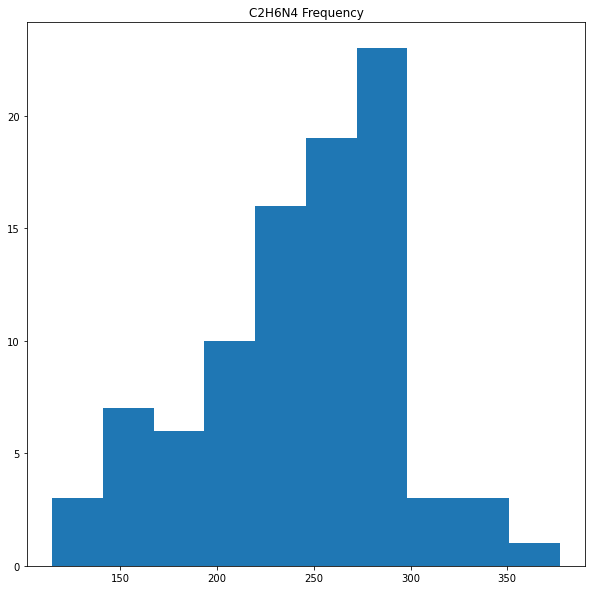

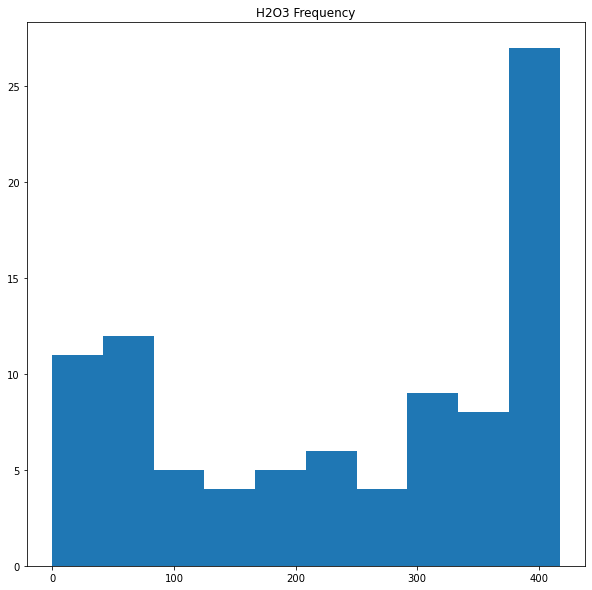

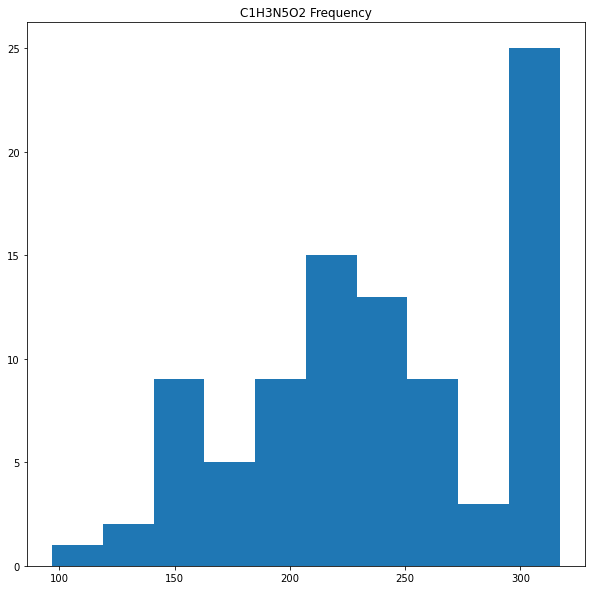

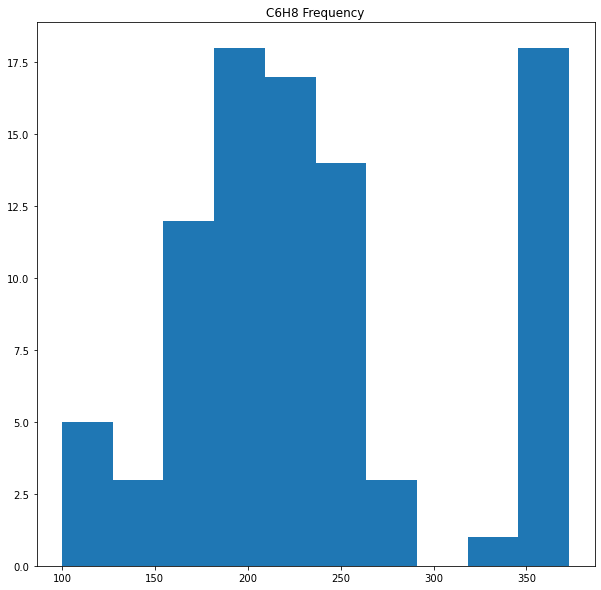

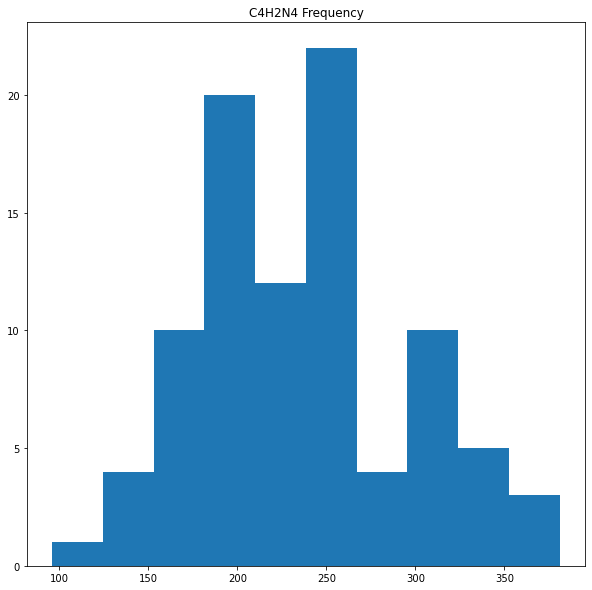

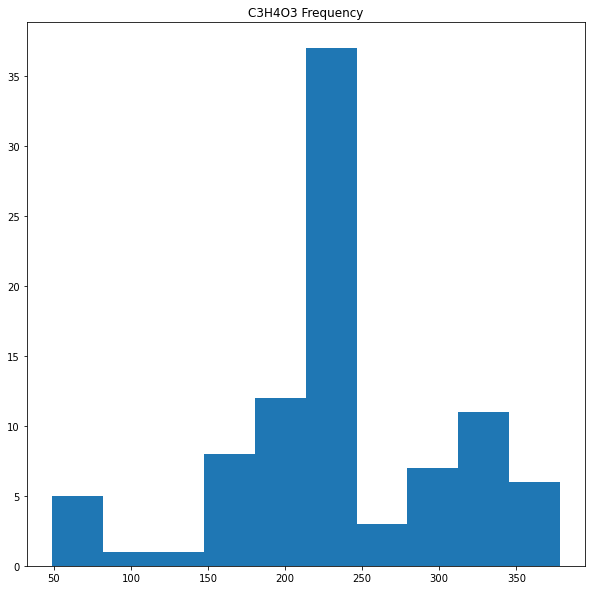

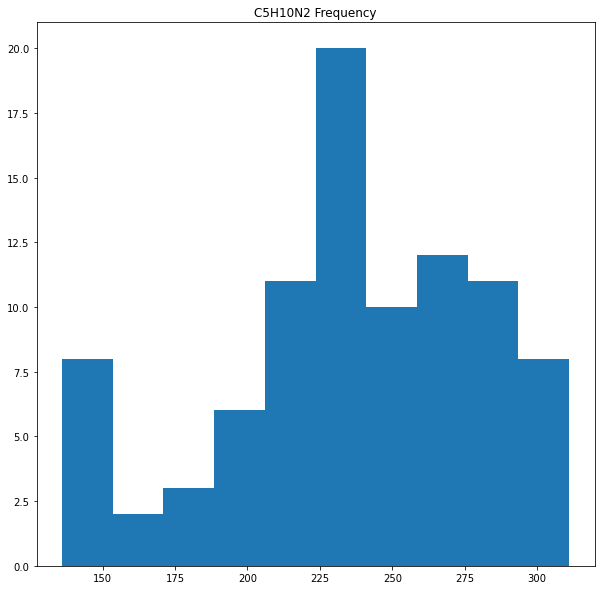

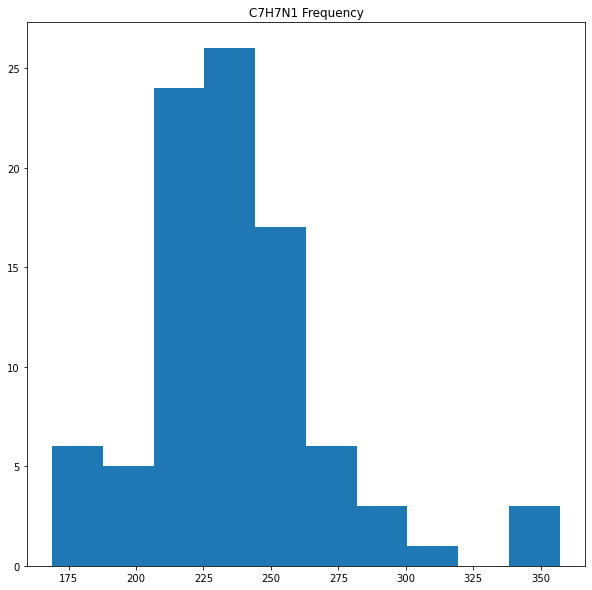

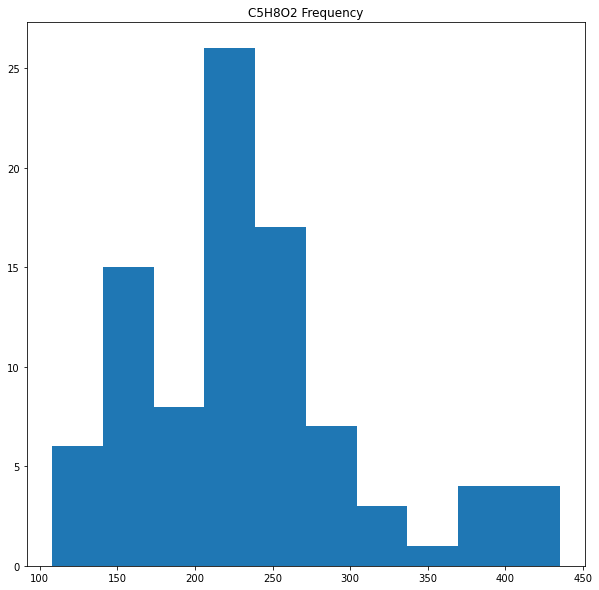

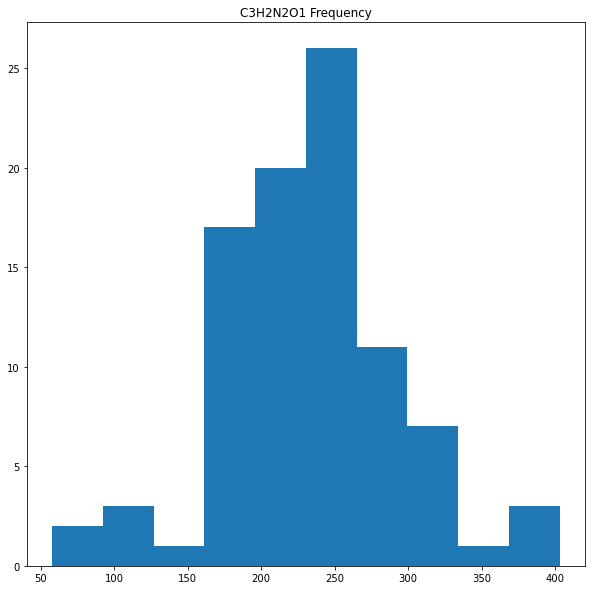

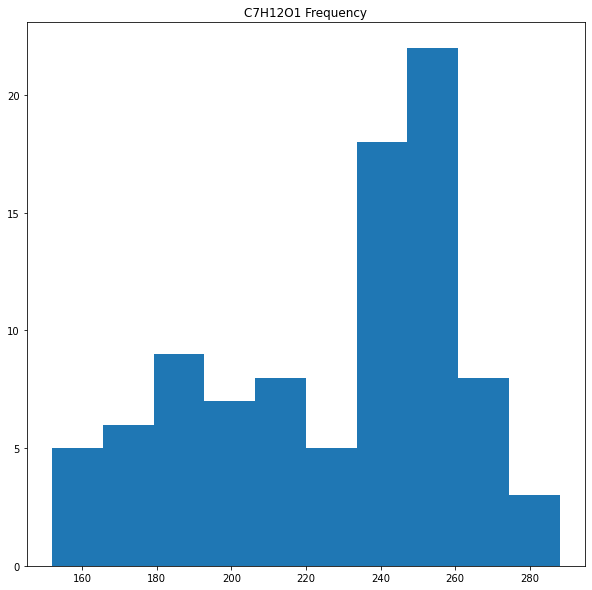

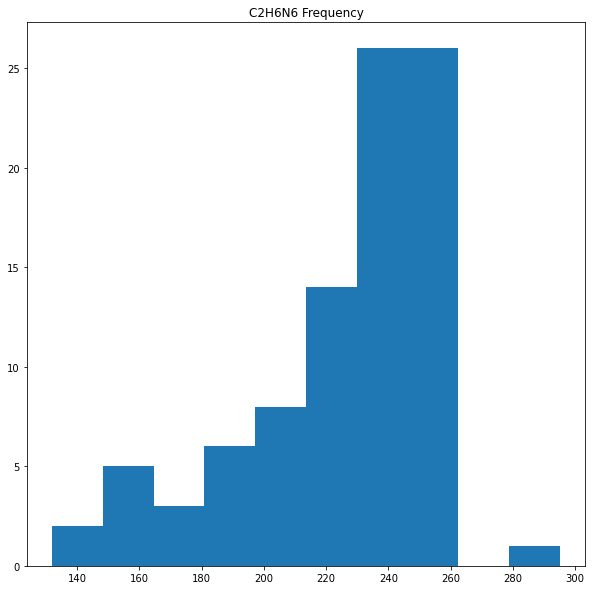

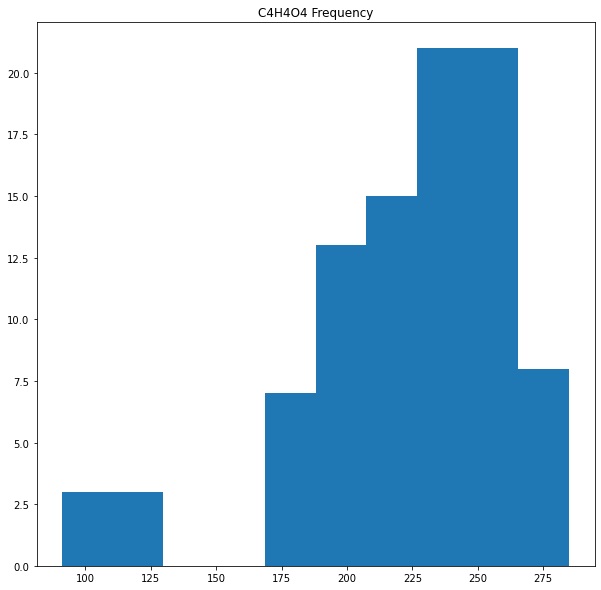

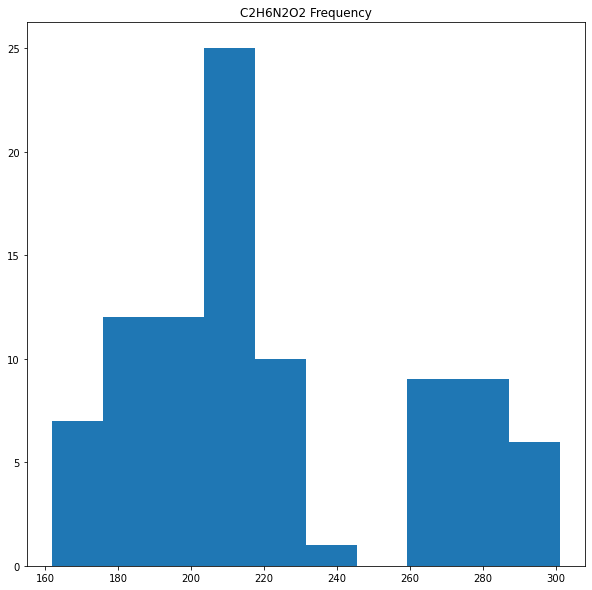

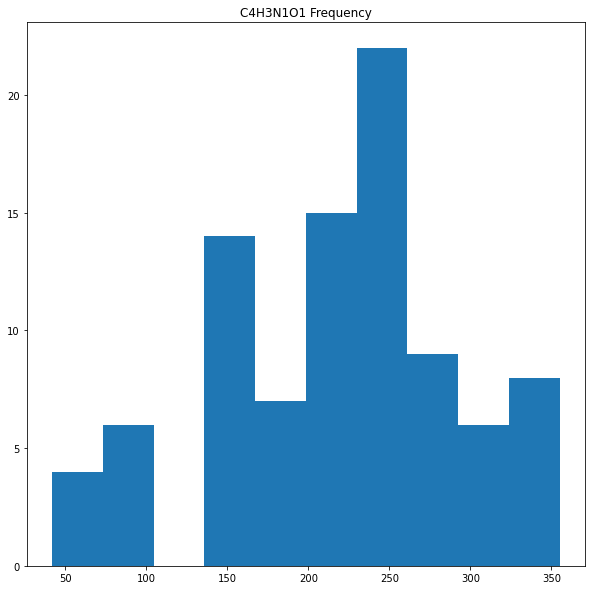

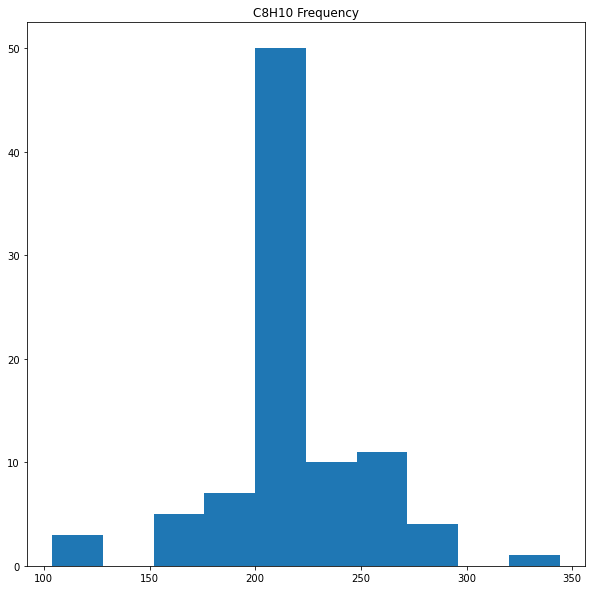

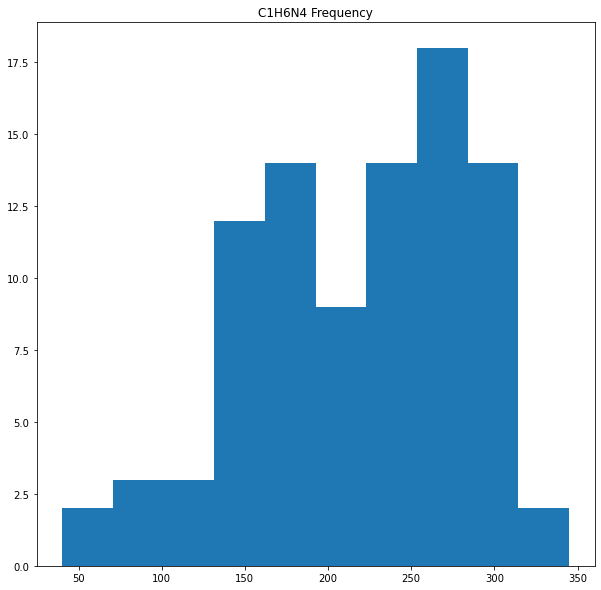

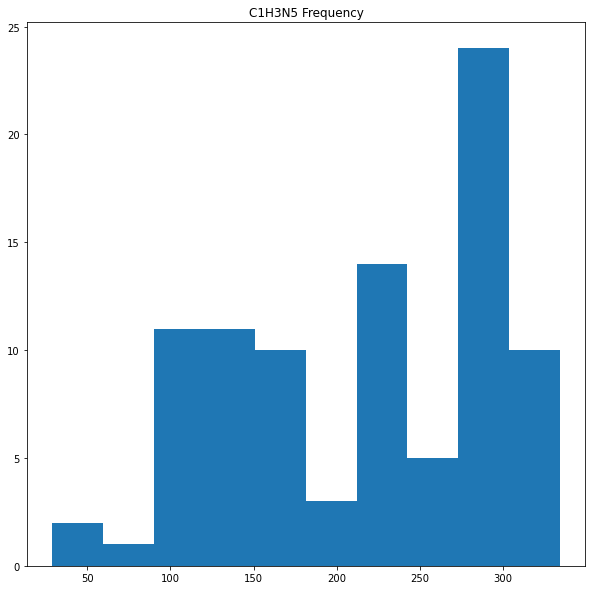

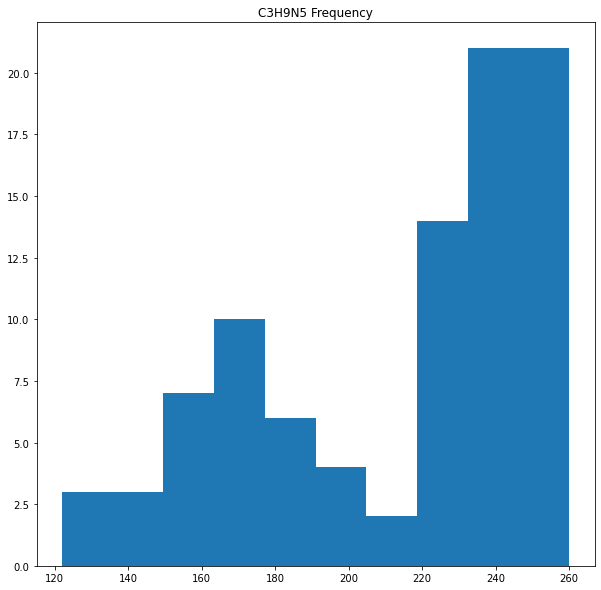

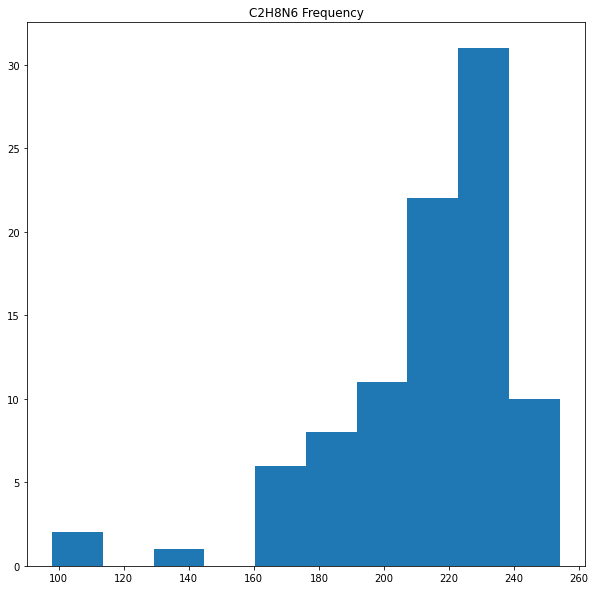

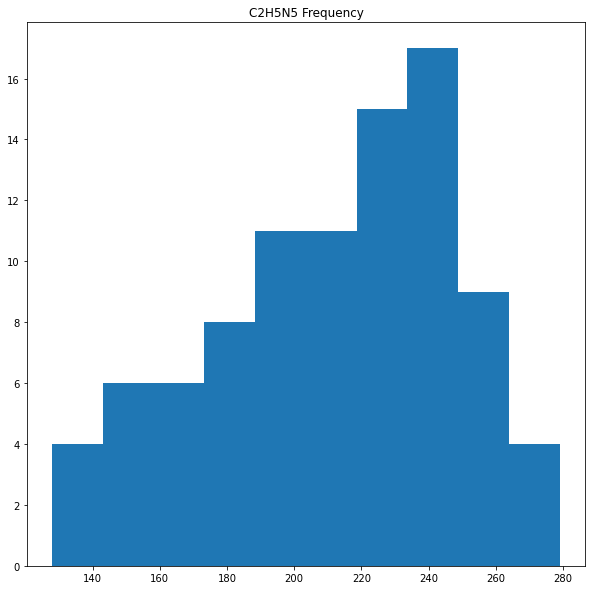

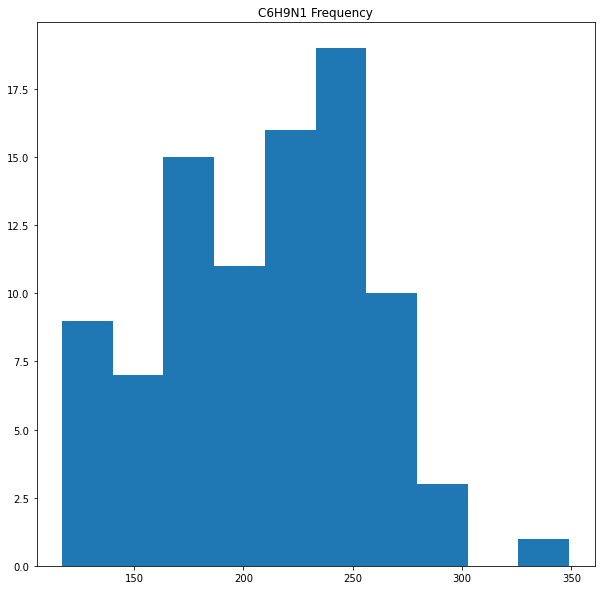

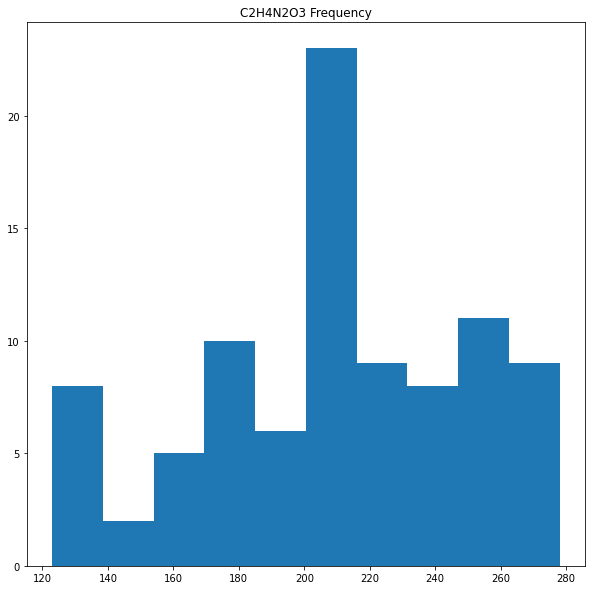

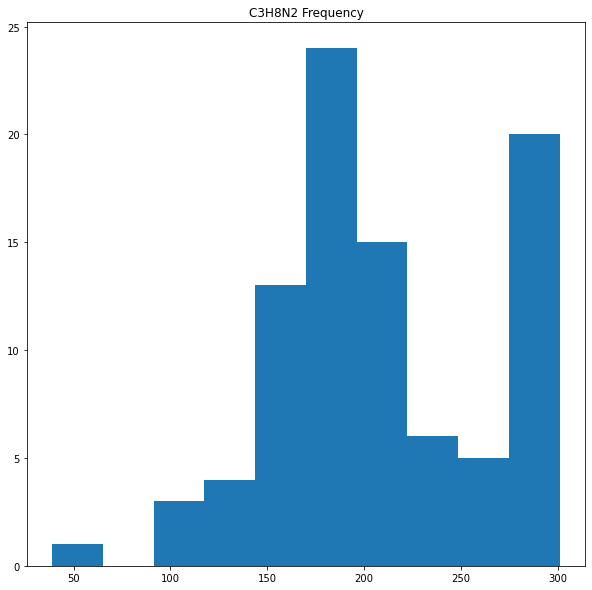

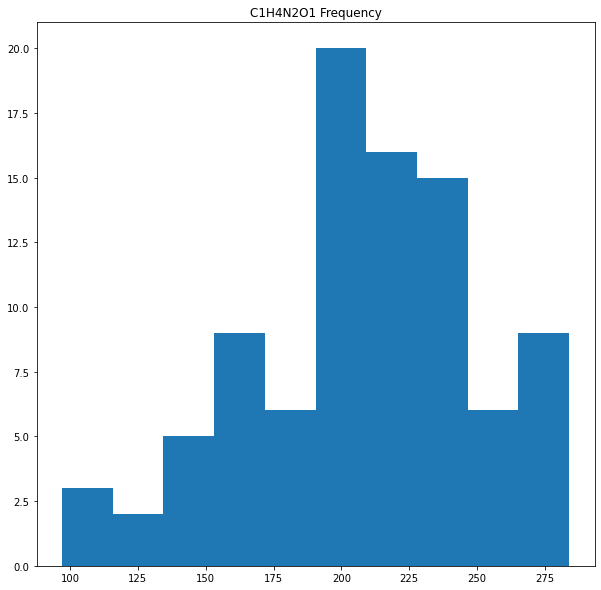

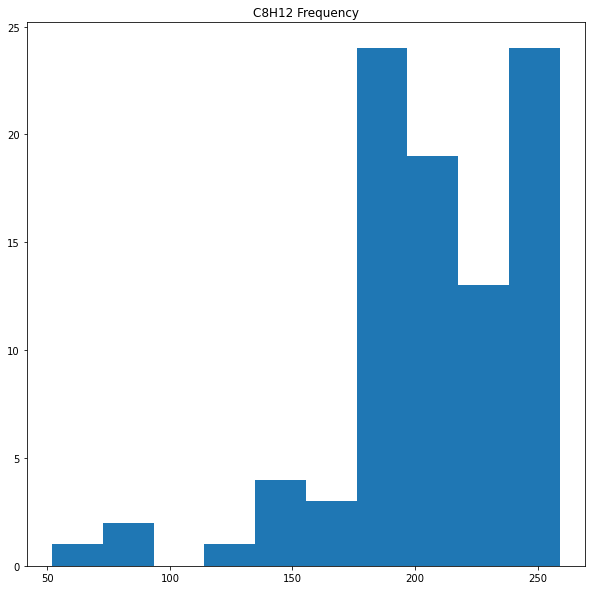

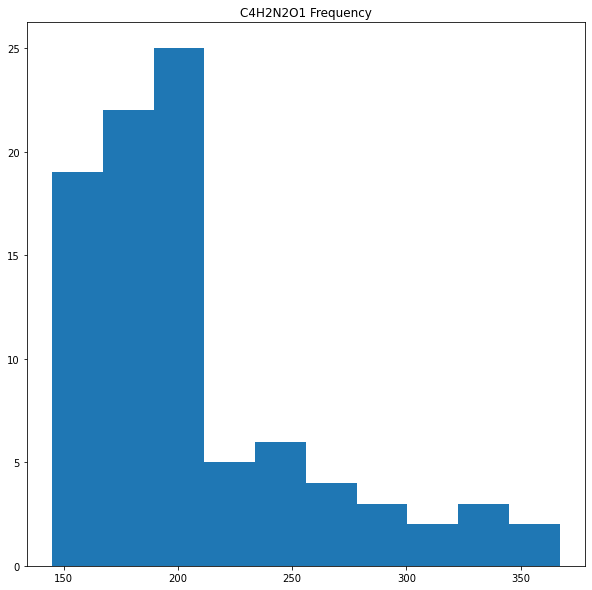

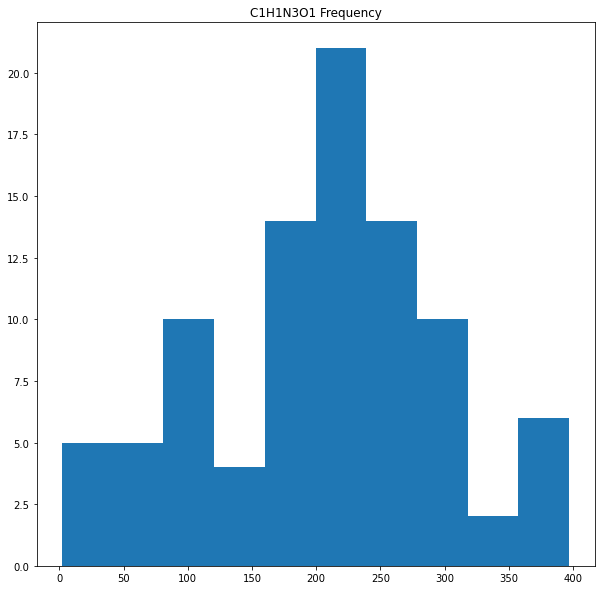

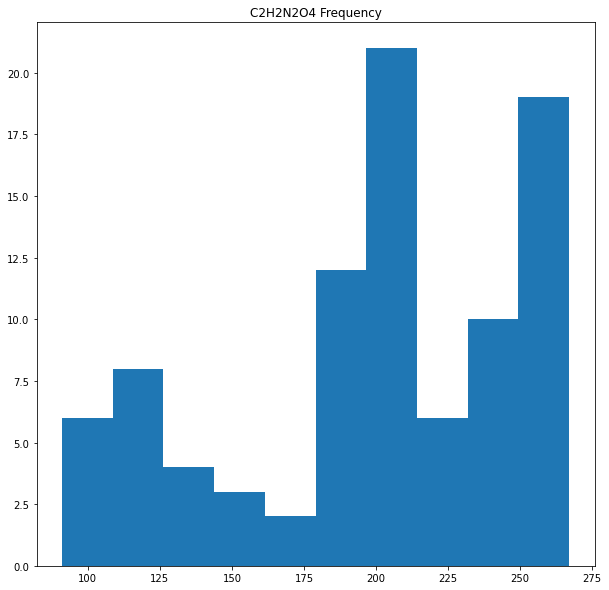

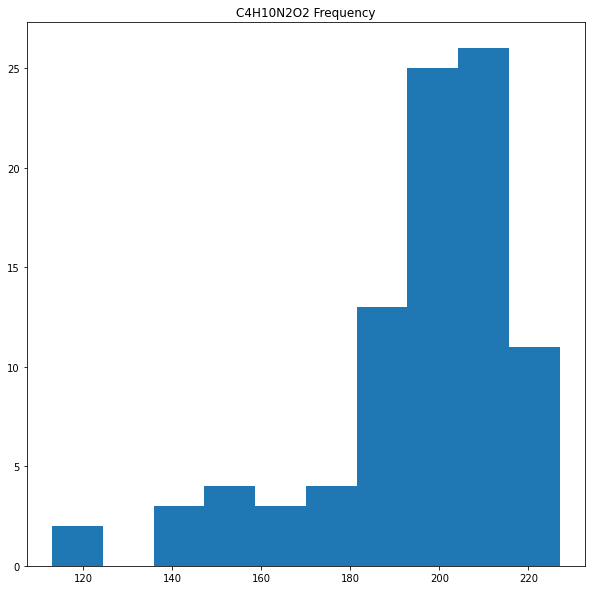

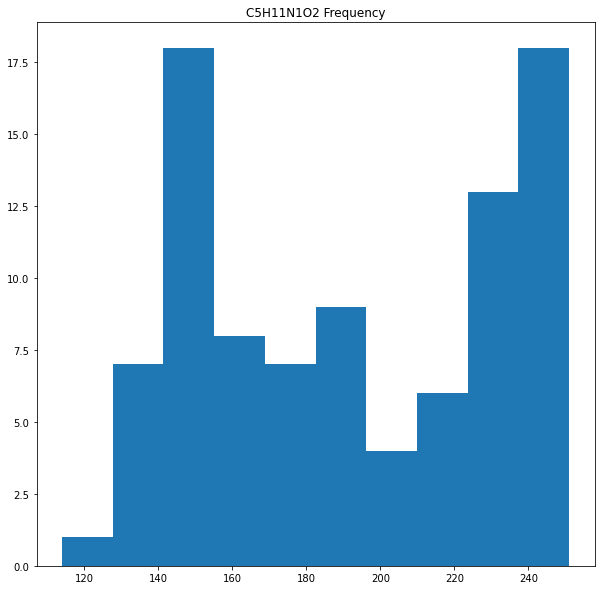

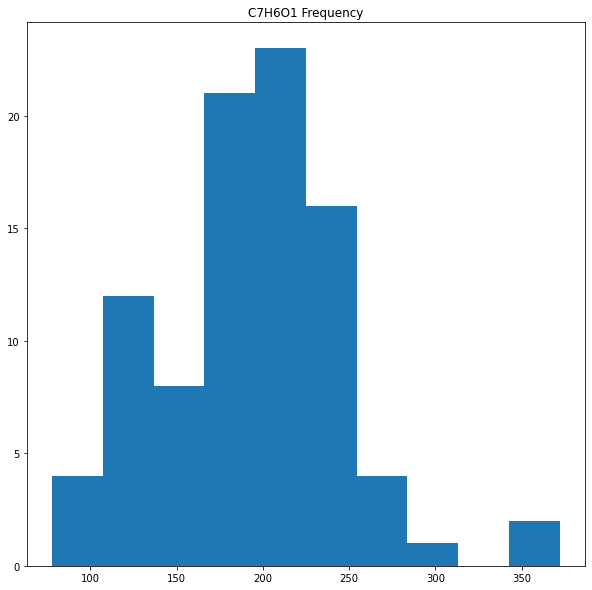

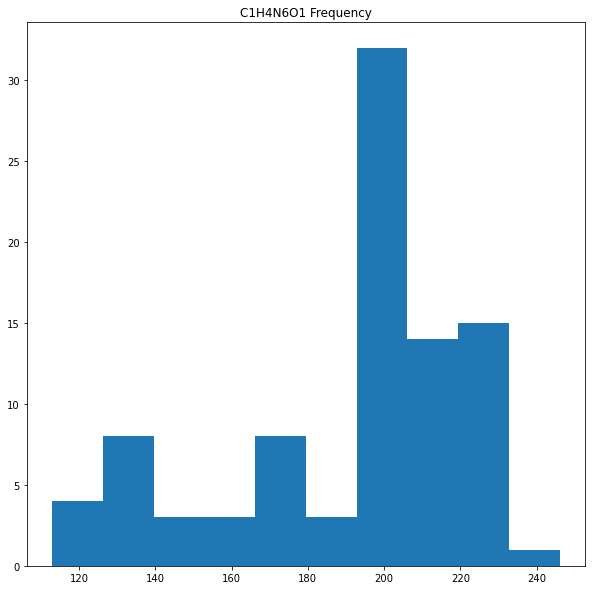

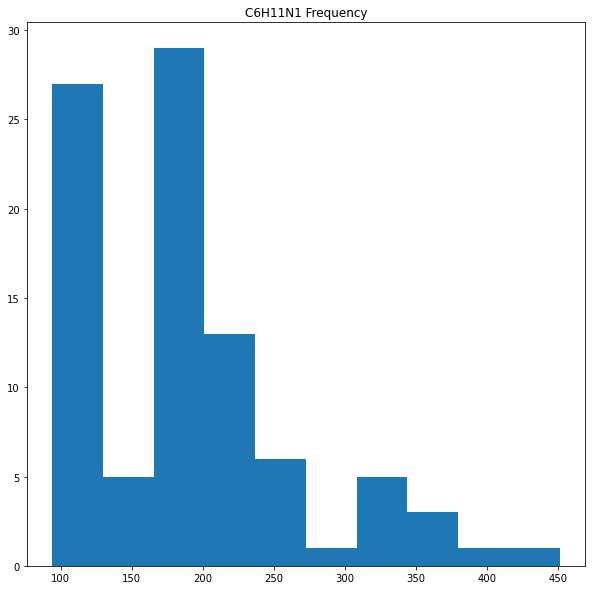

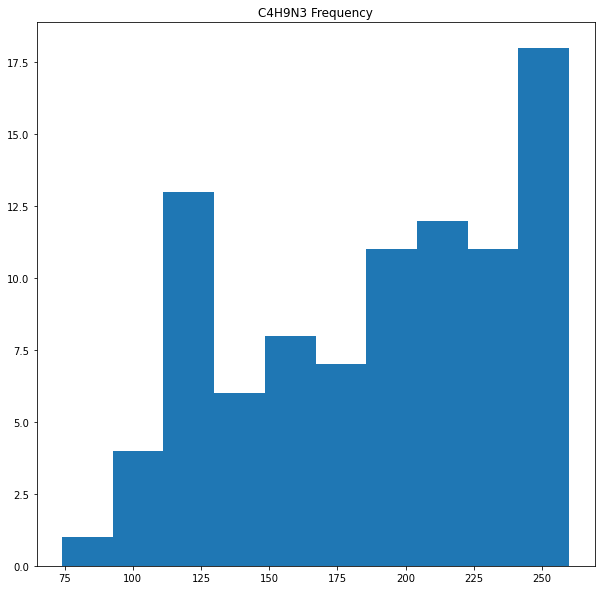

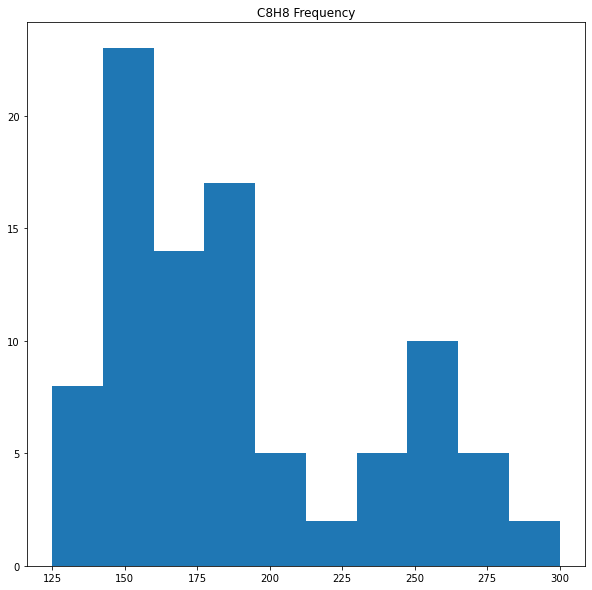

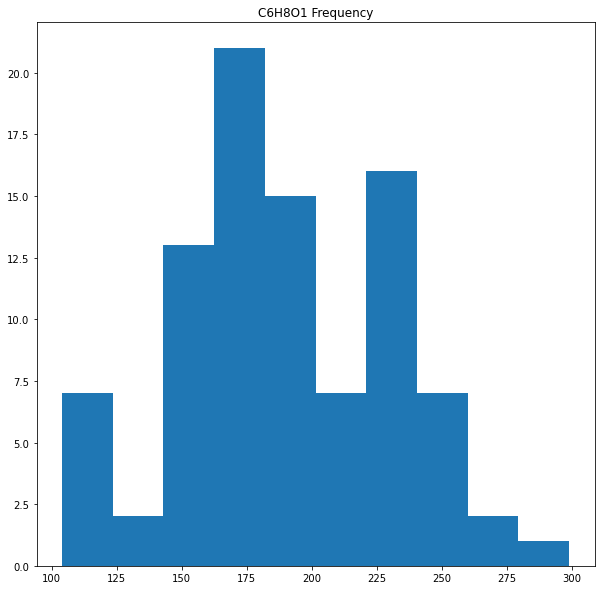

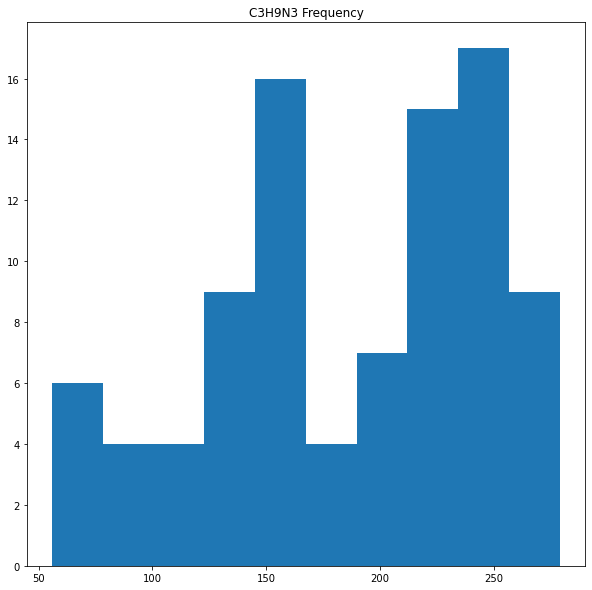

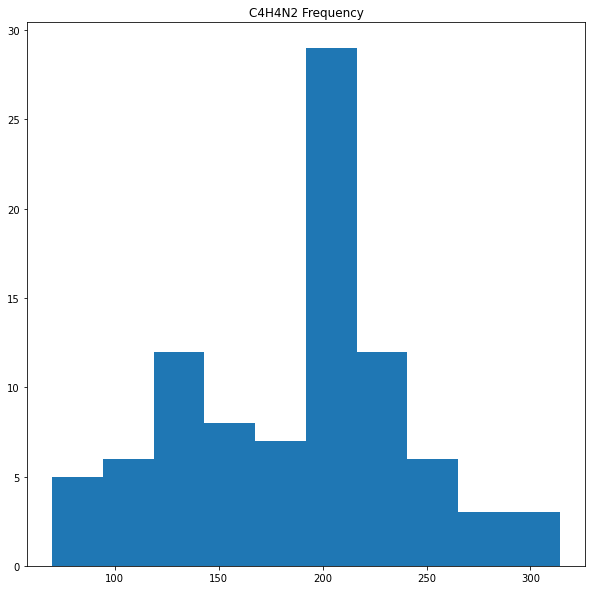

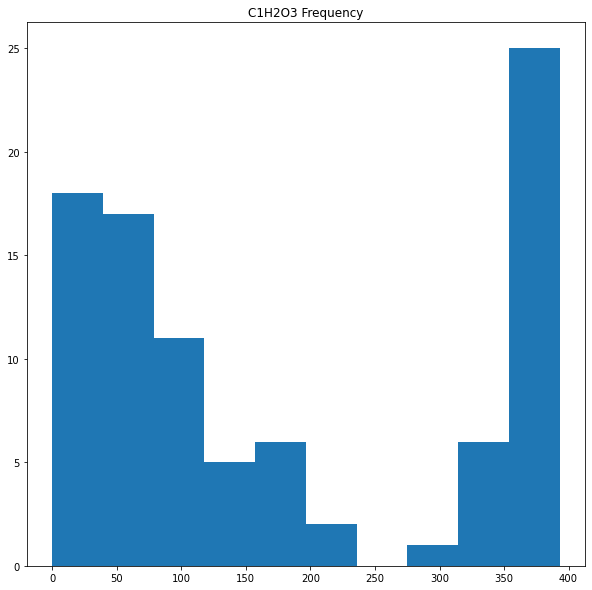

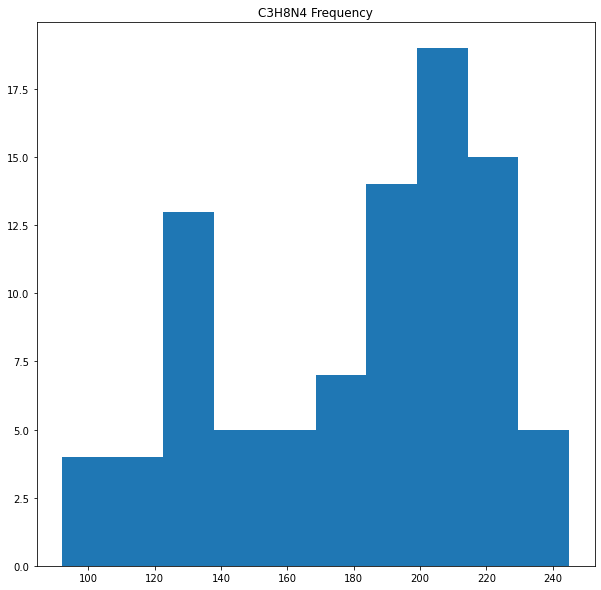

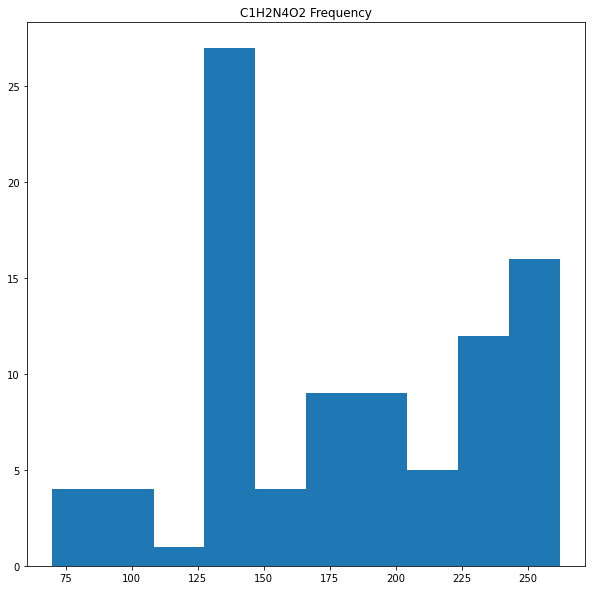

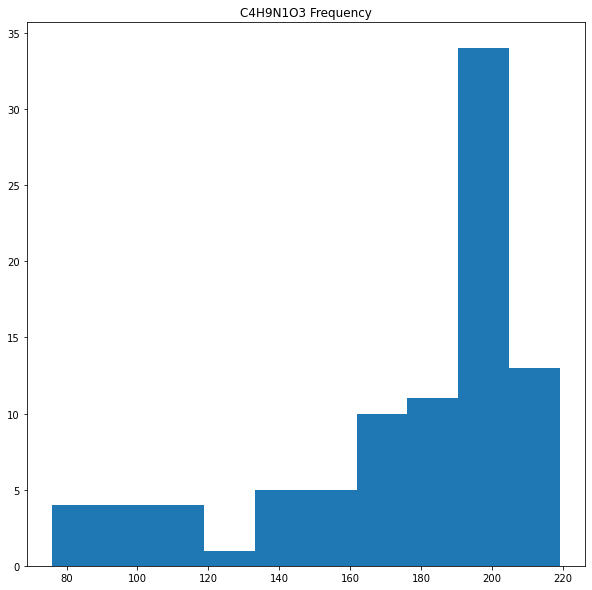

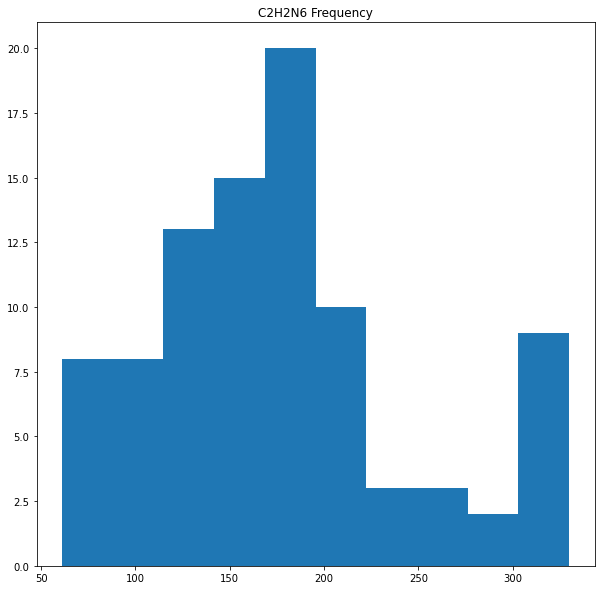

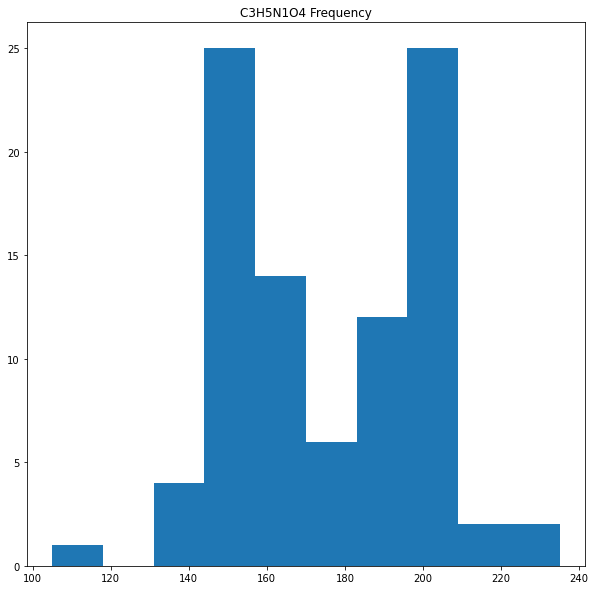

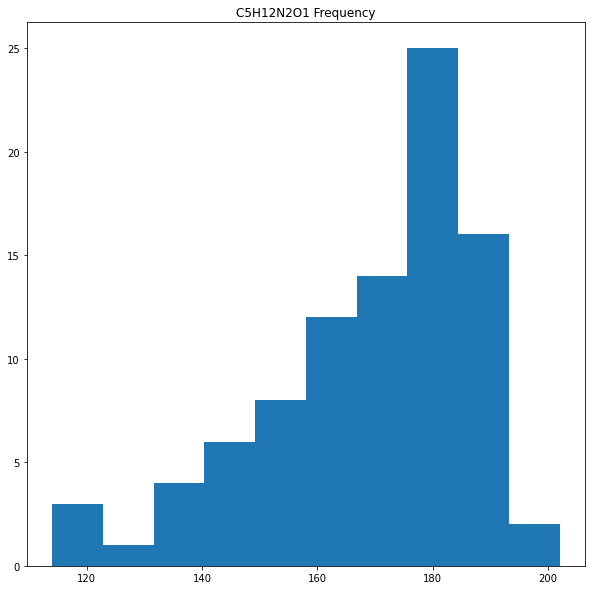

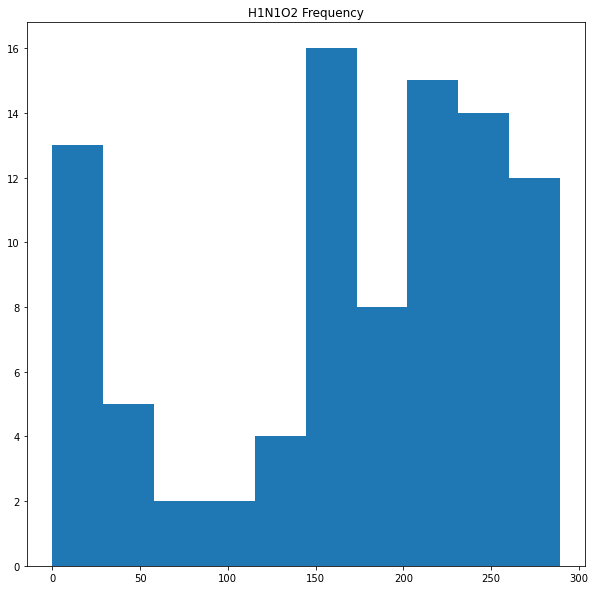

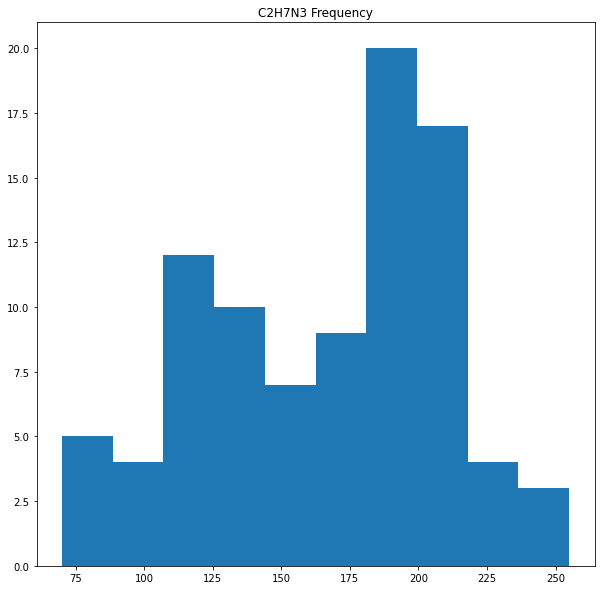

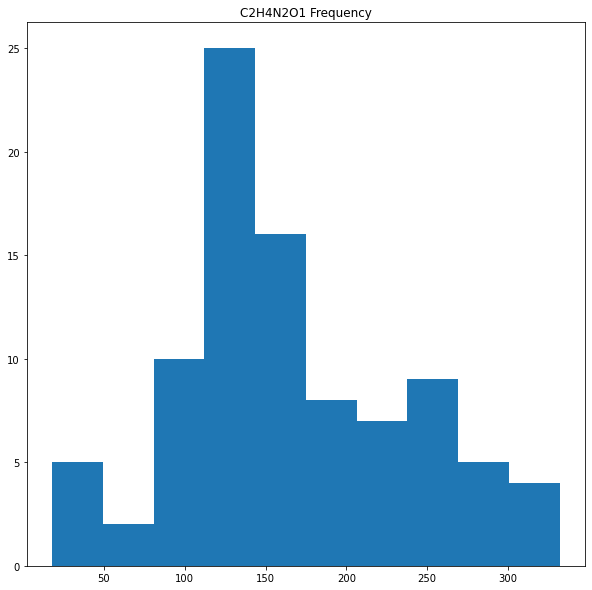

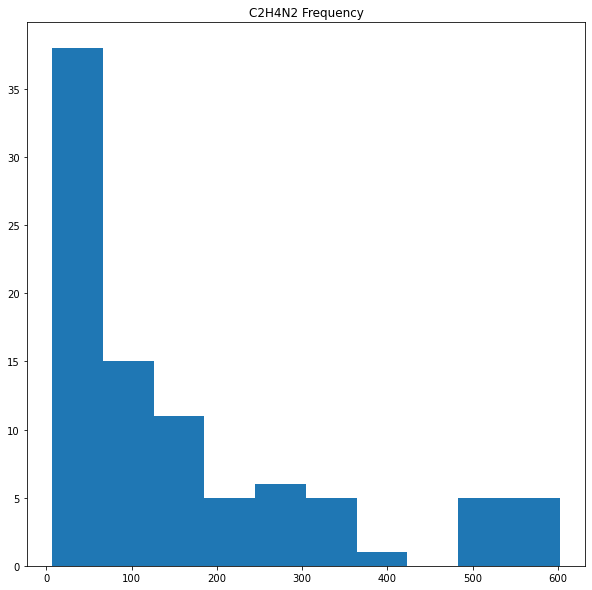

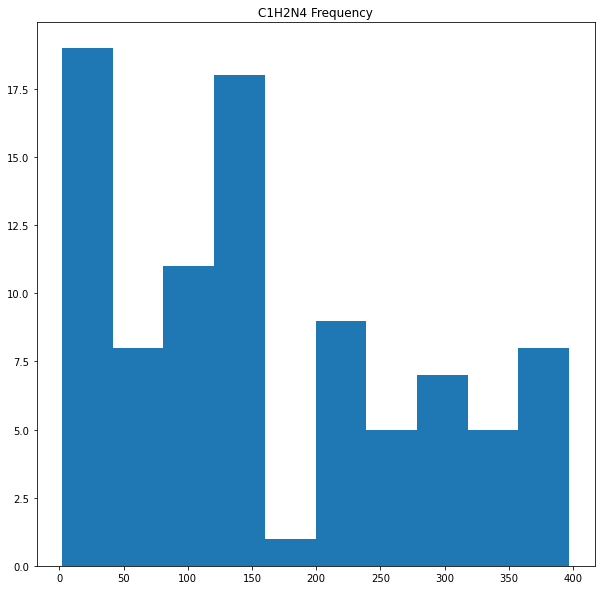

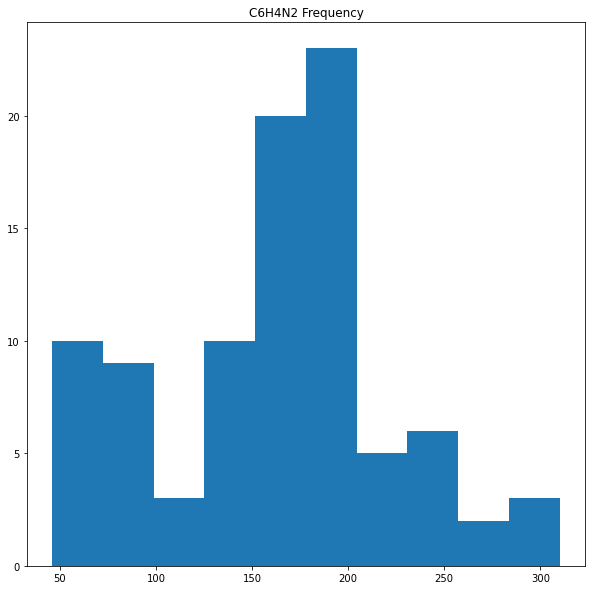

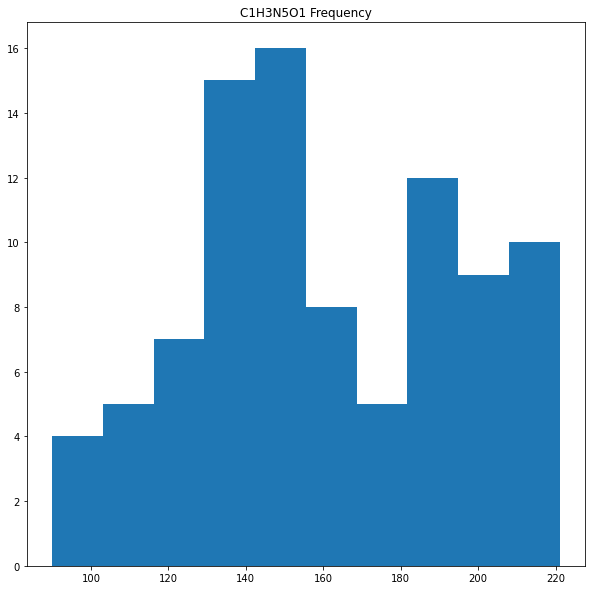

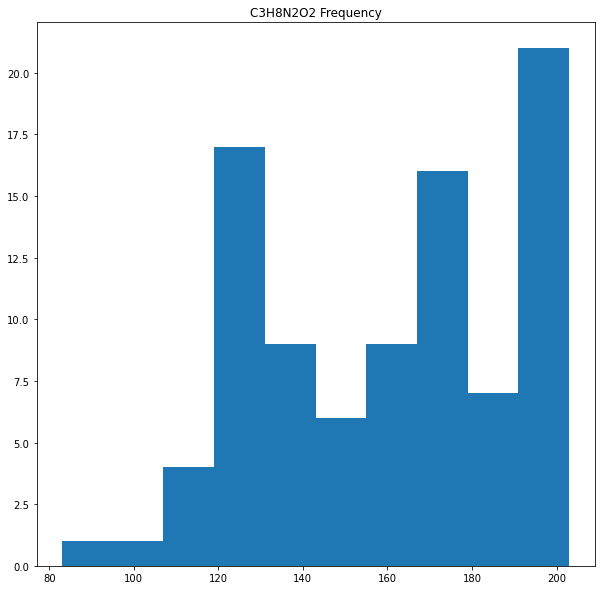

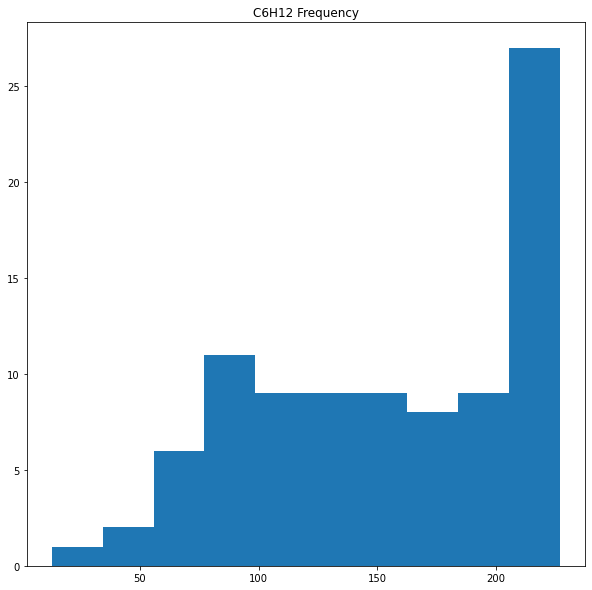

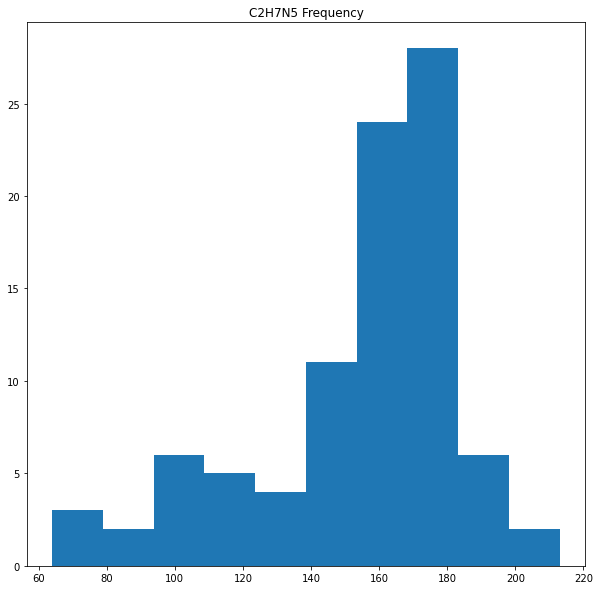

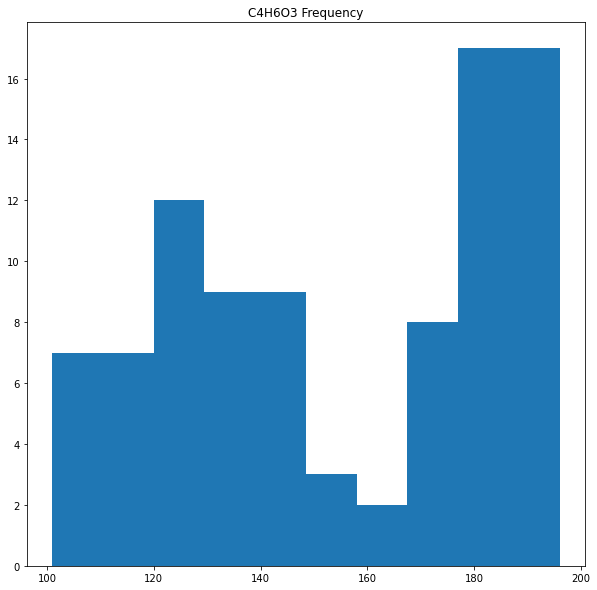

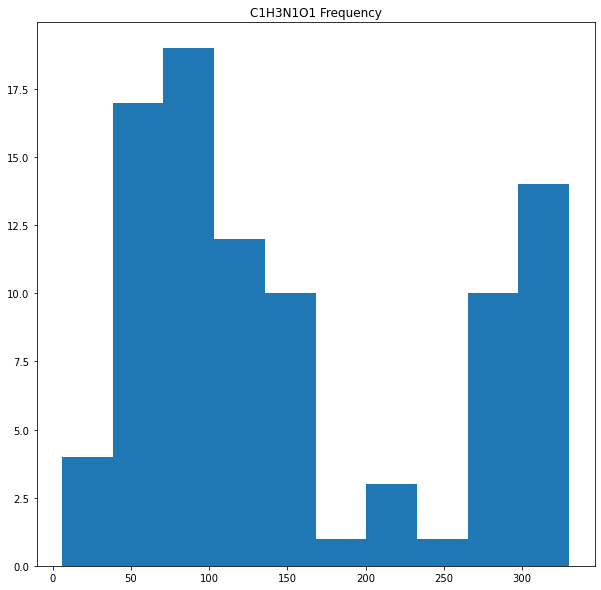

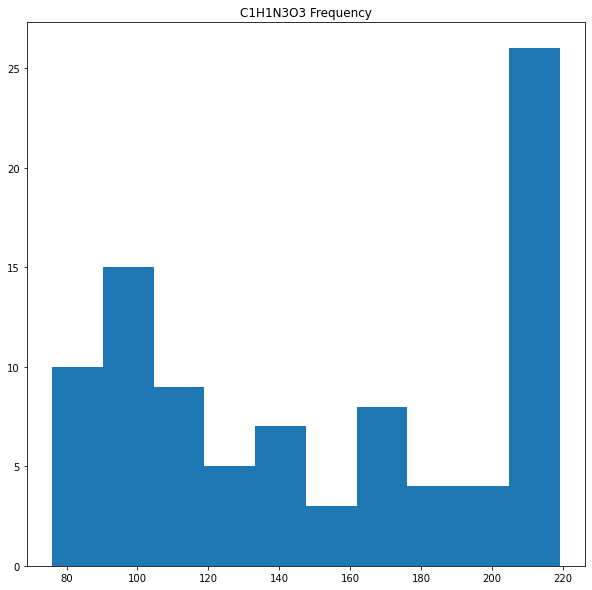

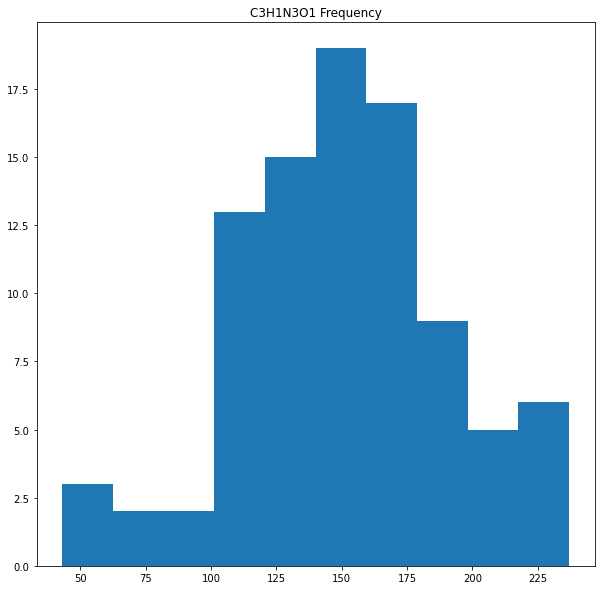

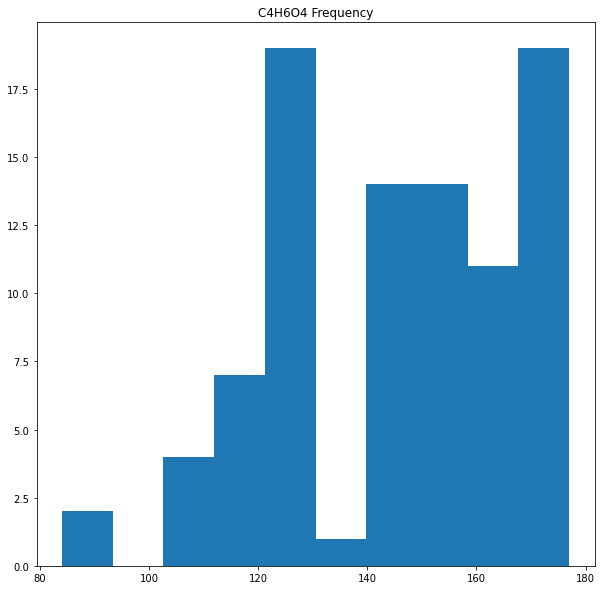

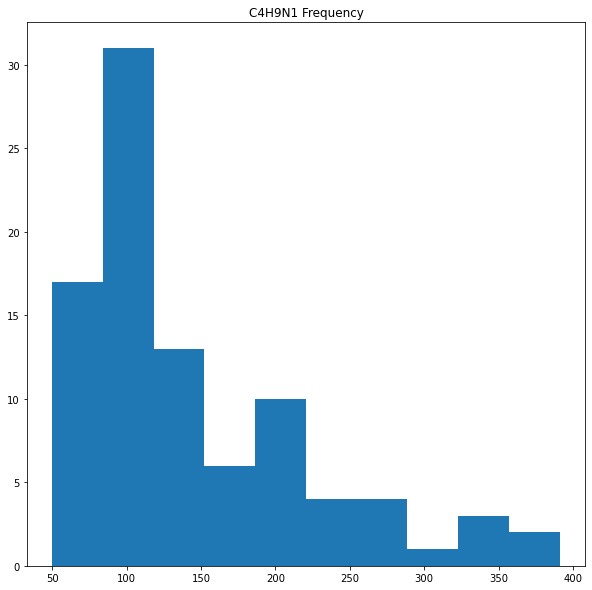

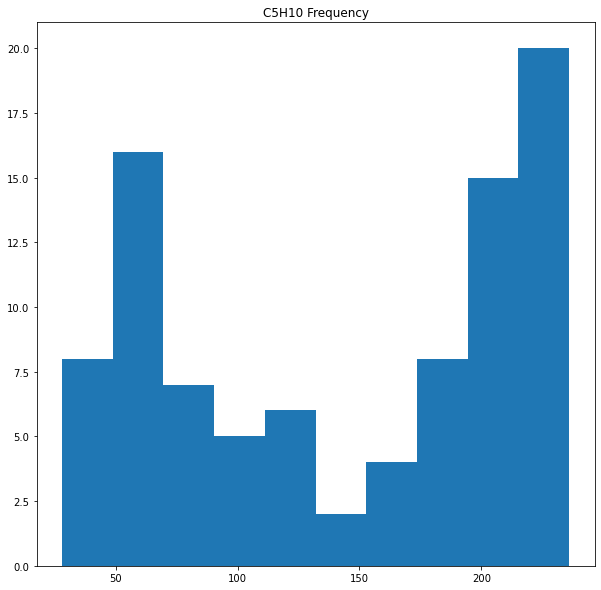

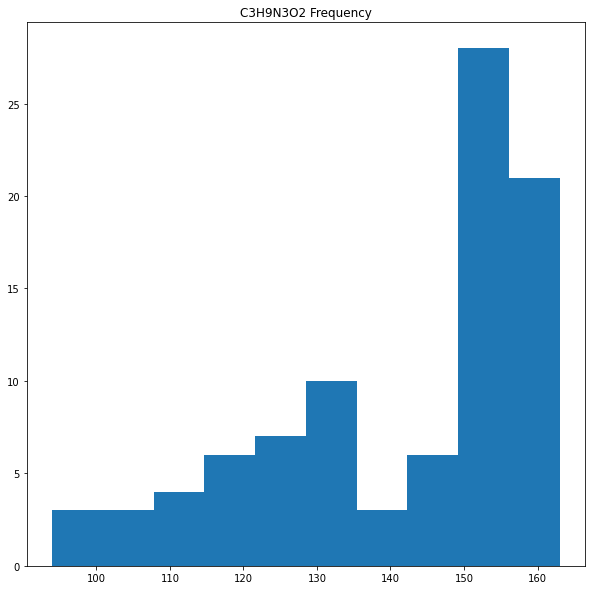

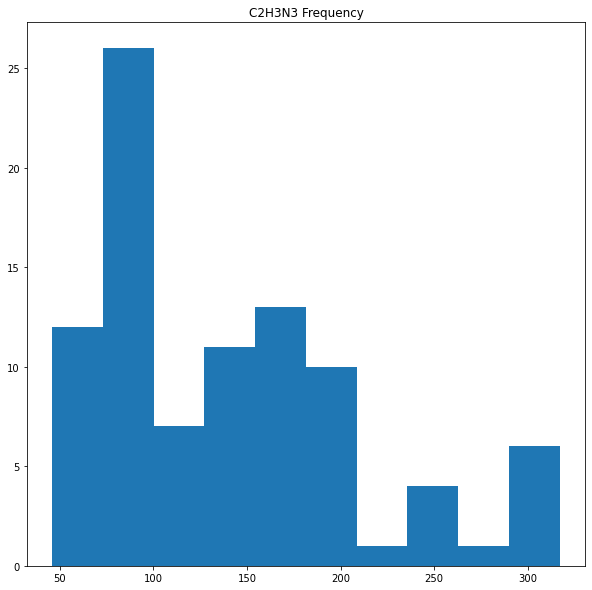

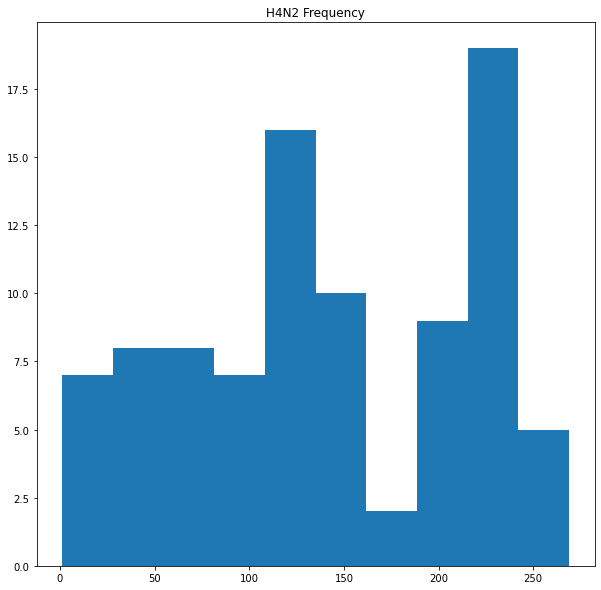

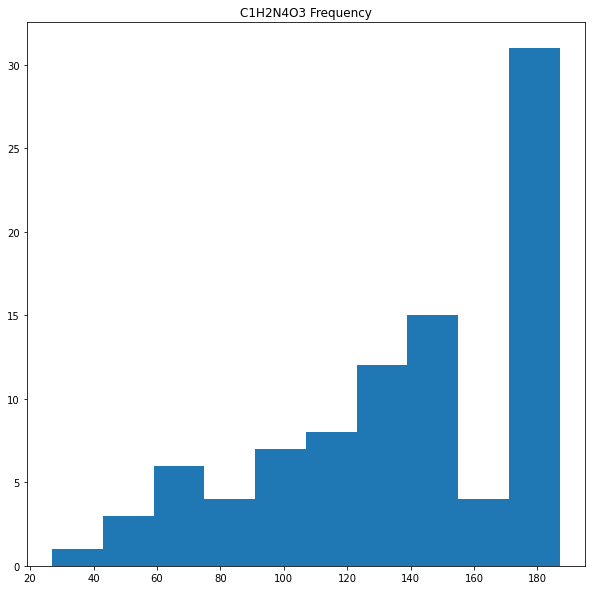

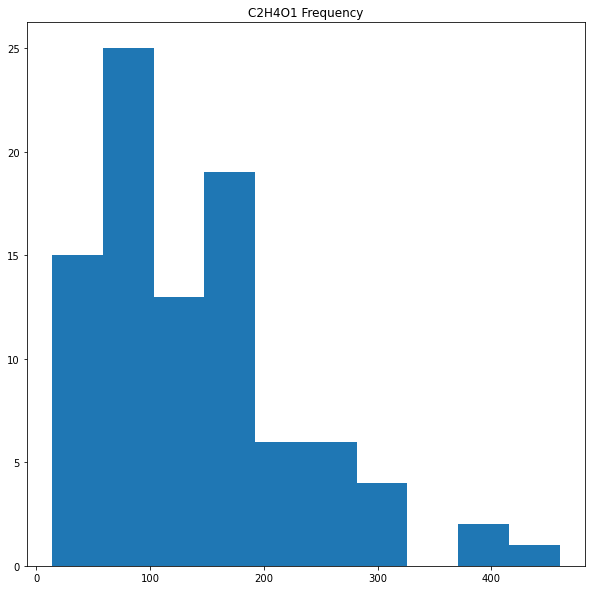

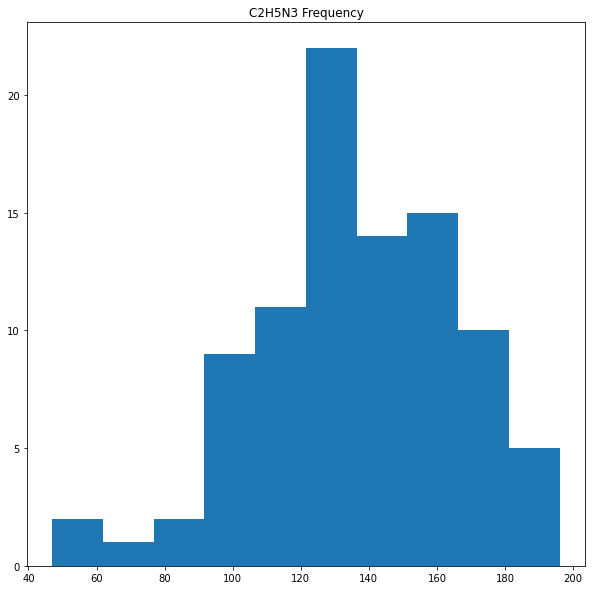

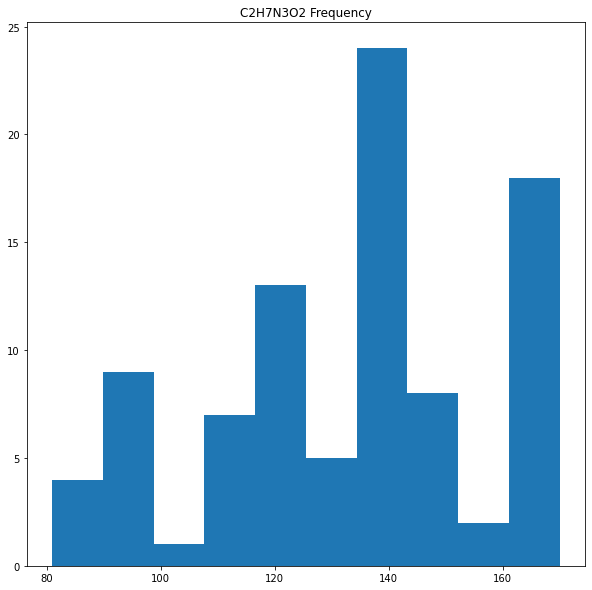

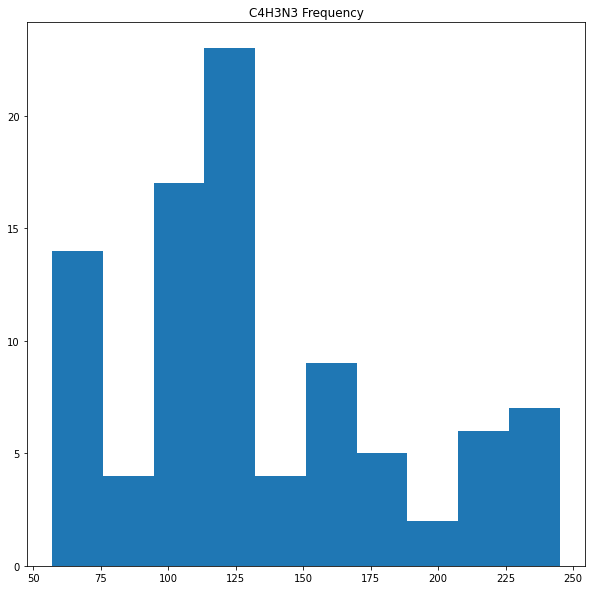

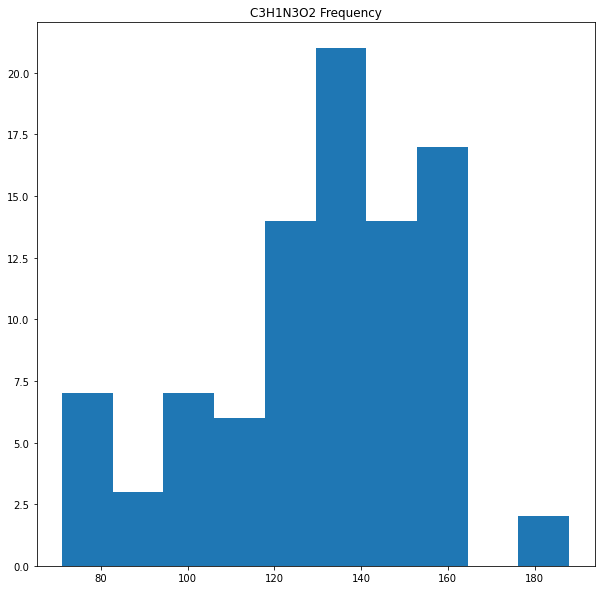

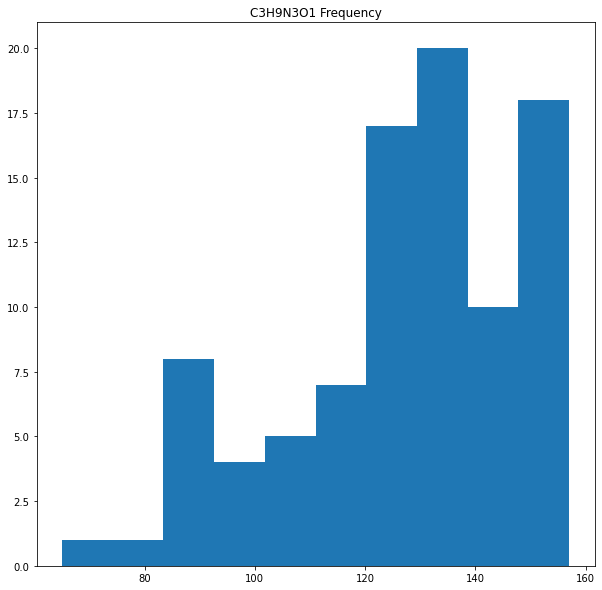

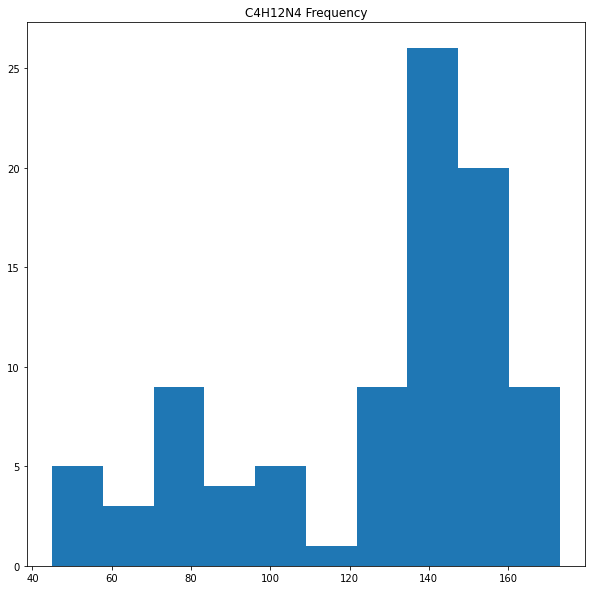

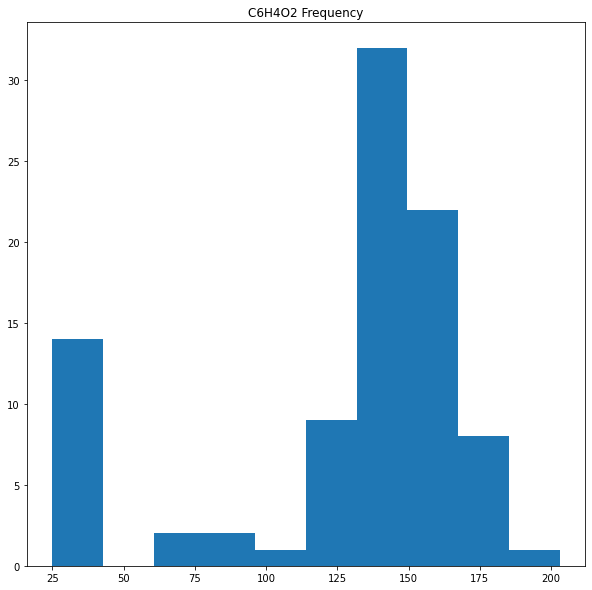

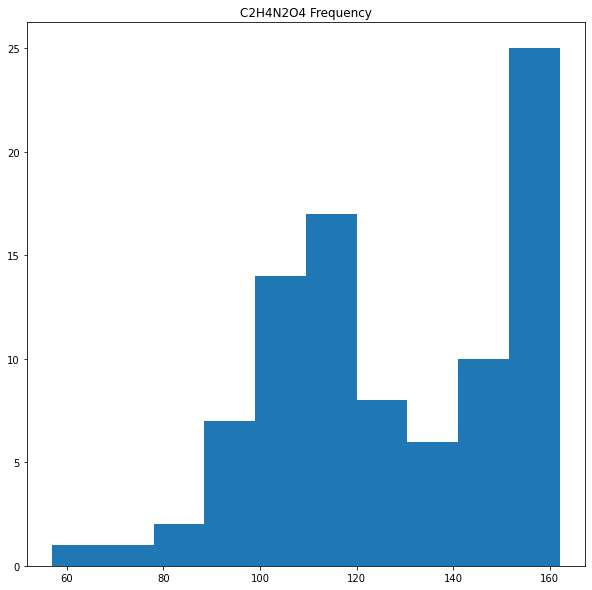

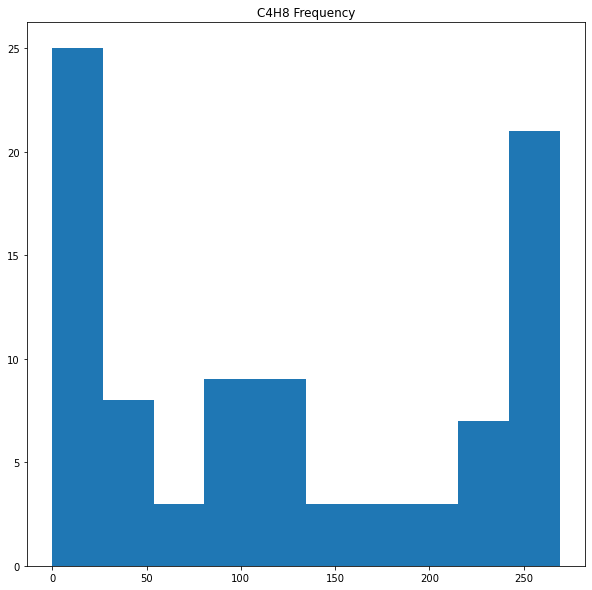

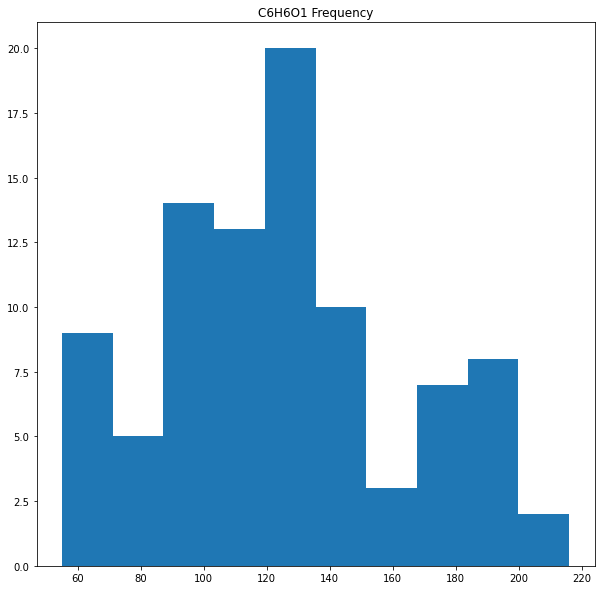

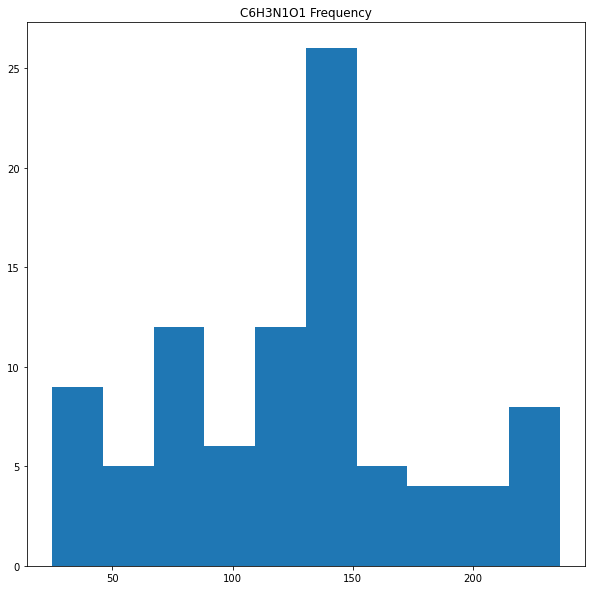

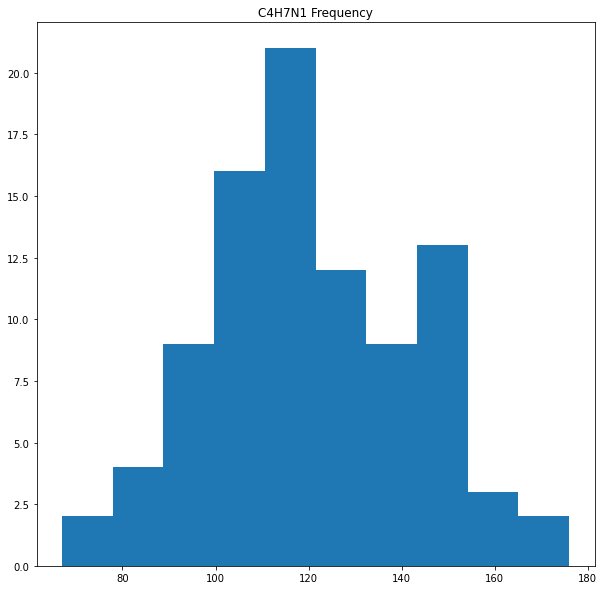

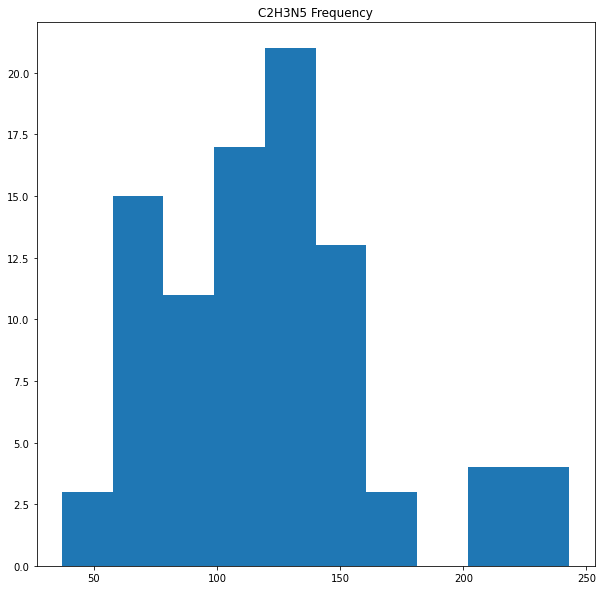

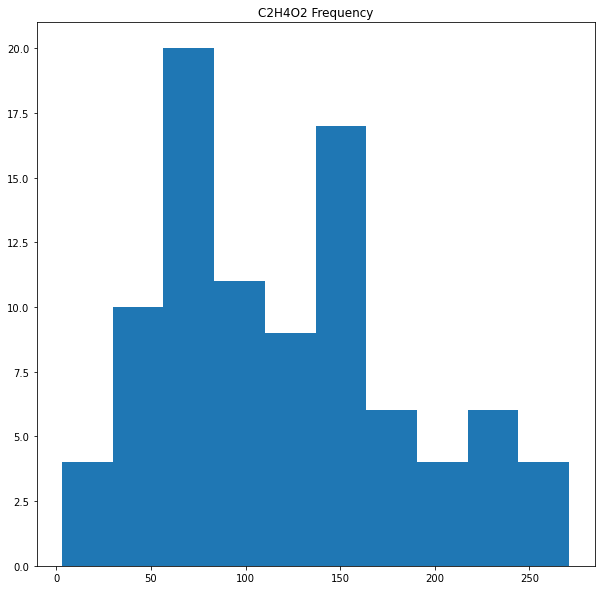

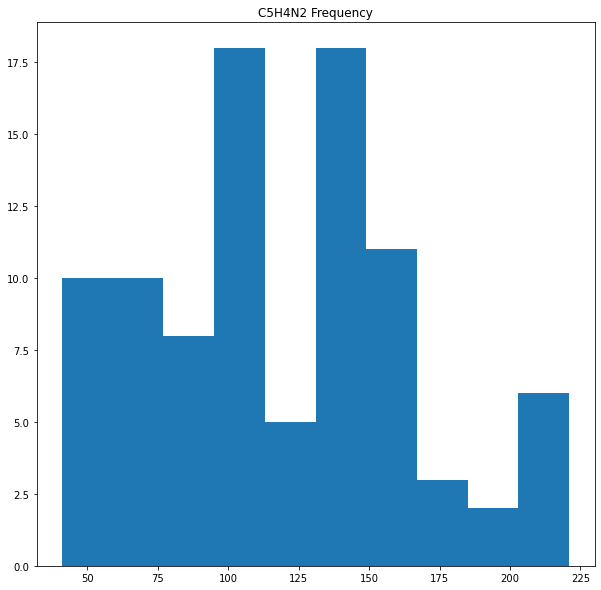

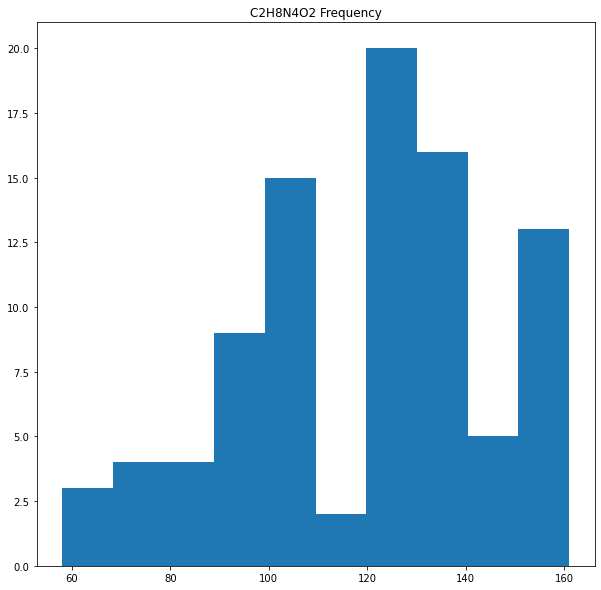

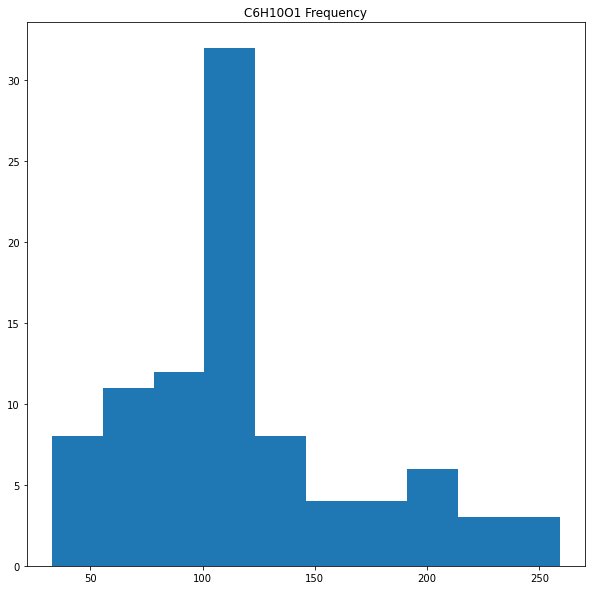

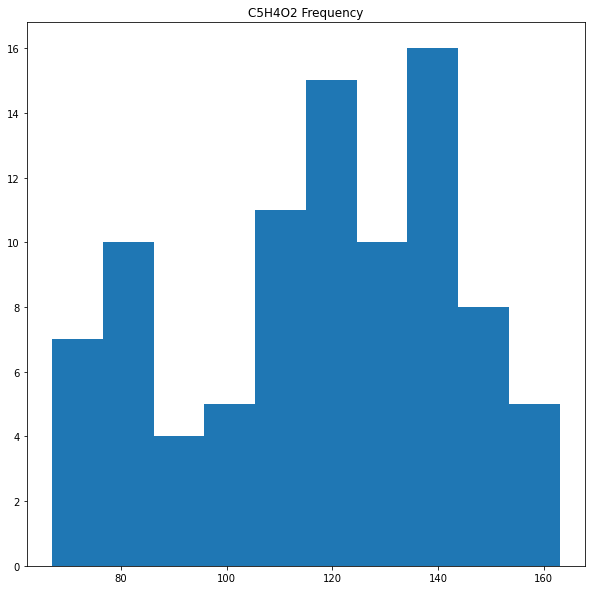

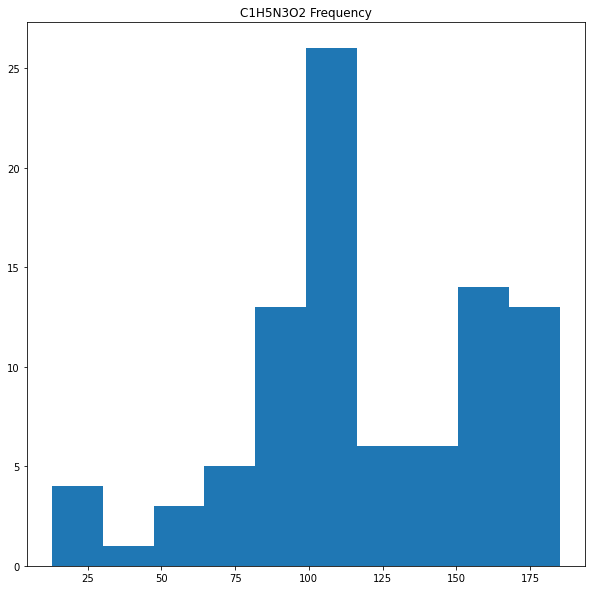

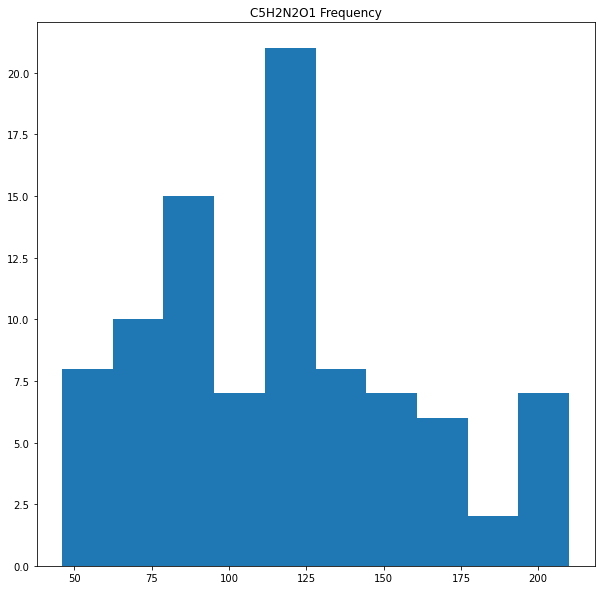

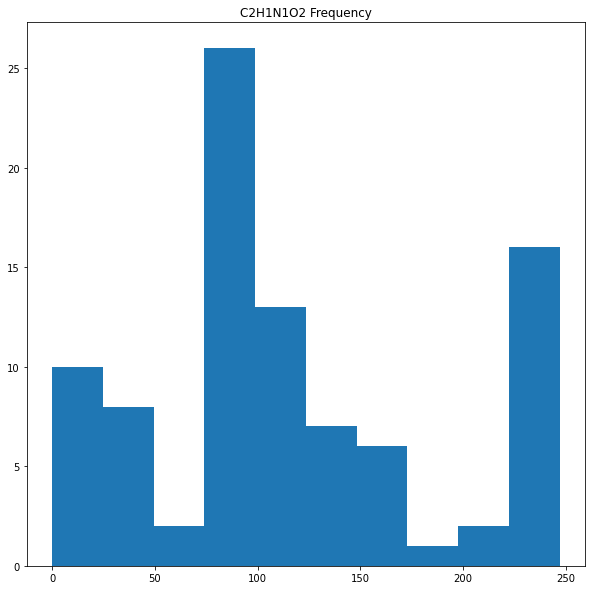

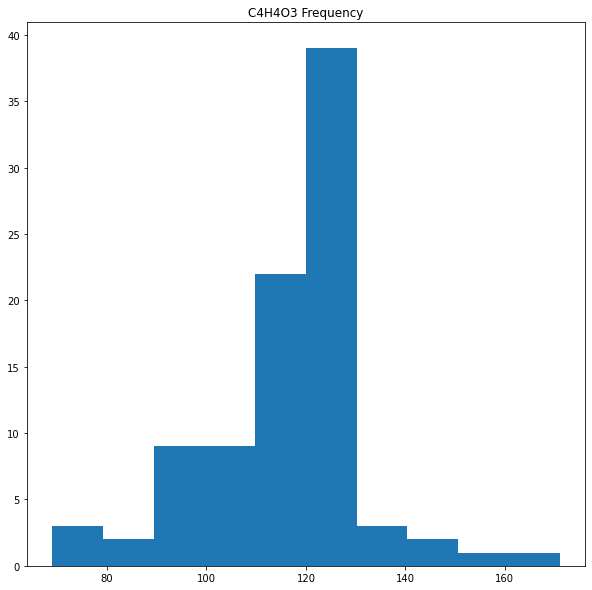

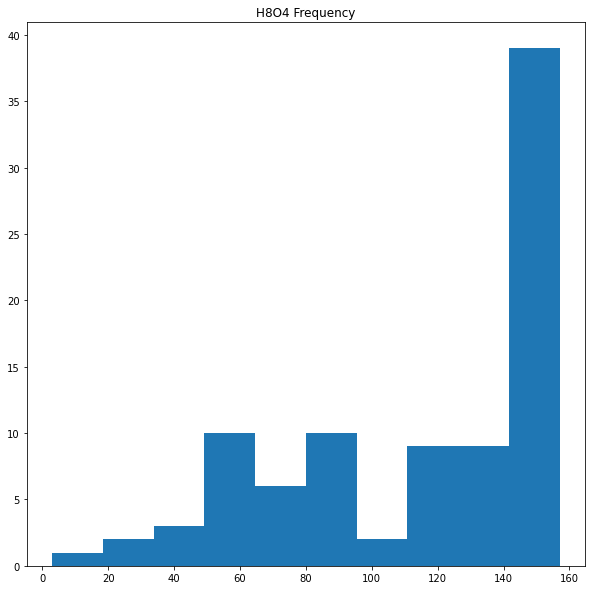

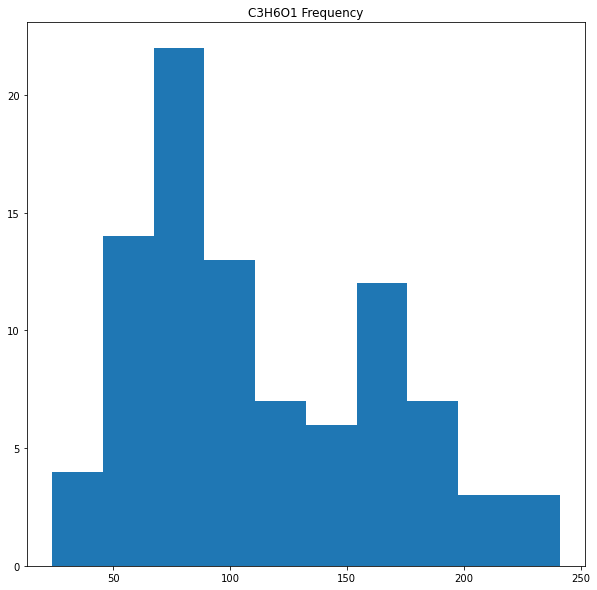

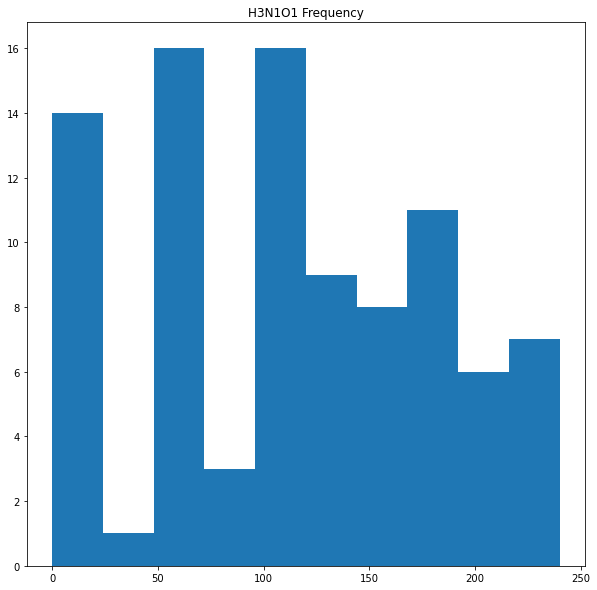

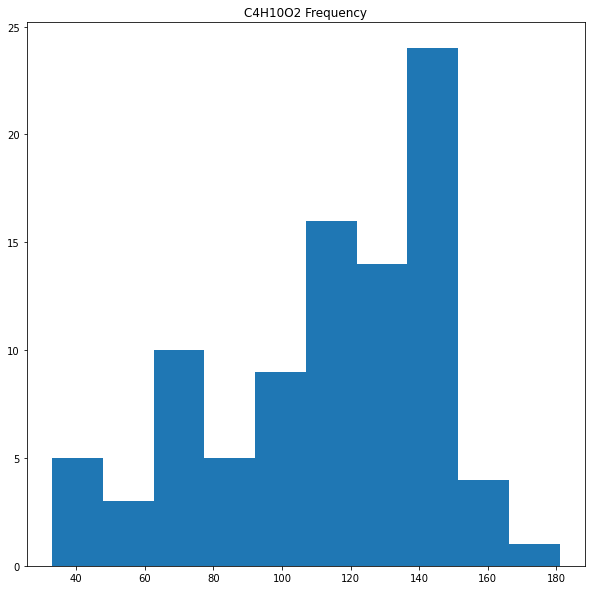

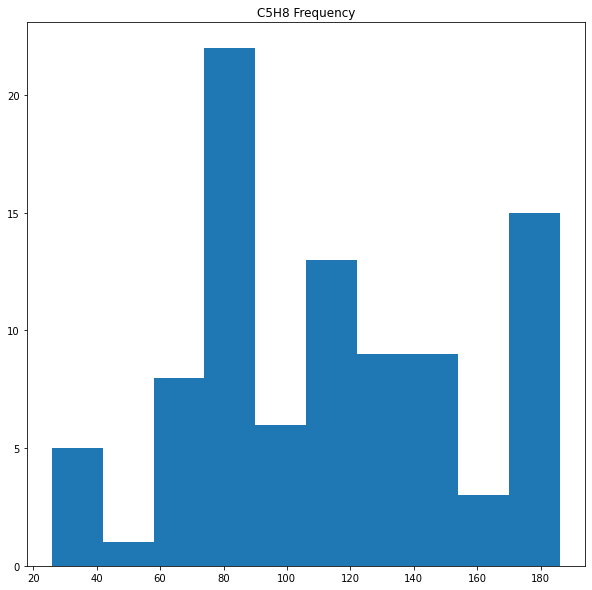

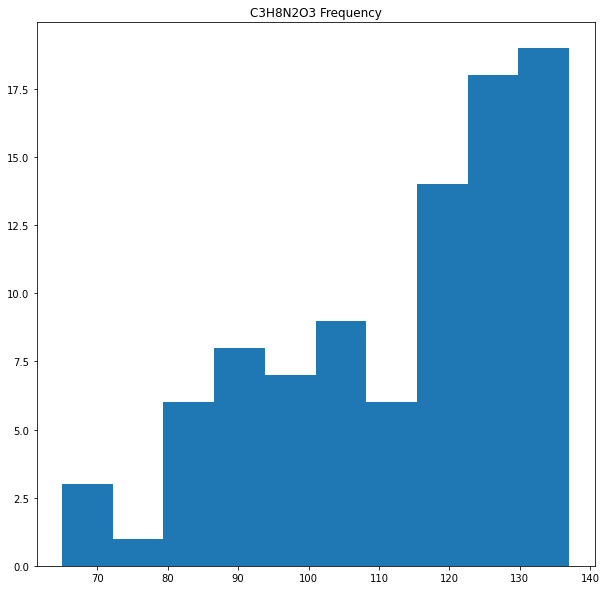

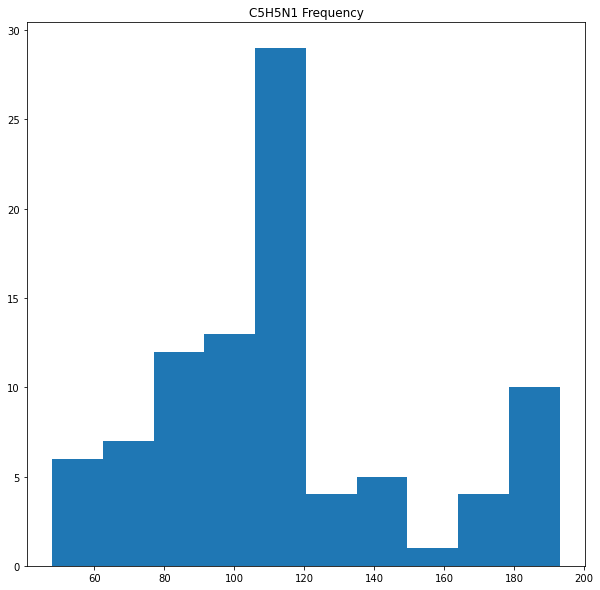

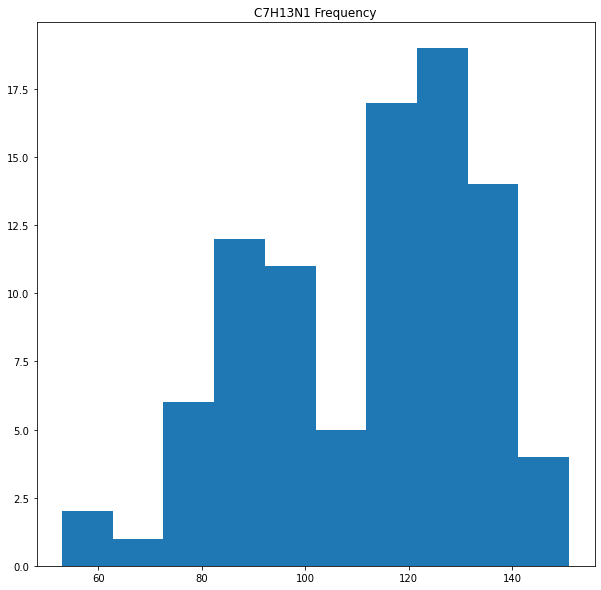

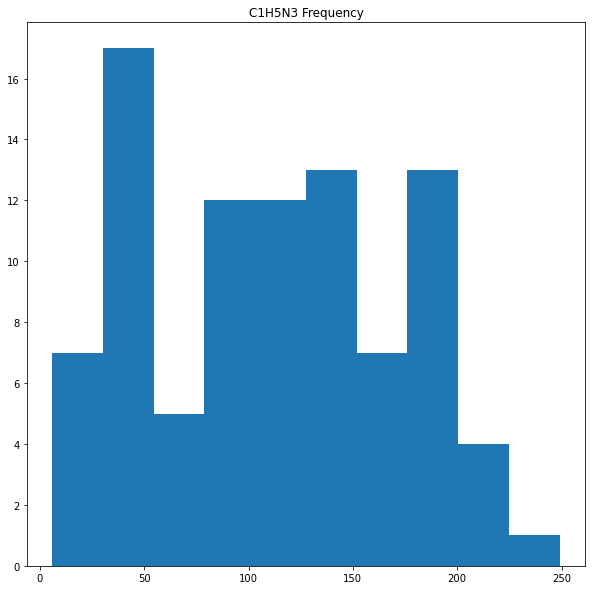

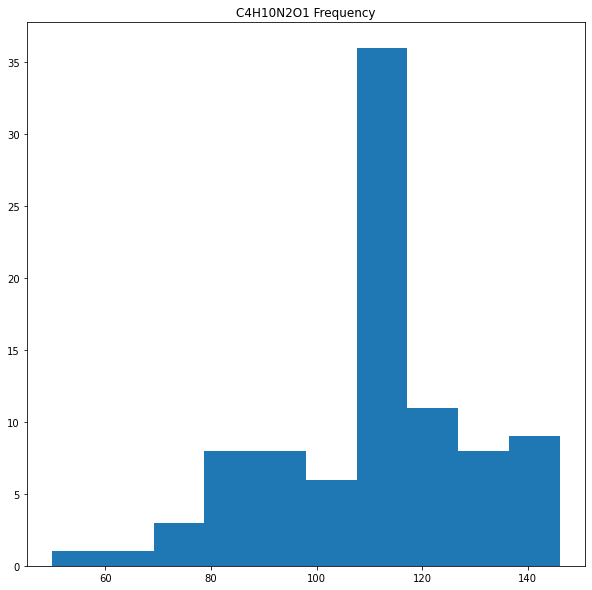

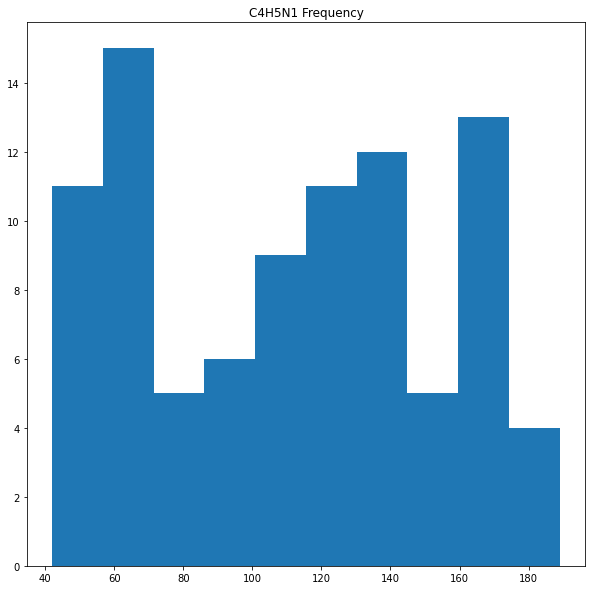

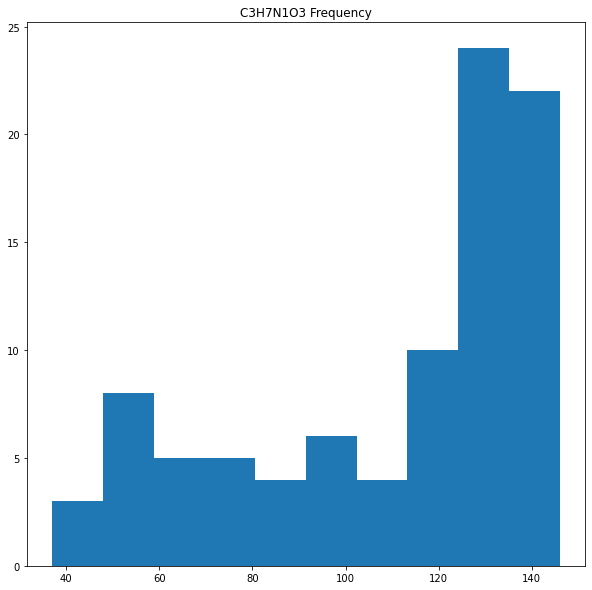

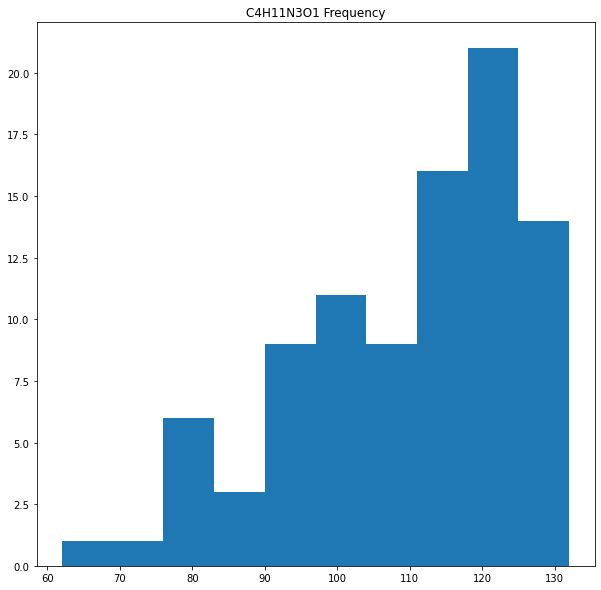

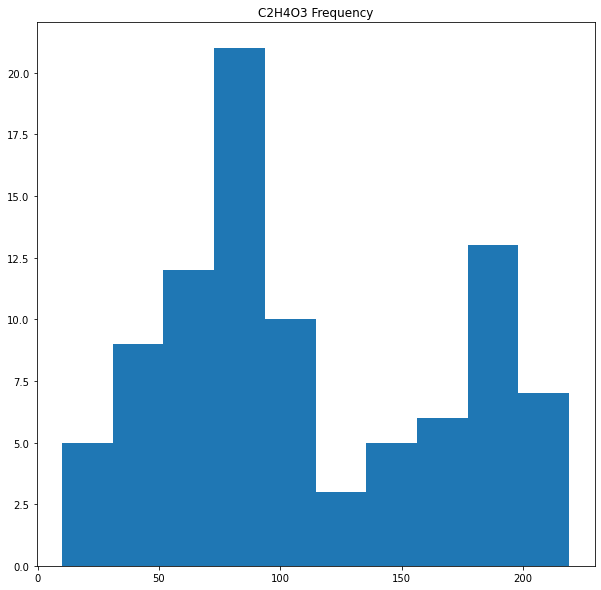

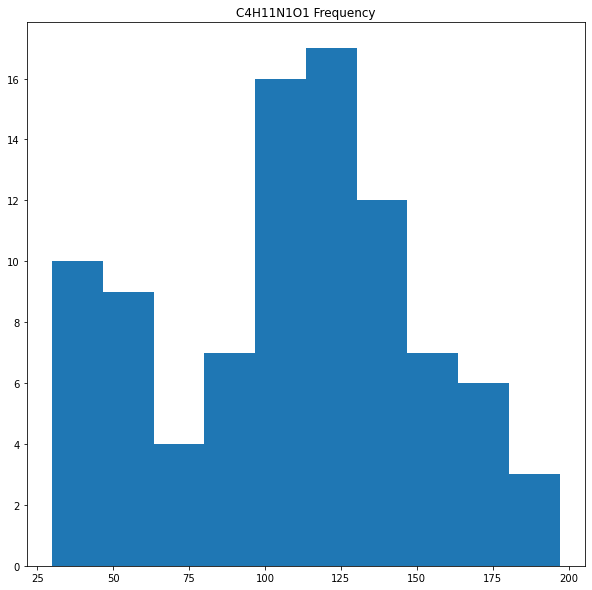

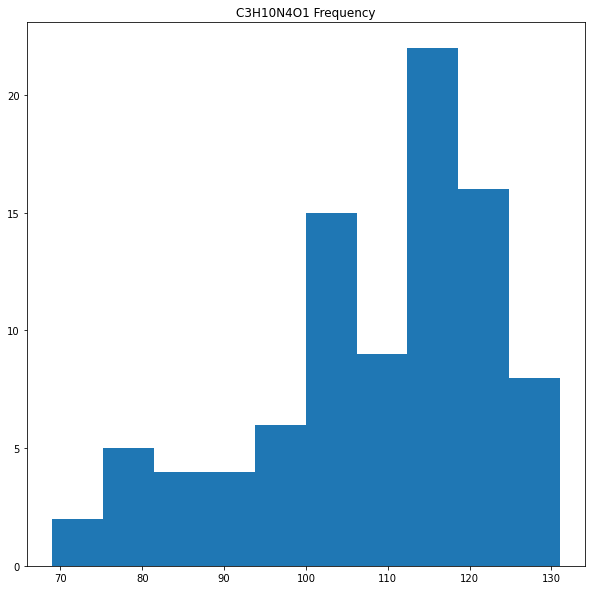

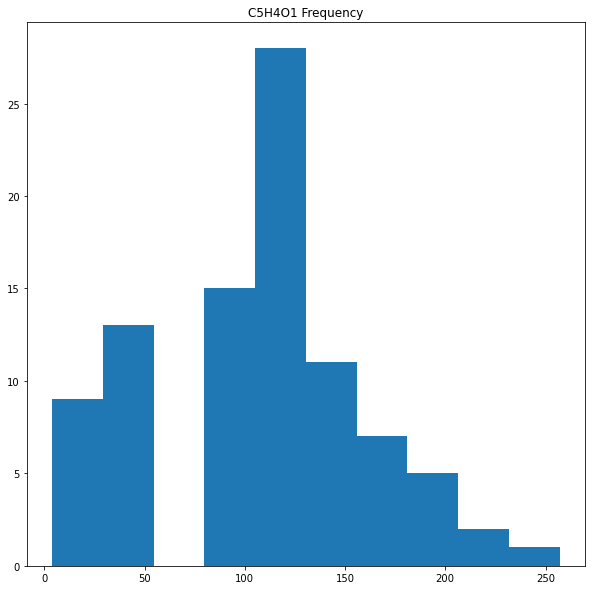

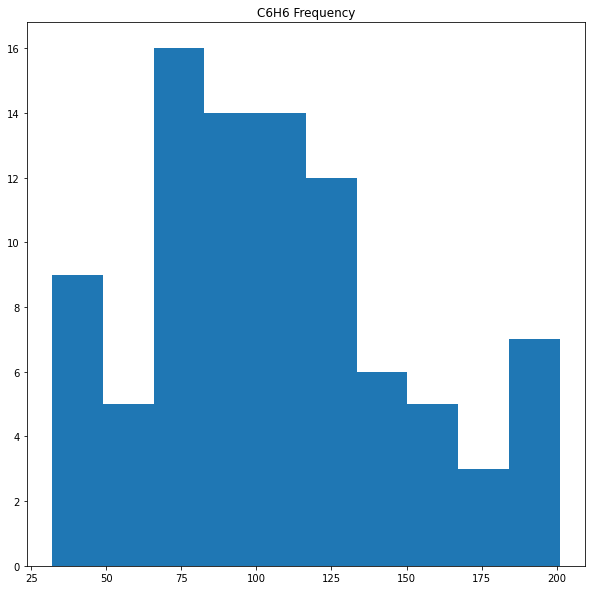

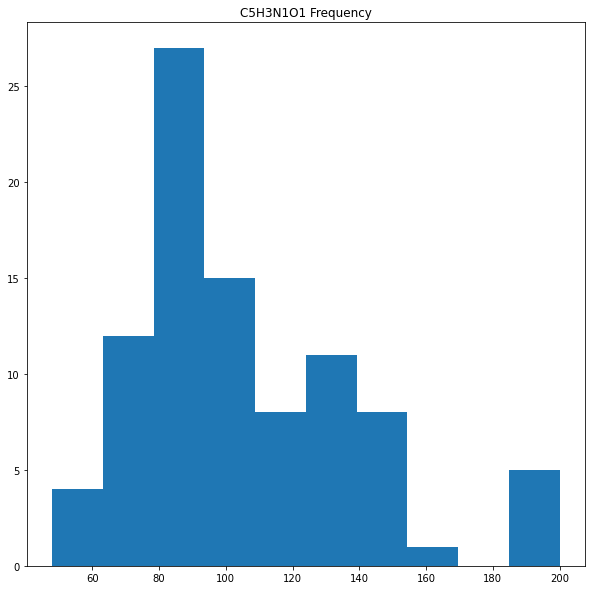

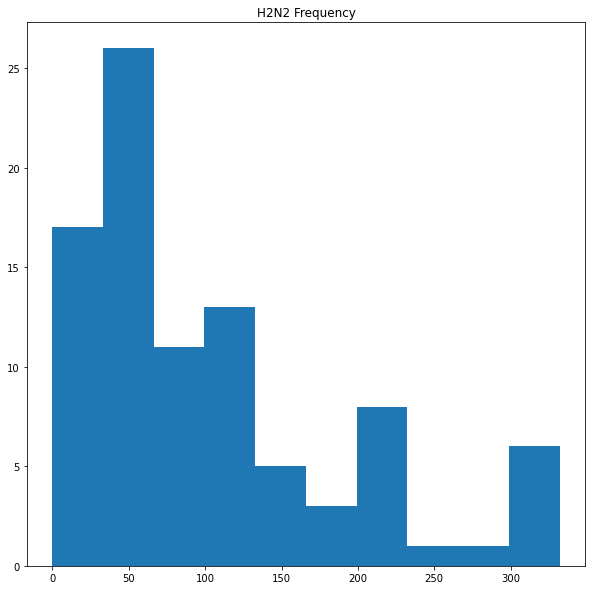

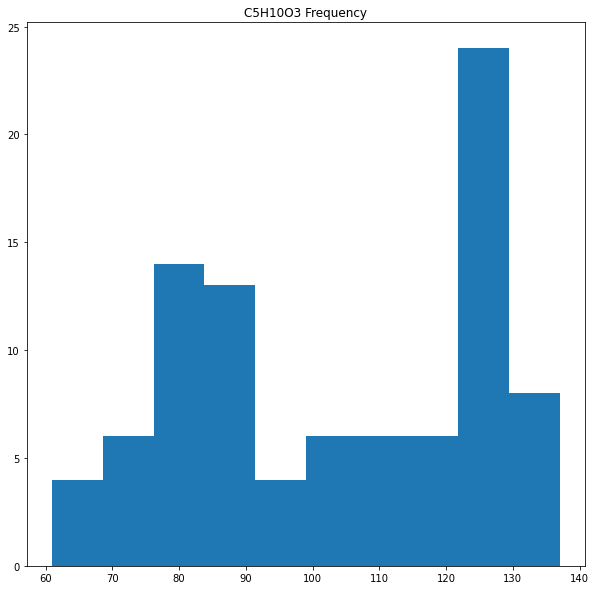

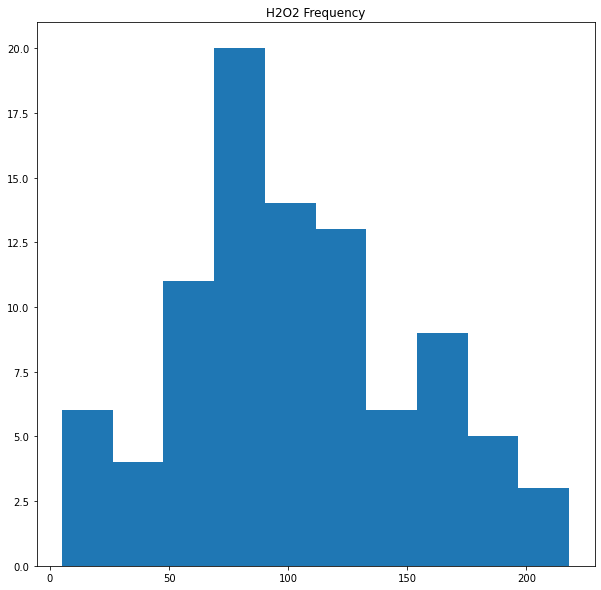

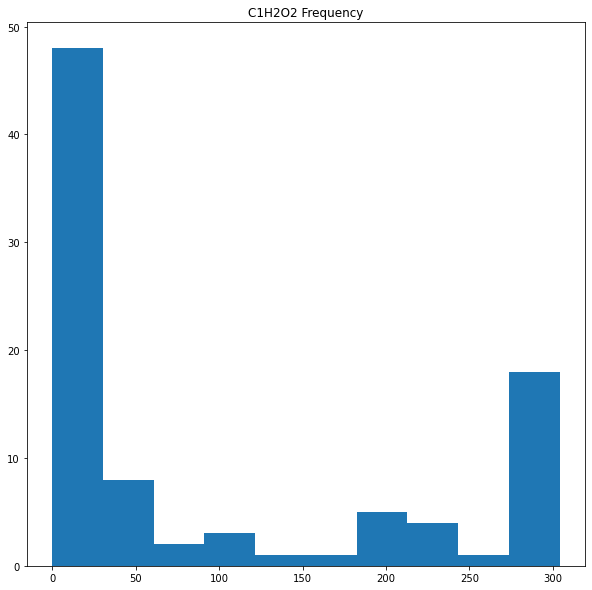

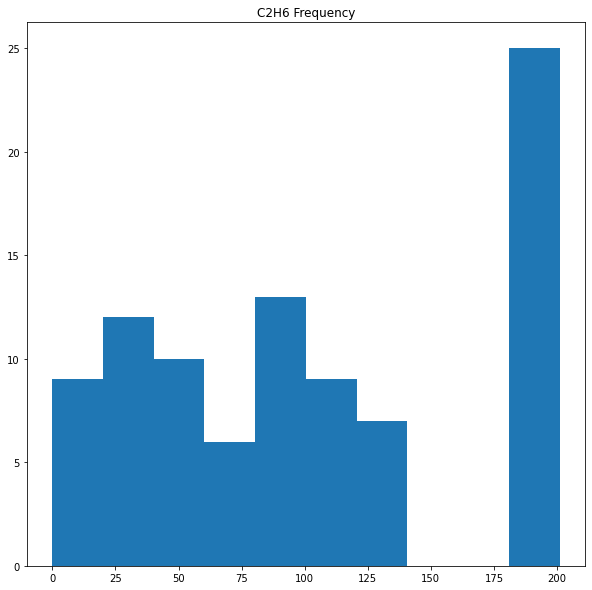

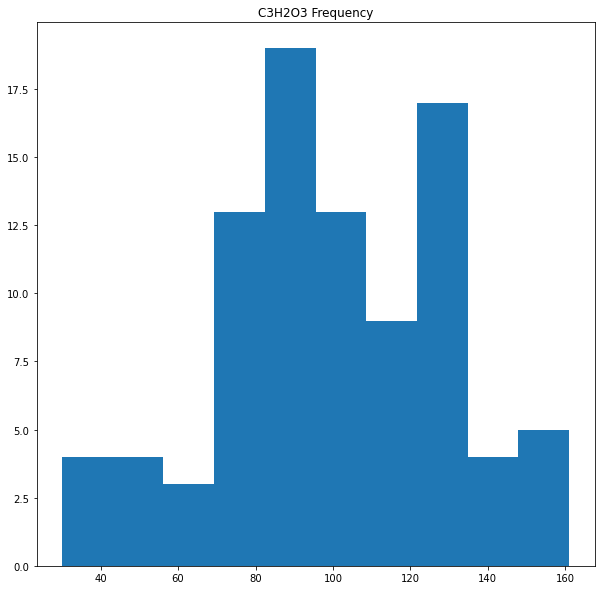

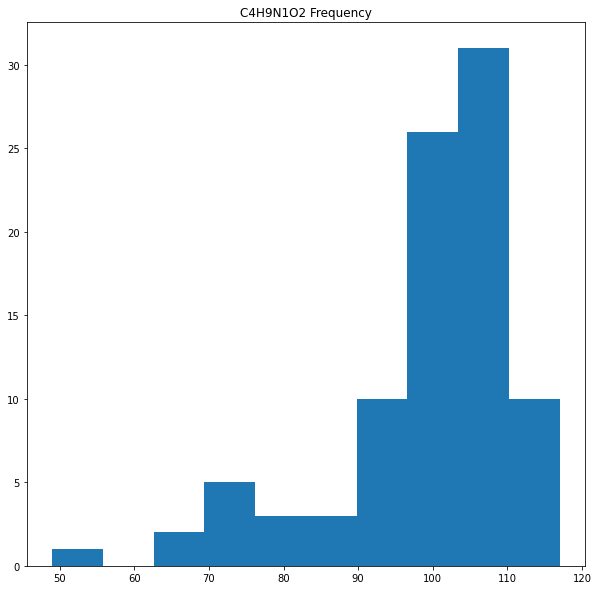

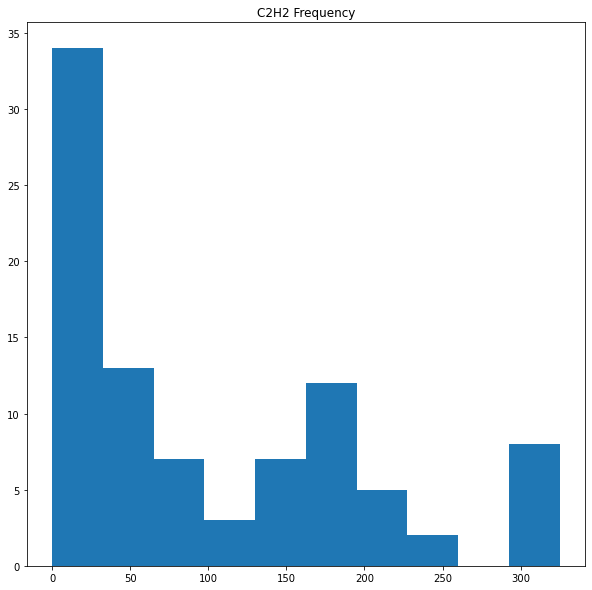

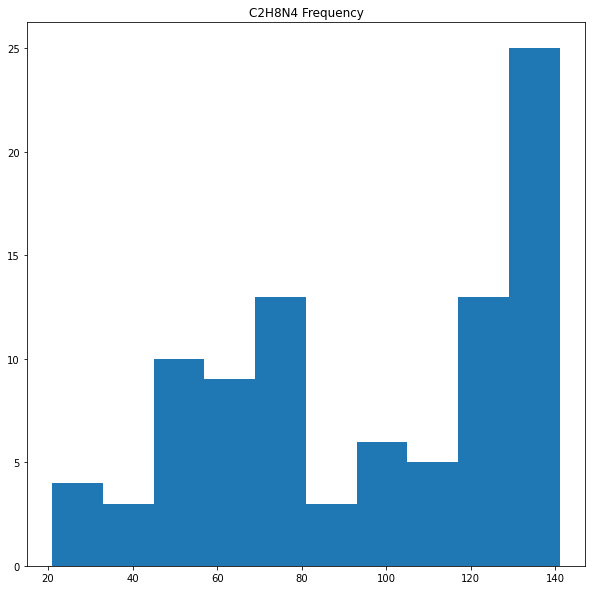

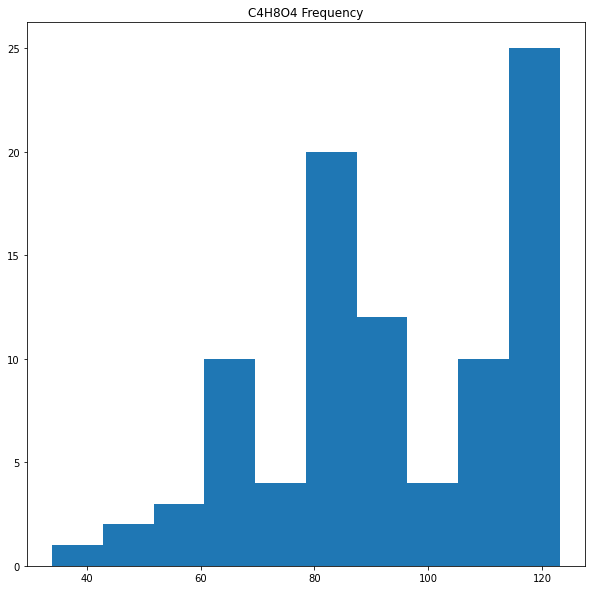

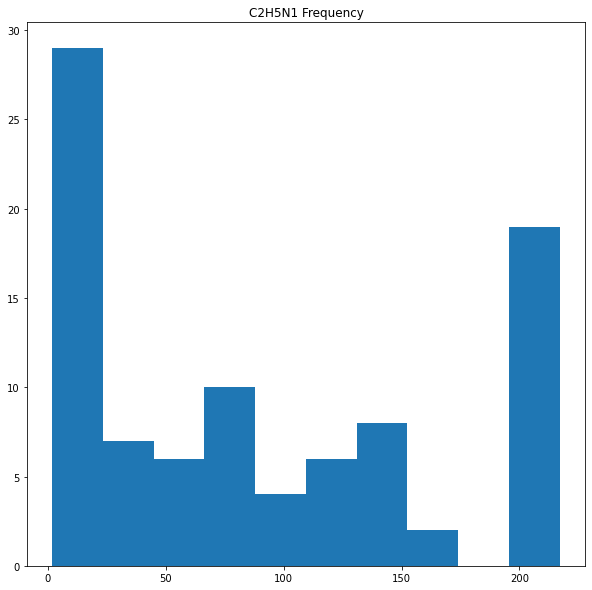

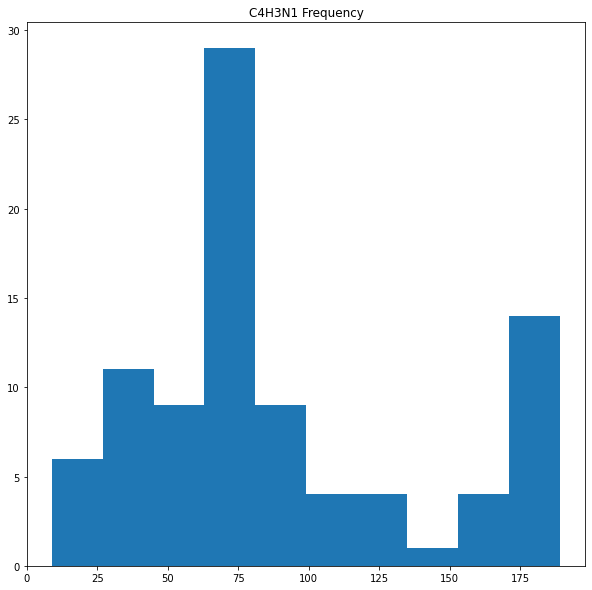

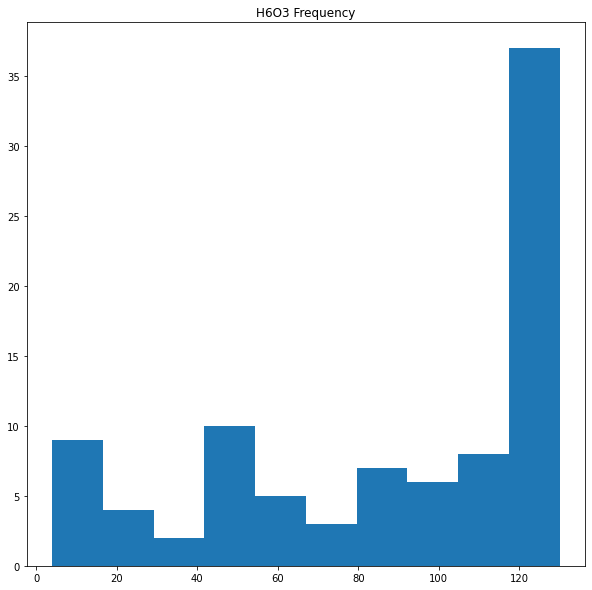

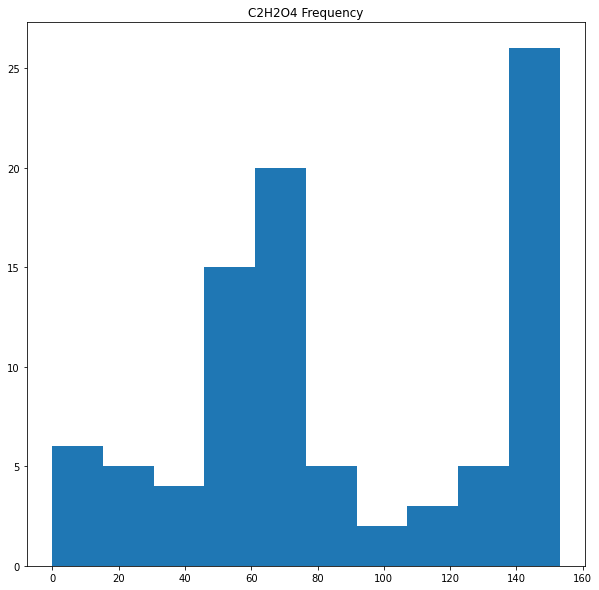

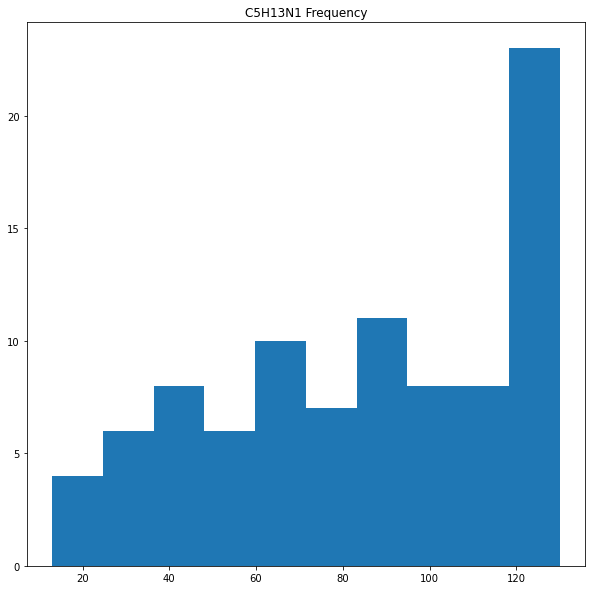

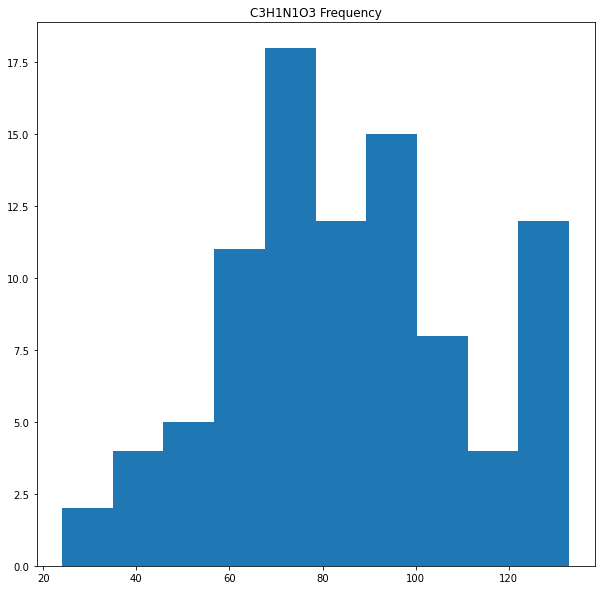

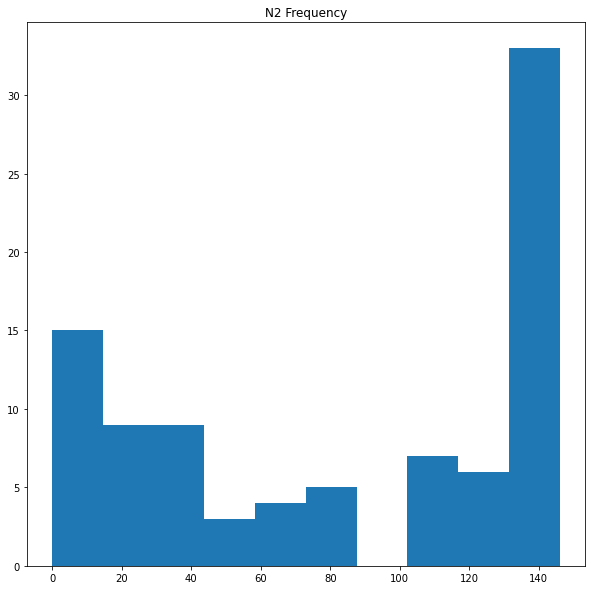

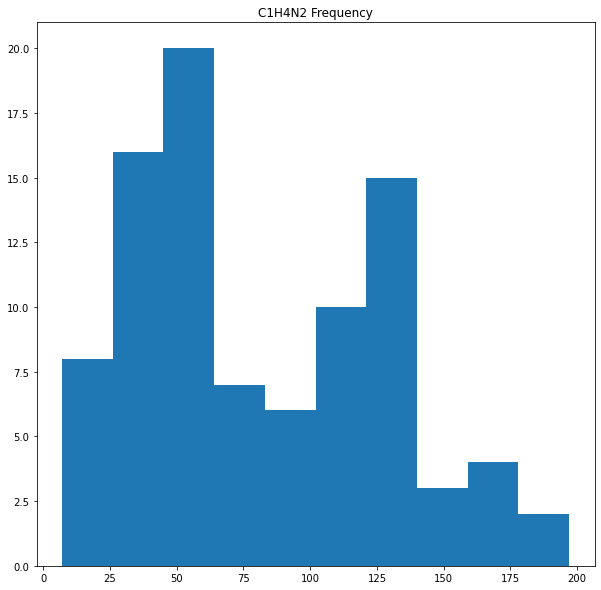

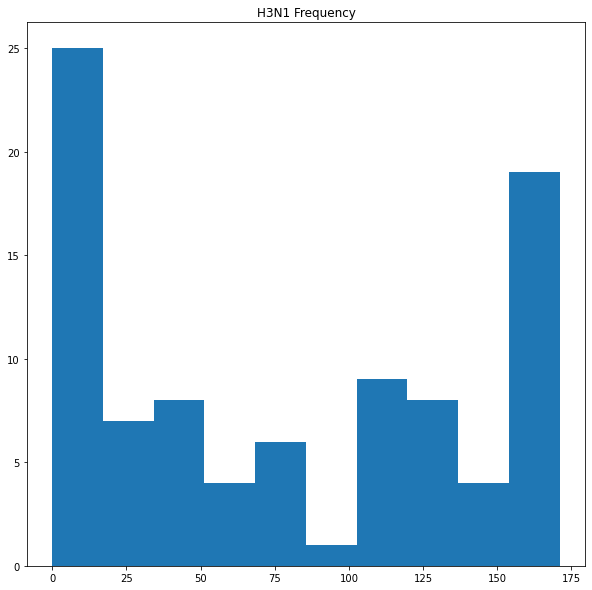

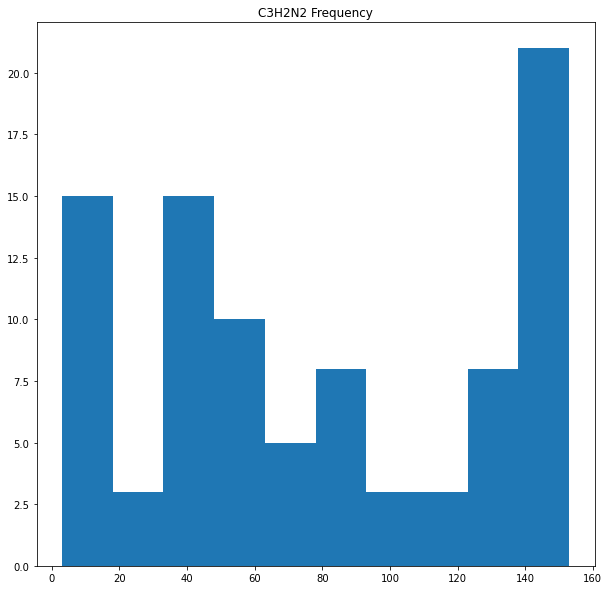

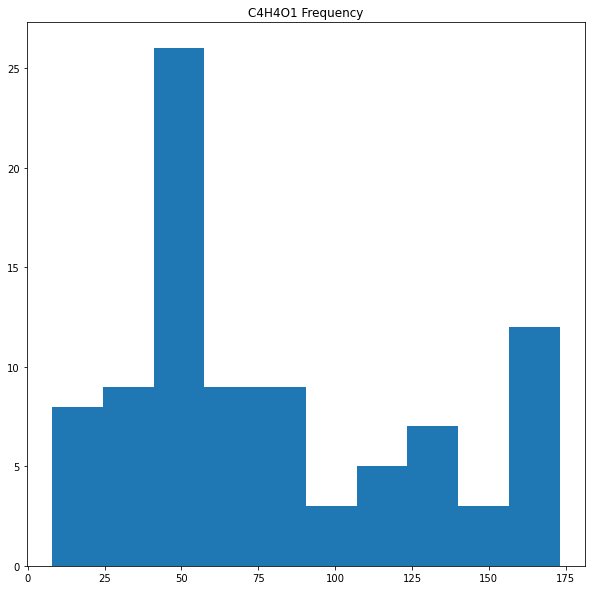

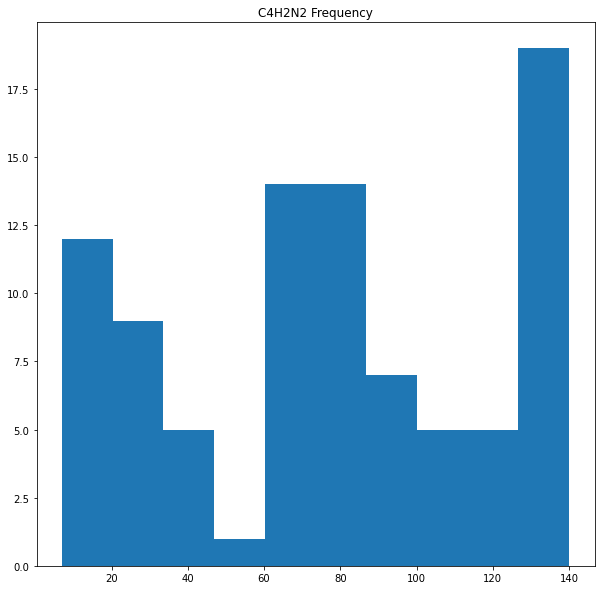

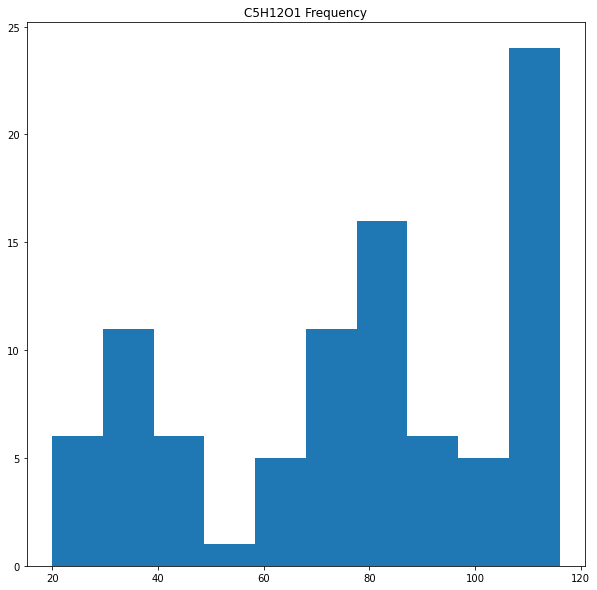

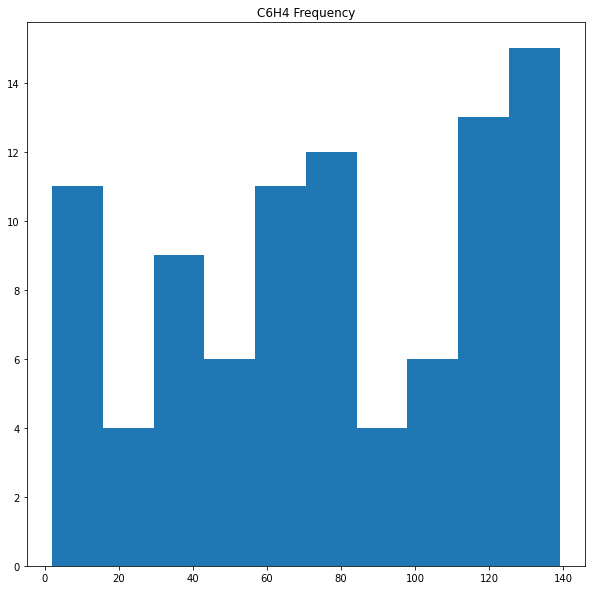

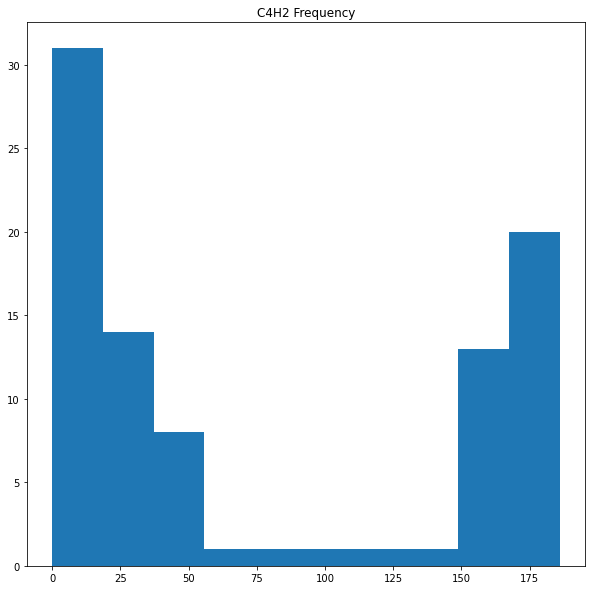

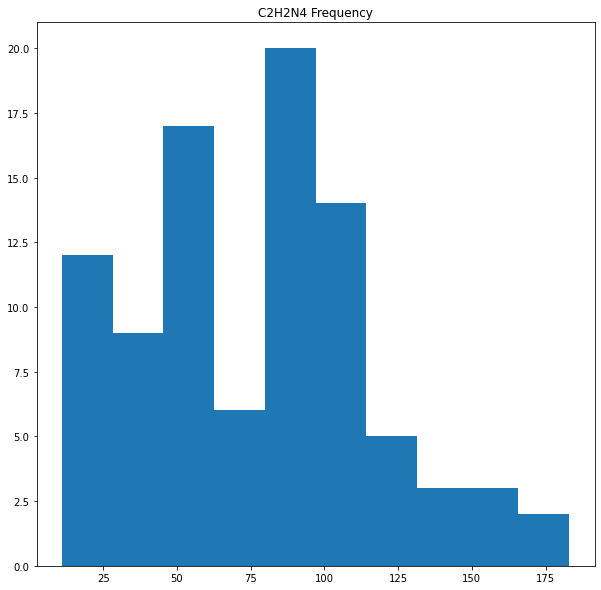

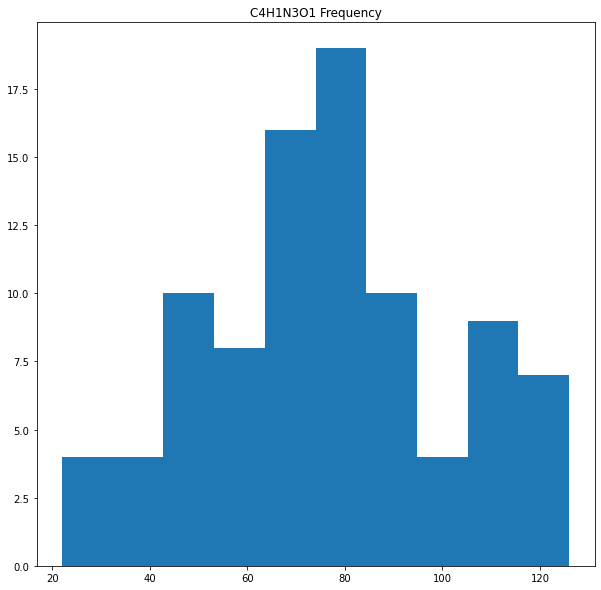

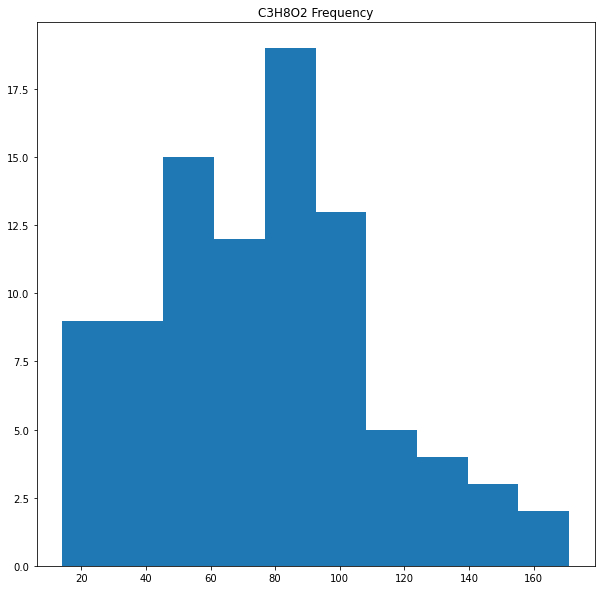

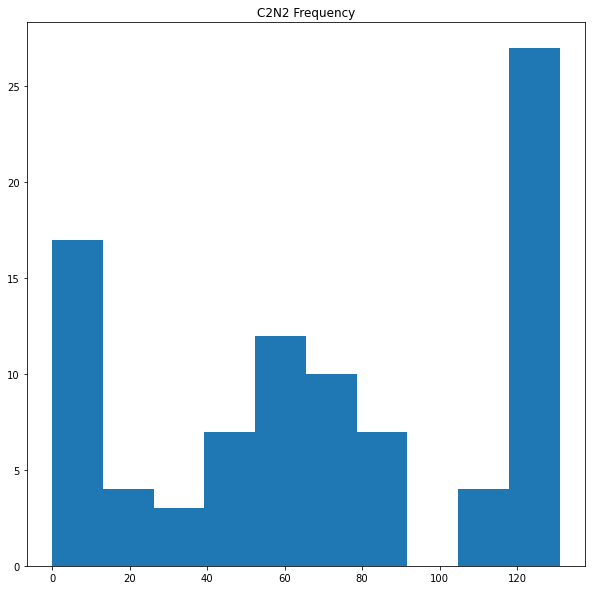

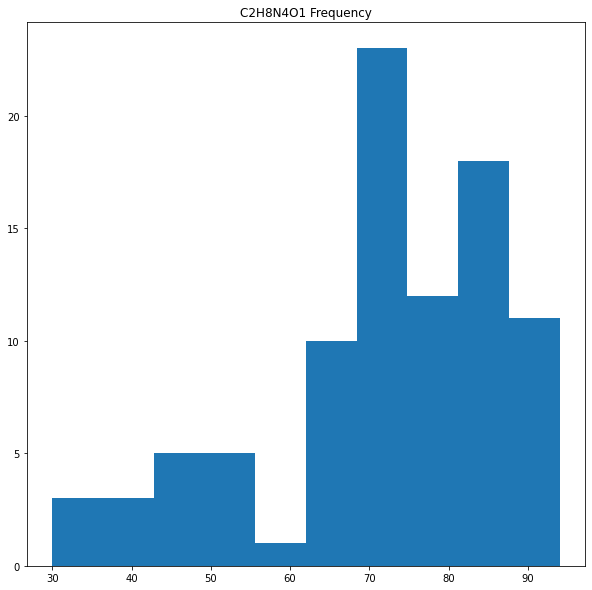

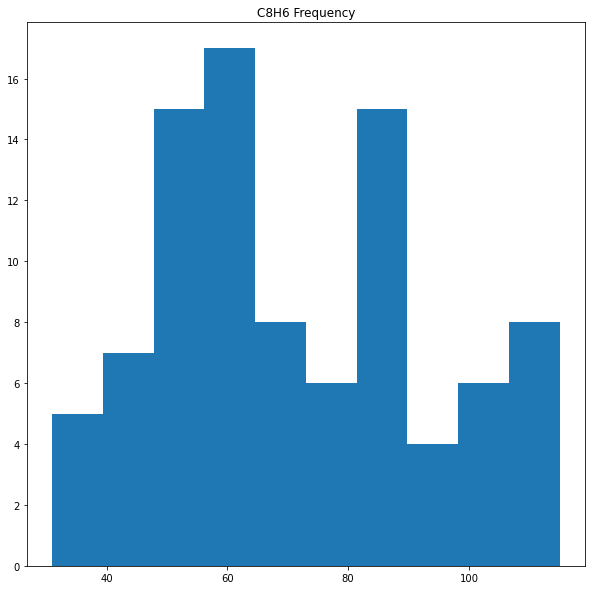

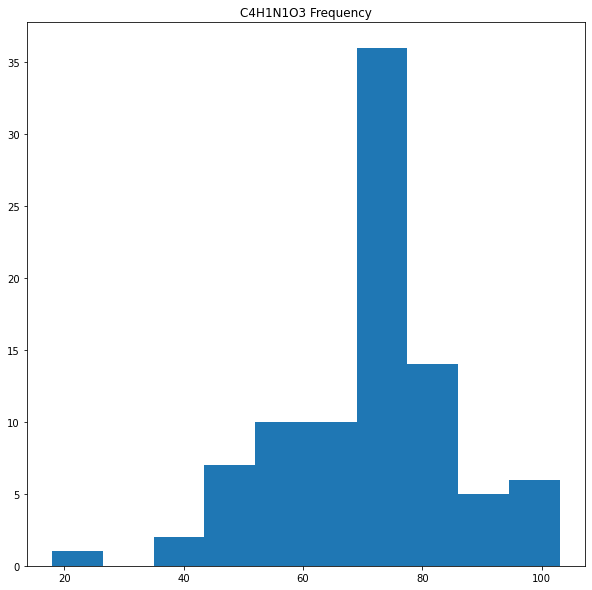

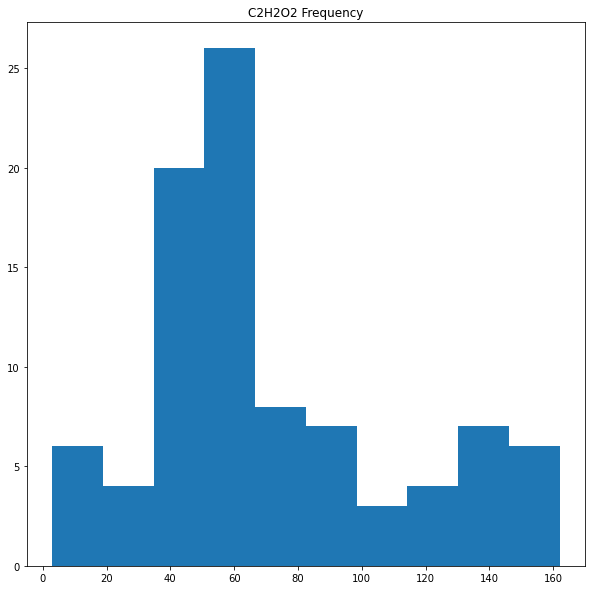

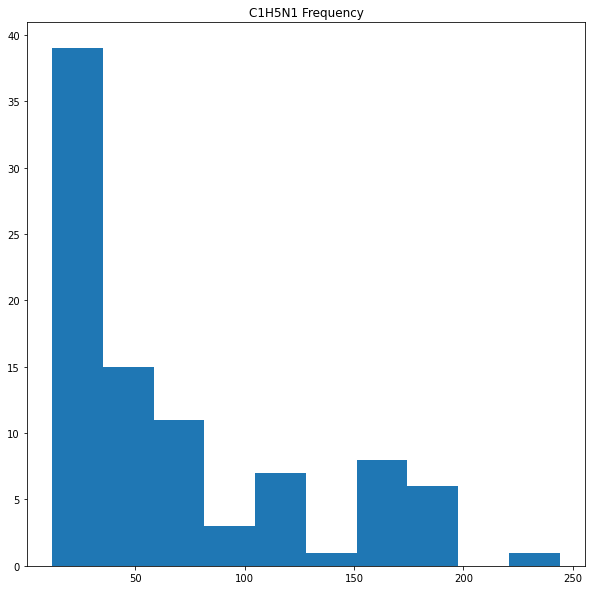

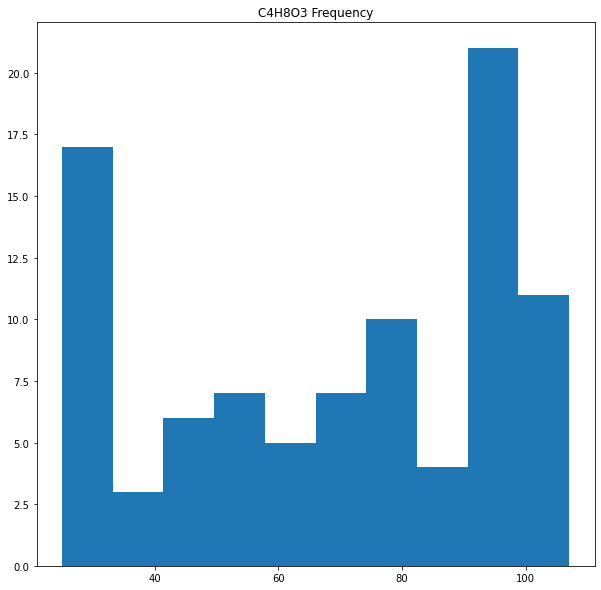

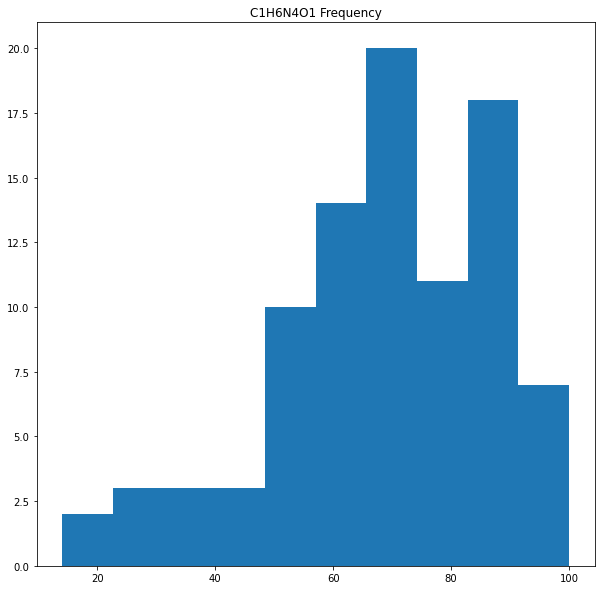

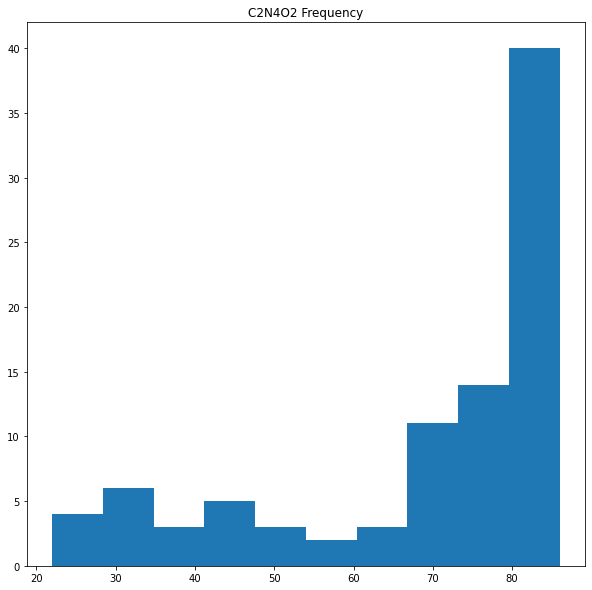

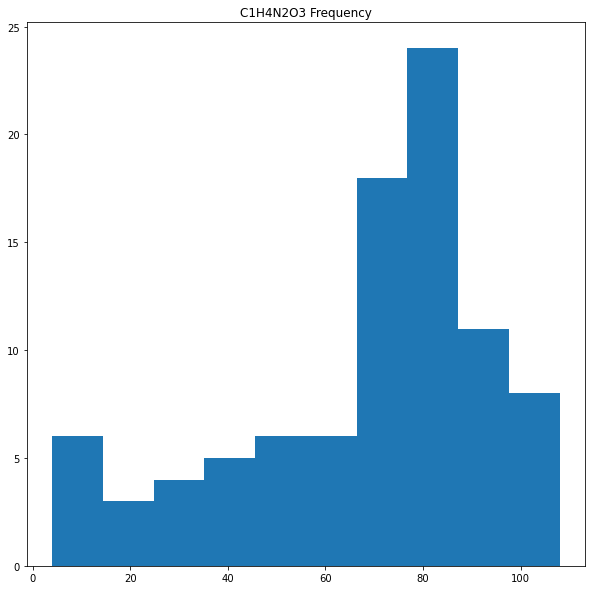

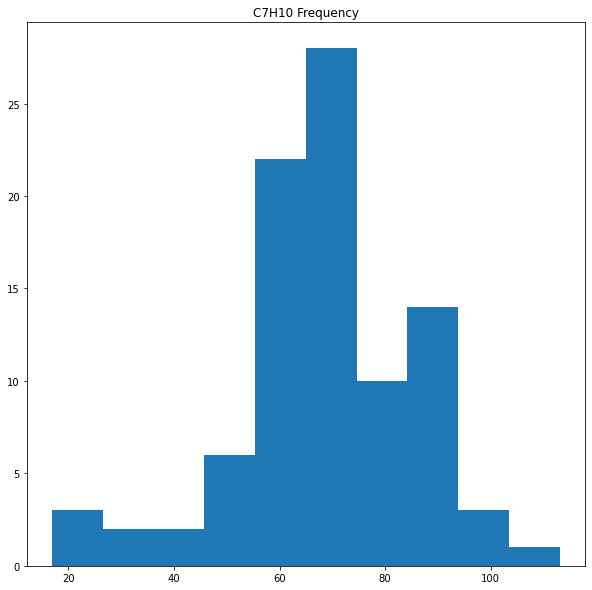

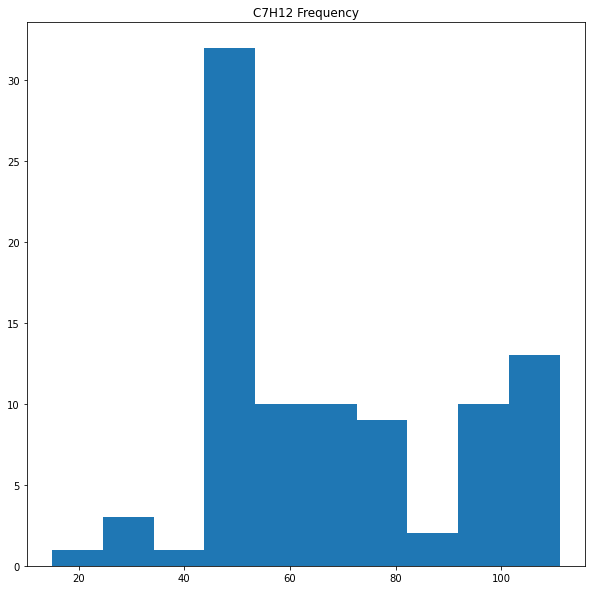

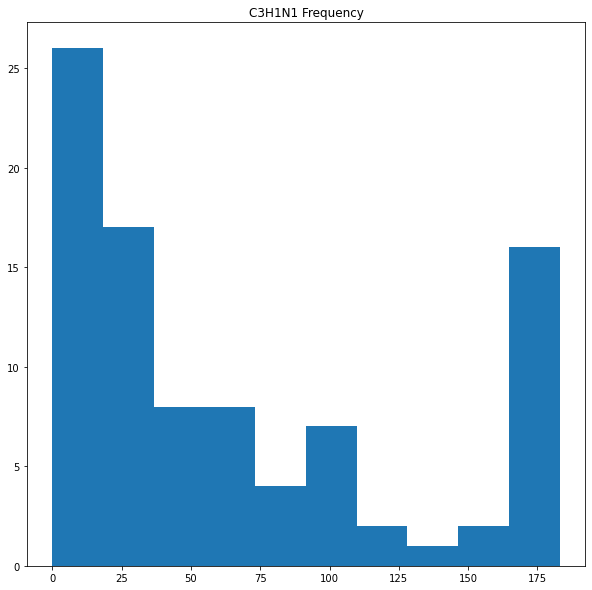

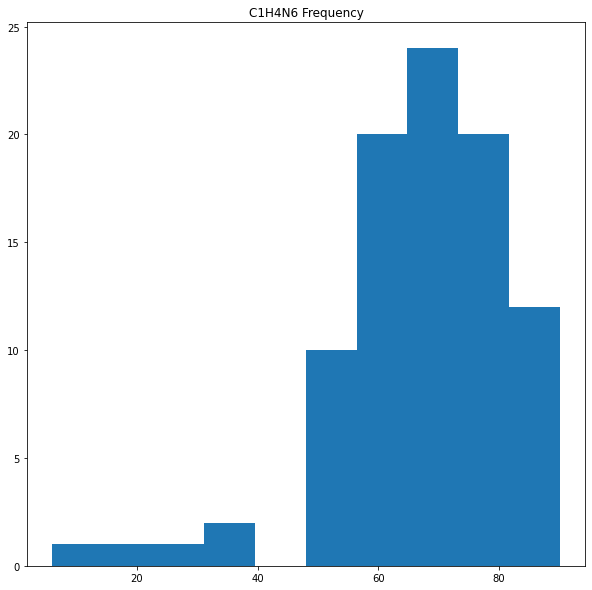

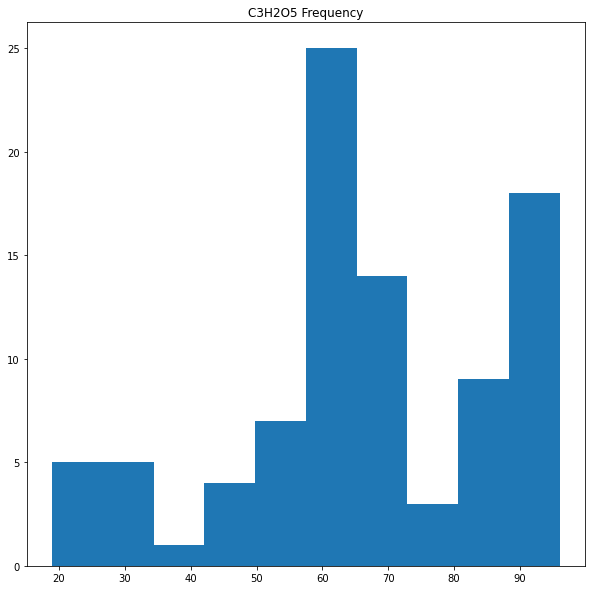

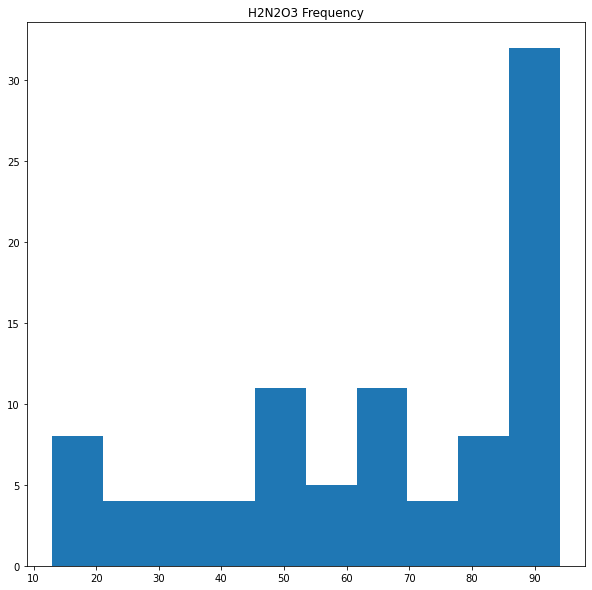

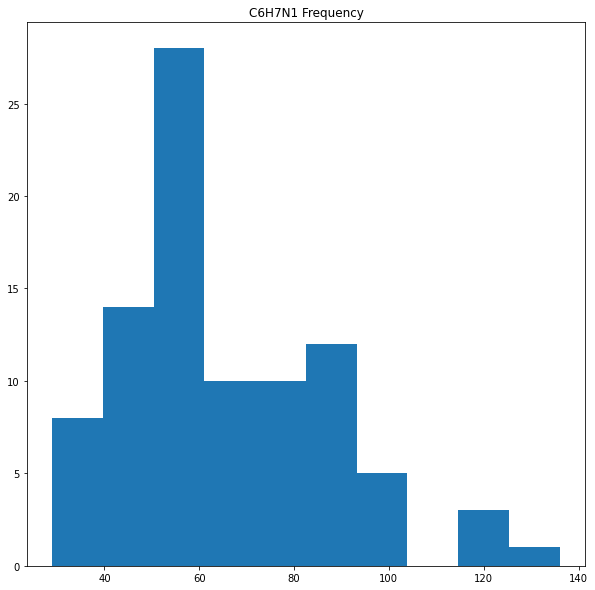

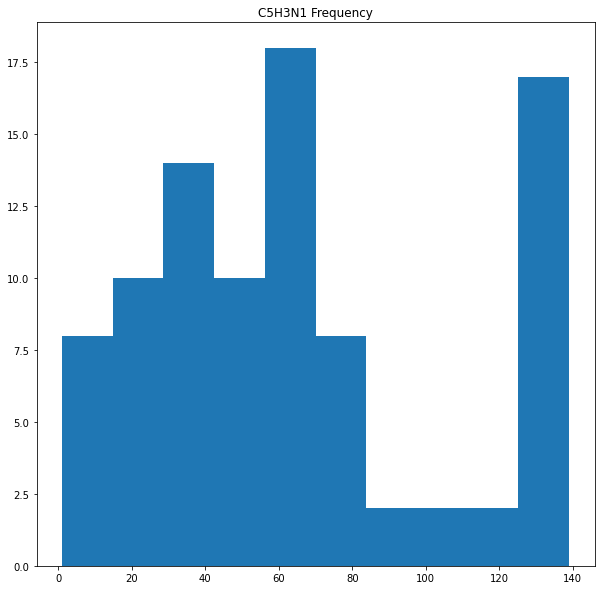

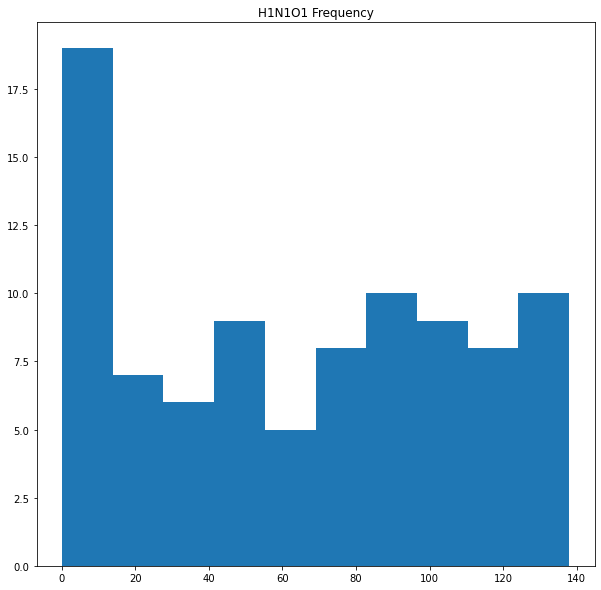

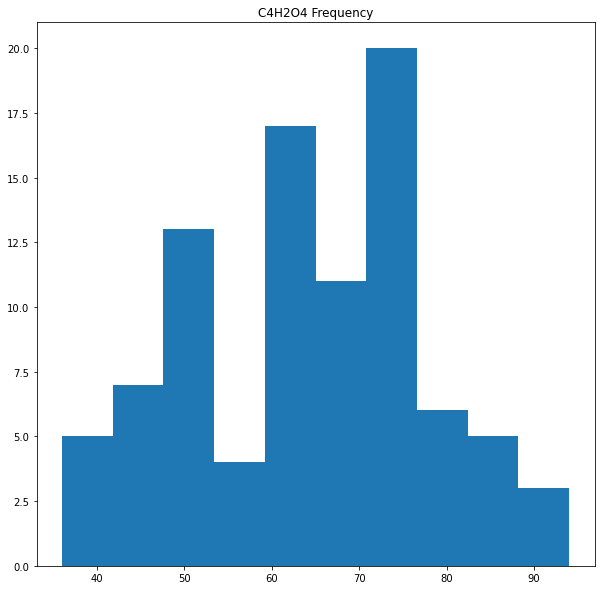

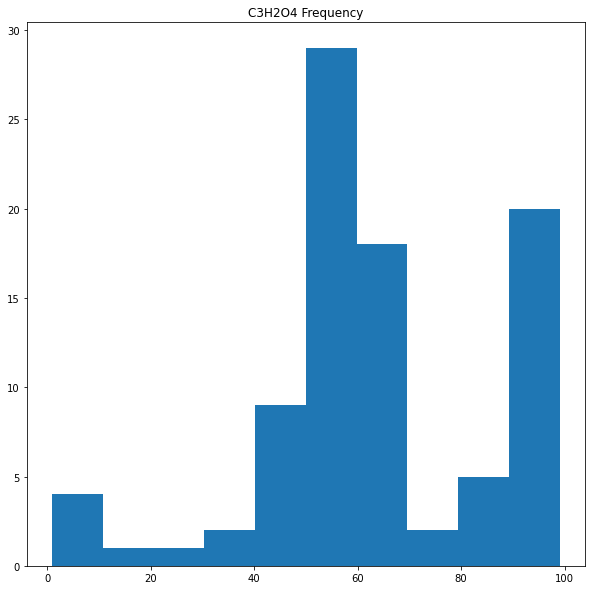

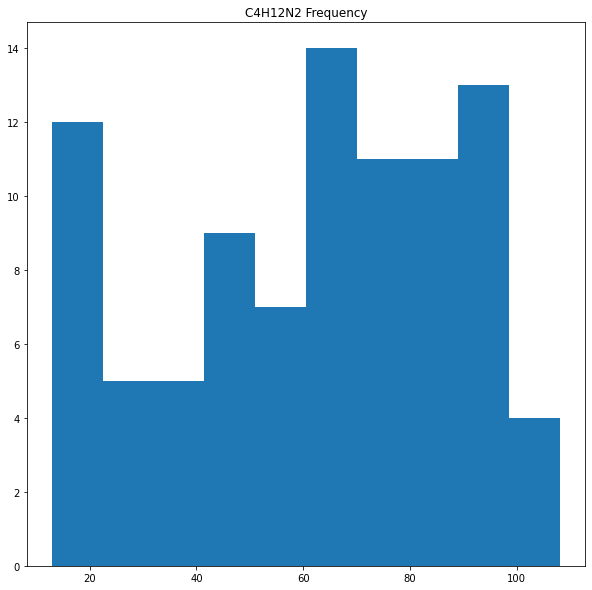

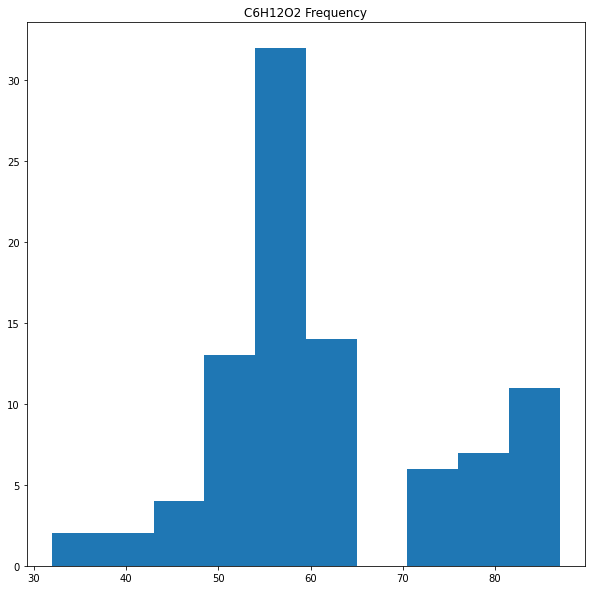

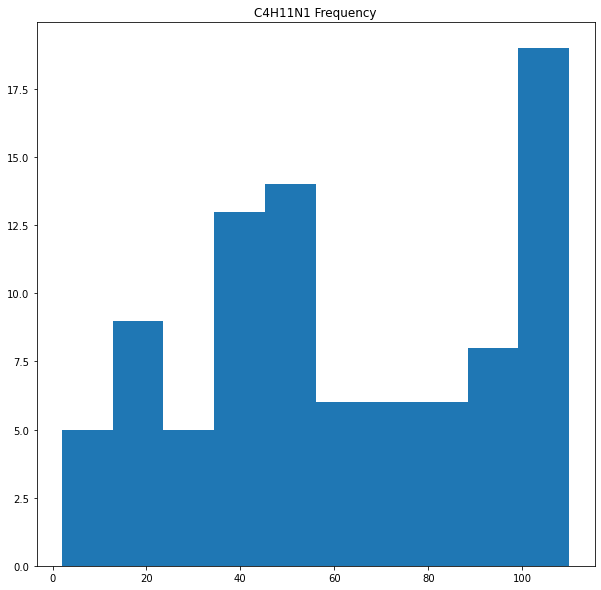

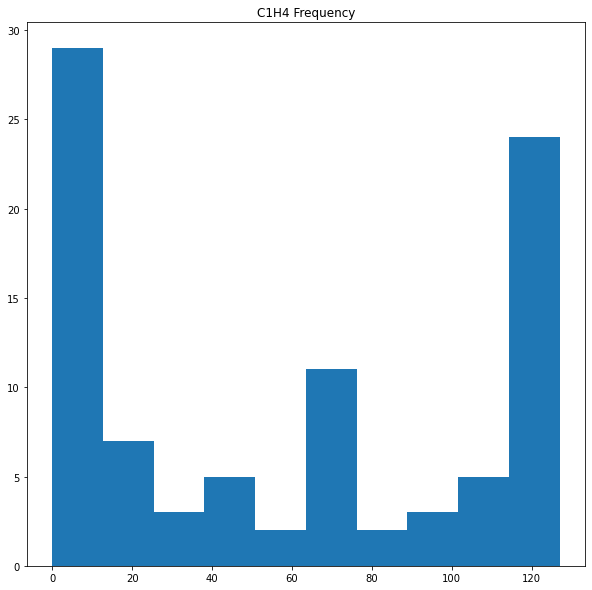

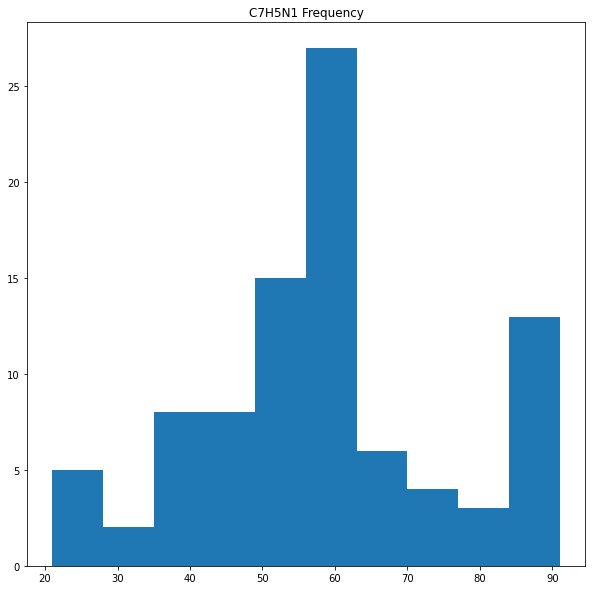

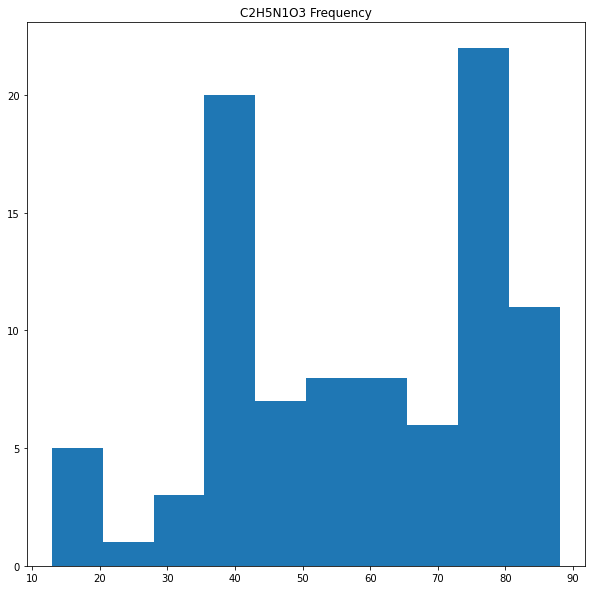

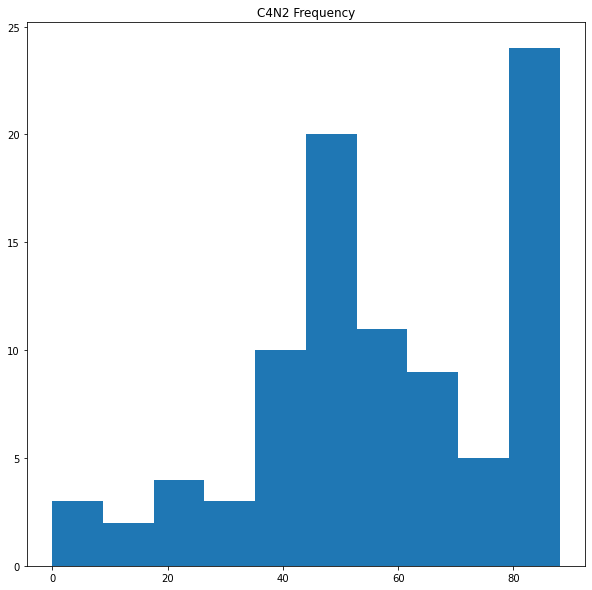

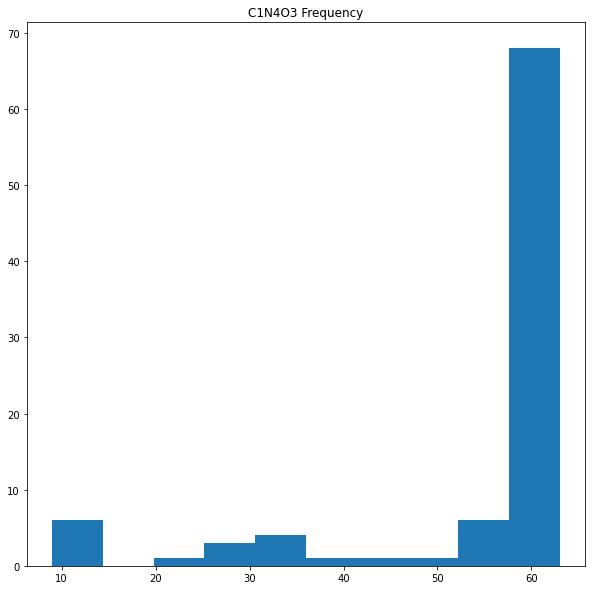

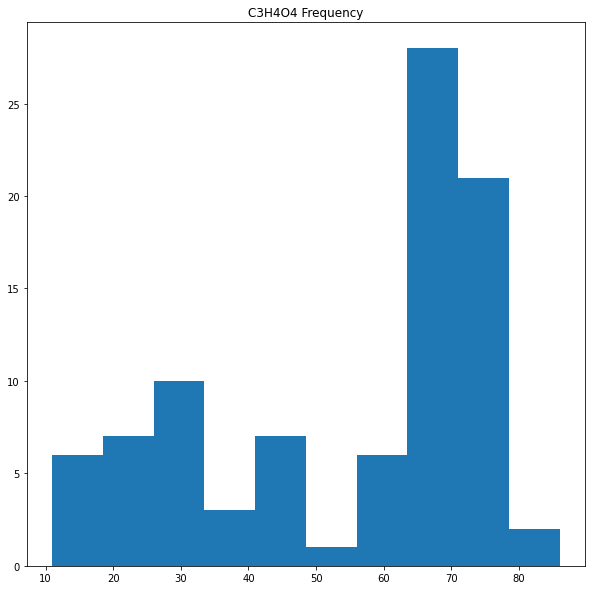

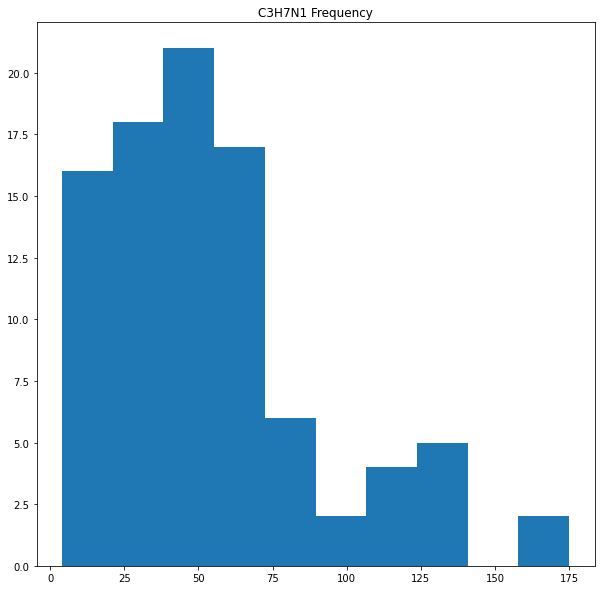

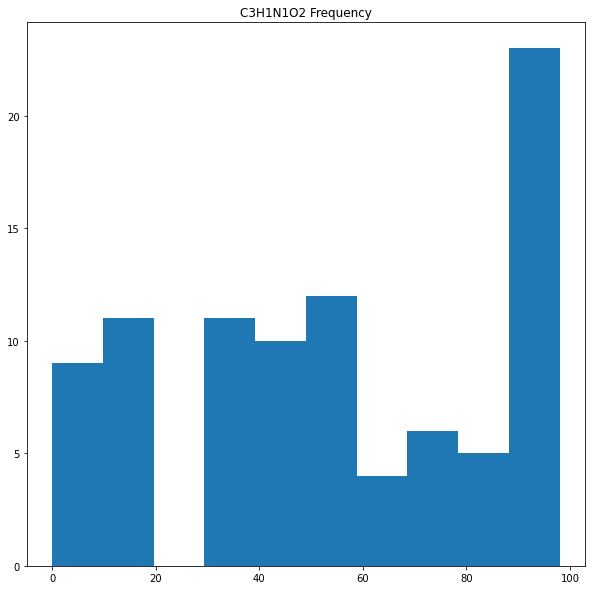

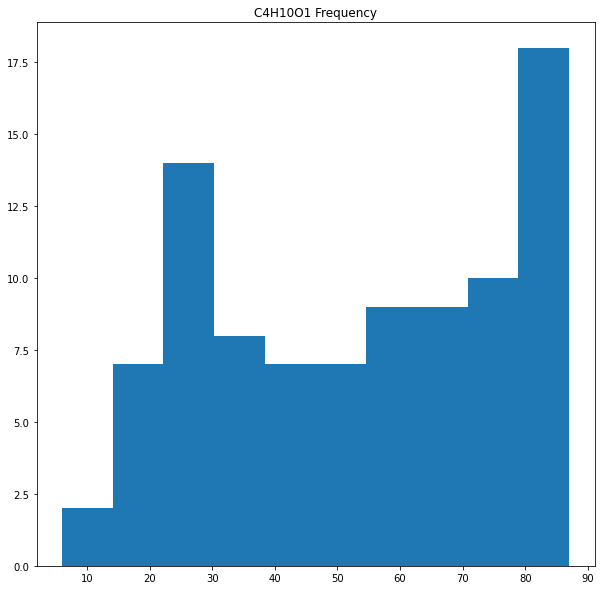

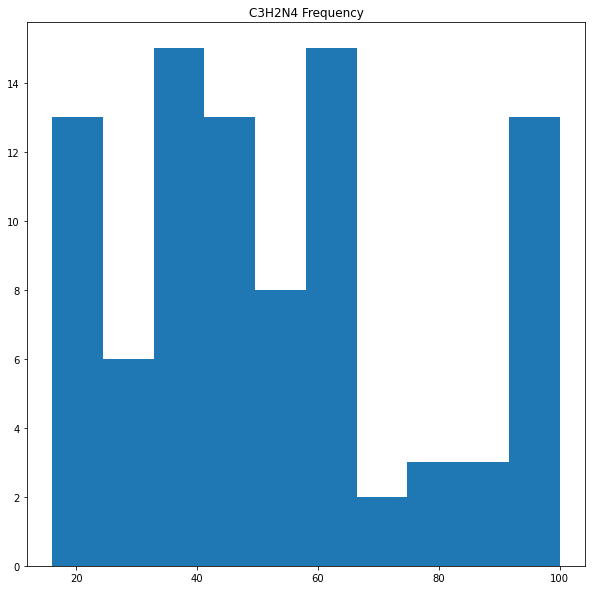

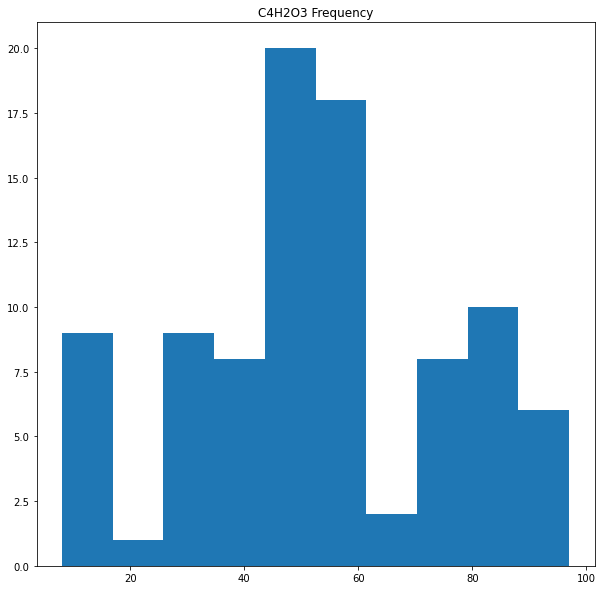

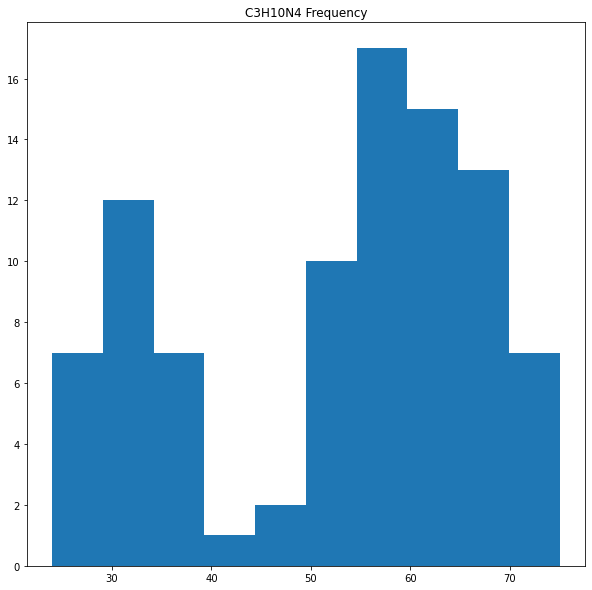

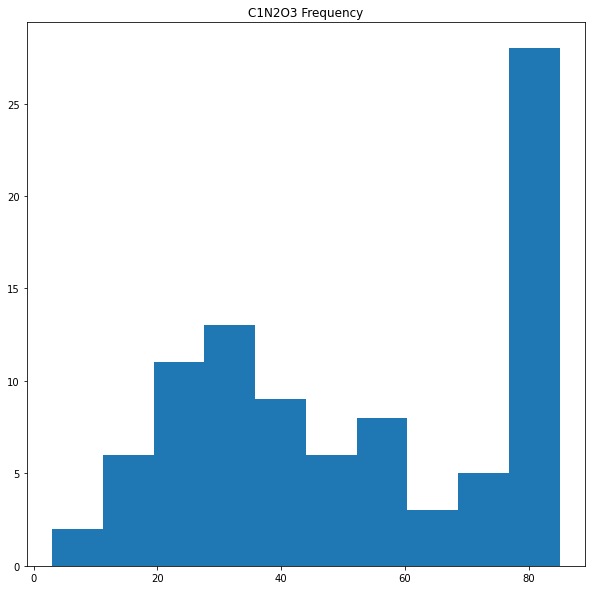

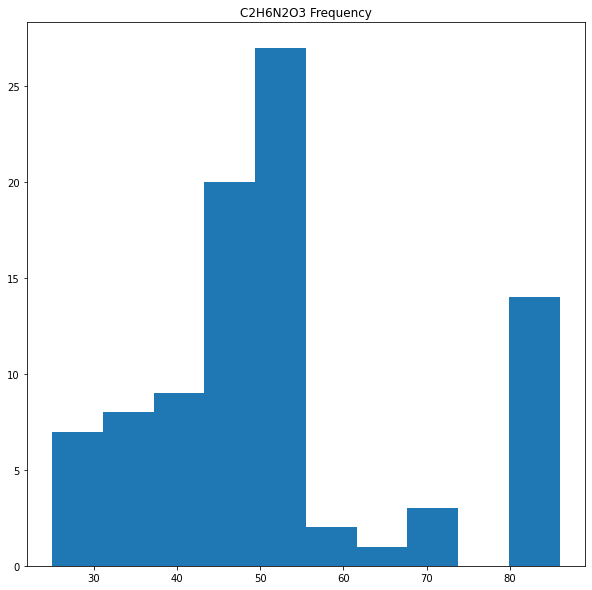

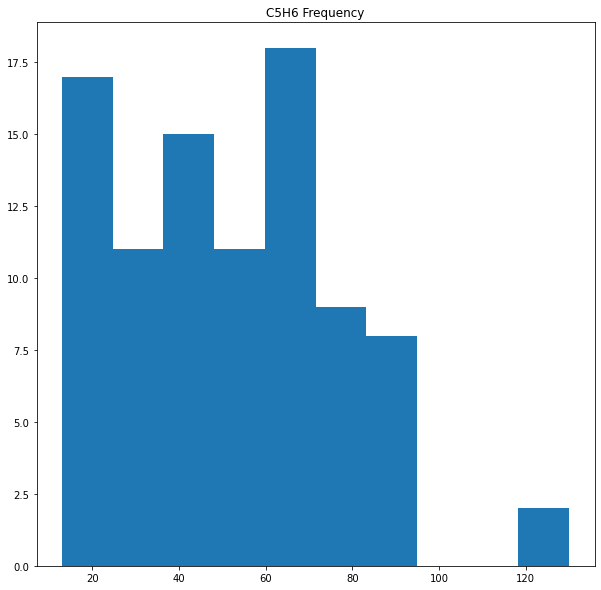

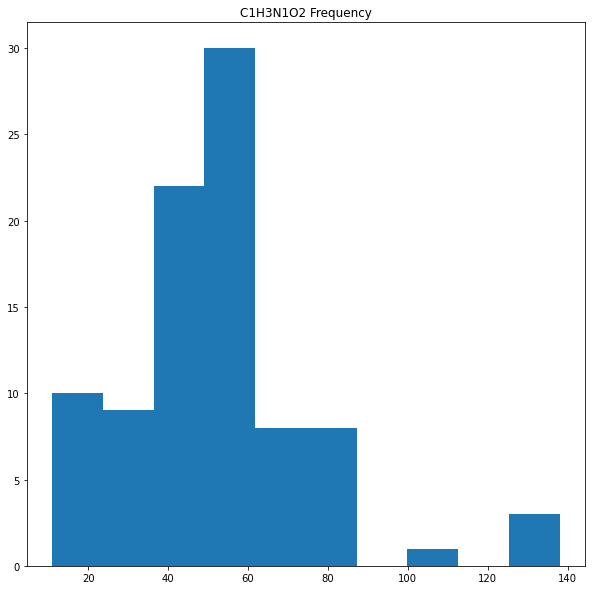

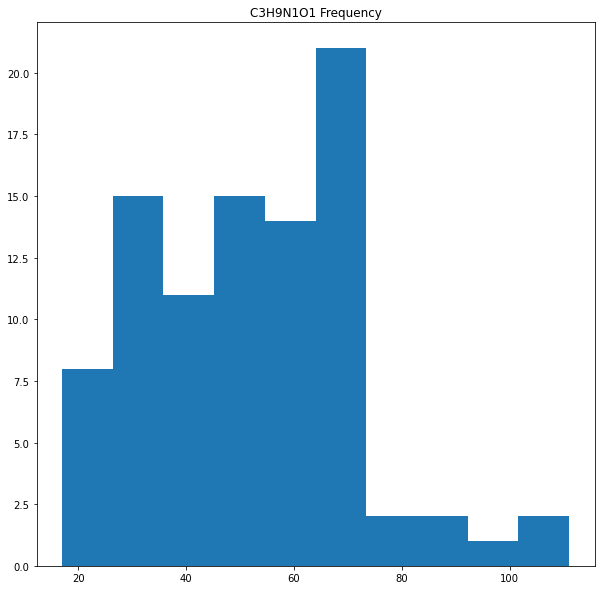

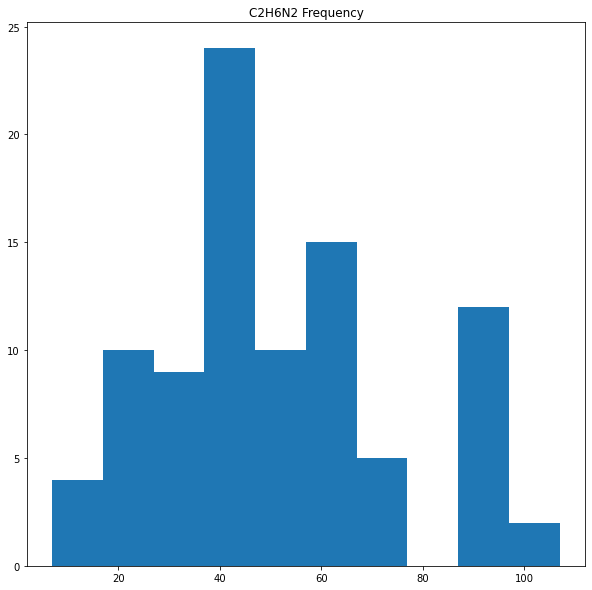

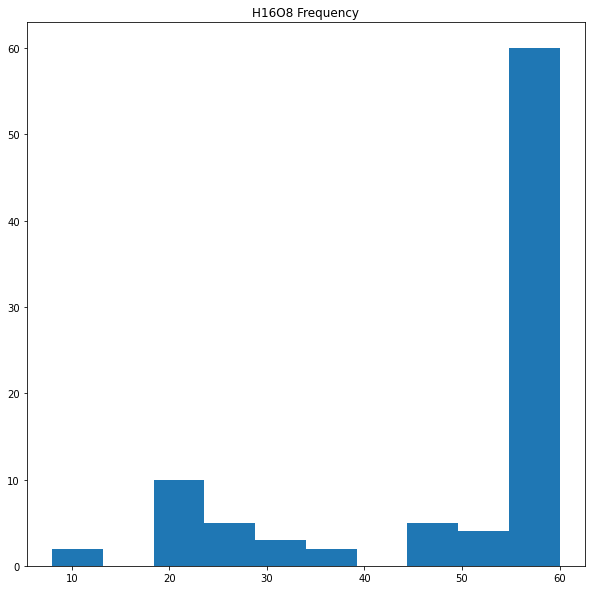

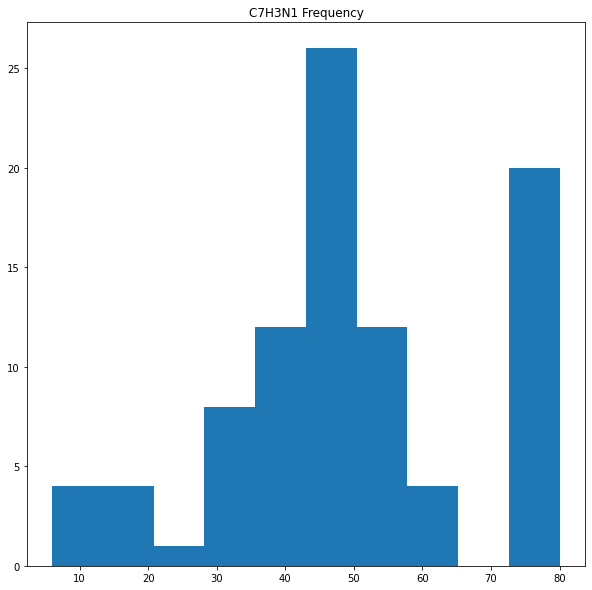

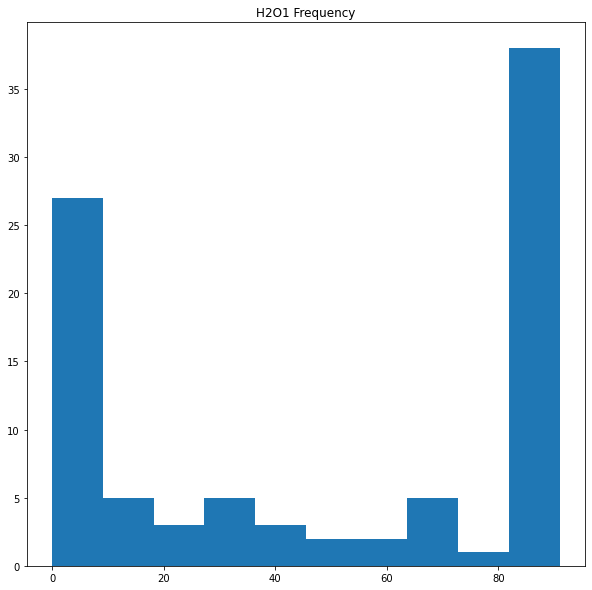

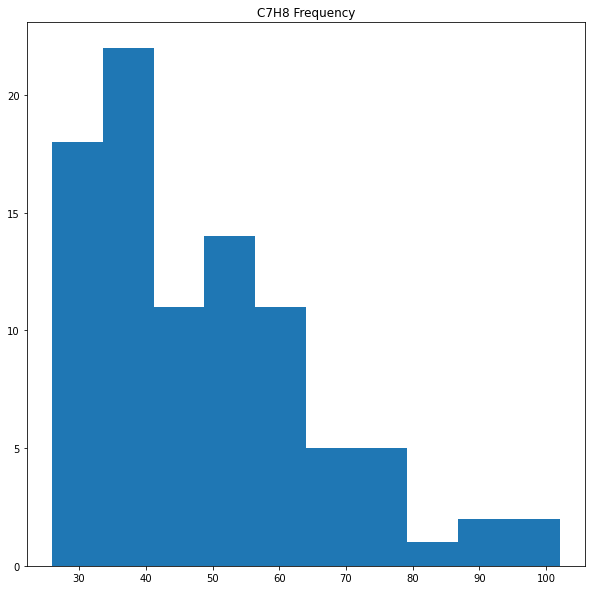

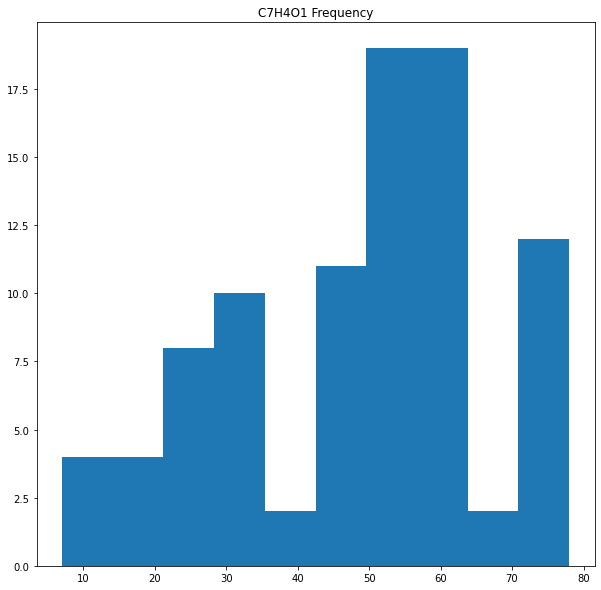

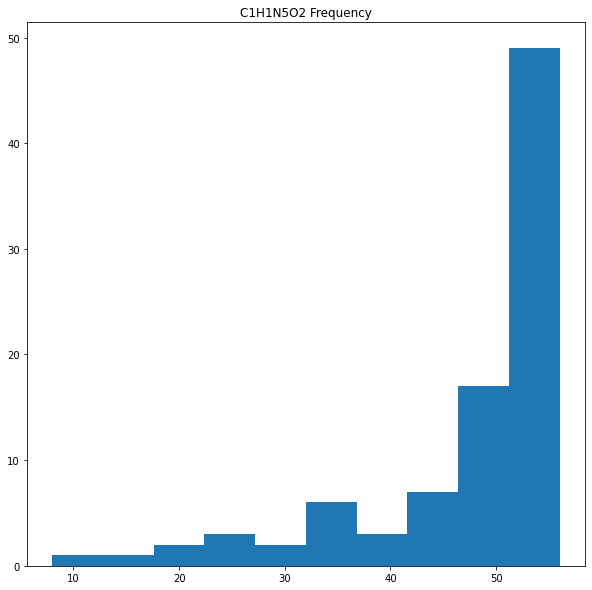

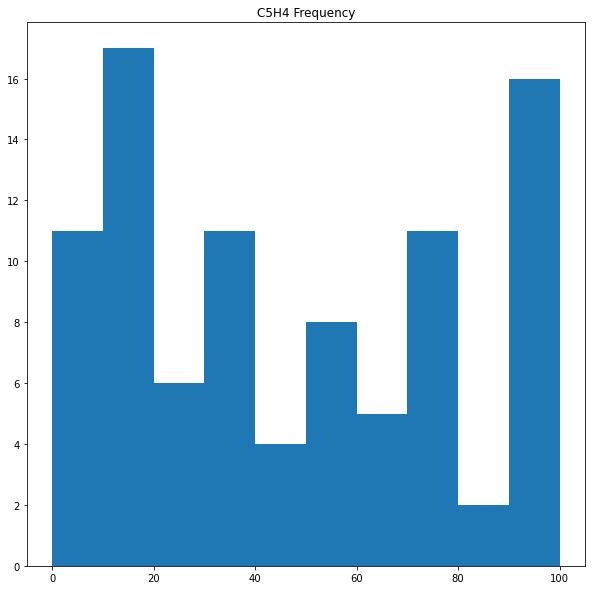

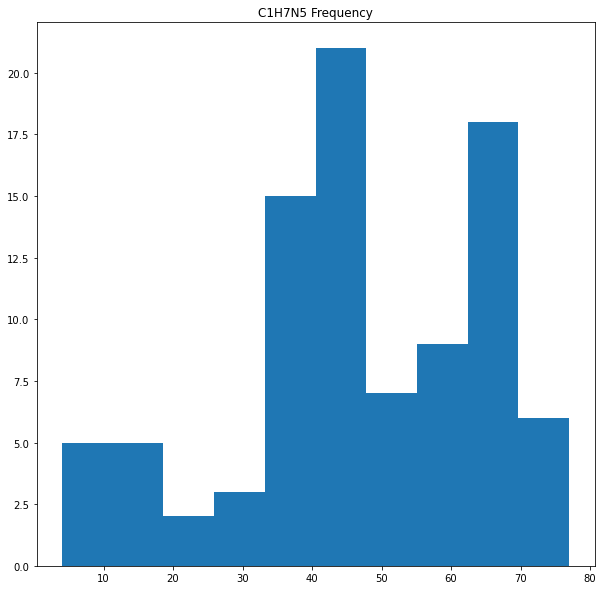

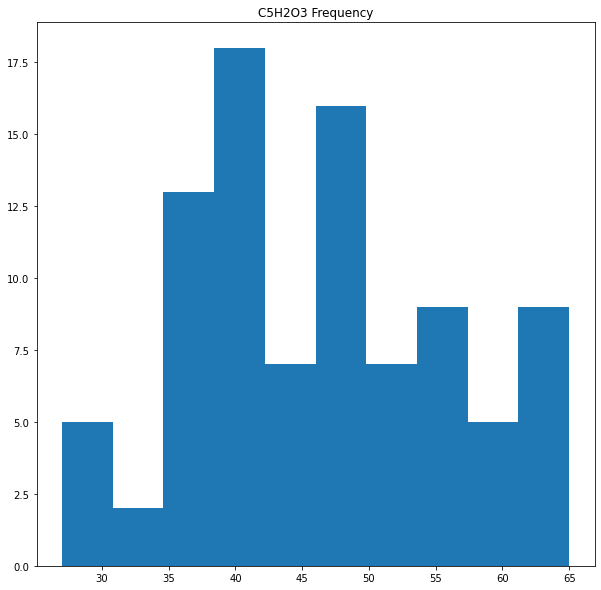

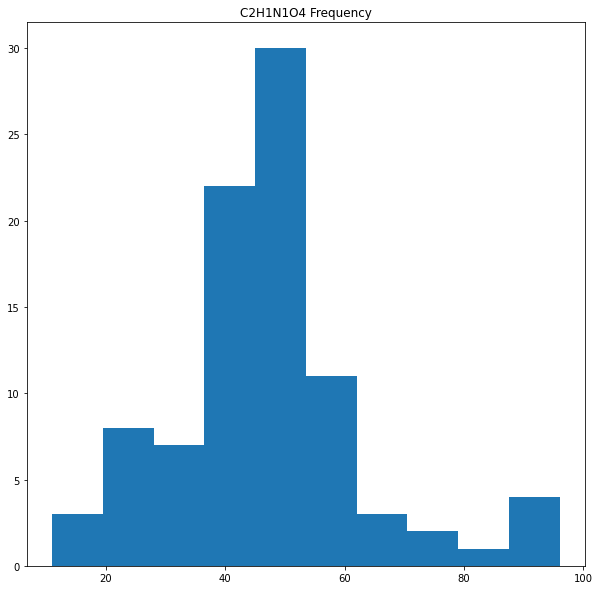

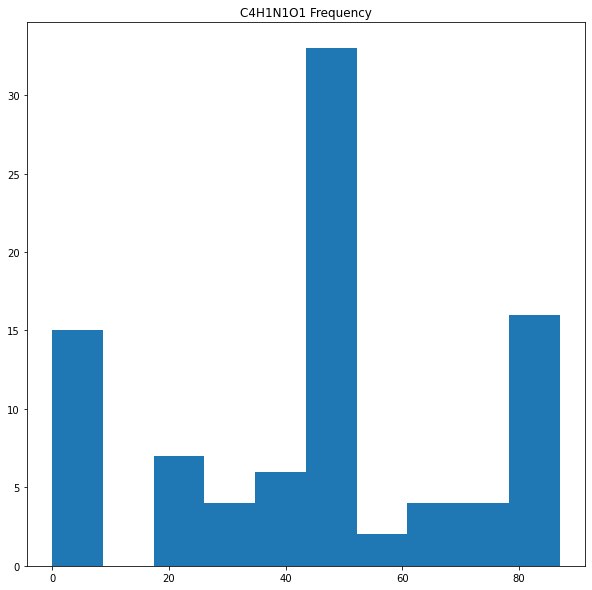

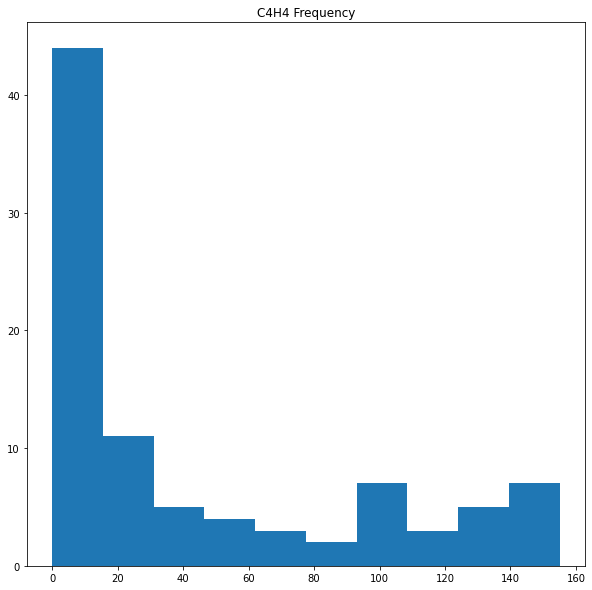

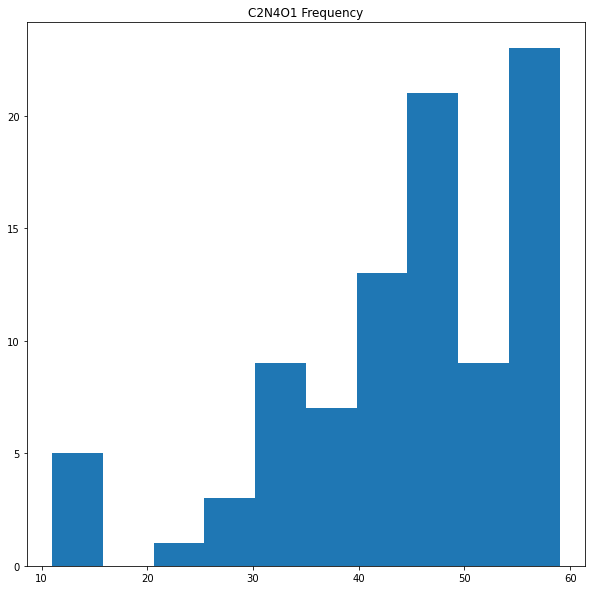

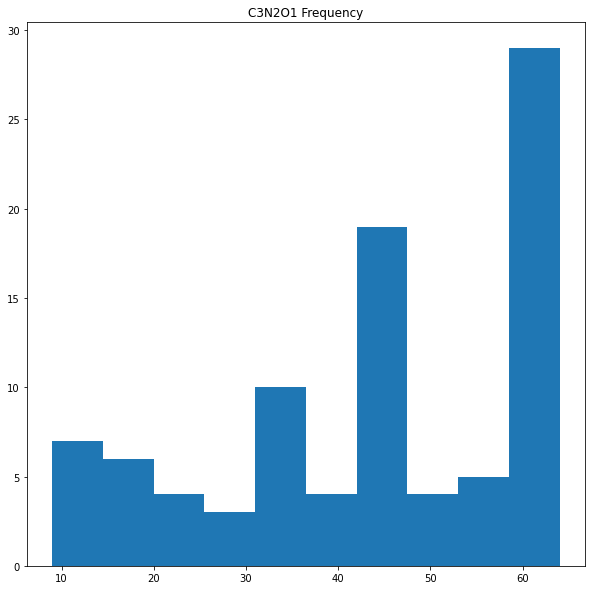

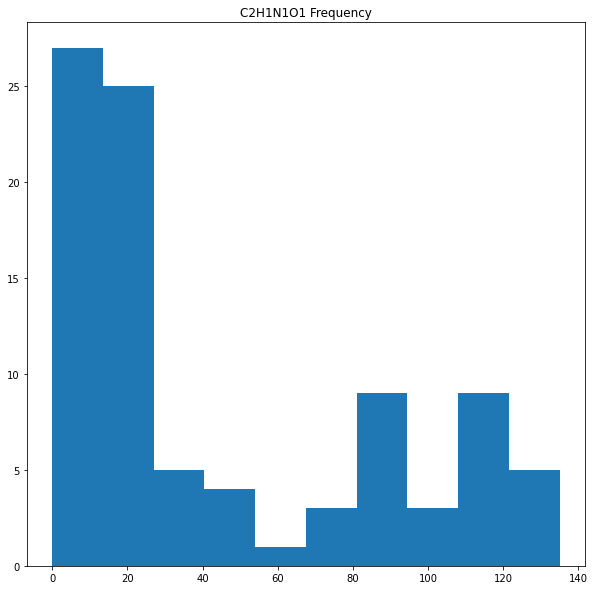

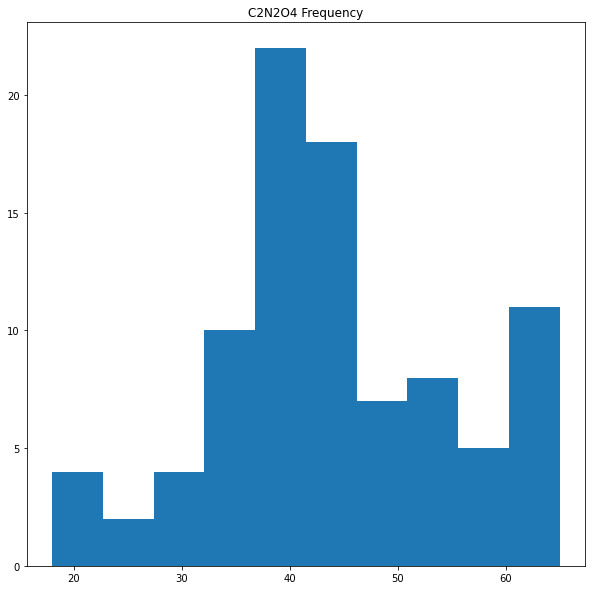

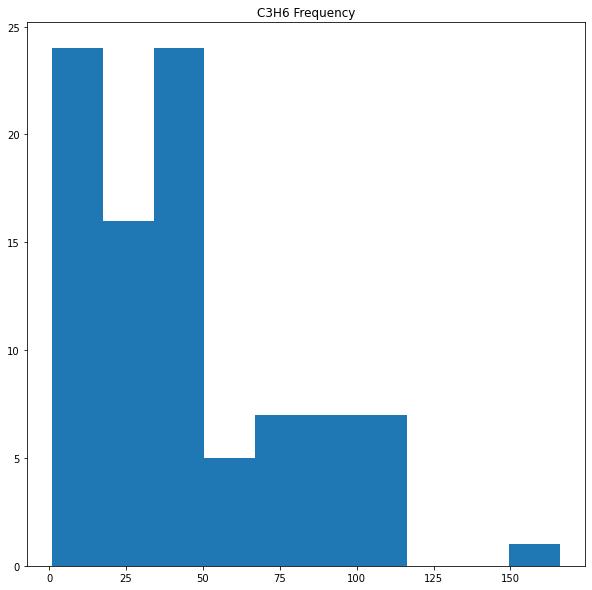

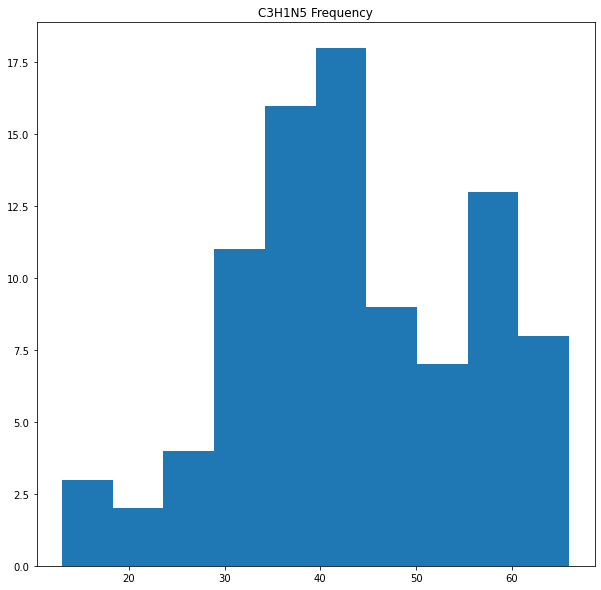

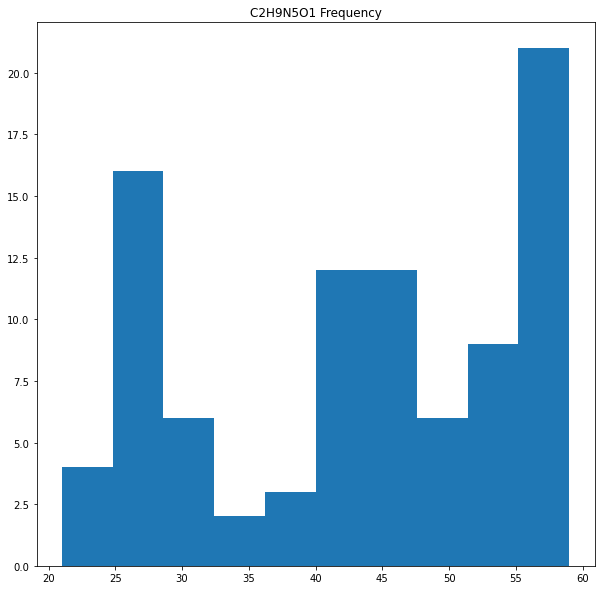

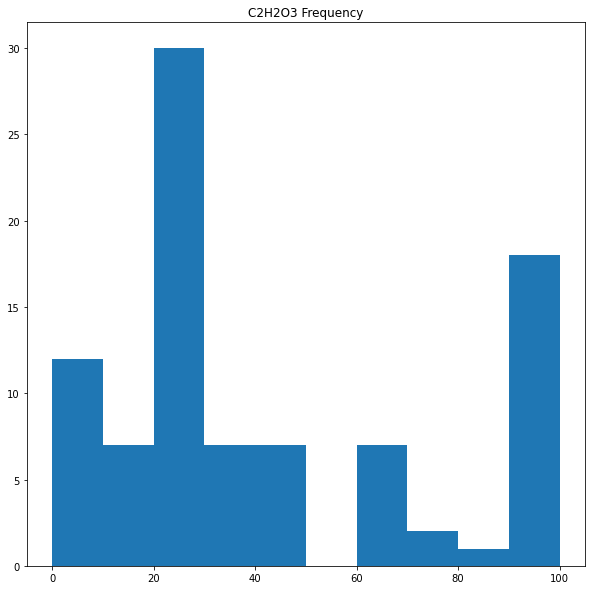

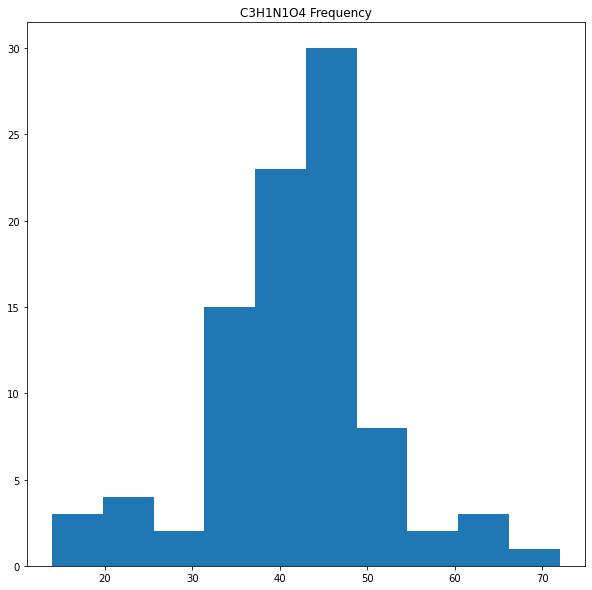

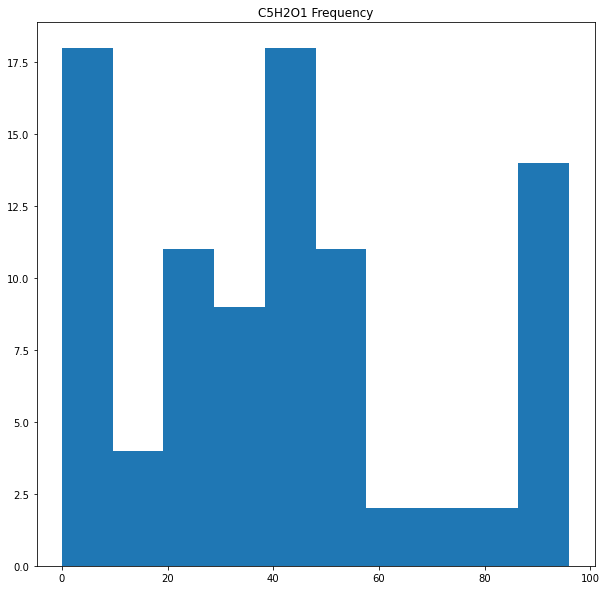

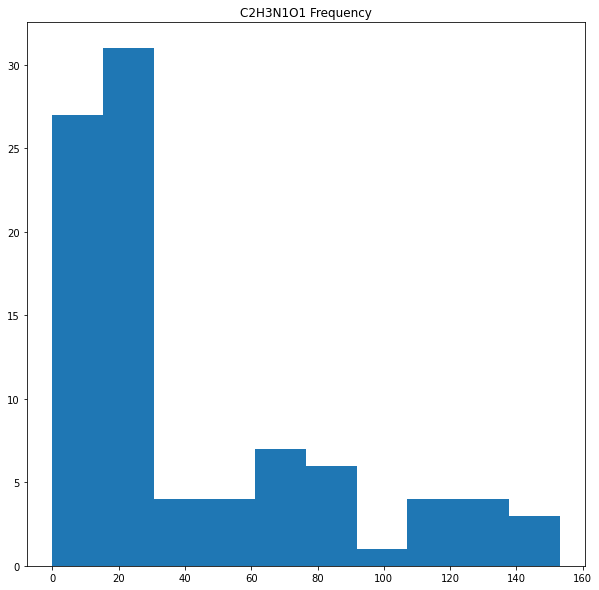

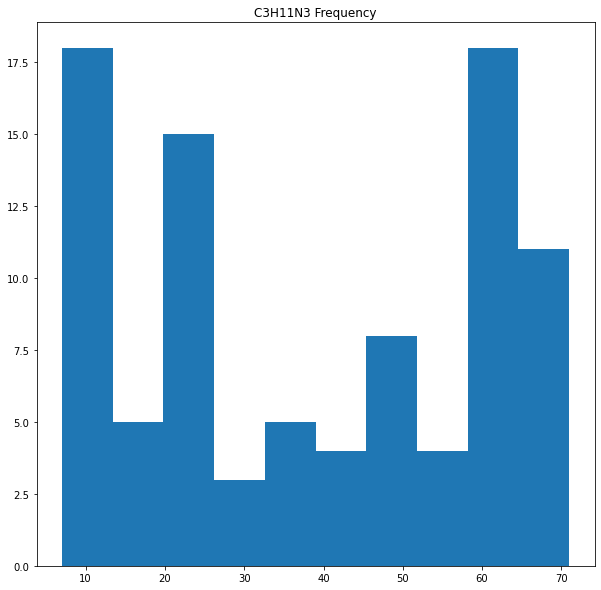

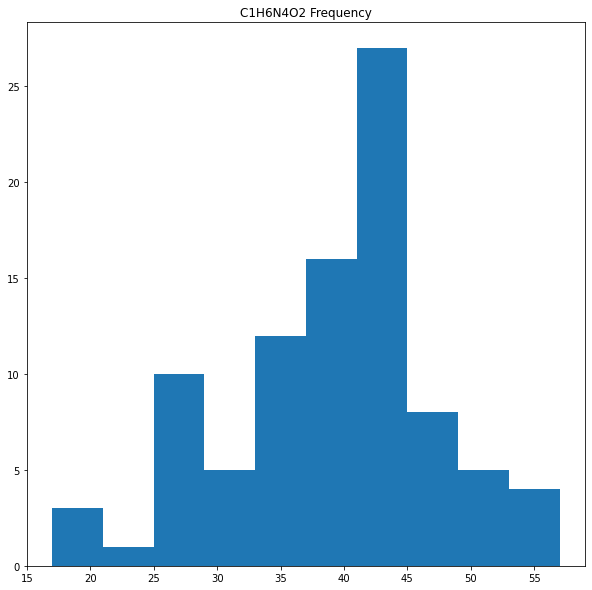

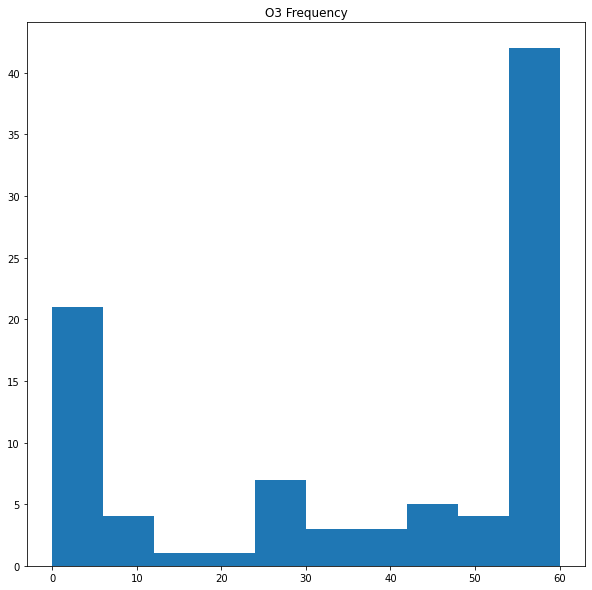

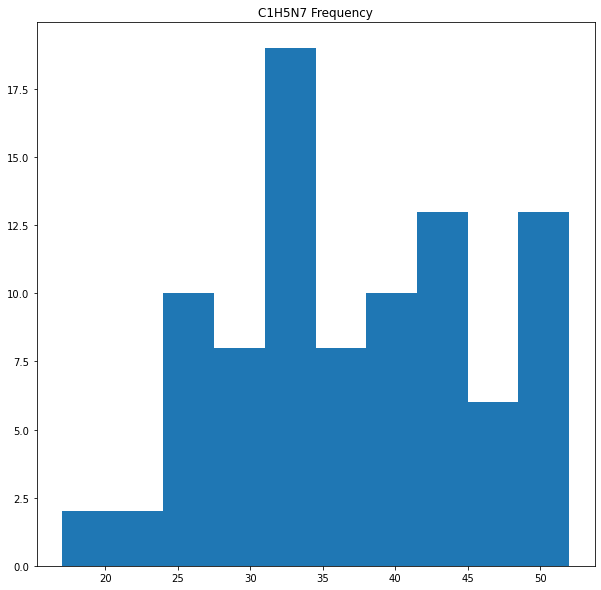

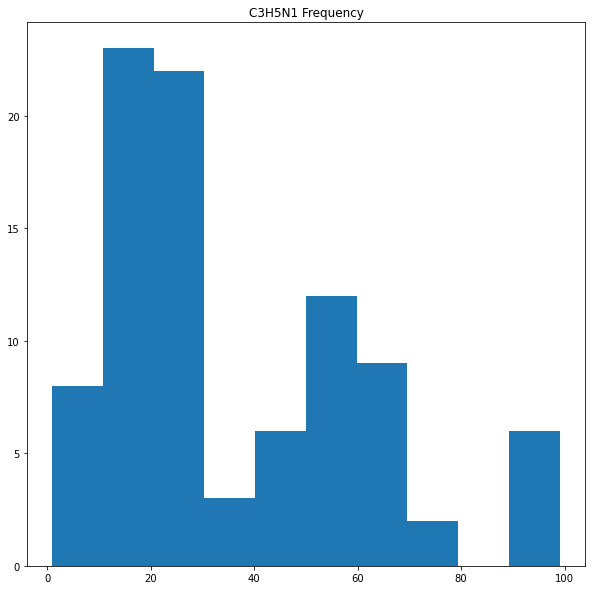

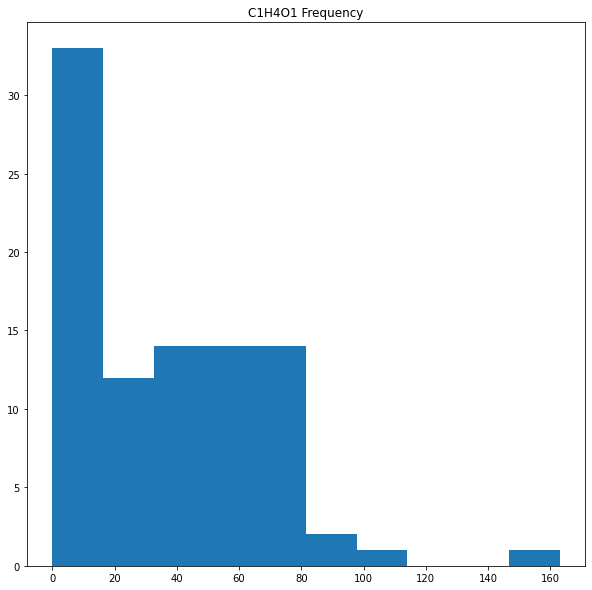

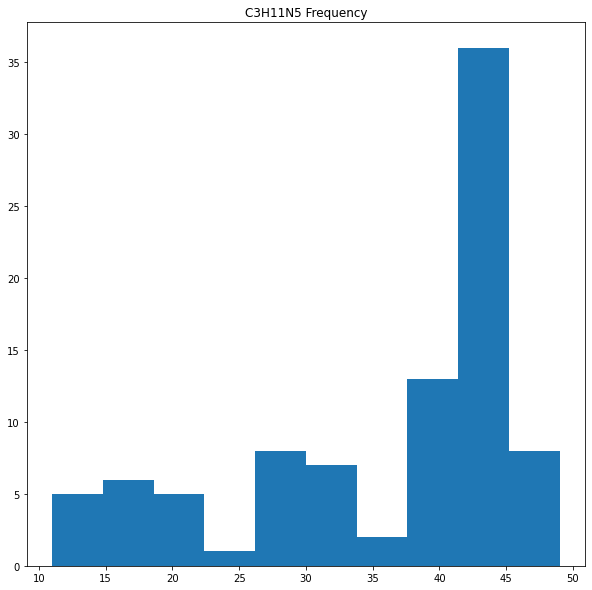

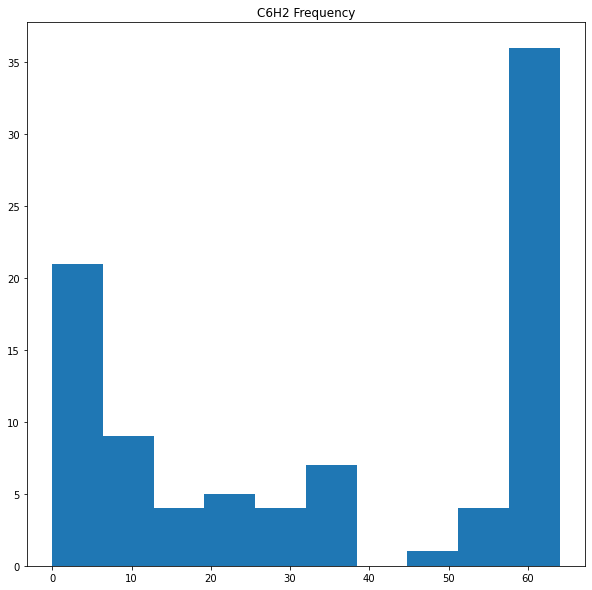

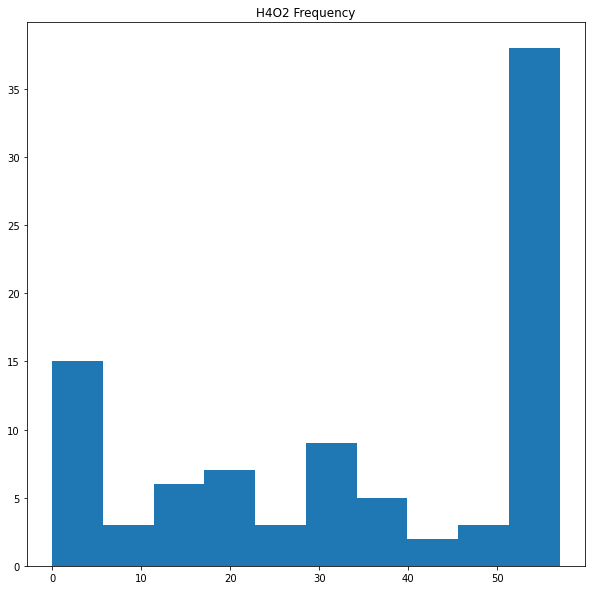

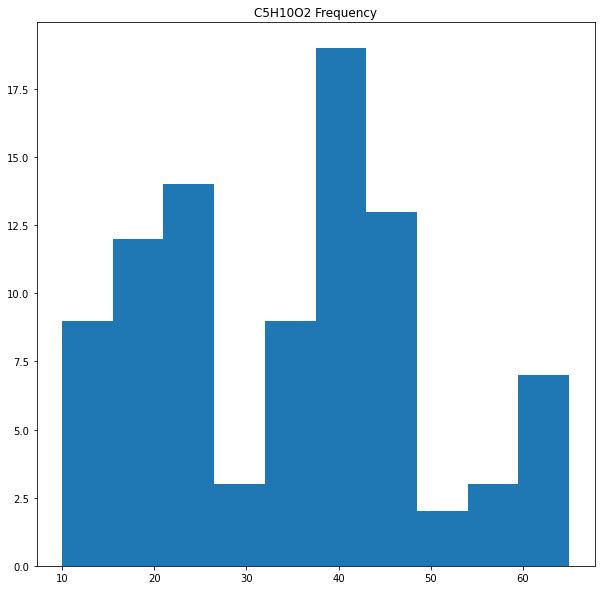

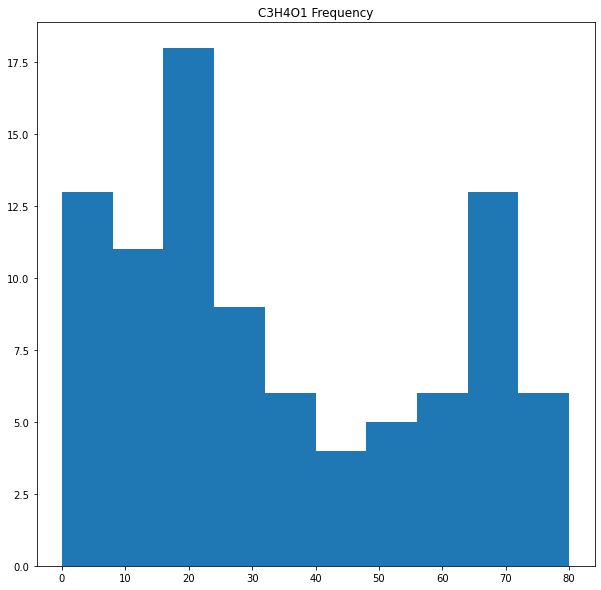

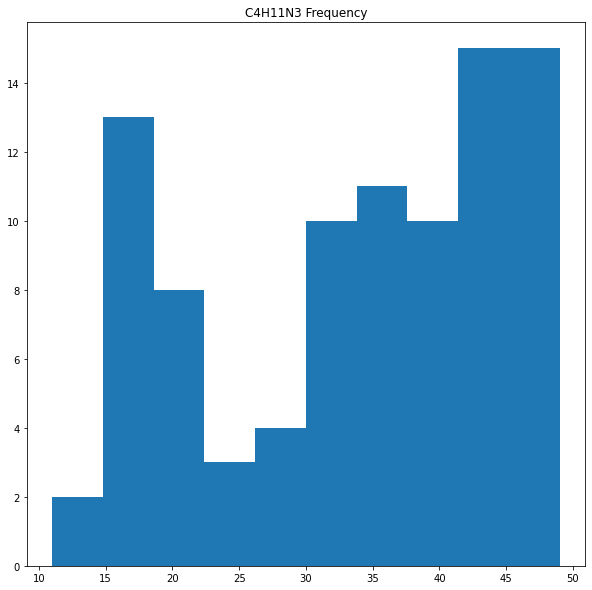

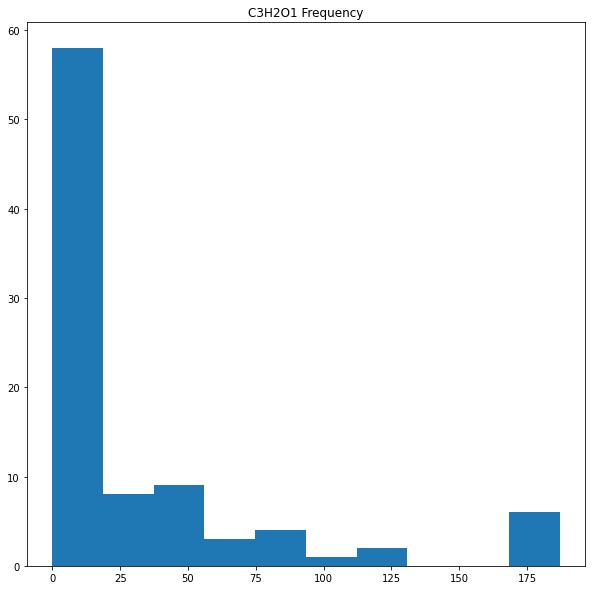

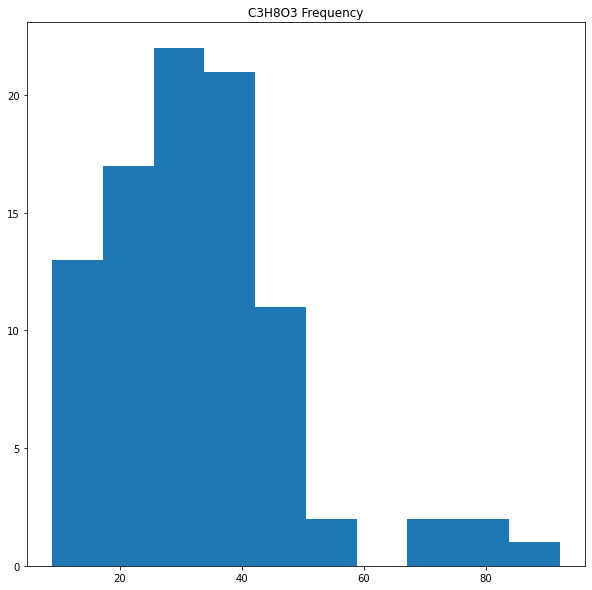

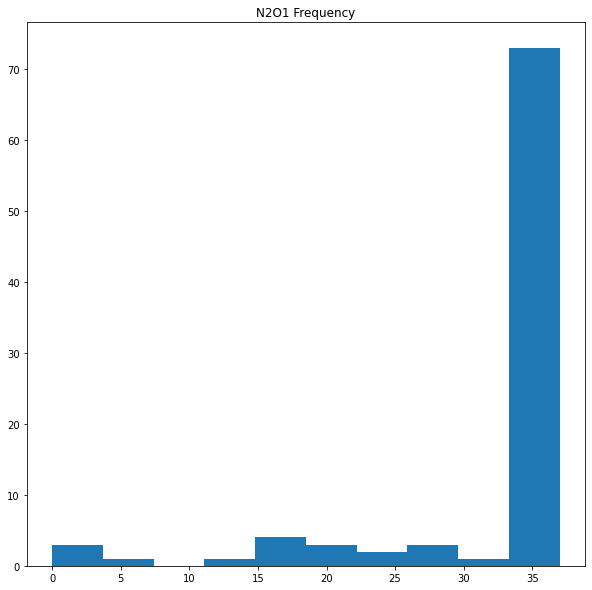

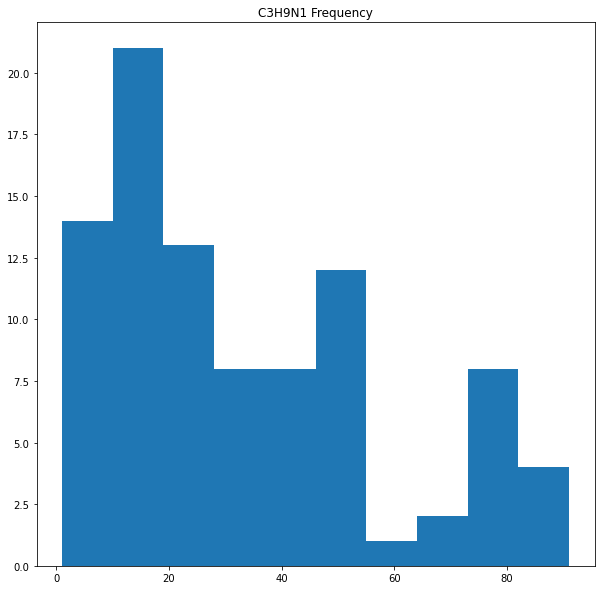

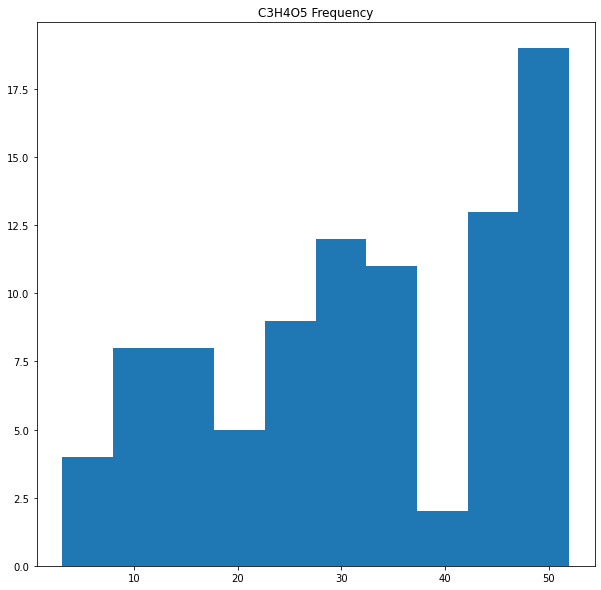

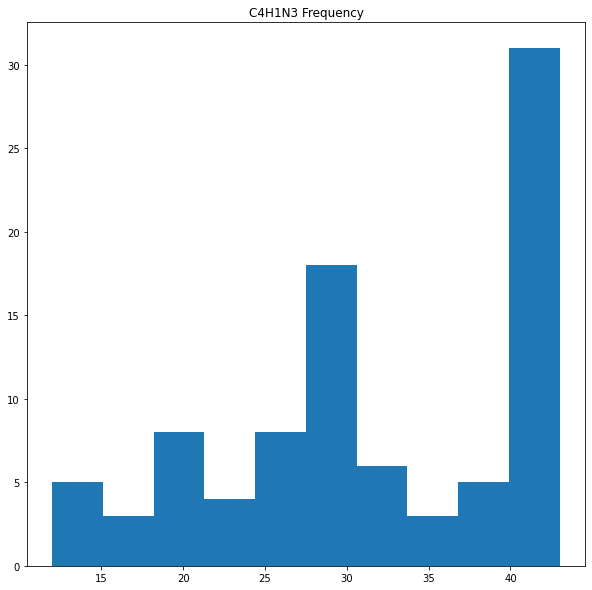

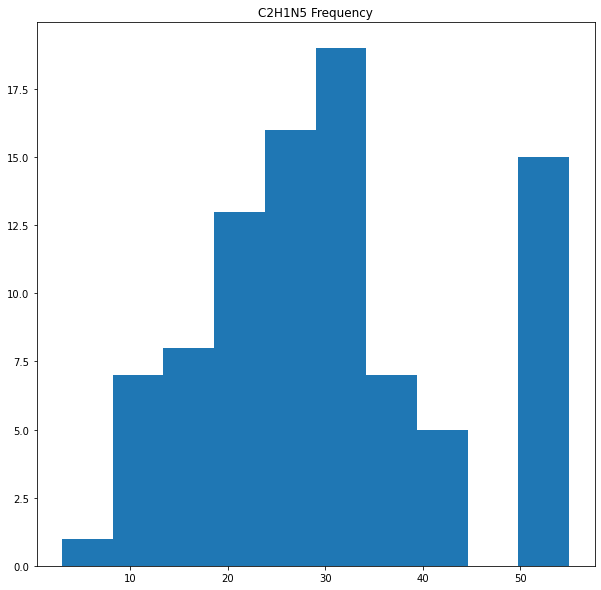

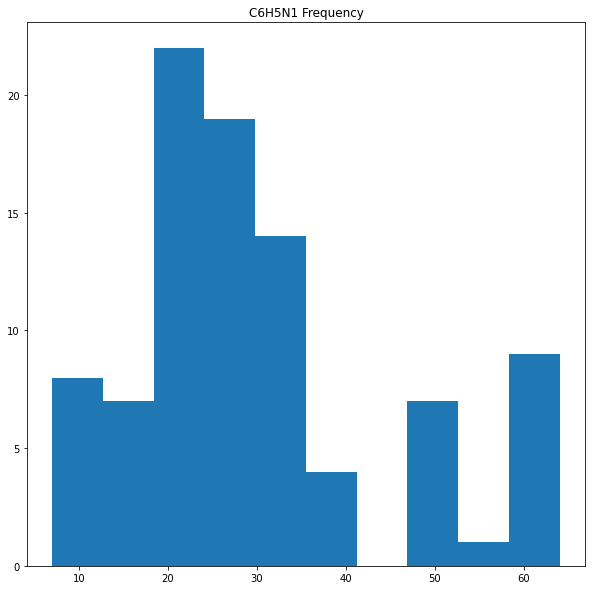

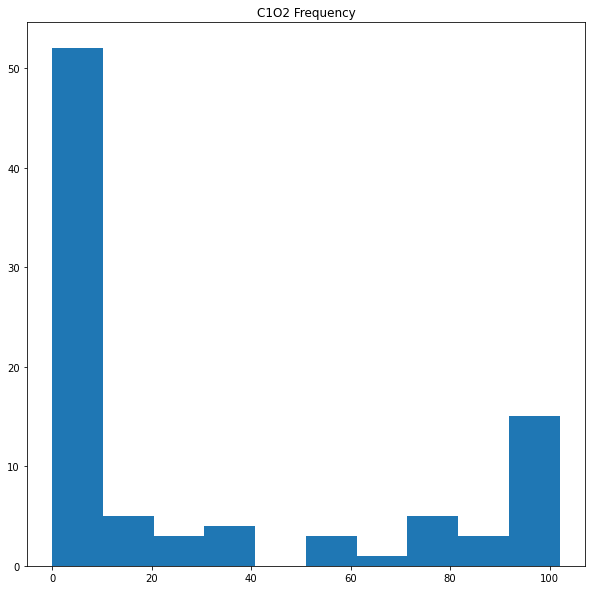

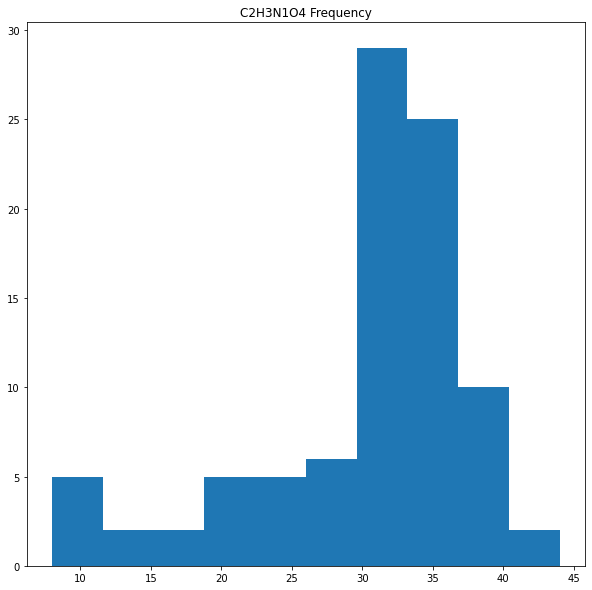

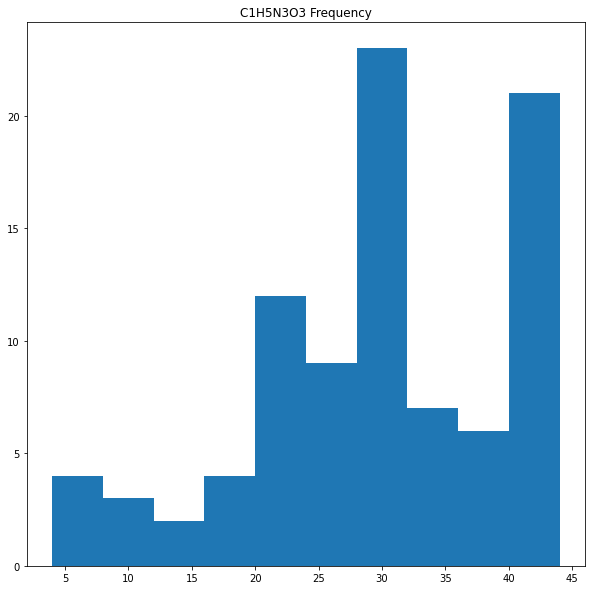

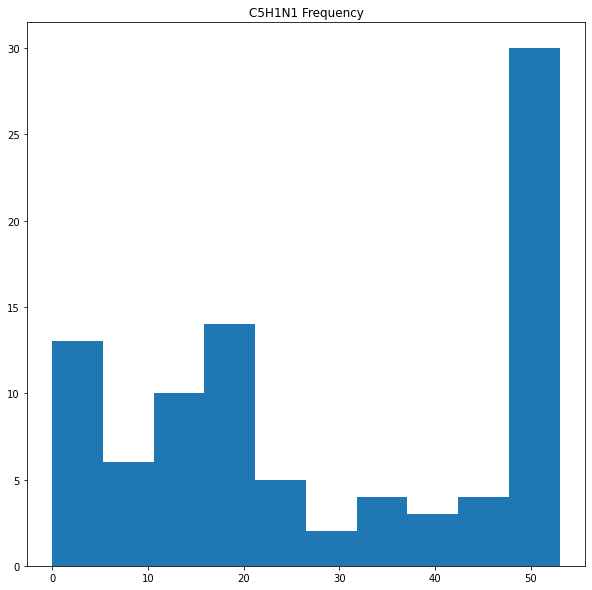

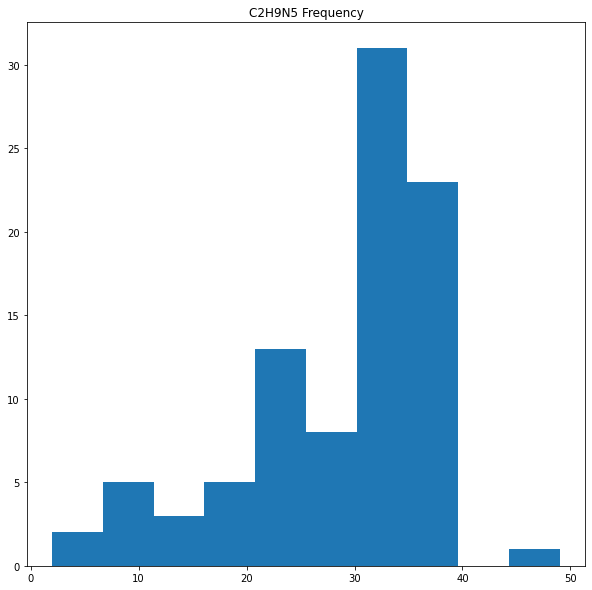

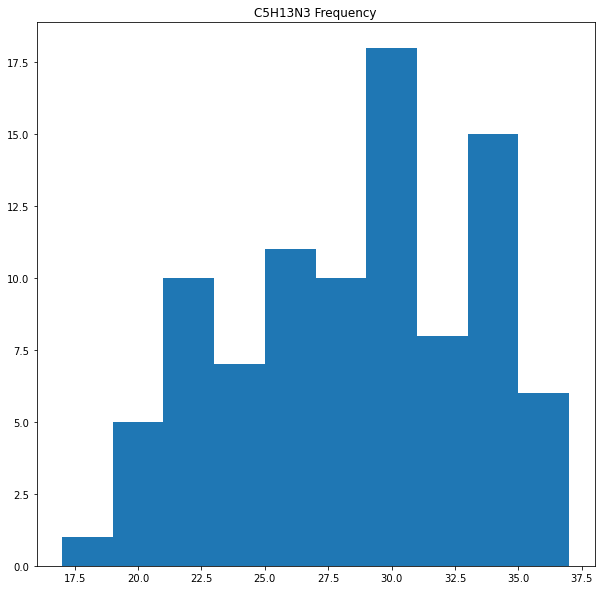

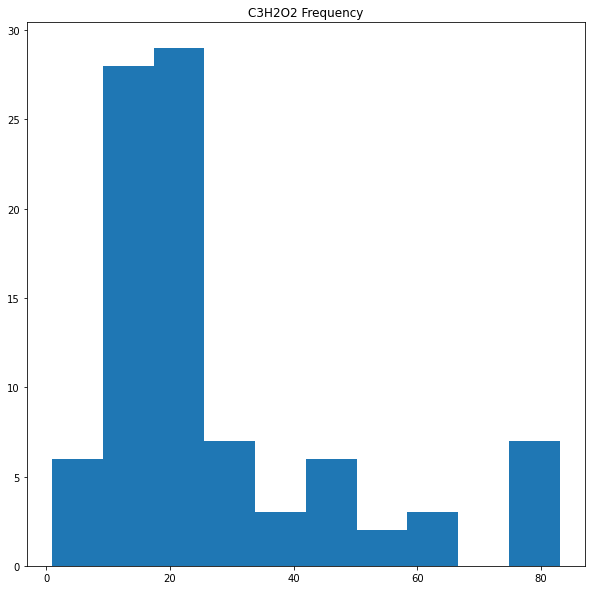

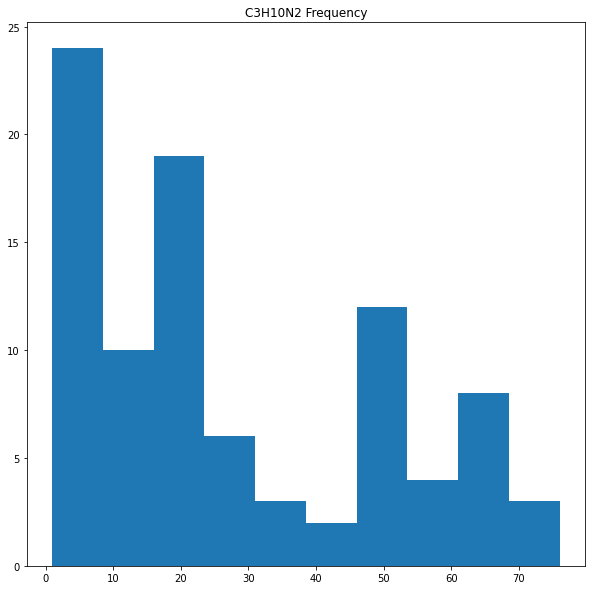

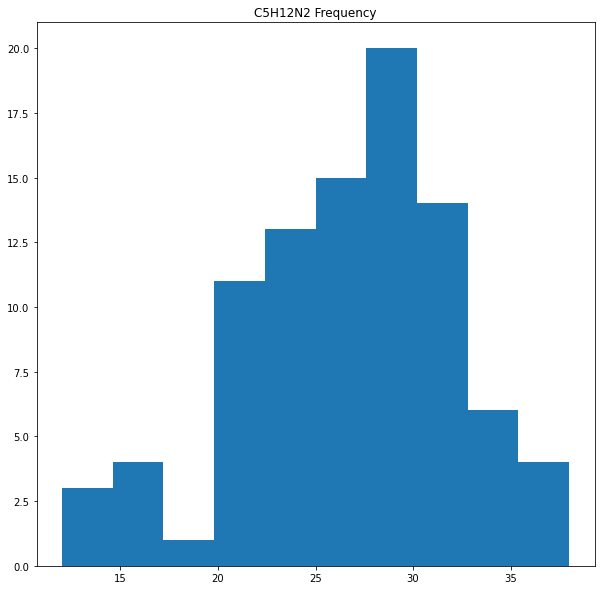

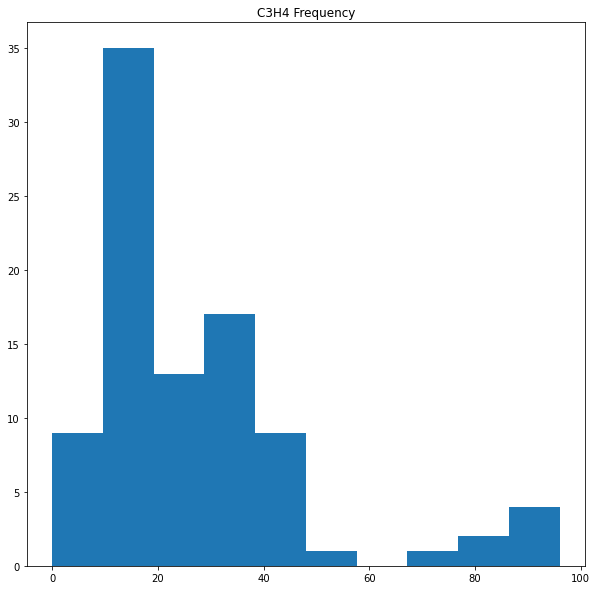

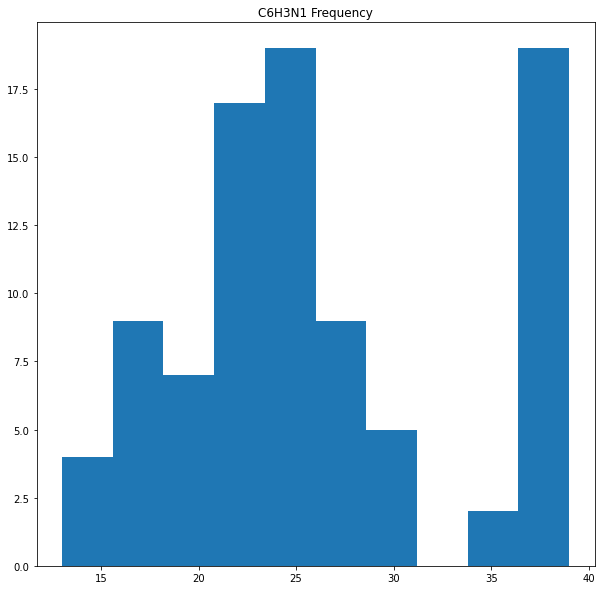

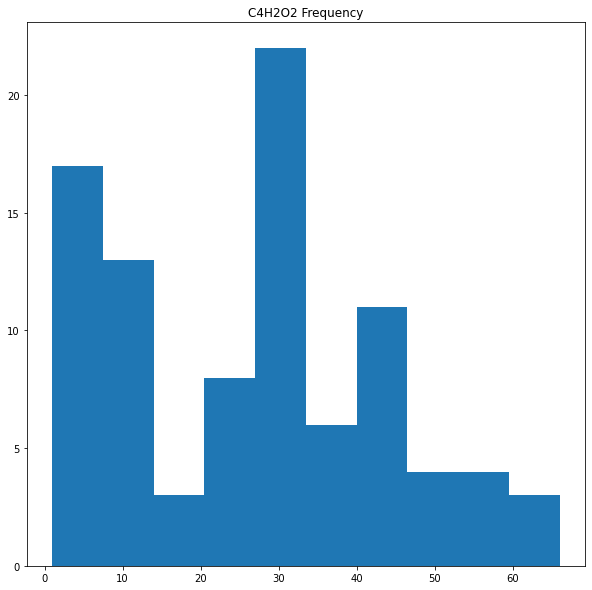

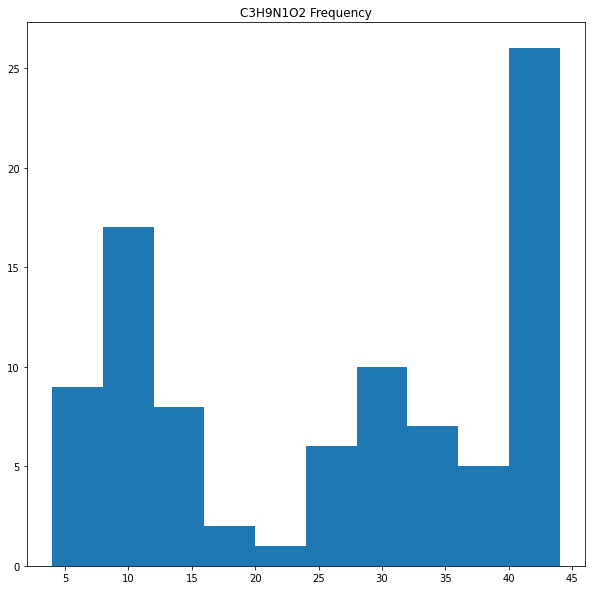

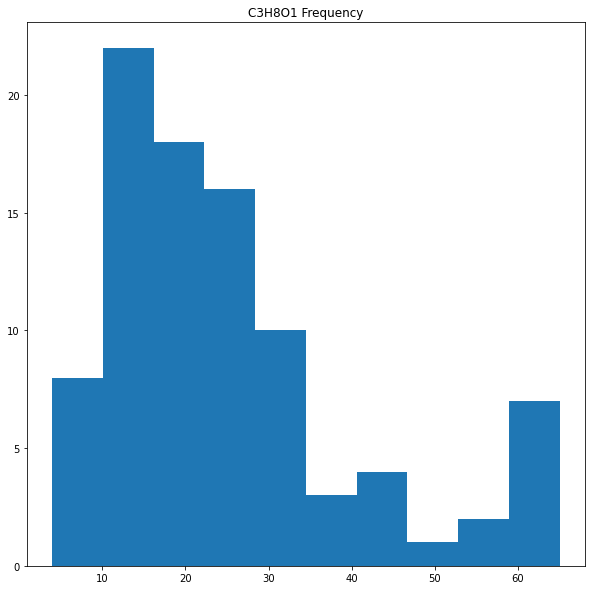

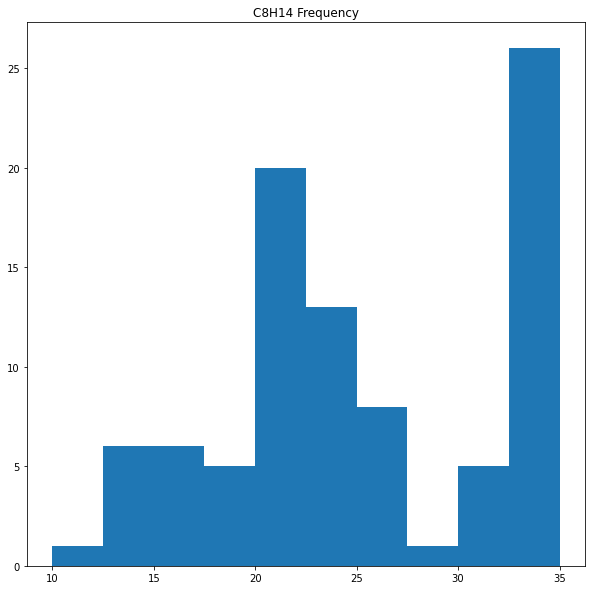

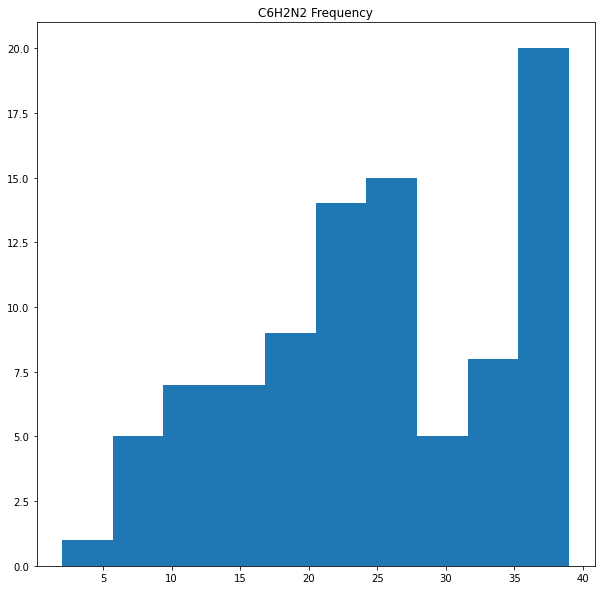

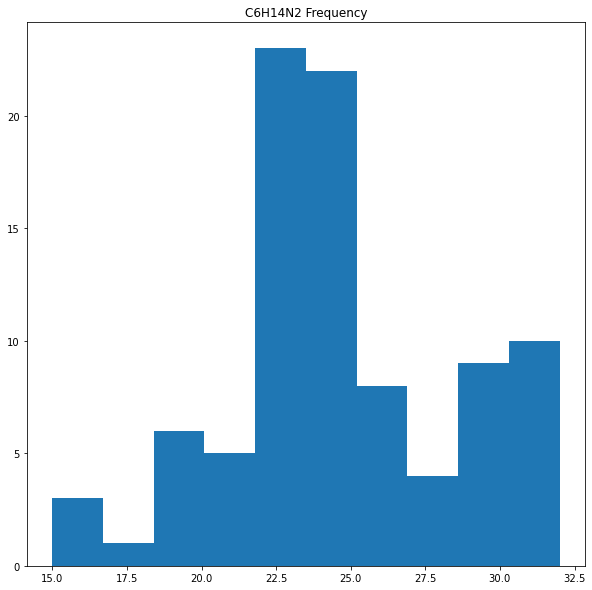

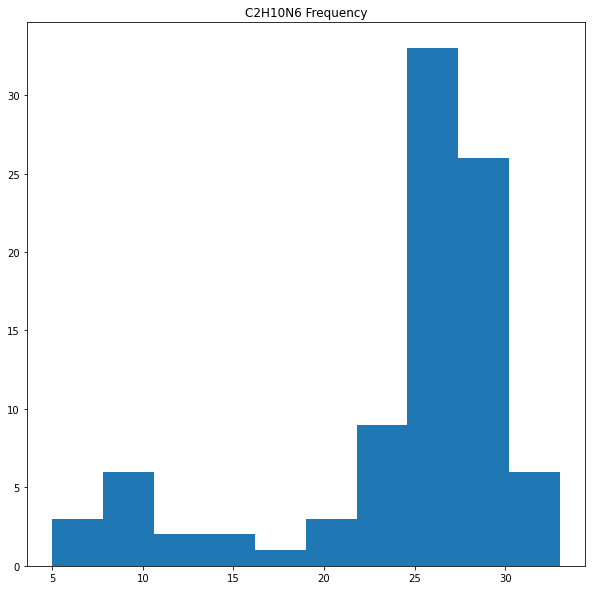

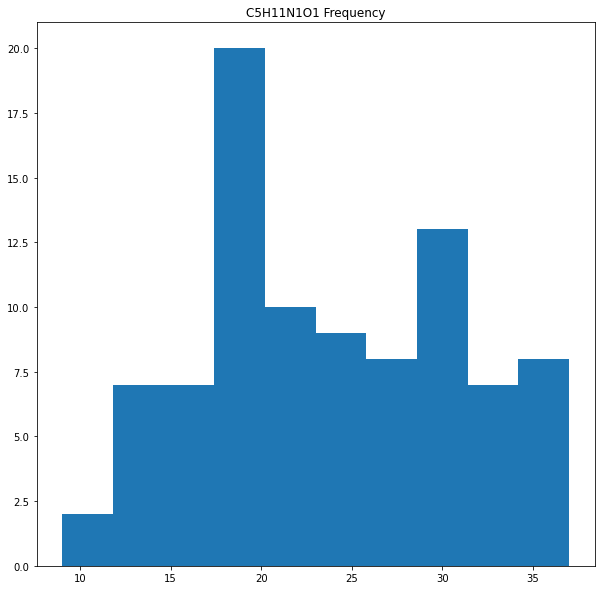

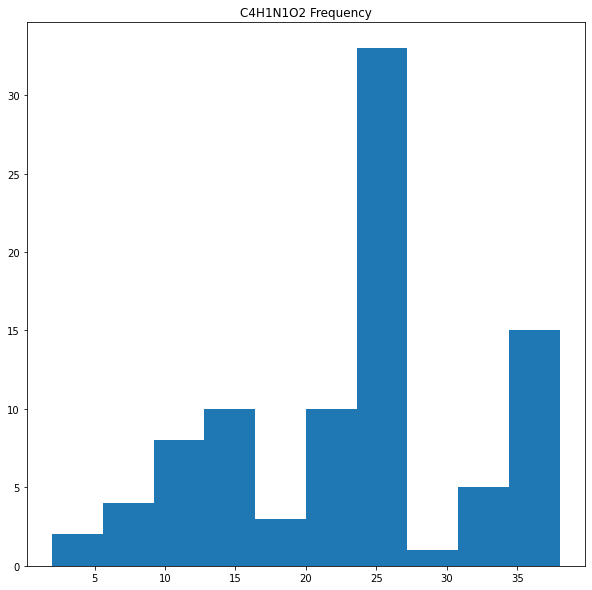

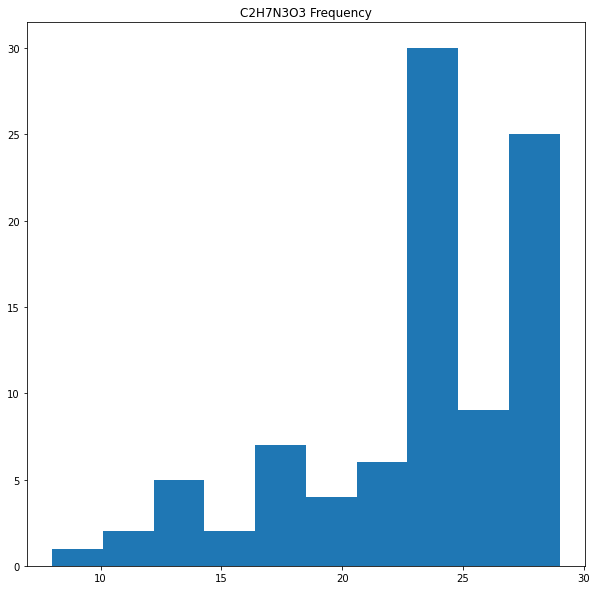

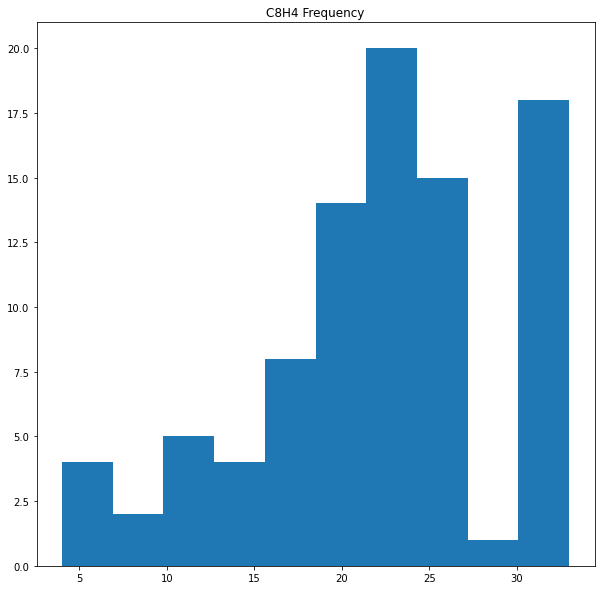

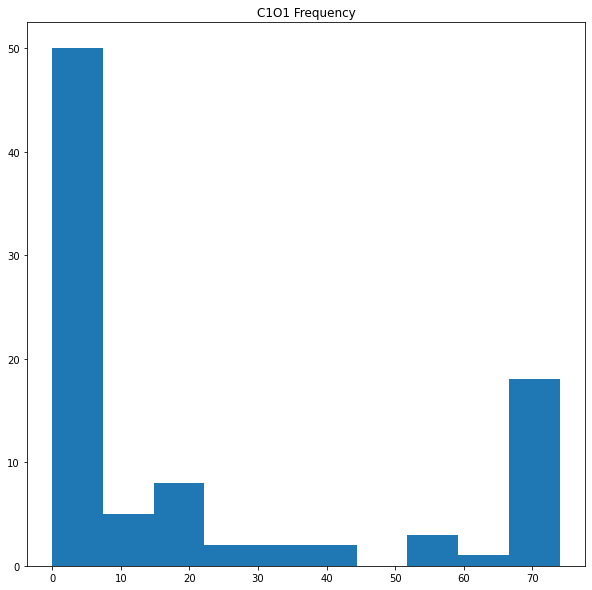

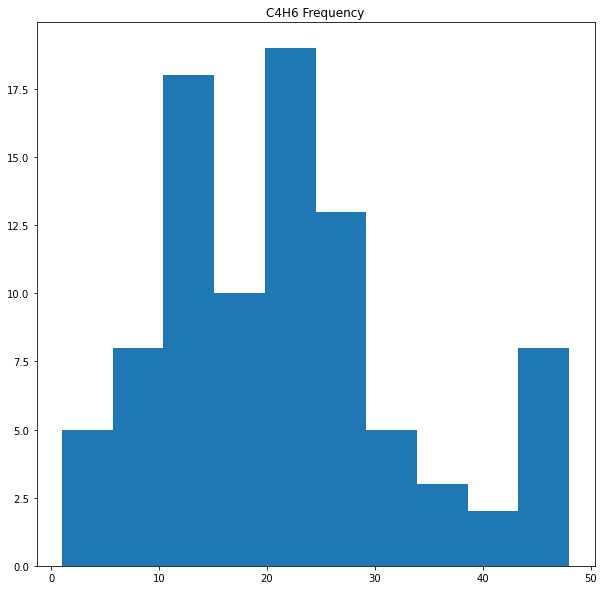

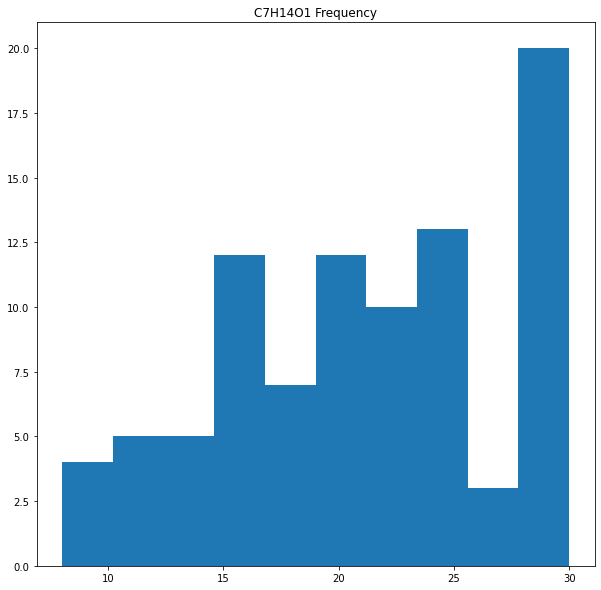

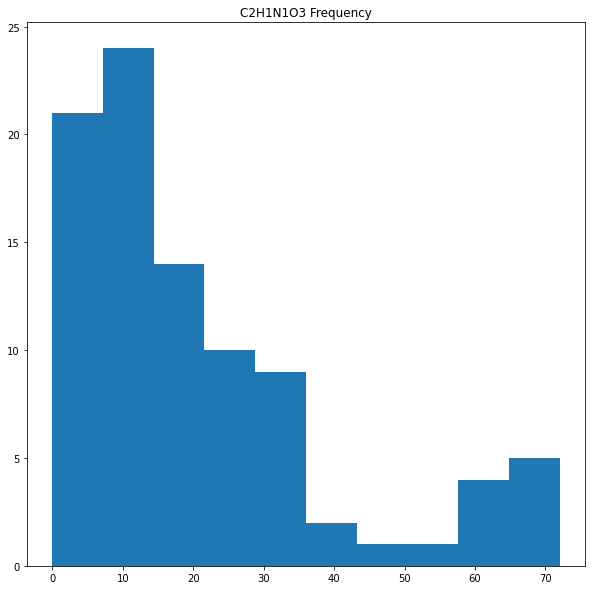

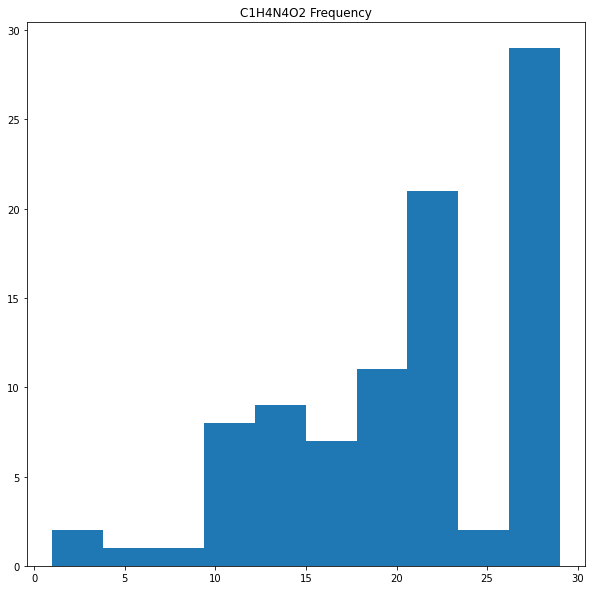

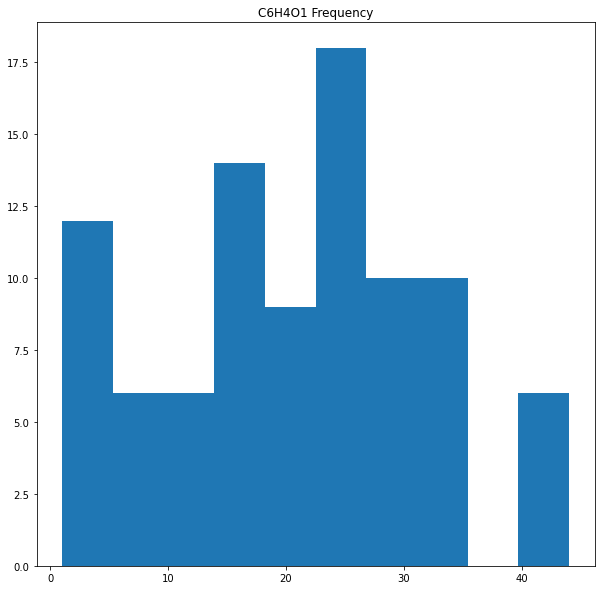

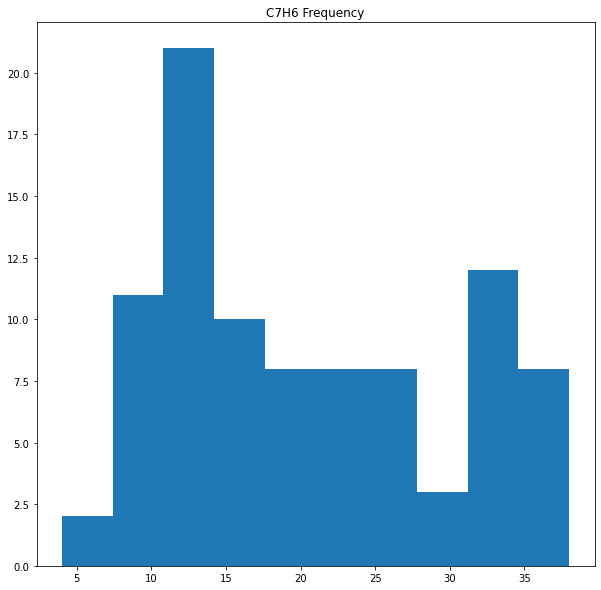

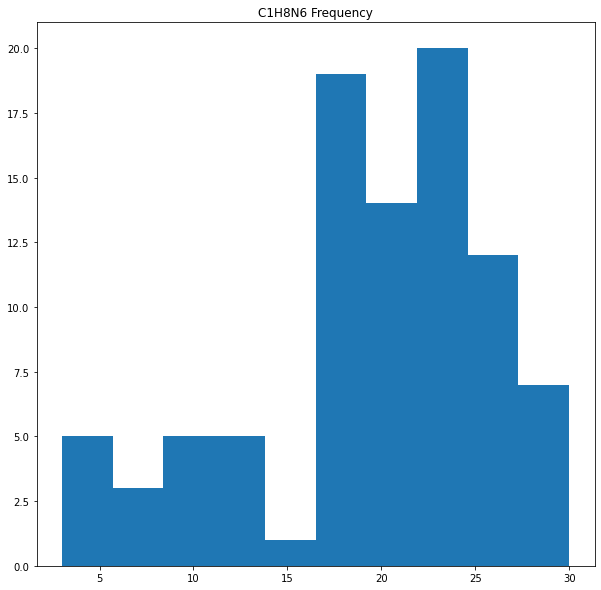

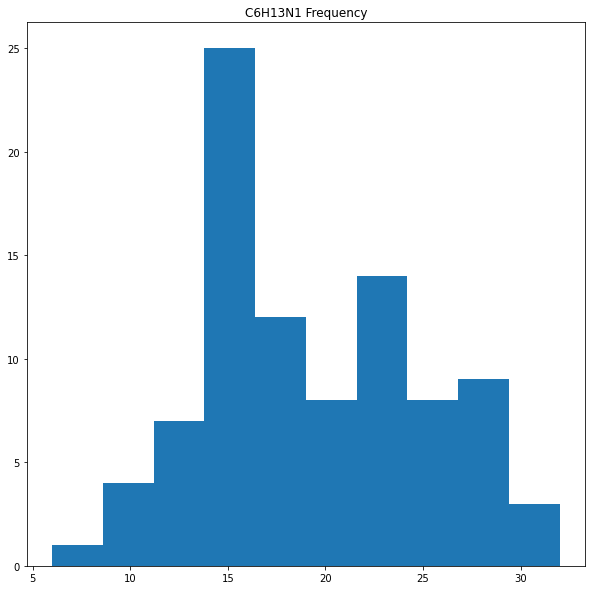

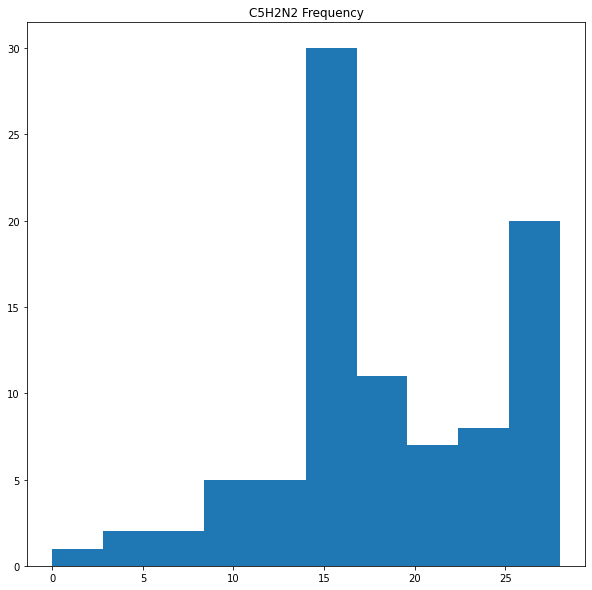

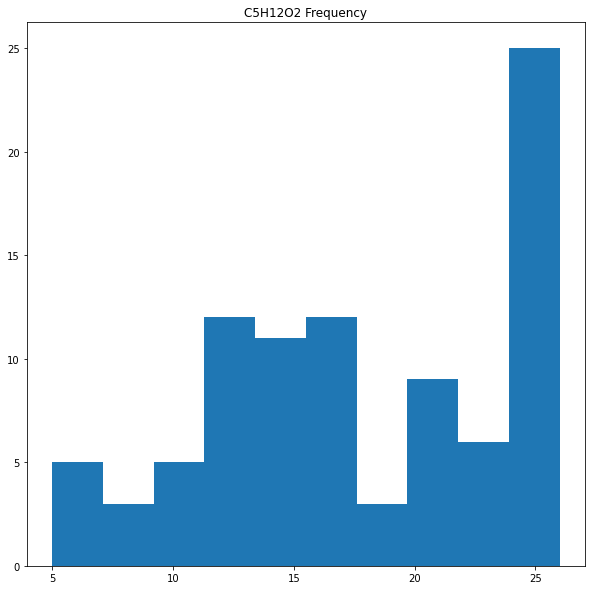

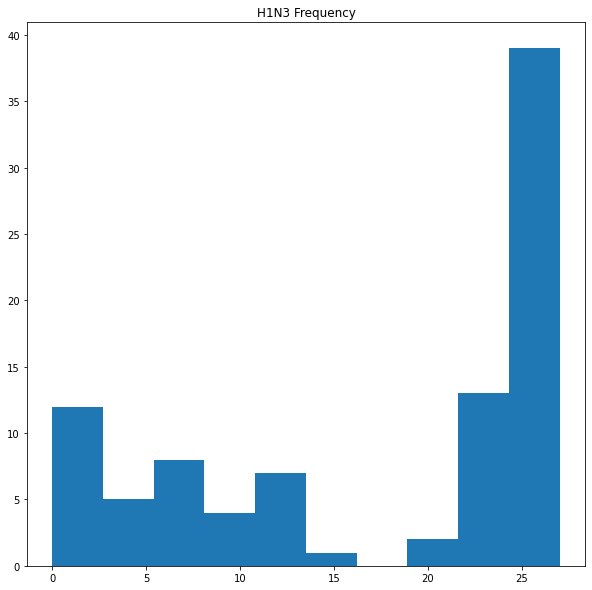

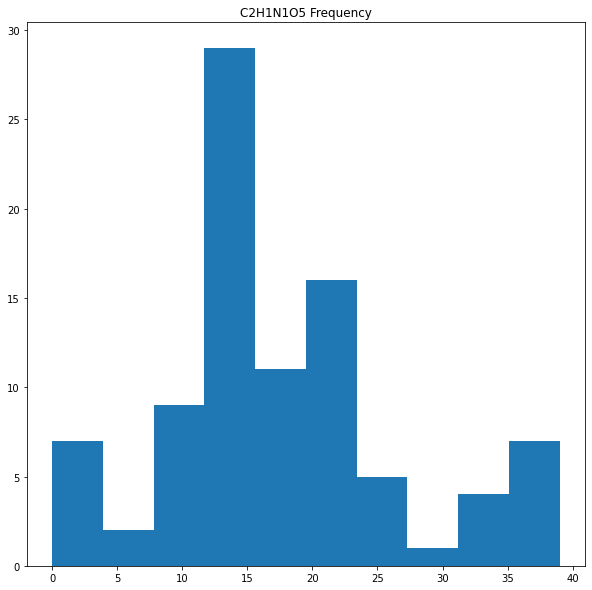

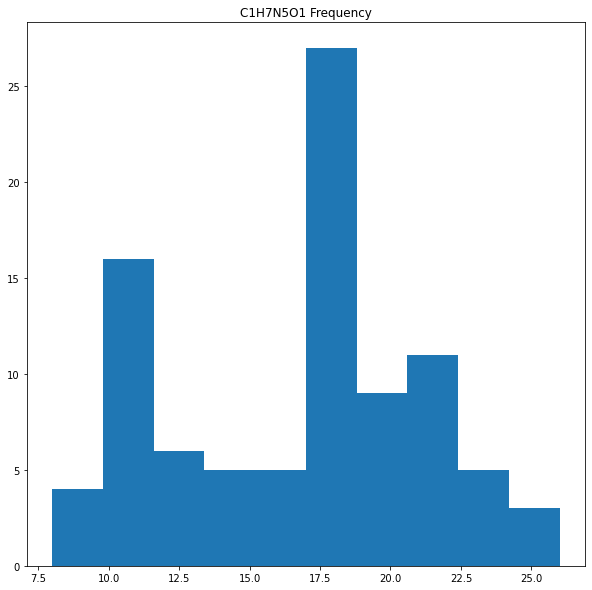

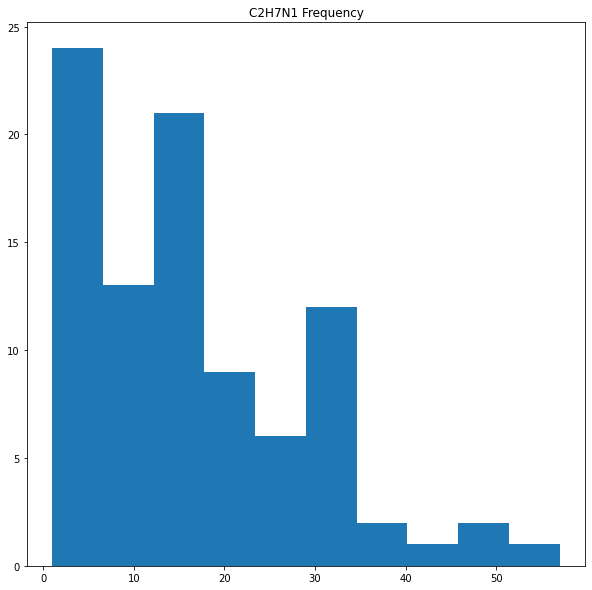

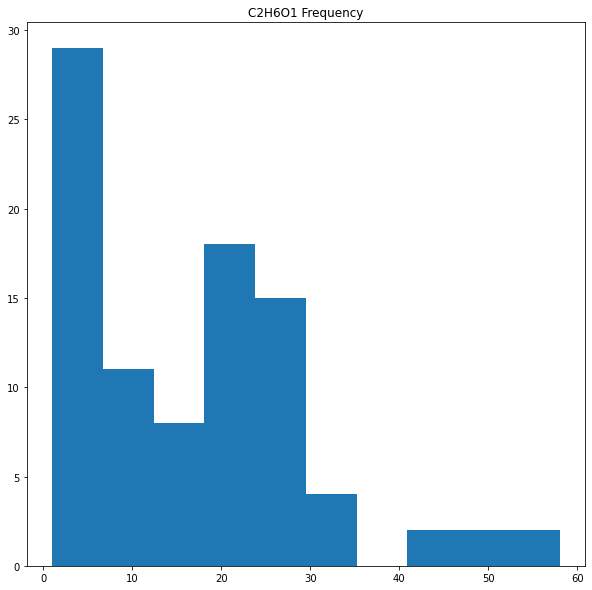

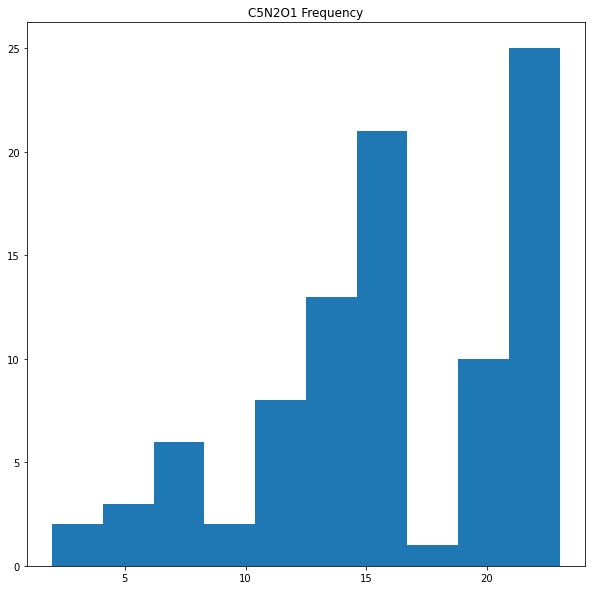

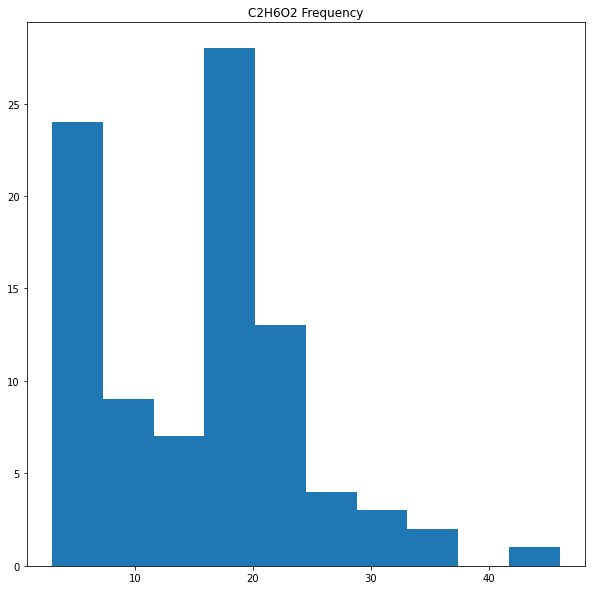

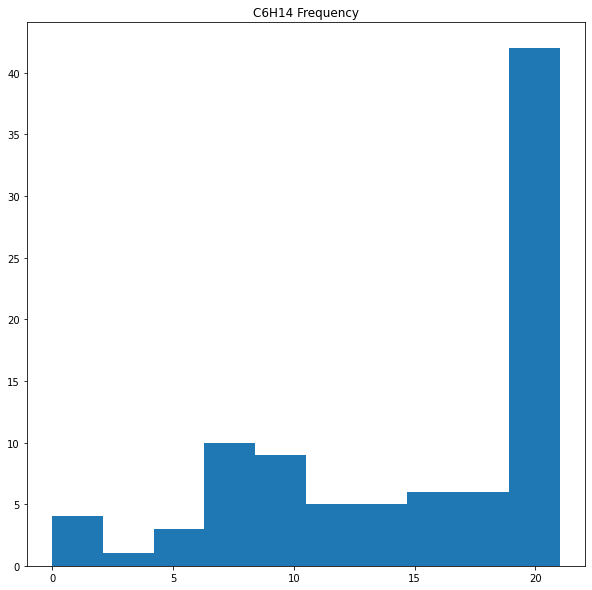

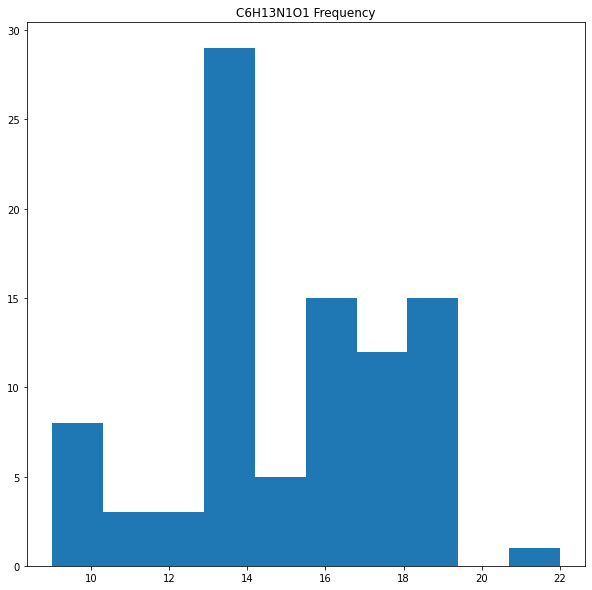

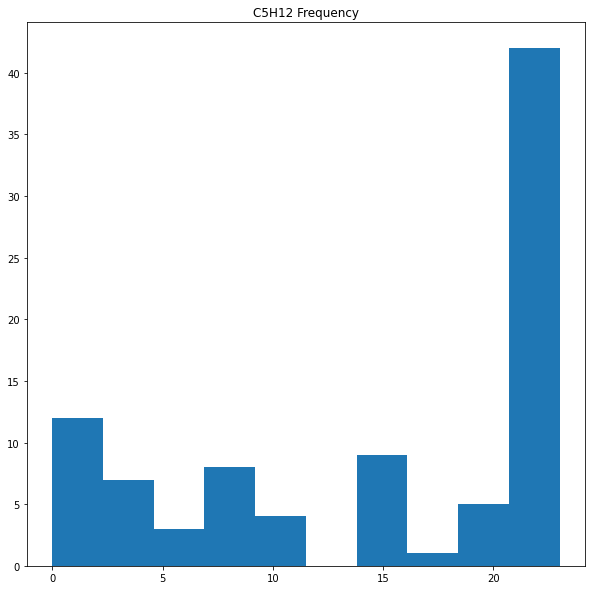

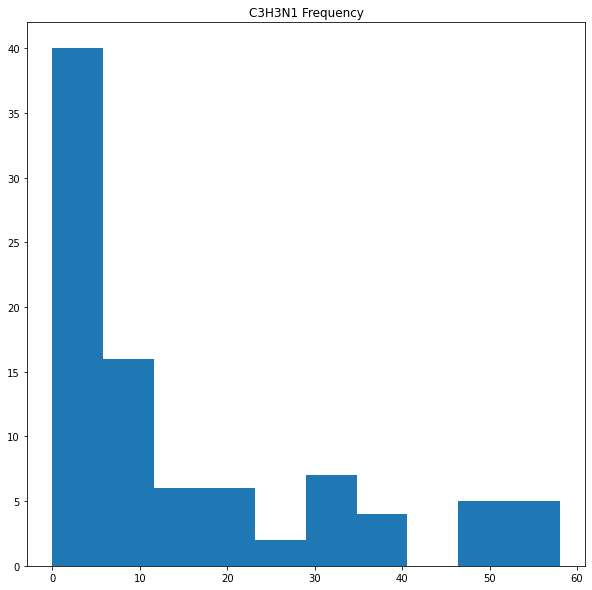

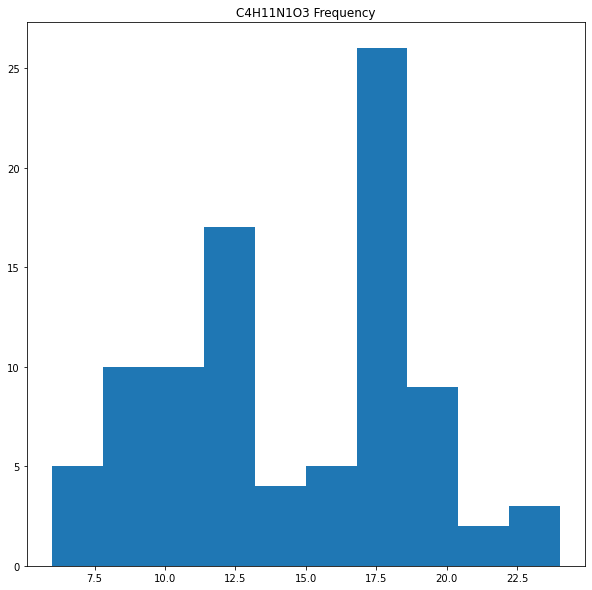

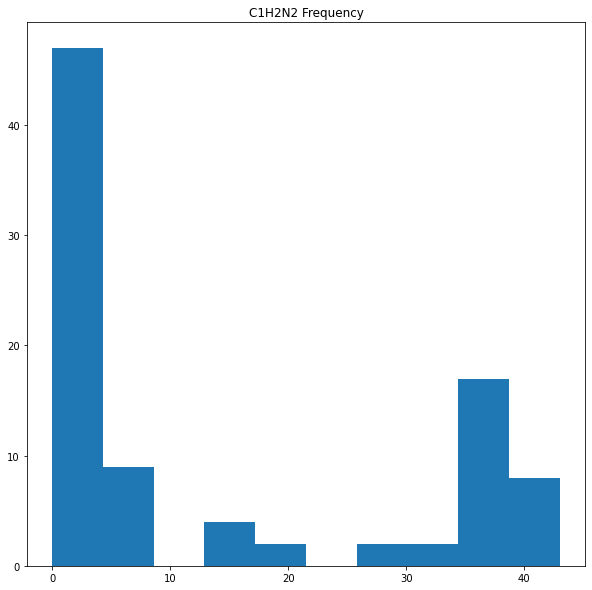

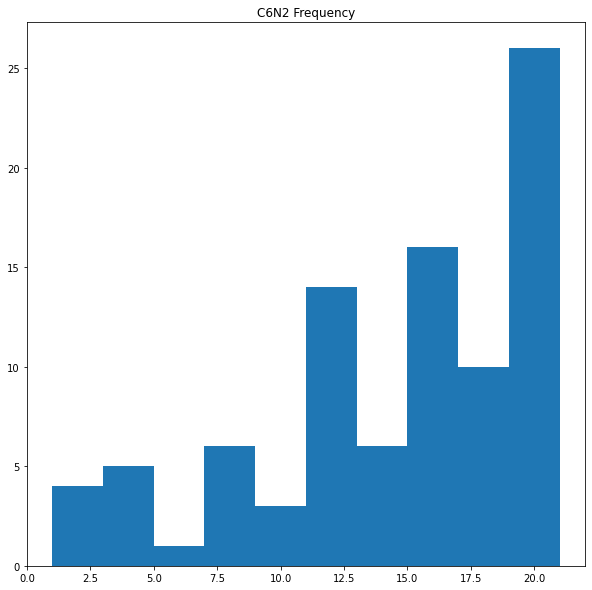

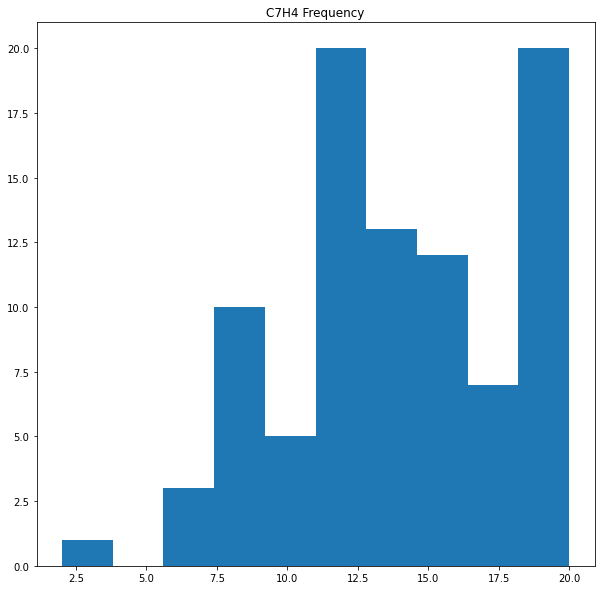

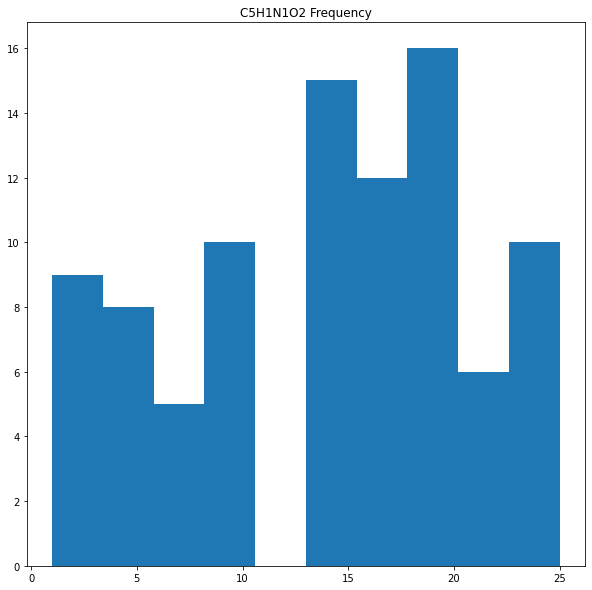

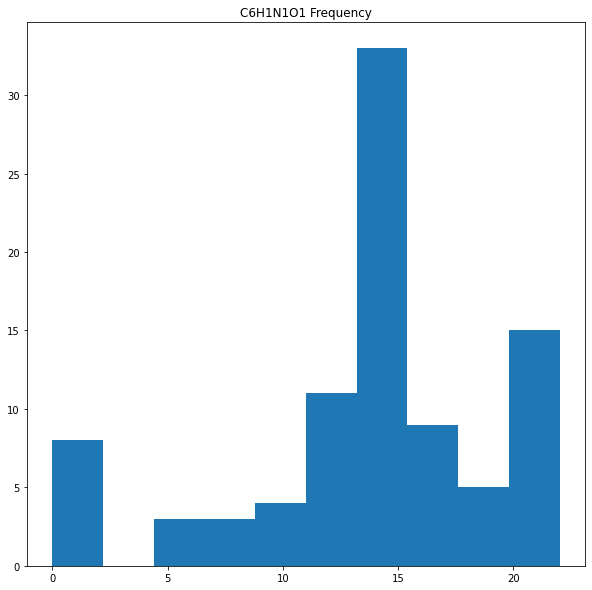

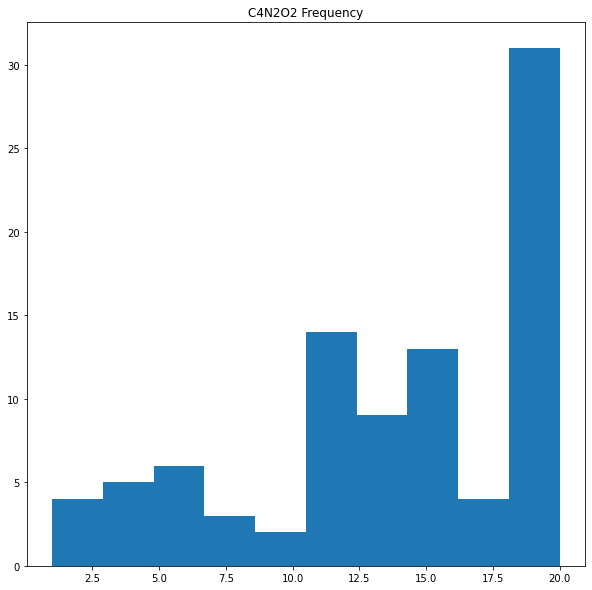

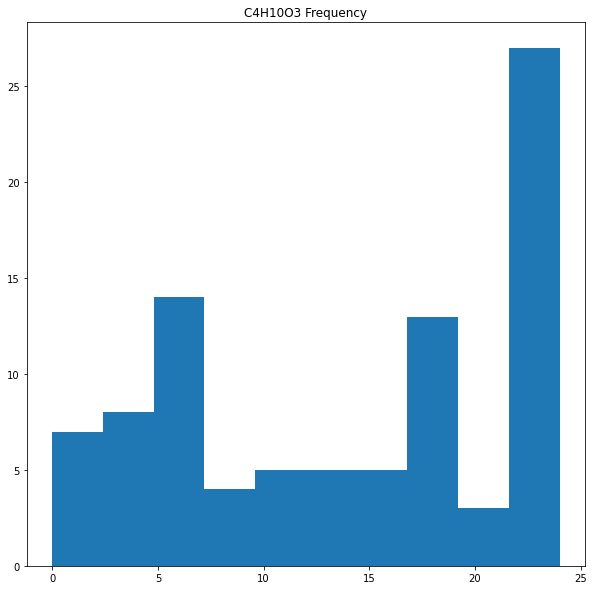

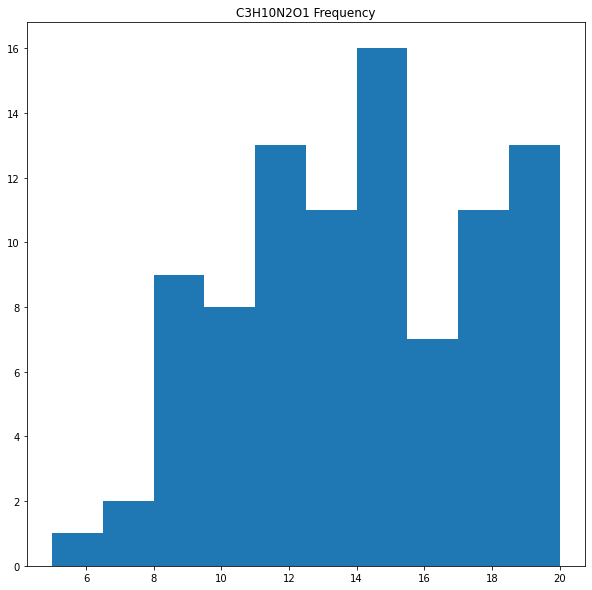

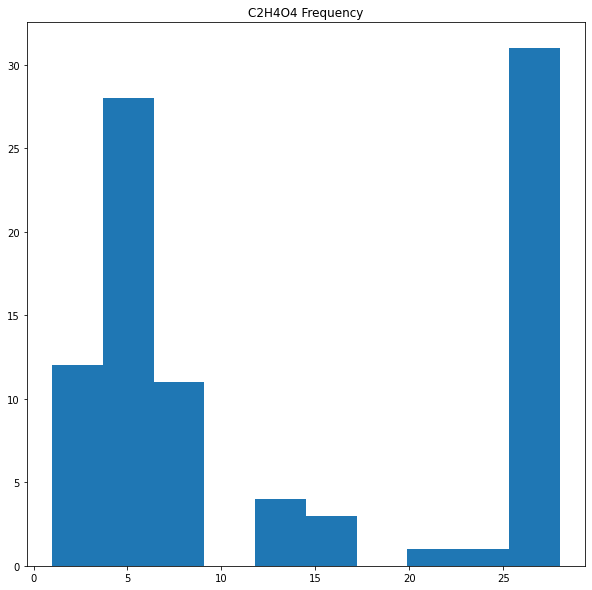

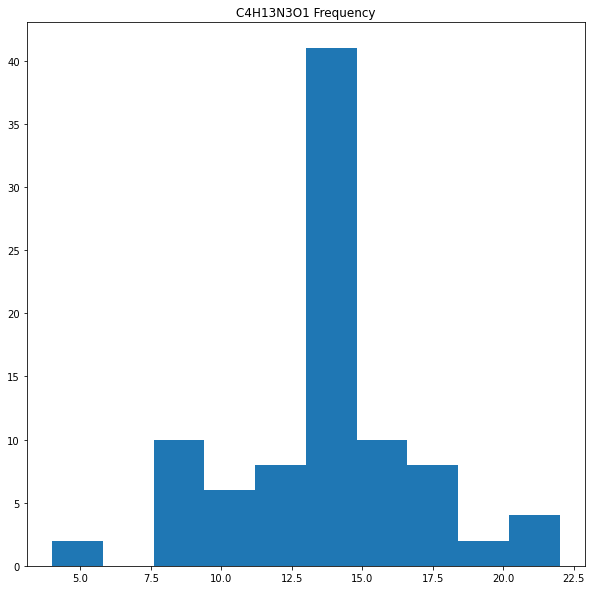

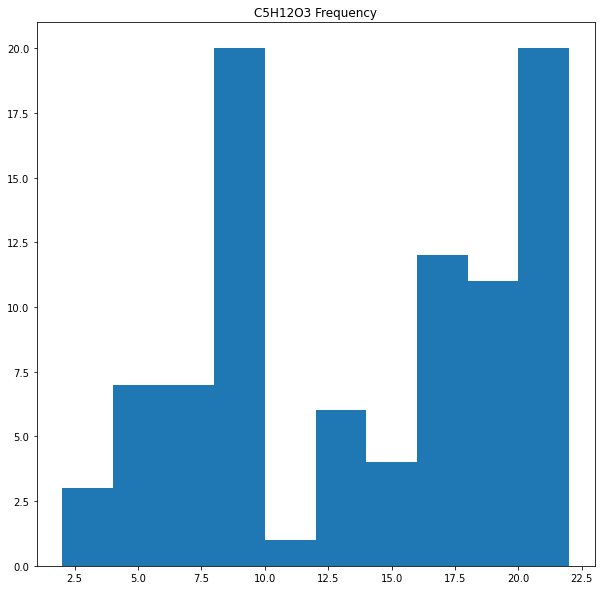

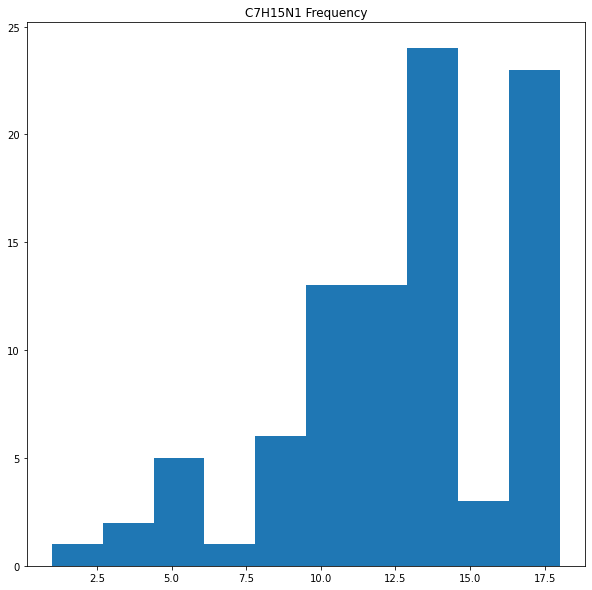

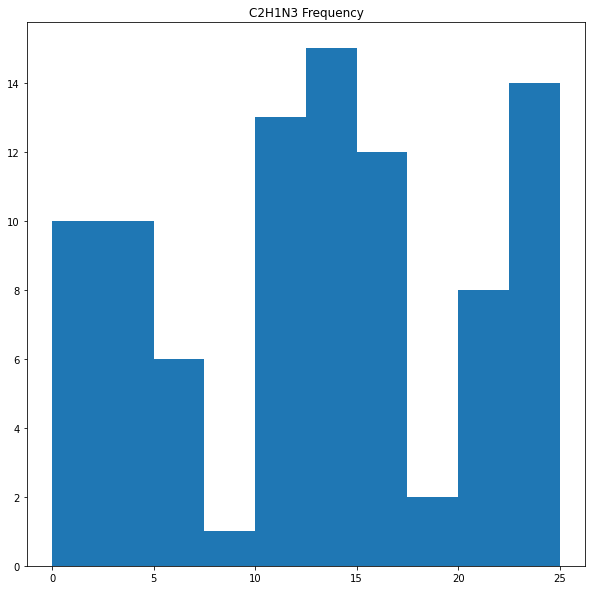

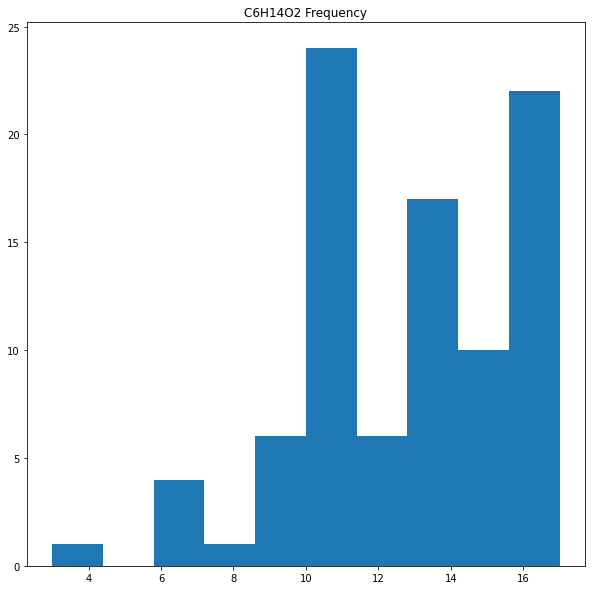

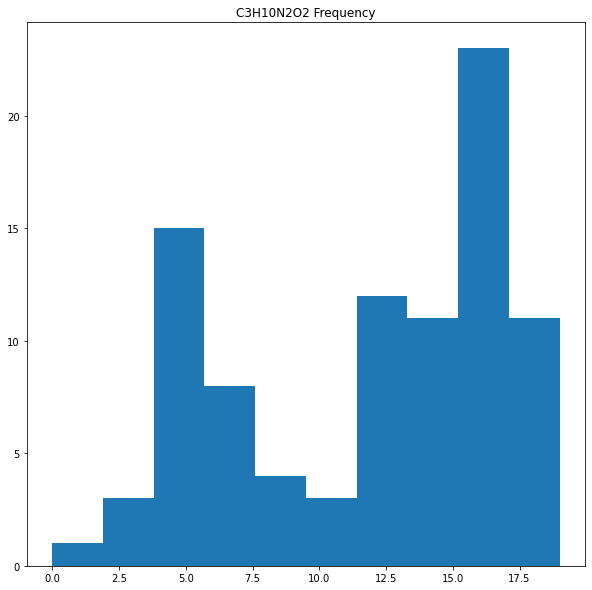

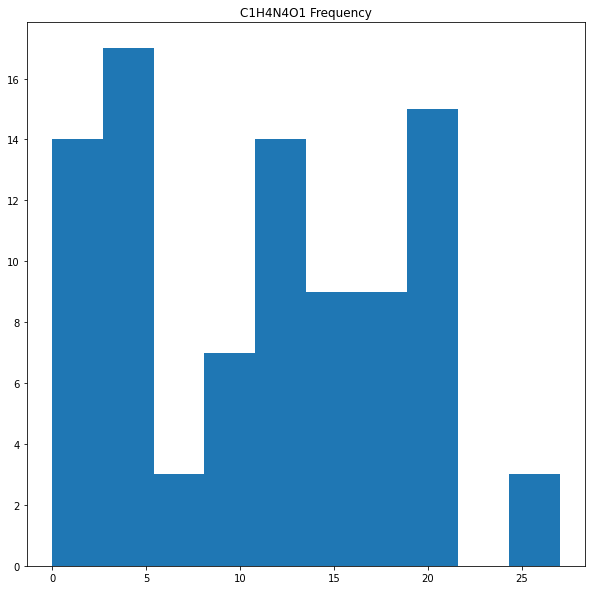

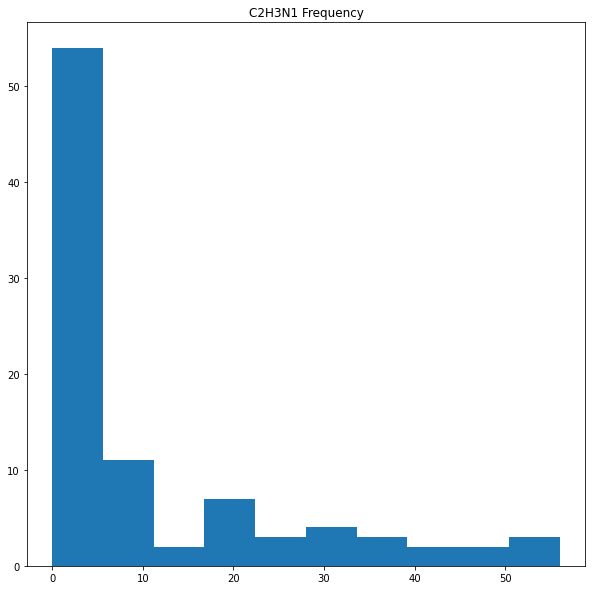

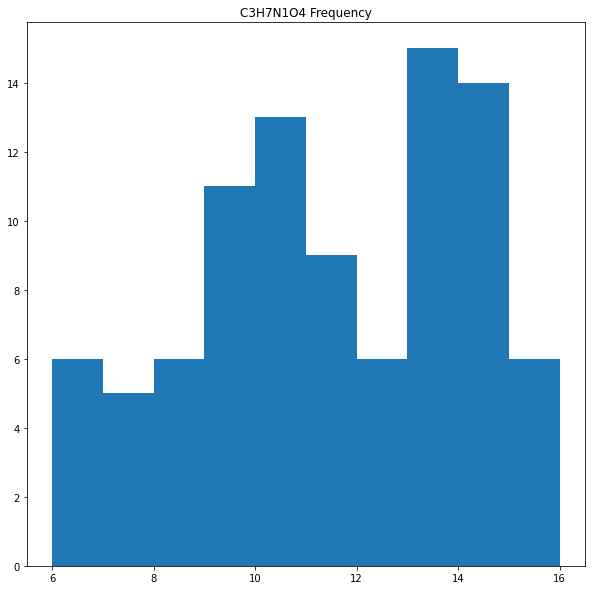

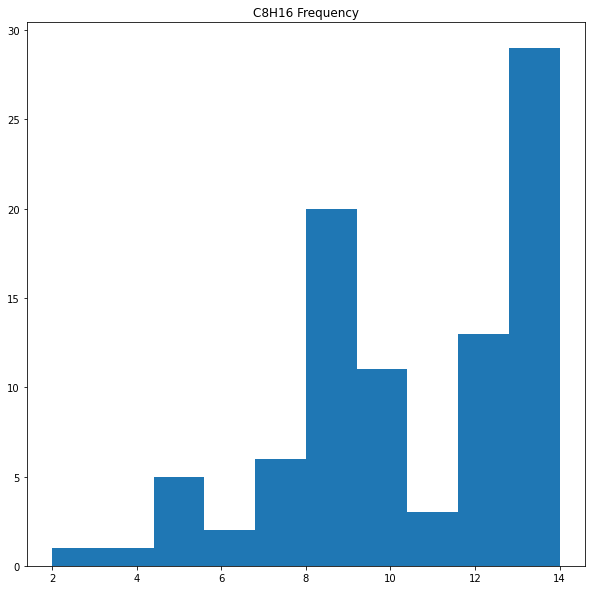

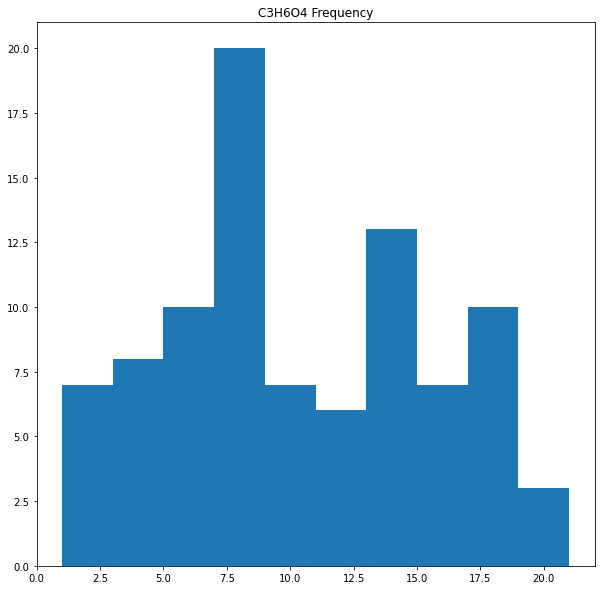

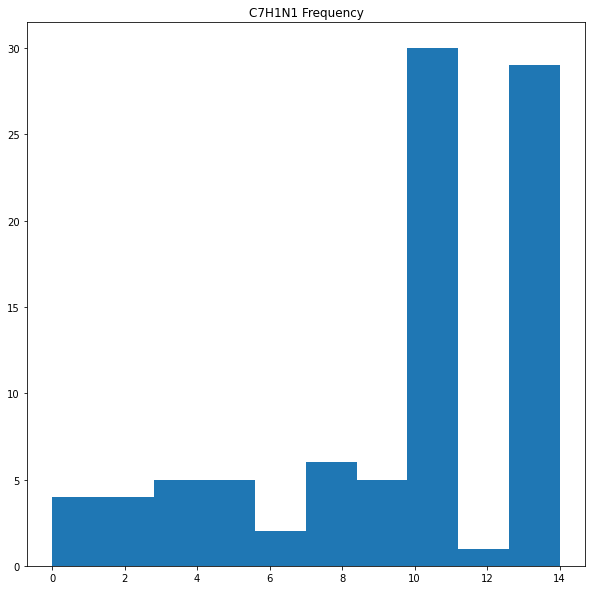

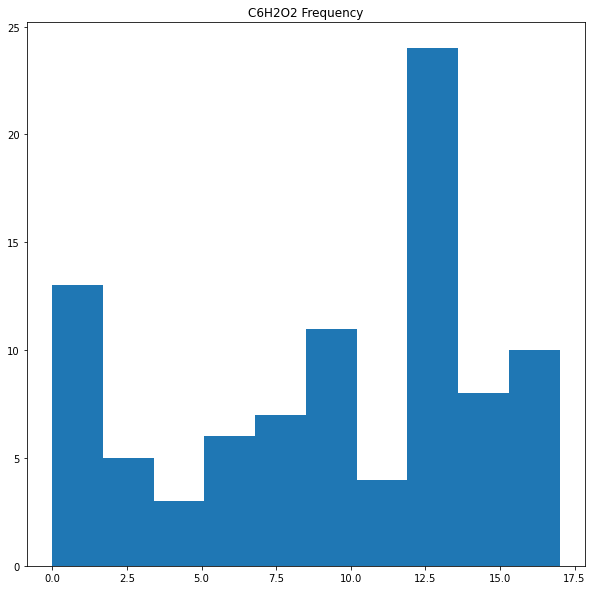

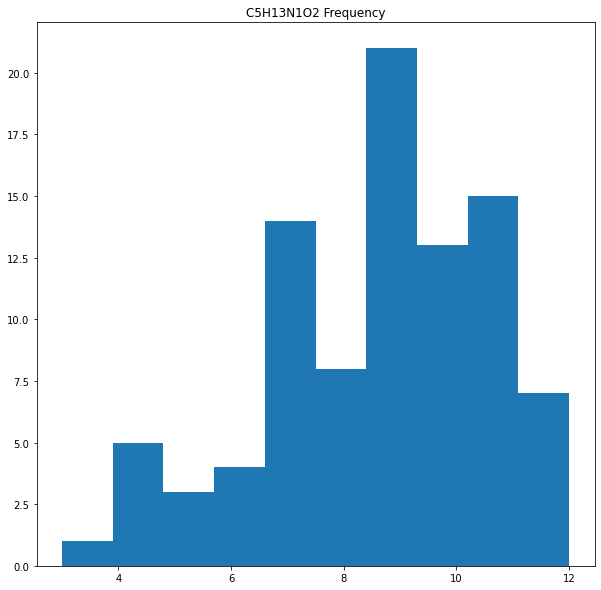

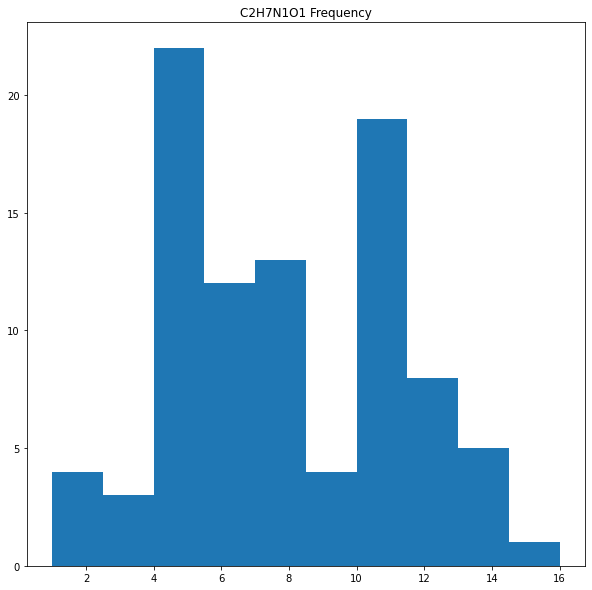

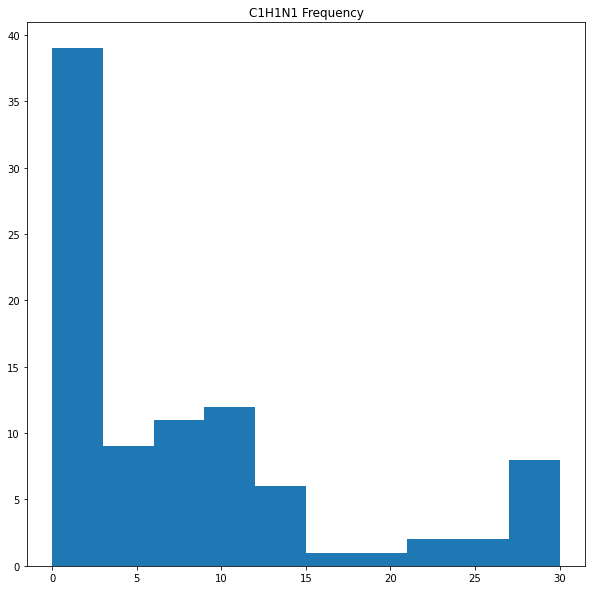

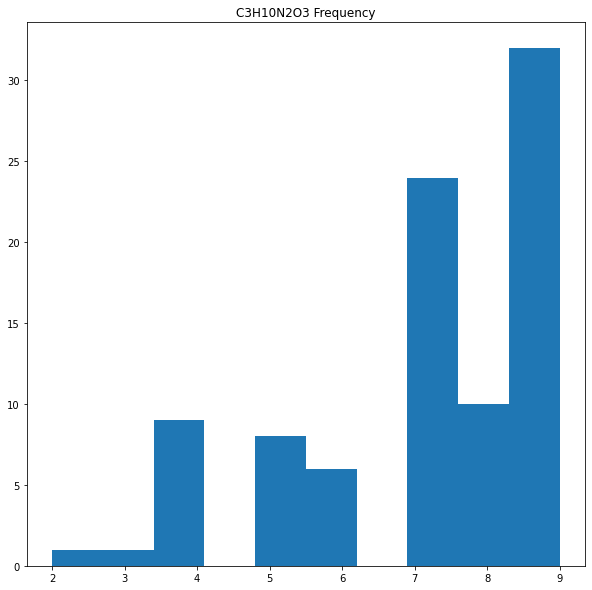

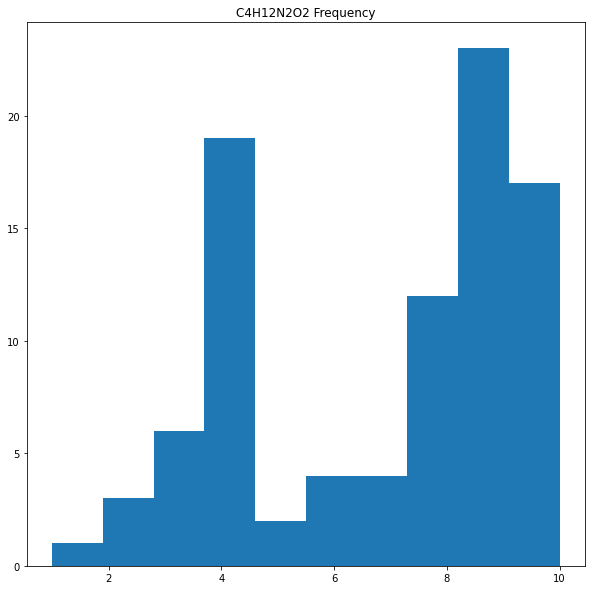

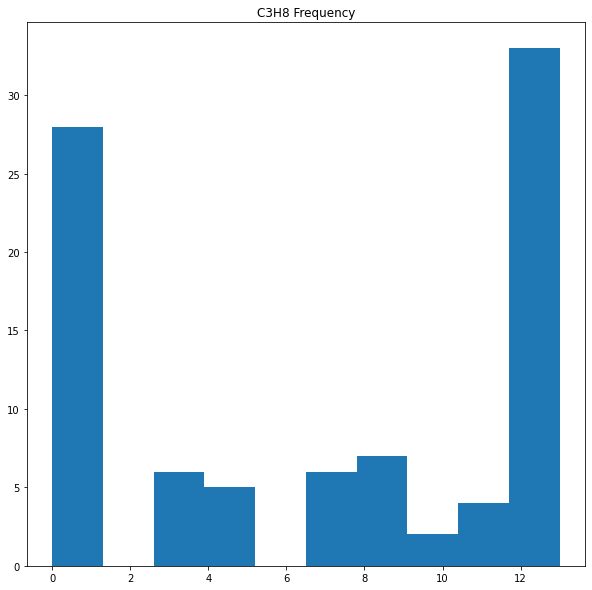

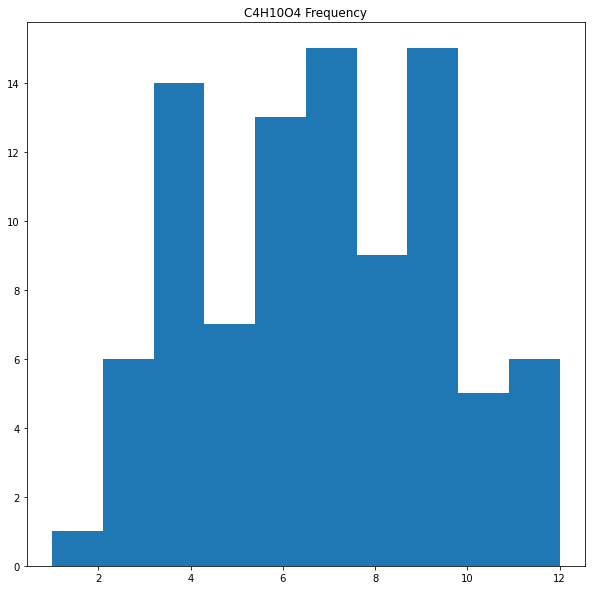

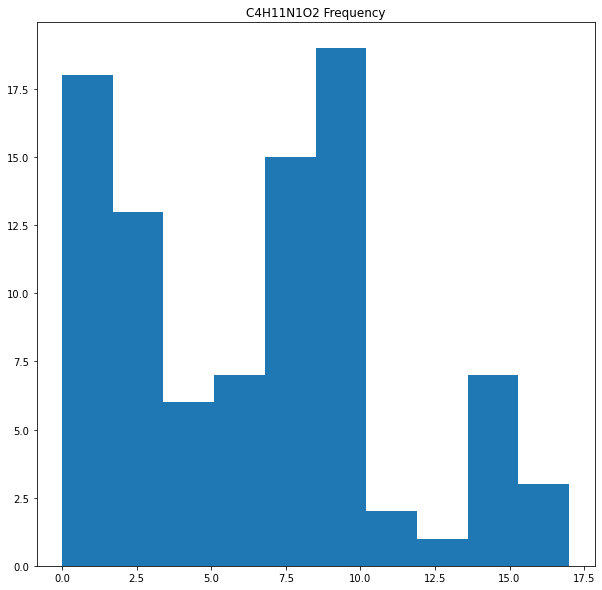

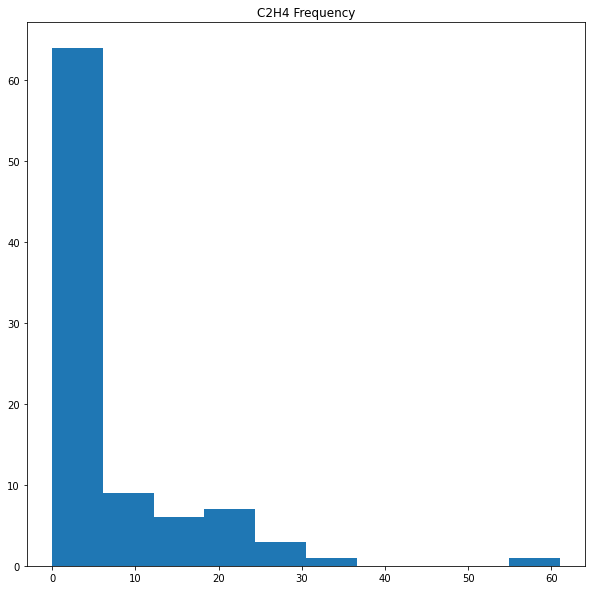

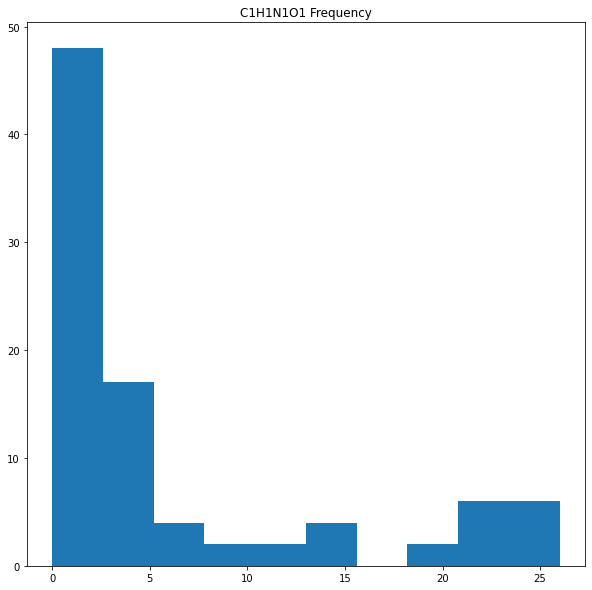

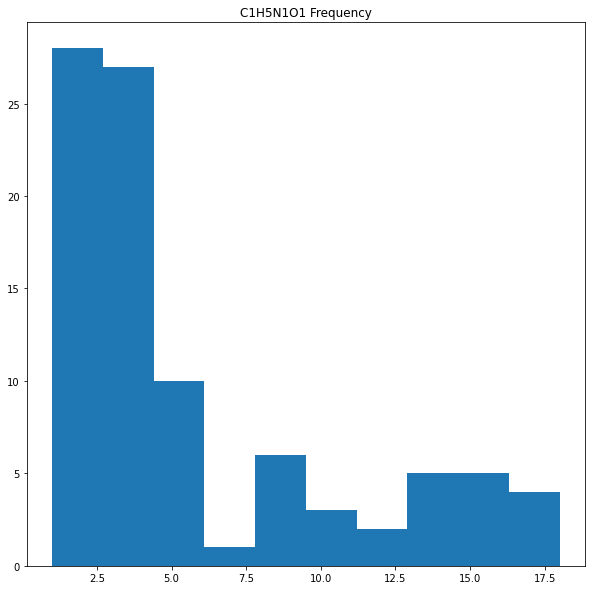

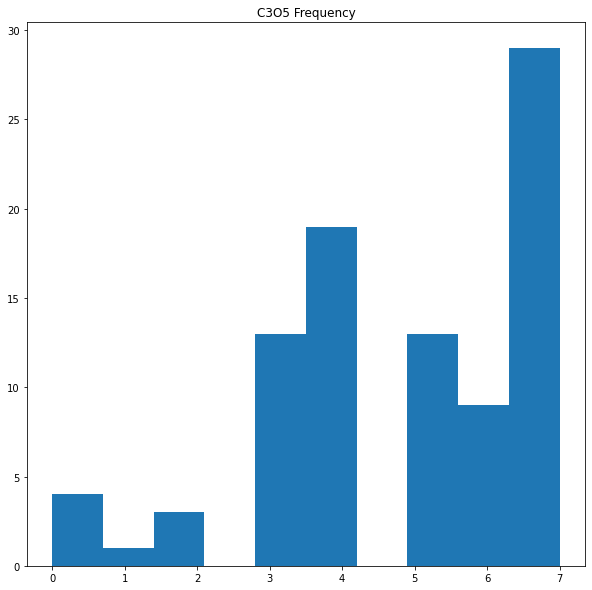

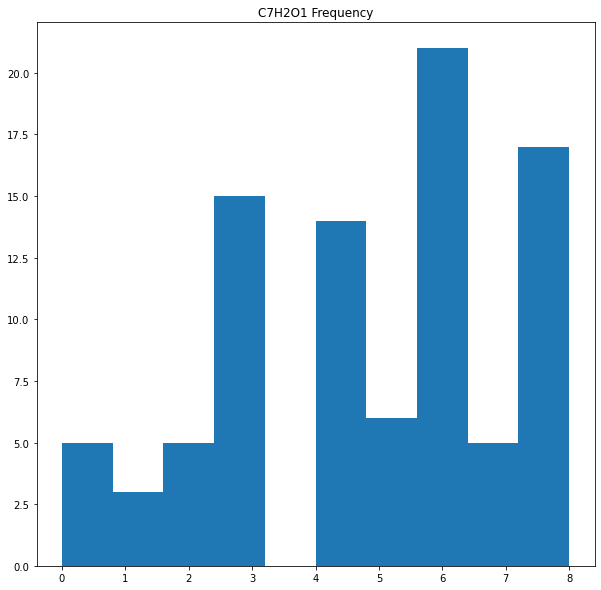

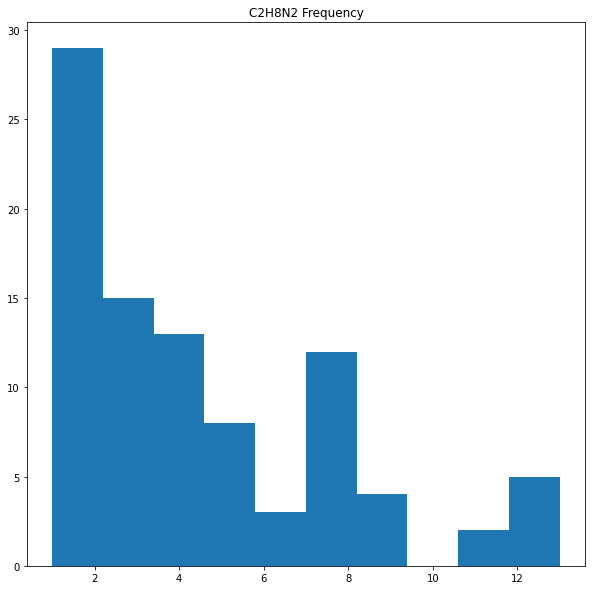

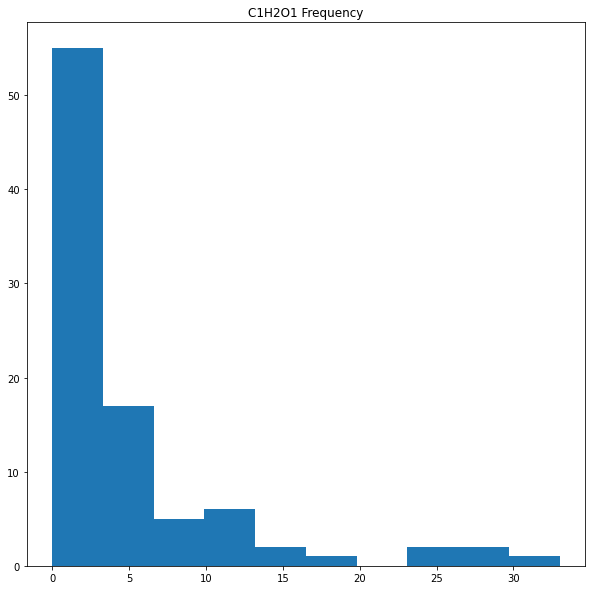

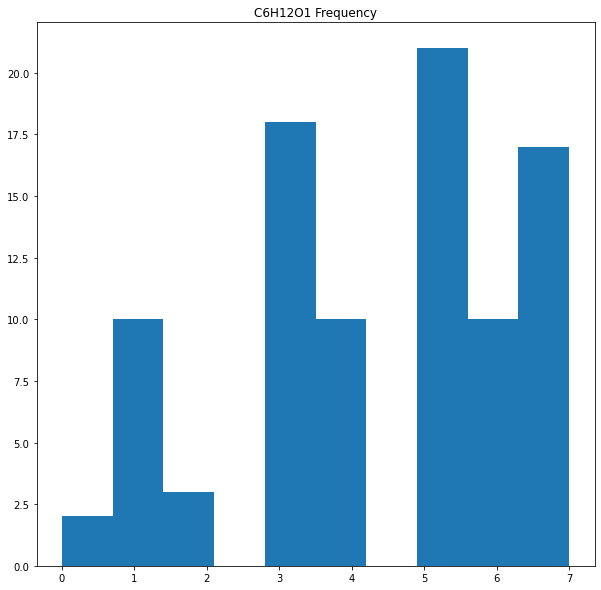

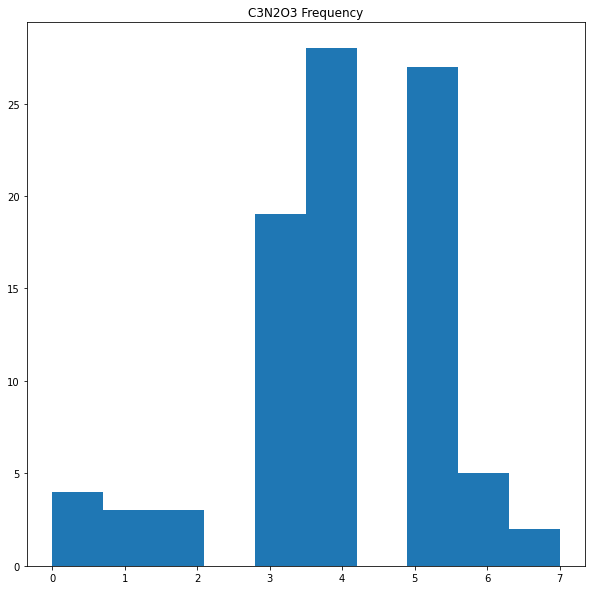

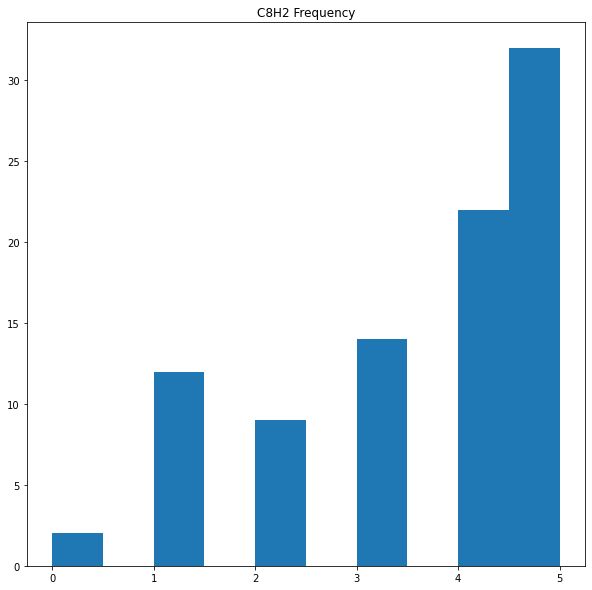

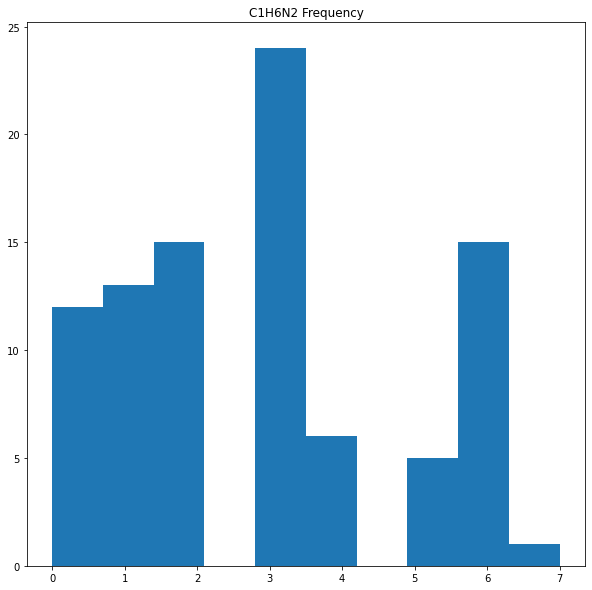

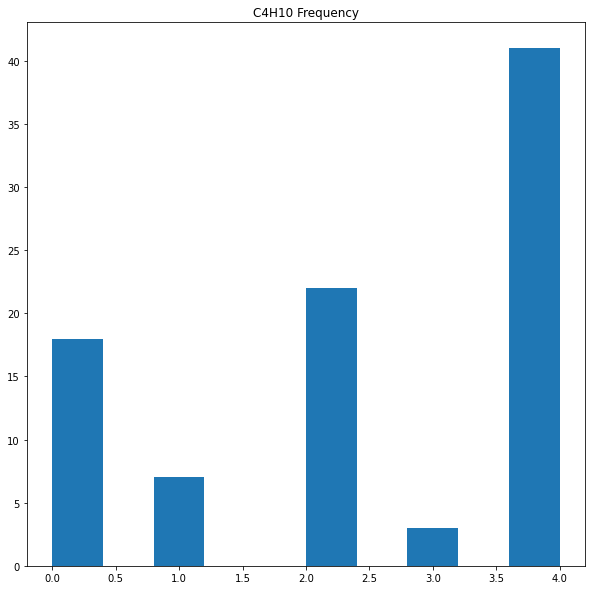

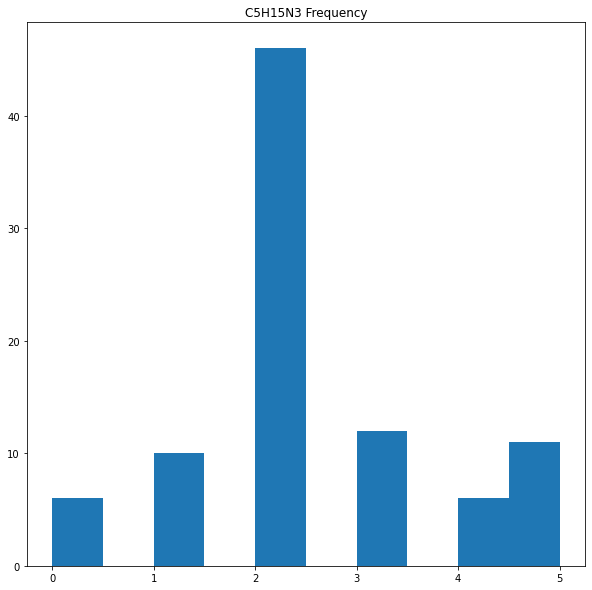

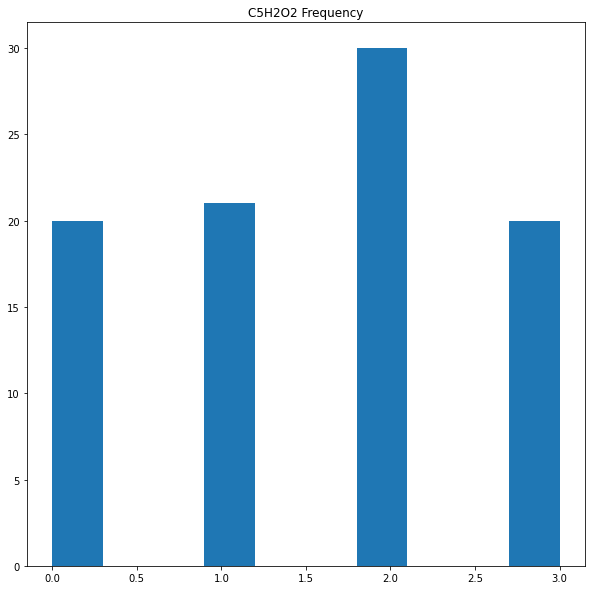

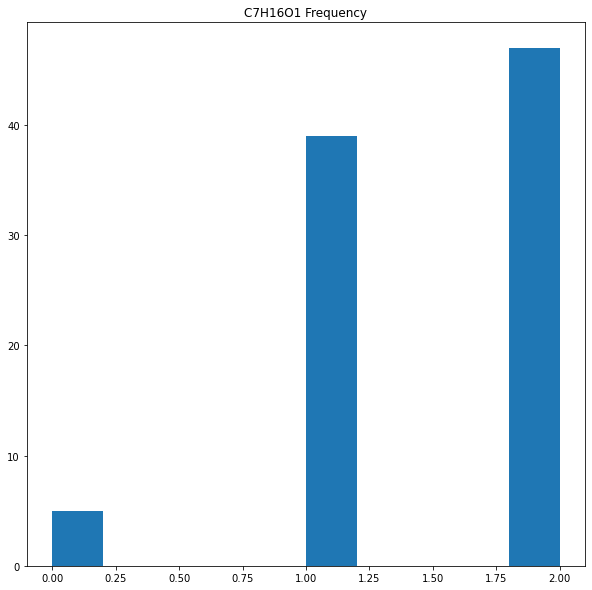

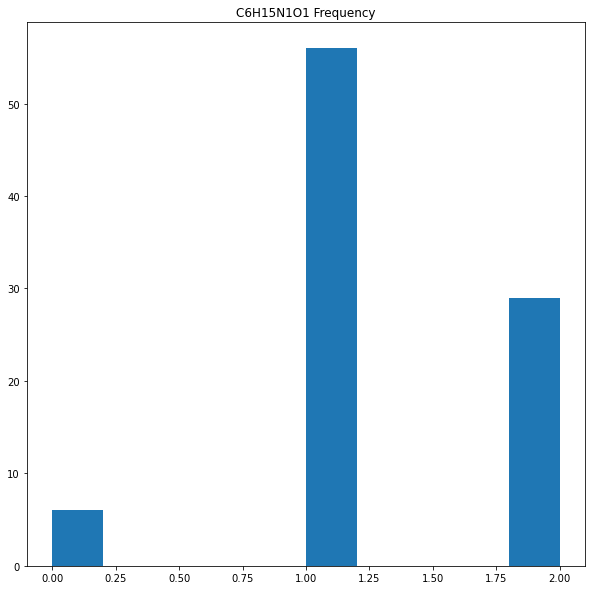

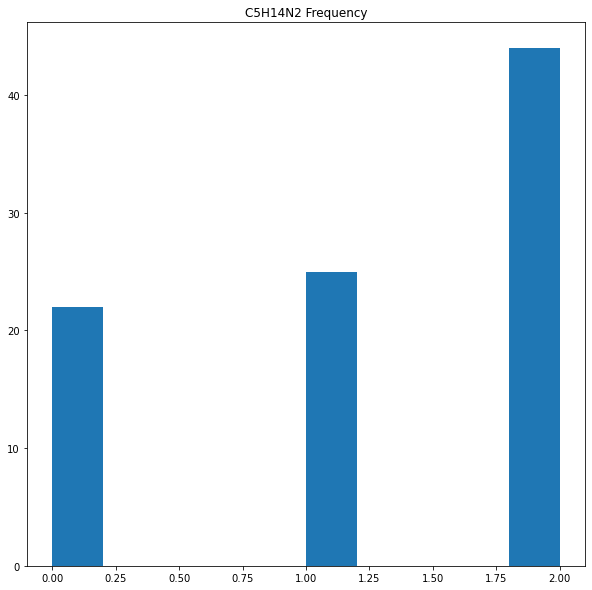

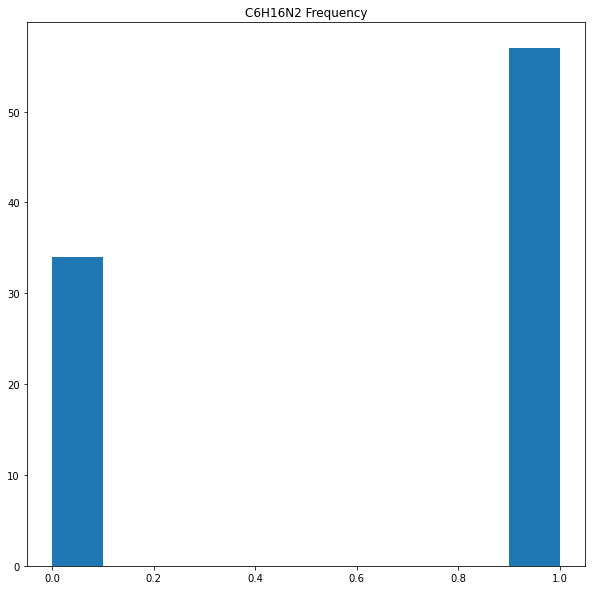

In [9]:
create_histogram(data)